In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/EXCL.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,3.059533,3.007273,2.938809,1.053684,1.761675,1.705354,1.715120,0.324503,0.722584,0.996105,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,3.395286
2012-10-18,3.111350,3.046031,2.964583,1.915311,1.761675,1.705354,1.715120,0.787275,0.583963,0.928232,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,3.395286
2012-10-19,3.176120,3.081559,2.988210,1.970523,1.998807,1.924055,1.909460,1.382241,0.657416,0.968922,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,3.486288
2012-10-22,3.253845,3.120318,3.016132,1.767559,0.597816,1.020966,1.207254,-0.102020,-0.091455,0.026726,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,3.304284
2012-10-23,3.299184,3.149386,3.035463,0.647818,0.093460,0.636550,0.891438,-0.494746,-0.343995,0.057185,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,3.213282


### Plot the Close price - our target

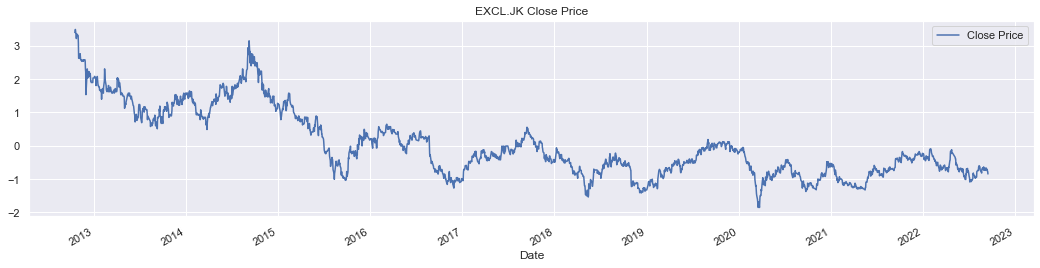

In [4]:
df['Close'].plot(figsize=(18,4))
plt.legend(['Close Price'])
plt.title('EXCL.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [5]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [7]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

print("The best hyperparameters are ",search.best_params_)

[0]	validation_0-rmse:1.05740
[1]	validation_0-rmse:1.04740
[2]	validation_0-rmse:1.03750
[3]	validation_0-rmse:1.02770
[4]	validation_0-rmse:1.01800
[5]	validation_0-rmse:1.00841
[6]	validation_0-rmse:0.99890
[7]	validation_0-rmse:0.98947
[8]	validation_0-rmse:0.98016
[9]	validation_0-rmse:0.97093
[10]	validation_0-rmse:0.96180
[11]	validation_0-rmse:0.95274
[12]	validation_0-rmse:0.94380
[13]	validation_0-rmse:0.93492
[14]	validation_0-rmse:0.92613
[15]	validation_0-rmse:0.91743
[16]	validation_0-rmse:0.90882
[17]	validation_0-rmse:0.90030
[18]	validation_0-rmse:0.89187
[19]	validation_0-rmse:0.88352
[20]	validation_0-rmse:0.87525
[21]	validation_0-rmse:0.86705
[22]	validation_0-rmse:0.85893
[23]	validation_0-rmse:0.85092
[24]	validation_0-rmse:0.84301
[25]	validation_0-rmse:0.83516
[26]	validation_0-rmse:0.82735
[27]	validation_0-rmse:0.81965
[28]	validation_0-rmse:0.81200
[29]	validation_0-rmse:0.80440
[30]	validation_0-rmse:0.79694
[31]	validation_0-rmse:0.78956
[32]	validation_0-

[260]	validation_0-rmse:0.14771
[261]	validation_0-rmse:0.14702
[262]	validation_0-rmse:0.14637
[263]	validation_0-rmse:0.14569
[264]	validation_0-rmse:0.14505
[265]	validation_0-rmse:0.14442
[266]	validation_0-rmse:0.14376
[267]	validation_0-rmse:0.14312
[268]	validation_0-rmse:0.14250
[269]	validation_0-rmse:0.14187
[270]	validation_0-rmse:0.14126
[271]	validation_0-rmse:0.14066
[272]	validation_0-rmse:0.14008
[273]	validation_0-rmse:0.13947
[274]	validation_0-rmse:0.13888
[275]	validation_0-rmse:0.13828
[276]	validation_0-rmse:0.13770
[277]	validation_0-rmse:0.13714
[278]	validation_0-rmse:0.13659
[279]	validation_0-rmse:0.13605
[280]	validation_0-rmse:0.13548
[281]	validation_0-rmse:0.13492
[282]	validation_0-rmse:0.13436
[283]	validation_0-rmse:0.13383
[284]	validation_0-rmse:0.13335
[285]	validation_0-rmse:0.13284
[286]	validation_0-rmse:0.13231
[287]	validation_0-rmse:0.13181
[288]	validation_0-rmse:0.13129
[289]	validation_0-rmse:0.13079
[290]	validation_0-rmse:0.13031
[291]	va

[17]	validation_0-rmse:0.89932
[18]	validation_0-rmse:0.89077
[19]	validation_0-rmse:0.88231
[20]	validation_0-rmse:0.87399
[21]	validation_0-rmse:0.86572
[22]	validation_0-rmse:0.85761
[23]	validation_0-rmse:0.84951
[24]	validation_0-rmse:0.84152
[25]	validation_0-rmse:0.83364
[26]	validation_0-rmse:0.82576
[27]	validation_0-rmse:0.81798
[28]	validation_0-rmse:0.81026
[29]	validation_0-rmse:0.80264
[30]	validation_0-rmse:0.79518
[31]	validation_0-rmse:0.78779
[32]	validation_0-rmse:0.78047
[33]	validation_0-rmse:0.77315
[34]	validation_0-rmse:0.76589
[35]	validation_0-rmse:0.75881
[36]	validation_0-rmse:0.75178
[37]	validation_0-rmse:0.74479
[38]	validation_0-rmse:0.73790
[39]	validation_0-rmse:0.73101
[40]	validation_0-rmse:0.72423
[41]	validation_0-rmse:0.71754
[42]	validation_0-rmse:0.71095
[43]	validation_0-rmse:0.70435
[44]	validation_0-rmse:0.69787
[45]	validation_0-rmse:0.69145
[46]	validation_0-rmse:0.68504
[47]	validation_0-rmse:0.67867
[48]	validation_0-rmse:0.67244
[49]	val

[276]	validation_0-rmse:0.12219
[277]	validation_0-rmse:0.12154
[278]	validation_0-rmse:0.12092
[279]	validation_0-rmse:0.12030
[280]	validation_0-rmse:0.11969
[281]	validation_0-rmse:0.11908
[282]	validation_0-rmse:0.11849
[283]	validation_0-rmse:0.11791
[284]	validation_0-rmse:0.11730
[285]	validation_0-rmse:0.11679
[286]	validation_0-rmse:0.11621
[287]	validation_0-rmse:0.11566
[288]	validation_0-rmse:0.11516
[289]	validation_0-rmse:0.11464
[290]	validation_0-rmse:0.11407
[291]	validation_0-rmse:0.11353
[292]	validation_0-rmse:0.11300
[293]	validation_0-rmse:0.11245
[294]	validation_0-rmse:0.11198
[295]	validation_0-rmse:0.11152
[296]	validation_0-rmse:0.11099
[297]	validation_0-rmse:0.11049
[298]	validation_0-rmse:0.10997
[299]	validation_0-rmse:0.10952
[300]	validation_0-rmse:0.10901
[301]	validation_0-rmse:0.10853
[302]	validation_0-rmse:0.10807
[303]	validation_0-rmse:0.10759
[304]	validation_0-rmse:0.10714
[305]	validation_0-rmse:0.10669
[306]	validation_0-rmse:0.10621
[307]	va

[34]	validation_0-rmse:0.76271
[35]	validation_0-rmse:0.75551
[36]	validation_0-rmse:0.74839
[37]	validation_0-rmse:0.74133
[38]	validation_0-rmse:0.73434
[39]	validation_0-rmse:0.72740
[40]	validation_0-rmse:0.72056
[41]	validation_0-rmse:0.71377
[42]	validation_0-rmse:0.70708
[43]	validation_0-rmse:0.70045
[44]	validation_0-rmse:0.69388
[45]	validation_0-rmse:0.68739
[46]	validation_0-rmse:0.68095
[47]	validation_0-rmse:0.67459
[48]	validation_0-rmse:0.66829
[49]	validation_0-rmse:0.66205
[50]	validation_0-rmse:0.65588
[51]	validation_0-rmse:0.64976
[52]	validation_0-rmse:0.64371
[53]	validation_0-rmse:0.63773
[54]	validation_0-rmse:0.63178
[55]	validation_0-rmse:0.62591
[56]	validation_0-rmse:0.62010
[57]	validation_0-rmse:0.61436
[58]	validation_0-rmse:0.60868
[59]	validation_0-rmse:0.60303
[60]	validation_0-rmse:0.59746
[61]	validation_0-rmse:0.59194
[62]	validation_0-rmse:0.58642
[63]	validation_0-rmse:0.58101
[64]	validation_0-rmse:0.57567
[65]	validation_0-rmse:0.57035
[66]	val

[293]	validation_0-rmse:0.10413
[294]	validation_0-rmse:0.10360
[295]	validation_0-rmse:0.10310
[296]	validation_0-rmse:0.10260
[297]	validation_0-rmse:0.10208
[298]	validation_0-rmse:0.10159
[299]	validation_0-rmse:0.10107
[300]	validation_0-rmse:0.10061
[301]	validation_0-rmse:0.10014
[302]	validation_0-rmse:0.09966
[303]	validation_0-rmse:0.09919
[304]	validation_0-rmse:0.09873
[305]	validation_0-rmse:0.09824
[306]	validation_0-rmse:0.09779
[307]	validation_0-rmse:0.09735
[308]	validation_0-rmse:0.09692
[309]	validation_0-rmse:0.09649
[310]	validation_0-rmse:0.09605
[311]	validation_0-rmse:0.09560
[312]	validation_0-rmse:0.09514
[313]	validation_0-rmse:0.09473
[314]	validation_0-rmse:0.09432
[315]	validation_0-rmse:0.09388
[316]	validation_0-rmse:0.09349
[317]	validation_0-rmse:0.09305
[318]	validation_0-rmse:0.09264
[319]	validation_0-rmse:0.09221
[320]	validation_0-rmse:0.09181
[321]	validation_0-rmse:0.09143
[322]	validation_0-rmse:0.09102
[323]	validation_0-rmse:0.09063
[324]	va

[51]	validation_0-rmse:0.65855
[52]	validation_0-rmse:0.65260
[53]	validation_0-rmse:0.64670
[54]	validation_0-rmse:0.64091
[55]	validation_0-rmse:0.63512
[56]	validation_0-rmse:0.62947
[57]	validation_0-rmse:0.62374
[58]	validation_0-rmse:0.61816
[59]	validation_0-rmse:0.61263
[60]	validation_0-rmse:0.60718
[61]	validation_0-rmse:0.60174
[62]	validation_0-rmse:0.59631
[63]	validation_0-rmse:0.59100
[64]	validation_0-rmse:0.58567
[65]	validation_0-rmse:0.58046
[66]	validation_0-rmse:0.57534
[67]	validation_0-rmse:0.57025
[68]	validation_0-rmse:0.56513
[69]	validation_0-rmse:0.56014
[70]	validation_0-rmse:0.55512
[71]	validation_0-rmse:0.55026
[72]	validation_0-rmse:0.54541
[73]	validation_0-rmse:0.54062
[74]	validation_0-rmse:0.53579
[75]	validation_0-rmse:0.53113
[76]	validation_0-rmse:0.52653
[77]	validation_0-rmse:0.52185
[78]	validation_0-rmse:0.51733
[79]	validation_0-rmse:0.51279
[80]	validation_0-rmse:0.50824
[81]	validation_0-rmse:0.50383
[82]	validation_0-rmse:0.49942
[83]	val

[309]	validation_0-rmse:0.10437
[310]	validation_0-rmse:0.10390
[311]	validation_0-rmse:0.10334
[312]	validation_0-rmse:0.10278
[313]	validation_0-rmse:0.10236
[314]	validation_0-rmse:0.10185
[315]	validation_0-rmse:0.10132
[316]	validation_0-rmse:0.10079
[317]	validation_0-rmse:0.10034
[318]	validation_0-rmse:0.09986
[319]	validation_0-rmse:0.09946
[320]	validation_0-rmse:0.09895
[321]	validation_0-rmse:0.09853
[322]	validation_0-rmse:0.09801
[323]	validation_0-rmse:0.09756
[324]	validation_0-rmse:0.09716
[325]	validation_0-rmse:0.09673
[326]	validation_0-rmse:0.09624
[327]	validation_0-rmse:0.09585
[328]	validation_0-rmse:0.09535
[329]	validation_0-rmse:0.09500
[330]	validation_0-rmse:0.09464
[331]	validation_0-rmse:0.09417
[332]	validation_0-rmse:0.09379
[333]	validation_0-rmse:0.09332
[334]	validation_0-rmse:0.09294
[335]	validation_0-rmse:0.09254
[336]	validation_0-rmse:0.09214
[337]	validation_0-rmse:0.09180
[338]	validation_0-rmse:0.09142
[339]	validation_0-rmse:0.09109
[340]	va

[68]	validation_0-rmse:0.55772
[69]	validation_0-rmse:0.55268
[70]	validation_0-rmse:0.54769
[71]	validation_0-rmse:0.54275
[72]	validation_0-rmse:0.53785
[73]	validation_0-rmse:0.53301
[74]	validation_0-rmse:0.52823
[75]	validation_0-rmse:0.52349
[76]	validation_0-rmse:0.51880
[77]	validation_0-rmse:0.51416
[78]	validation_0-rmse:0.50956
[79]	validation_0-rmse:0.50500
[80]	validation_0-rmse:0.50050
[81]	validation_0-rmse:0.49605
[82]	validation_0-rmse:0.49162
[83]	validation_0-rmse:0.48726
[84]	validation_0-rmse:0.48293
[85]	validation_0-rmse:0.47864
[86]	validation_0-rmse:0.47442
[87]	validation_0-rmse:0.47022
[88]	validation_0-rmse:0.46608
[89]	validation_0-rmse:0.46197
[90]	validation_0-rmse:0.45792
[91]	validation_0-rmse:0.45389
[92]	validation_0-rmse:0.44993
[93]	validation_0-rmse:0.44601
[94]	validation_0-rmse:0.44212
[95]	validation_0-rmse:0.43829
[96]	validation_0-rmse:0.43447
[97]	validation_0-rmse:0.43068
[98]	validation_0-rmse:0.42696
[99]	validation_0-rmse:0.42324
[100]	va

[326]	validation_0-rmse:0.09629
[327]	validation_0-rmse:0.09591
[328]	validation_0-rmse:0.09553
[329]	validation_0-rmse:0.09514
[330]	validation_0-rmse:0.09473
[331]	validation_0-rmse:0.09435
[332]	validation_0-rmse:0.09398
[333]	validation_0-rmse:0.09360
[334]	validation_0-rmse:0.09324
[335]	validation_0-rmse:0.09288
[336]	validation_0-rmse:0.09251
[337]	validation_0-rmse:0.09216
[338]	validation_0-rmse:0.09180
[339]	validation_0-rmse:0.09146
[340]	validation_0-rmse:0.09111
[341]	validation_0-rmse:0.09078
[342]	validation_0-rmse:0.09044
[343]	validation_0-rmse:0.09010
[344]	validation_0-rmse:0.08977
[345]	validation_0-rmse:0.08944
[346]	validation_0-rmse:0.08911
[347]	validation_0-rmse:0.08879
[348]	validation_0-rmse:0.08844
[349]	validation_0-rmse:0.08812
[350]	validation_0-rmse:0.08779
[351]	validation_0-rmse:0.08749
[352]	validation_0-rmse:0.08715
[353]	validation_0-rmse:0.08684
[354]	validation_0-rmse:0.08654
[355]	validation_0-rmse:0.08623
[356]	validation_0-rmse:0.08593
[357]	va

[85]	validation_0-rmse:0.48381
[86]	validation_0-rmse:0.47958
[87]	validation_0-rmse:0.47545
[88]	validation_0-rmse:0.47133
[89]	validation_0-rmse:0.46726
[90]	validation_0-rmse:0.46320
[91]	validation_0-rmse:0.45923
[92]	validation_0-rmse:0.45528
[93]	validation_0-rmse:0.45141
[94]	validation_0-rmse:0.44755
[95]	validation_0-rmse:0.44376
[96]	validation_0-rmse:0.43995
[97]	validation_0-rmse:0.43621
[98]	validation_0-rmse:0.43248
[99]	validation_0-rmse:0.42885
[100]	validation_0-rmse:0.42520
[101]	validation_0-rmse:0.42165
[102]	validation_0-rmse:0.41811
[103]	validation_0-rmse:0.41459
[104]	validation_0-rmse:0.41121
[105]	validation_0-rmse:0.40774
[106]	validation_0-rmse:0.40433
[107]	validation_0-rmse:0.40096
[108]	validation_0-rmse:0.39764
[109]	validation_0-rmse:0.39432
[110]	validation_0-rmse:0.39106
[111]	validation_0-rmse:0.38785
[112]	validation_0-rmse:0.38464
[113]	validation_0-rmse:0.38155
[114]	validation_0-rmse:0.37841
[115]	validation_0-rmse:0.37537
[116]	validation_0-rmse

[342]	validation_0-rmse:0.11098
[343]	validation_0-rmse:0.11068
[344]	validation_0-rmse:0.11039
[345]	validation_0-rmse:0.11010
[346]	validation_0-rmse:0.10981
[347]	validation_0-rmse:0.10956
[348]	validation_0-rmse:0.10928
[349]	validation_0-rmse:0.10901
[350]	validation_0-rmse:0.10877
[351]	validation_0-rmse:0.10852
[352]	validation_0-rmse:0.10828
[353]	validation_0-rmse:0.10805
[354]	validation_0-rmse:0.10782
[355]	validation_0-rmse:0.10755
[356]	validation_0-rmse:0.10731
[357]	validation_0-rmse:0.10706
[358]	validation_0-rmse:0.10681
[359]	validation_0-rmse:0.10657
[360]	validation_0-rmse:0.10635
[361]	validation_0-rmse:0.10612
[362]	validation_0-rmse:0.10590
[363]	validation_0-rmse:0.10566
[364]	validation_0-rmse:0.10547
[365]	validation_0-rmse:0.10521
[366]	validation_0-rmse:0.10497
[367]	validation_0-rmse:0.10476
[368]	validation_0-rmse:0.10453
[369]	validation_0-rmse:0.10431
[370]	validation_0-rmse:0.10412
[371]	validation_0-rmse:0.10389
[372]	validation_0-rmse:0.10369
[373]	va

[599]	validation_0-rmse:0.08156
[0]	validation_0-rmse:1.05732
[1]	validation_0-rmse:1.04723
[2]	validation_0-rmse:1.03725
[3]	validation_0-rmse:1.02737
[4]	validation_0-rmse:1.01764
[5]	validation_0-rmse:1.00796
[6]	validation_0-rmse:0.99843
[7]	validation_0-rmse:0.98896
[8]	validation_0-rmse:0.97961
[9]	validation_0-rmse:0.97030
[10]	validation_0-rmse:0.96106
[11]	validation_0-rmse:0.95200
[12]	validation_0-rmse:0.94291
[13]	validation_0-rmse:0.93399
[14]	validation_0-rmse:0.92521
[15]	validation_0-rmse:0.91645
[16]	validation_0-rmse:0.90784
[17]	validation_0-rmse:0.89932
[18]	validation_0-rmse:0.89077
[19]	validation_0-rmse:0.88231
[20]	validation_0-rmse:0.87399
[21]	validation_0-rmse:0.86572
[22]	validation_0-rmse:0.85761
[23]	validation_0-rmse:0.84951
[24]	validation_0-rmse:0.84152
[25]	validation_0-rmse:0.83364
[26]	validation_0-rmse:0.82576
[27]	validation_0-rmse:0.81798
[28]	validation_0-rmse:0.81026
[29]	validation_0-rmse:0.80264
[30]	validation_0-rmse:0.79518
[31]	validation_0

[259]	validation_0-rmse:0.13364
[260]	validation_0-rmse:0.13289
[261]	validation_0-rmse:0.13217
[262]	validation_0-rmse:0.13144
[263]	validation_0-rmse:0.13071
[264]	validation_0-rmse:0.12998
[265]	validation_0-rmse:0.12934
[266]	validation_0-rmse:0.12868
[267]	validation_0-rmse:0.12798
[268]	validation_0-rmse:0.12729
[269]	validation_0-rmse:0.12660
[270]	validation_0-rmse:0.12591
[271]	validation_0-rmse:0.12531
[272]	validation_0-rmse:0.12465
[273]	validation_0-rmse:0.12407
[274]	validation_0-rmse:0.12342
[275]	validation_0-rmse:0.12282
[276]	validation_0-rmse:0.12219
[277]	validation_0-rmse:0.12154
[278]	validation_0-rmse:0.12092
[279]	validation_0-rmse:0.12030
[280]	validation_0-rmse:0.11969
[281]	validation_0-rmse:0.11908
[282]	validation_0-rmse:0.11849
[283]	validation_0-rmse:0.11791
[284]	validation_0-rmse:0.11730
[285]	validation_0-rmse:0.11679
[286]	validation_0-rmse:0.11621
[287]	validation_0-rmse:0.11566
[288]	validation_0-rmse:0.11516
[289]	validation_0-rmse:0.11464
[290]	va

[516]	validation_0-rmse:0.06683
[517]	validation_0-rmse:0.06676
[518]	validation_0-rmse:0.06671
[519]	validation_0-rmse:0.06665
[520]	validation_0-rmse:0.06656
[521]	validation_0-rmse:0.06649
[522]	validation_0-rmse:0.06642
[523]	validation_0-rmse:0.06637
[524]	validation_0-rmse:0.06633
[525]	validation_0-rmse:0.06628
[526]	validation_0-rmse:0.06620
[527]	validation_0-rmse:0.06614
[528]	validation_0-rmse:0.06610
[529]	validation_0-rmse:0.06606
[530]	validation_0-rmse:0.06600
[531]	validation_0-rmse:0.06594
[532]	validation_0-rmse:0.06588
[533]	validation_0-rmse:0.06582
[534]	validation_0-rmse:0.06574
[535]	validation_0-rmse:0.06568
[536]	validation_0-rmse:0.06562
[537]	validation_0-rmse:0.06556
[538]	validation_0-rmse:0.06549
[539]	validation_0-rmse:0.06542
[540]	validation_0-rmse:0.06536
[541]	validation_0-rmse:0.06528
[542]	validation_0-rmse:0.06522
[543]	validation_0-rmse:0.06517
[544]	validation_0-rmse:0.06513
[545]	validation_0-rmse:0.06508
[546]	validation_0-rmse:0.06503
[547]	va

[176]	validation_0-rmse:0.22043
[177]	validation_0-rmse:0.21876
[178]	validation_0-rmse:0.21709
[179]	validation_0-rmse:0.21539
[180]	validation_0-rmse:0.21376
[181]	validation_0-rmse:0.21209
[182]	validation_0-rmse:0.21052
[183]	validation_0-rmse:0.20893
[184]	validation_0-rmse:0.20736
[185]	validation_0-rmse:0.20577
[186]	validation_0-rmse:0.20424
[187]	validation_0-rmse:0.20267
[188]	validation_0-rmse:0.20116
[189]	validation_0-rmse:0.19965
[190]	validation_0-rmse:0.19816
[191]	validation_0-rmse:0.19671
[192]	validation_0-rmse:0.19525
[193]	validation_0-rmse:0.19382
[194]	validation_0-rmse:0.19239
[195]	validation_0-rmse:0.19100
[196]	validation_0-rmse:0.18962
[197]	validation_0-rmse:0.18824
[198]	validation_0-rmse:0.18688
[199]	validation_0-rmse:0.18554
[200]	validation_0-rmse:0.18421
[201]	validation_0-rmse:0.18289
[202]	validation_0-rmse:0.18158
[203]	validation_0-rmse:0.18029
[204]	validation_0-rmse:0.17901
[205]	validation_0-rmse:0.17774
[206]	validation_0-rmse:0.17648
[207]	va

[433]	validation_0-rmse:0.06366
[434]	validation_0-rmse:0.06352
[435]	validation_0-rmse:0.06337
[436]	validation_0-rmse:0.06322
[437]	validation_0-rmse:0.06307
[438]	validation_0-rmse:0.06292
[439]	validation_0-rmse:0.06279
[440]	validation_0-rmse:0.06264
[441]	validation_0-rmse:0.06251
[442]	validation_0-rmse:0.06238
[443]	validation_0-rmse:0.06224
[444]	validation_0-rmse:0.06210
[445]	validation_0-rmse:0.06197
[446]	validation_0-rmse:0.06185
[447]	validation_0-rmse:0.06171
[448]	validation_0-rmse:0.06158
[449]	validation_0-rmse:0.06147
[450]	validation_0-rmse:0.06134
[451]	validation_0-rmse:0.06122
[452]	validation_0-rmse:0.06110
[453]	validation_0-rmse:0.06097
[454]	validation_0-rmse:0.06086
[455]	validation_0-rmse:0.06075
[456]	validation_0-rmse:0.06062
[457]	validation_0-rmse:0.06049
[458]	validation_0-rmse:0.06038
[459]	validation_0-rmse:0.06027
[460]	validation_0-rmse:0.06016
[461]	validation_0-rmse:0.06005
[462]	validation_0-rmse:0.05995
[463]	validation_0-rmse:0.05984
[464]	va

[93]	validation_0-rmse:0.45397
[94]	validation_0-rmse:0.45010
[95]	validation_0-rmse:0.44626
[96]	validation_0-rmse:0.44248
[97]	validation_0-rmse:0.43872
[98]	validation_0-rmse:0.43505
[99]	validation_0-rmse:0.43138
[100]	validation_0-rmse:0.42779
[101]	validation_0-rmse:0.42424
[102]	validation_0-rmse:0.42067
[103]	validation_0-rmse:0.41720
[104]	validation_0-rmse:0.41362
[105]	validation_0-rmse:0.41007
[106]	validation_0-rmse:0.40669
[107]	validation_0-rmse:0.40321
[108]	validation_0-rmse:0.39989
[109]	validation_0-rmse:0.39647
[110]	validation_0-rmse:0.39309
[111]	validation_0-rmse:0.38984
[112]	validation_0-rmse:0.38660
[113]	validation_0-rmse:0.38342
[114]	validation_0-rmse:0.38017
[115]	validation_0-rmse:0.37704
[116]	validation_0-rmse:0.37393
[117]	validation_0-rmse:0.37086
[118]	validation_0-rmse:0.36775
[119]	validation_0-rmse:0.36476
[120]	validation_0-rmse:0.36178
[121]	validation_0-rmse:0.35886
[122]	validation_0-rmse:0.35599
[123]	validation_0-rmse:0.35301
[124]	validatio

[350]	validation_0-rmse:0.08707
[351]	validation_0-rmse:0.08669
[352]	validation_0-rmse:0.08635
[353]	validation_0-rmse:0.08601
[354]	validation_0-rmse:0.08573
[355]	validation_0-rmse:0.08545
[356]	validation_0-rmse:0.08508
[357]	validation_0-rmse:0.08477
[358]	validation_0-rmse:0.08440
[359]	validation_0-rmse:0.08404
[360]	validation_0-rmse:0.08378
[361]	validation_0-rmse:0.08350
[362]	validation_0-rmse:0.08312
[363]	validation_0-rmse:0.08281
[364]	validation_0-rmse:0.08254
[365]	validation_0-rmse:0.08229
[366]	validation_0-rmse:0.08203
[367]	validation_0-rmse:0.08178
[368]	validation_0-rmse:0.08152
[369]	validation_0-rmse:0.08119
[370]	validation_0-rmse:0.08091
[371]	validation_0-rmse:0.08063
[372]	validation_0-rmse:0.08036
[373]	validation_0-rmse:0.08013
[374]	validation_0-rmse:0.07986
[375]	validation_0-rmse:0.07957
[376]	validation_0-rmse:0.07931
[377]	validation_0-rmse:0.07909
[378]	validation_0-rmse:0.07883
[379]	validation_0-rmse:0.07857
[380]	validation_0-rmse:0.07825
[381]	va

[7]	validation_0-rmse:0.98847
[8]	validation_0-rmse:0.97899
[9]	validation_0-rmse:0.96960
[10]	validation_0-rmse:0.96038
[11]	validation_0-rmse:0.95117
[12]	validation_0-rmse:0.94214
[13]	validation_0-rmse:0.93312
[14]	validation_0-rmse:0.92428
[15]	validation_0-rmse:0.91551
[16]	validation_0-rmse:0.90677
[17]	validation_0-rmse:0.89816
[18]	validation_0-rmse:0.88959
[19]	validation_0-rmse:0.88111
[20]	validation_0-rmse:0.87278
[21]	validation_0-rmse:0.86451
[22]	validation_0-rmse:0.85633
[23]	validation_0-rmse:0.84826
[24]	validation_0-rmse:0.84025
[25]	validation_0-rmse:0.83232
[26]	validation_0-rmse:0.82447
[27]	validation_0-rmse:0.81667
[28]	validation_0-rmse:0.80893
[29]	validation_0-rmse:0.80132
[30]	validation_0-rmse:0.79379
[31]	validation_0-rmse:0.78634
[32]	validation_0-rmse:0.77893
[33]	validation_0-rmse:0.77158
[34]	validation_0-rmse:0.76436
[35]	validation_0-rmse:0.75720
[36]	validation_0-rmse:0.75014
[37]	validation_0-rmse:0.74313
[38]	validation_0-rmse:0.73618
[39]	valida

[267]	validation_0-rmse:0.12689
[268]	validation_0-rmse:0.12623
[269]	validation_0-rmse:0.12553
[270]	validation_0-rmse:0.12487
[271]	validation_0-rmse:0.12423
[272]	validation_0-rmse:0.12357
[273]	validation_0-rmse:0.12294
[274]	validation_0-rmse:0.12228
[275]	validation_0-rmse:0.12165
[276]	validation_0-rmse:0.12101
[277]	validation_0-rmse:0.12041
[278]	validation_0-rmse:0.11978
[279]	validation_0-rmse:0.11919
[280]	validation_0-rmse:0.11858
[281]	validation_0-rmse:0.11800
[282]	validation_0-rmse:0.11742
[283]	validation_0-rmse:0.11682
[284]	validation_0-rmse:0.11623
[285]	validation_0-rmse:0.11567
[286]	validation_0-rmse:0.11513
[287]	validation_0-rmse:0.11456
[288]	validation_0-rmse:0.11401
[289]	validation_0-rmse:0.11345
[290]	validation_0-rmse:0.11292
[291]	validation_0-rmse:0.11236
[292]	validation_0-rmse:0.11184
[293]	validation_0-rmse:0.11132
[294]	validation_0-rmse:0.11078
[295]	validation_0-rmse:0.11028
[296]	validation_0-rmse:0.10978
[297]	validation_0-rmse:0.10928
[298]	va

[524]	validation_0-rmse:0.05818
[525]	validation_0-rmse:0.05811
[526]	validation_0-rmse:0.05801
[527]	validation_0-rmse:0.05794
[528]	validation_0-rmse:0.05787
[529]	validation_0-rmse:0.05778
[530]	validation_0-rmse:0.05770
[531]	validation_0-rmse:0.05763
[532]	validation_0-rmse:0.05754
[533]	validation_0-rmse:0.05745
[534]	validation_0-rmse:0.05738
[535]	validation_0-rmse:0.05732
[536]	validation_0-rmse:0.05725
[537]	validation_0-rmse:0.05717
[538]	validation_0-rmse:0.05708
[539]	validation_0-rmse:0.05701
[540]	validation_0-rmse:0.05692
[541]	validation_0-rmse:0.05687
[542]	validation_0-rmse:0.05681
[543]	validation_0-rmse:0.05674
[544]	validation_0-rmse:0.05668
[545]	validation_0-rmse:0.05660
[546]	validation_0-rmse:0.05653
[547]	validation_0-rmse:0.05646
[548]	validation_0-rmse:0.05640
[549]	validation_0-rmse:0.05634
[550]	validation_0-rmse:0.05626
[551]	validation_0-rmse:0.05620
[552]	validation_0-rmse:0.05613
[553]	validation_0-rmse:0.05608
[554]	validation_0-rmse:0.05600
[555]	va

[184]	validation_0-rmse:0.22567
[185]	validation_0-rmse:0.22423
[186]	validation_0-rmse:0.22273
[187]	validation_0-rmse:0.22133
[188]	validation_0-rmse:0.21991
[189]	validation_0-rmse:0.21852
[190]	validation_0-rmse:0.21712
[191]	validation_0-rmse:0.21573
[192]	validation_0-rmse:0.21441
[193]	validation_0-rmse:0.21303
[194]	validation_0-rmse:0.21169
[195]	validation_0-rmse:0.21036
[196]	validation_0-rmse:0.20907
[197]	validation_0-rmse:0.20775
[198]	validation_0-rmse:0.20647
[199]	validation_0-rmse:0.20520
[200]	validation_0-rmse:0.20389
[201]	validation_0-rmse:0.20261
[202]	validation_0-rmse:0.20139
[203]	validation_0-rmse:0.20016
[204]	validation_0-rmse:0.19895
[205]	validation_0-rmse:0.19778
[206]	validation_0-rmse:0.19656
[207]	validation_0-rmse:0.19537
[208]	validation_0-rmse:0.19427
[209]	validation_0-rmse:0.19313
[210]	validation_0-rmse:0.19198
[211]	validation_0-rmse:0.19088
[212]	validation_0-rmse:0.18971
[213]	validation_0-rmse:0.18859
[214]	validation_0-rmse:0.18751
[215]	va

[441]	validation_0-rmse:0.09264
[442]	validation_0-rmse:0.09253
[443]	validation_0-rmse:0.09244
[444]	validation_0-rmse:0.09233
[445]	validation_0-rmse:0.09219
[446]	validation_0-rmse:0.09208
[447]	validation_0-rmse:0.09198
[448]	validation_0-rmse:0.09182
[449]	validation_0-rmse:0.09169
[450]	validation_0-rmse:0.09159
[451]	validation_0-rmse:0.09149
[452]	validation_0-rmse:0.09140
[453]	validation_0-rmse:0.09126
[454]	validation_0-rmse:0.09112
[455]	validation_0-rmse:0.09103
[456]	validation_0-rmse:0.09093
[457]	validation_0-rmse:0.09080
[458]	validation_0-rmse:0.09068
[459]	validation_0-rmse:0.09058
[460]	validation_0-rmse:0.09048
[461]	validation_0-rmse:0.09040
[462]	validation_0-rmse:0.09032
[463]	validation_0-rmse:0.09024
[464]	validation_0-rmse:0.09010
[465]	validation_0-rmse:0.09001
[466]	validation_0-rmse:0.08989
[467]	validation_0-rmse:0.08981
[468]	validation_0-rmse:0.08972
[469]	validation_0-rmse:0.08965
[470]	validation_0-rmse:0.08953
[471]	validation_0-rmse:0.08944
[472]	va

[697]	validation_0-rmse:0.07894
[698]	validation_0-rmse:0.07893
[699]	validation_0-rmse:0.07891
[0]	validation_0-rmse:1.05732
[1]	validation_0-rmse:1.04723
[2]	validation_0-rmse:1.03725
[3]	validation_0-rmse:1.02737
[4]	validation_0-rmse:1.01764
[5]	validation_0-rmse:1.00796
[6]	validation_0-rmse:0.99843
[7]	validation_0-rmse:0.98896
[8]	validation_0-rmse:0.97961
[9]	validation_0-rmse:0.97030
[10]	validation_0-rmse:0.96106
[11]	validation_0-rmse:0.95200
[12]	validation_0-rmse:0.94291
[13]	validation_0-rmse:0.93399
[14]	validation_0-rmse:0.92521
[15]	validation_0-rmse:0.91645
[16]	validation_0-rmse:0.90784
[17]	validation_0-rmse:0.89932
[18]	validation_0-rmse:0.89077
[19]	validation_0-rmse:0.88231
[20]	validation_0-rmse:0.87399
[21]	validation_0-rmse:0.86572
[22]	validation_0-rmse:0.85761
[23]	validation_0-rmse:0.84951
[24]	validation_0-rmse:0.84152
[25]	validation_0-rmse:0.83364
[26]	validation_0-rmse:0.82576
[27]	validation_0-rmse:0.81798
[28]	validation_0-rmse:0.81026
[29]	validation

[257]	validation_0-rmse:0.13507
[258]	validation_0-rmse:0.13435
[259]	validation_0-rmse:0.13364
[260]	validation_0-rmse:0.13289
[261]	validation_0-rmse:0.13217
[262]	validation_0-rmse:0.13144
[263]	validation_0-rmse:0.13071
[264]	validation_0-rmse:0.12998
[265]	validation_0-rmse:0.12934
[266]	validation_0-rmse:0.12868
[267]	validation_0-rmse:0.12798
[268]	validation_0-rmse:0.12729
[269]	validation_0-rmse:0.12660
[270]	validation_0-rmse:0.12591
[271]	validation_0-rmse:0.12531
[272]	validation_0-rmse:0.12465
[273]	validation_0-rmse:0.12407
[274]	validation_0-rmse:0.12342
[275]	validation_0-rmse:0.12282
[276]	validation_0-rmse:0.12219
[277]	validation_0-rmse:0.12154
[278]	validation_0-rmse:0.12092
[279]	validation_0-rmse:0.12030
[280]	validation_0-rmse:0.11969
[281]	validation_0-rmse:0.11908
[282]	validation_0-rmse:0.11849
[283]	validation_0-rmse:0.11791
[284]	validation_0-rmse:0.11730
[285]	validation_0-rmse:0.11679
[286]	validation_0-rmse:0.11621
[287]	validation_0-rmse:0.11566
[288]	va

[514]	validation_0-rmse:0.06698
[515]	validation_0-rmse:0.06690
[516]	validation_0-rmse:0.06683
[517]	validation_0-rmse:0.06676
[518]	validation_0-rmse:0.06671
[519]	validation_0-rmse:0.06665
[520]	validation_0-rmse:0.06656
[521]	validation_0-rmse:0.06649
[522]	validation_0-rmse:0.06642
[523]	validation_0-rmse:0.06637
[524]	validation_0-rmse:0.06633
[525]	validation_0-rmse:0.06628
[526]	validation_0-rmse:0.06620
[527]	validation_0-rmse:0.06614
[528]	validation_0-rmse:0.06610
[529]	validation_0-rmse:0.06606
[530]	validation_0-rmse:0.06600
[531]	validation_0-rmse:0.06594
[532]	validation_0-rmse:0.06588
[533]	validation_0-rmse:0.06582
[534]	validation_0-rmse:0.06574
[535]	validation_0-rmse:0.06568
[536]	validation_0-rmse:0.06562
[537]	validation_0-rmse:0.06556
[538]	validation_0-rmse:0.06549
[539]	validation_0-rmse:0.06542
[540]	validation_0-rmse:0.06536
[541]	validation_0-rmse:0.06528
[542]	validation_0-rmse:0.06522
[543]	validation_0-rmse:0.06517
[544]	validation_0-rmse:0.06513
[545]	va

[73]	validation_0-rmse:0.52977
[74]	validation_0-rmse:0.52492
[75]	validation_0-rmse:0.52010
[76]	validation_0-rmse:0.51535
[77]	validation_0-rmse:0.51066
[78]	validation_0-rmse:0.50602
[79]	validation_0-rmse:0.50147
[80]	validation_0-rmse:0.49691
[81]	validation_0-rmse:0.49242
[82]	validation_0-rmse:0.48795
[83]	validation_0-rmse:0.48356
[84]	validation_0-rmse:0.47920
[85]	validation_0-rmse:0.47491
[86]	validation_0-rmse:0.47063
[87]	validation_0-rmse:0.46641
[88]	validation_0-rmse:0.46221
[89]	validation_0-rmse:0.45813
[90]	validation_0-rmse:0.45401
[91]	validation_0-rmse:0.44997
[92]	validation_0-rmse:0.44595
[93]	validation_0-rmse:0.44196
[94]	validation_0-rmse:0.43801
[95]	validation_0-rmse:0.43412
[96]	validation_0-rmse:0.43027
[97]	validation_0-rmse:0.42644
[98]	validation_0-rmse:0.42265
[99]	validation_0-rmse:0.41896
[100]	validation_0-rmse:0.41526
[101]	validation_0-rmse:0.41157
[102]	validation_0-rmse:0.40791
[103]	validation_0-rmse:0.40432
[104]	validation_0-rmse:0.40078
[10

[330]	validation_0-rmse:0.08805
[331]	validation_0-rmse:0.08767
[332]	validation_0-rmse:0.08732
[333]	validation_0-rmse:0.08697
[334]	validation_0-rmse:0.08661
[335]	validation_0-rmse:0.08624
[336]	validation_0-rmse:0.08592
[337]	validation_0-rmse:0.08557
[338]	validation_0-rmse:0.08525
[339]	validation_0-rmse:0.08491
[340]	validation_0-rmse:0.08459
[341]	validation_0-rmse:0.08425
[342]	validation_0-rmse:0.08393
[343]	validation_0-rmse:0.08359
[344]	validation_0-rmse:0.08326
[345]	validation_0-rmse:0.08294
[346]	validation_0-rmse:0.08262
[347]	validation_0-rmse:0.08232
[348]	validation_0-rmse:0.08202
[349]	validation_0-rmse:0.08171
[350]	validation_0-rmse:0.08139
[351]	validation_0-rmse:0.08109
[352]	validation_0-rmse:0.08078
[353]	validation_0-rmse:0.08049
[354]	validation_0-rmse:0.08021
[355]	validation_0-rmse:0.07993
[356]	validation_0-rmse:0.07964
[357]	validation_0-rmse:0.07935
[358]	validation_0-rmse:0.07908
[359]	validation_0-rmse:0.07882
[360]	validation_0-rmse:0.07854
[361]	va

[587]	validation_0-rmse:0.05135
[588]	validation_0-rmse:0.05130
[589]	validation_0-rmse:0.05126
[590]	validation_0-rmse:0.05123
[591]	validation_0-rmse:0.05119
[592]	validation_0-rmse:0.05114
[593]	validation_0-rmse:0.05109
[594]	validation_0-rmse:0.05106
[595]	validation_0-rmse:0.05102
[596]	validation_0-rmse:0.05098
[597]	validation_0-rmse:0.05094
[598]	validation_0-rmse:0.05090
[599]	validation_0-rmse:0.05086
[600]	validation_0-rmse:0.05083
[601]	validation_0-rmse:0.05078
[602]	validation_0-rmse:0.05075
[603]	validation_0-rmse:0.05071
[604]	validation_0-rmse:0.05068
[605]	validation_0-rmse:0.05064
[606]	validation_0-rmse:0.05059
[607]	validation_0-rmse:0.05055
[608]	validation_0-rmse:0.05052
[609]	validation_0-rmse:0.05048
[610]	validation_0-rmse:0.05045
[611]	validation_0-rmse:0.05040
[612]	validation_0-rmse:0.05036
[613]	validation_0-rmse:0.05033
[614]	validation_0-rmse:0.05030
[615]	validation_0-rmse:0.05025
[616]	validation_0-rmse:0.05023
[617]	validation_0-rmse:0.05018
[618]	va

[147]	validation_0-rmse:0.29163
[148]	validation_0-rmse:0.28940
[149]	validation_0-rmse:0.28711
[150]	validation_0-rmse:0.28492
[151]	validation_0-rmse:0.28277
[152]	validation_0-rmse:0.28062
[153]	validation_0-rmse:0.27850
[154]	validation_0-rmse:0.27636
[155]	validation_0-rmse:0.27429
[156]	validation_0-rmse:0.27223
[157]	validation_0-rmse:0.27020
[158]	validation_0-rmse:0.26820
[159]	validation_0-rmse:0.26621
[160]	validation_0-rmse:0.26422
[161]	validation_0-rmse:0.26225
[162]	validation_0-rmse:0.26023
[163]	validation_0-rmse:0.25832
[164]	validation_0-rmse:0.25634
[165]	validation_0-rmse:0.25438
[166]	validation_0-rmse:0.25252
[167]	validation_0-rmse:0.25069
[168]	validation_0-rmse:0.24887
[169]	validation_0-rmse:0.24706
[170]	validation_0-rmse:0.24527
[171]	validation_0-rmse:0.24351
[172]	validation_0-rmse:0.24176
[173]	validation_0-rmse:0.23993
[174]	validation_0-rmse:0.23820
[175]	validation_0-rmse:0.23652
[176]	validation_0-rmse:0.23484
[177]	validation_0-rmse:0.23313
[178]	va

[404]	validation_0-rmse:0.07263
[405]	validation_0-rmse:0.07239
[406]	validation_0-rmse:0.07221
[407]	validation_0-rmse:0.07197
[408]	validation_0-rmse:0.07178
[409]	validation_0-rmse:0.07157
[410]	validation_0-rmse:0.07138
[411]	validation_0-rmse:0.07118
[412]	validation_0-rmse:0.07095
[413]	validation_0-rmse:0.07077
[414]	validation_0-rmse:0.07057
[415]	validation_0-rmse:0.07038
[416]	validation_0-rmse:0.07016
[417]	validation_0-rmse:0.06995
[418]	validation_0-rmse:0.06974
[419]	validation_0-rmse:0.06957
[420]	validation_0-rmse:0.06936
[421]	validation_0-rmse:0.06916
[422]	validation_0-rmse:0.06896
[423]	validation_0-rmse:0.06880
[424]	validation_0-rmse:0.06860
[425]	validation_0-rmse:0.06844
[426]	validation_0-rmse:0.06829
[427]	validation_0-rmse:0.06813
[428]	validation_0-rmse:0.06794
[429]	validation_0-rmse:0.06773
[430]	validation_0-rmse:0.06755
[431]	validation_0-rmse:0.06738
[432]	validation_0-rmse:0.06722
[433]	validation_0-rmse:0.06704
[434]	validation_0-rmse:0.06684
[435]	va

[661]	validation_0-rmse:0.04867
[662]	validation_0-rmse:0.04864
[663]	validation_0-rmse:0.04861
[664]	validation_0-rmse:0.04858
[665]	validation_0-rmse:0.04854
[666]	validation_0-rmse:0.04850
[667]	validation_0-rmse:0.04846
[668]	validation_0-rmse:0.04843
[669]	validation_0-rmse:0.04841
[670]	validation_0-rmse:0.04839
[671]	validation_0-rmse:0.04838
[672]	validation_0-rmse:0.04834
[673]	validation_0-rmse:0.04832
[674]	validation_0-rmse:0.04829
[675]	validation_0-rmse:0.04826
[676]	validation_0-rmse:0.04822
[677]	validation_0-rmse:0.04819
[678]	validation_0-rmse:0.04815
[679]	validation_0-rmse:0.04813
[680]	validation_0-rmse:0.04810
[681]	validation_0-rmse:0.04807
[682]	validation_0-rmse:0.04804
[683]	validation_0-rmse:0.04803
[684]	validation_0-rmse:0.04800
[685]	validation_0-rmse:0.04798
[686]	validation_0-rmse:0.04794
[687]	validation_0-rmse:0.04791
[688]	validation_0-rmse:0.04788
[689]	validation_0-rmse:0.04785
[690]	validation_0-rmse:0.04781
[691]	validation_0-rmse:0.04778
[692]	va

[221]	validation_0-rmse:0.16614
[222]	validation_0-rmse:0.16508
[223]	validation_0-rmse:0.16405
[224]	validation_0-rmse:0.16301
[225]	validation_0-rmse:0.16198
[226]	validation_0-rmse:0.16098
[227]	validation_0-rmse:0.15998
[228]	validation_0-rmse:0.15898
[229]	validation_0-rmse:0.15799
[230]	validation_0-rmse:0.15702
[231]	validation_0-rmse:0.15606
[232]	validation_0-rmse:0.15510
[233]	validation_0-rmse:0.15415
[234]	validation_0-rmse:0.15320
[235]	validation_0-rmse:0.15228
[236]	validation_0-rmse:0.15136
[237]	validation_0-rmse:0.15046
[238]	validation_0-rmse:0.14953
[239]	validation_0-rmse:0.14864
[240]	validation_0-rmse:0.14776
[241]	validation_0-rmse:0.14689
[242]	validation_0-rmse:0.14602
[243]	validation_0-rmse:0.14518
[244]	validation_0-rmse:0.14432
[245]	validation_0-rmse:0.14349
[246]	validation_0-rmse:0.14267
[247]	validation_0-rmse:0.14185
[248]	validation_0-rmse:0.14104
[249]	validation_0-rmse:0.14021
[250]	validation_0-rmse:0.13942
[251]	validation_0-rmse:0.13864
[252]	va

[478]	validation_0-rmse:0.06268
[479]	validation_0-rmse:0.06257
[480]	validation_0-rmse:0.06243
[481]	validation_0-rmse:0.06232
[482]	validation_0-rmse:0.06221
[483]	validation_0-rmse:0.06208
[484]	validation_0-rmse:0.06195
[485]	validation_0-rmse:0.06184
[486]	validation_0-rmse:0.06171
[487]	validation_0-rmse:0.06160
[488]	validation_0-rmse:0.06150
[489]	validation_0-rmse:0.06140
[490]	validation_0-rmse:0.06129
[491]	validation_0-rmse:0.06117
[492]	validation_0-rmse:0.06107
[493]	validation_0-rmse:0.06095
[494]	validation_0-rmse:0.06086
[495]	validation_0-rmse:0.06076
[496]	validation_0-rmse:0.06068
[497]	validation_0-rmse:0.06056
[498]	validation_0-rmse:0.06047
[499]	validation_0-rmse:0.06039
[500]	validation_0-rmse:0.06028
[501]	validation_0-rmse:0.06016
[502]	validation_0-rmse:0.06008
[503]	validation_0-rmse:0.05999
[504]	validation_0-rmse:0.05992
[505]	validation_0-rmse:0.05981
[506]	validation_0-rmse:0.05971
[507]	validation_0-rmse:0.05962
[508]	validation_0-rmse:0.05953
[509]	va

[36]	validation_0-rmse:0.75354
[37]	validation_0-rmse:0.74657
[38]	validation_0-rmse:0.73964
[39]	validation_0-rmse:0.73282
[40]	validation_0-rmse:0.72608
[41]	validation_0-rmse:0.71935
[42]	validation_0-rmse:0.71273
[43]	validation_0-rmse:0.70619
[44]	validation_0-rmse:0.69967
[45]	validation_0-rmse:0.69327
[46]	validation_0-rmse:0.68689
[47]	validation_0-rmse:0.68058
[48]	validation_0-rmse:0.67436
[49]	validation_0-rmse:0.66821
[50]	validation_0-rmse:0.66214
[51]	validation_0-rmse:0.65607
[52]	validation_0-rmse:0.65010
[53]	validation_0-rmse:0.64420
[54]	validation_0-rmse:0.63833
[55]	validation_0-rmse:0.63257
[56]	validation_0-rmse:0.62682
[57]	validation_0-rmse:0.62113
[58]	validation_0-rmse:0.61549
[59]	validation_0-rmse:0.60992
[60]	validation_0-rmse:0.60445
[61]	validation_0-rmse:0.59898
[62]	validation_0-rmse:0.59359
[63]	validation_0-rmse:0.58825
[64]	validation_0-rmse:0.58297
[65]	validation_0-rmse:0.57774
[66]	validation_0-rmse:0.57257
[67]	validation_0-rmse:0.56745
[68]	val

[295]	validation_0-rmse:0.12798
[296]	validation_0-rmse:0.12753
[297]	validation_0-rmse:0.12707
[298]	validation_0-rmse:0.12662
[299]	validation_0-rmse:0.12616
[300]	validation_0-rmse:0.12570
[301]	validation_0-rmse:0.12526
[302]	validation_0-rmse:0.12482
[303]	validation_0-rmse:0.12440
[304]	validation_0-rmse:0.12398
[305]	validation_0-rmse:0.12355
[306]	validation_0-rmse:0.12314
[307]	validation_0-rmse:0.12273
[308]	validation_0-rmse:0.12234
[309]	validation_0-rmse:0.12192
[310]	validation_0-rmse:0.12152
[311]	validation_0-rmse:0.12113
[312]	validation_0-rmse:0.12076
[313]	validation_0-rmse:0.12039
[314]	validation_0-rmse:0.12001
[315]	validation_0-rmse:0.11963
[316]	validation_0-rmse:0.11927
[317]	validation_0-rmse:0.11889
[318]	validation_0-rmse:0.11852
[319]	validation_0-rmse:0.11817
[320]	validation_0-rmse:0.11780
[321]	validation_0-rmse:0.11744
[322]	validation_0-rmse:0.11710
[323]	validation_0-rmse:0.11677
[324]	validation_0-rmse:0.11644
[325]	validation_0-rmse:0.11611
[326]	va

[552]	validation_0-rmse:0.08364
[553]	validation_0-rmse:0.08356
[554]	validation_0-rmse:0.08352
[555]	validation_0-rmse:0.08345
[556]	validation_0-rmse:0.08337
[557]	validation_0-rmse:0.08334
[558]	validation_0-rmse:0.08327
[559]	validation_0-rmse:0.08321
[560]	validation_0-rmse:0.08318
[561]	validation_0-rmse:0.08313
[562]	validation_0-rmse:0.08309
[563]	validation_0-rmse:0.08306
[564]	validation_0-rmse:0.08302
[565]	validation_0-rmse:0.08295
[566]	validation_0-rmse:0.08292
[567]	validation_0-rmse:0.08284
[568]	validation_0-rmse:0.08277
[569]	validation_0-rmse:0.08272
[570]	validation_0-rmse:0.08270
[571]	validation_0-rmse:0.08263
[572]	validation_0-rmse:0.08257
[573]	validation_0-rmse:0.08251
[574]	validation_0-rmse:0.08248
[575]	validation_0-rmse:0.08246
[576]	validation_0-rmse:0.08242
[577]	validation_0-rmse:0.08238
[578]	validation_0-rmse:0.08236
[579]	validation_0-rmse:0.08230
[580]	validation_0-rmse:0.08227
[581]	validation_0-rmse:0.08223
[582]	validation_0-rmse:0.08221
[583]	va

[809]	validation_0-rmse:0.07735
[810]	validation_0-rmse:0.07733
[811]	validation_0-rmse:0.07733
[812]	validation_0-rmse:0.07732
[813]	validation_0-rmse:0.07731
[814]	validation_0-rmse:0.07729
[815]	validation_0-rmse:0.07728
[816]	validation_0-rmse:0.07725
[817]	validation_0-rmse:0.07724
[818]	validation_0-rmse:0.07724
[819]	validation_0-rmse:0.07723
[820]	validation_0-rmse:0.07721
[821]	validation_0-rmse:0.07720
[822]	validation_0-rmse:0.07718
[823]	validation_0-rmse:0.07718
[824]	validation_0-rmse:0.07717
[825]	validation_0-rmse:0.07716
[826]	validation_0-rmse:0.07714
[827]	validation_0-rmse:0.07713
[828]	validation_0-rmse:0.07712
[829]	validation_0-rmse:0.07711
[830]	validation_0-rmse:0.07711
[831]	validation_0-rmse:0.07709
[832]	validation_0-rmse:0.07708
[833]	validation_0-rmse:0.07707
[834]	validation_0-rmse:0.07706
[835]	validation_0-rmse:0.07705
[836]	validation_0-rmse:0.07704
[837]	validation_0-rmse:0.07702
[838]	validation_0-rmse:0.07701
[839]	validation_0-rmse:0.07701
[840]	va

[68]	validation_0-rmse:0.56009
[69]	validation_0-rmse:0.55509
[70]	validation_0-rmse:0.55008
[71]	validation_0-rmse:0.54512
[72]	validation_0-rmse:0.54027
[73]	validation_0-rmse:0.53540
[74]	validation_0-rmse:0.53060
[75]	validation_0-rmse:0.52592
[76]	validation_0-rmse:0.52124
[77]	validation_0-rmse:0.51663
[78]	validation_0-rmse:0.51206
[79]	validation_0-rmse:0.50759
[80]	validation_0-rmse:0.50313
[81]	validation_0-rmse:0.49875
[82]	validation_0-rmse:0.49438
[83]	validation_0-rmse:0.49009
[84]	validation_0-rmse:0.48577
[85]	validation_0-rmse:0.48153
[86]	validation_0-rmse:0.47735
[87]	validation_0-rmse:0.47317
[88]	validation_0-rmse:0.46910
[89]	validation_0-rmse:0.46507
[90]	validation_0-rmse:0.46109
[91]	validation_0-rmse:0.45709
[92]	validation_0-rmse:0.45319
[93]	validation_0-rmse:0.44933
[94]	validation_0-rmse:0.44549
[95]	validation_0-rmse:0.44168
[96]	validation_0-rmse:0.43794
[97]	validation_0-rmse:0.43425
[98]	validation_0-rmse:0.43053
[99]	validation_0-rmse:0.42681
[100]	va

[325]	validation_0-rmse:0.09835
[326]	validation_0-rmse:0.09799
[327]	validation_0-rmse:0.09760
[328]	validation_0-rmse:0.09723
[329]	validation_0-rmse:0.09686
[330]	validation_0-rmse:0.09648
[331]	validation_0-rmse:0.09615
[332]	validation_0-rmse:0.09578
[333]	validation_0-rmse:0.09545
[334]	validation_0-rmse:0.09510
[335]	validation_0-rmse:0.09475
[336]	validation_0-rmse:0.09444
[337]	validation_0-rmse:0.09409
[338]	validation_0-rmse:0.09375
[339]	validation_0-rmse:0.09341
[340]	validation_0-rmse:0.09309
[341]	validation_0-rmse:0.09280
[342]	validation_0-rmse:0.09247
[343]	validation_0-rmse:0.09217
[344]	validation_0-rmse:0.09187
[345]	validation_0-rmse:0.09158
[346]	validation_0-rmse:0.09130
[347]	validation_0-rmse:0.09099
[348]	validation_0-rmse:0.09070
[349]	validation_0-rmse:0.09042
[350]	validation_0-rmse:0.09013
[351]	validation_0-rmse:0.08986
[352]	validation_0-rmse:0.08959
[353]	validation_0-rmse:0.08930
[354]	validation_0-rmse:0.08904
[355]	validation_0-rmse:0.08879
[356]	va

[582]	validation_0-rmse:0.06326
[583]	validation_0-rmse:0.06321
[584]	validation_0-rmse:0.06317
[585]	validation_0-rmse:0.06313
[586]	validation_0-rmse:0.06311
[587]	validation_0-rmse:0.06306
[588]	validation_0-rmse:0.06303
[589]	validation_0-rmse:0.06300
[590]	validation_0-rmse:0.06295
[591]	validation_0-rmse:0.06292
[592]	validation_0-rmse:0.06287
[593]	validation_0-rmse:0.06284
[594]	validation_0-rmse:0.06279
[595]	validation_0-rmse:0.06276
[596]	validation_0-rmse:0.06272
[597]	validation_0-rmse:0.06267
[598]	validation_0-rmse:0.06265
[599]	validation_0-rmse:0.06262
[600]	validation_0-rmse:0.06261
[601]	validation_0-rmse:0.06257
[602]	validation_0-rmse:0.06252
[603]	validation_0-rmse:0.06247
[604]	validation_0-rmse:0.06245
[605]	validation_0-rmse:0.06242
[606]	validation_0-rmse:0.06237
[607]	validation_0-rmse:0.06235
[608]	validation_0-rmse:0.06230
[609]	validation_0-rmse:0.06227
[610]	validation_0-rmse:0.06223
[611]	validation_0-rmse:0.06218
[612]	validation_0-rmse:0.06214
[613]	va

[839]	validation_0-rmse:0.05737
[840]	validation_0-rmse:0.05736
[841]	validation_0-rmse:0.05735
[842]	validation_0-rmse:0.05733
[843]	validation_0-rmse:0.05733
[844]	validation_0-rmse:0.05733
[845]	validation_0-rmse:0.05732
[846]	validation_0-rmse:0.05730
[847]	validation_0-rmse:0.05729
[848]	validation_0-rmse:0.05728
[849]	validation_0-rmse:0.05727
[850]	validation_0-rmse:0.05725
[851]	validation_0-rmse:0.05725
[852]	validation_0-rmse:0.05723
[853]	validation_0-rmse:0.05722
[854]	validation_0-rmse:0.05721
[855]	validation_0-rmse:0.05719
[856]	validation_0-rmse:0.05719
[857]	validation_0-rmse:0.05718
[858]	validation_0-rmse:0.05717
[859]	validation_0-rmse:0.05716
[860]	validation_0-rmse:0.05715
[861]	validation_0-rmse:0.05715
[862]	validation_0-rmse:0.05713
[863]	validation_0-rmse:0.05712
[864]	validation_0-rmse:0.05711
[865]	validation_0-rmse:0.05710
[866]	validation_0-rmse:0.05710
[867]	validation_0-rmse:0.05709
[868]	validation_0-rmse:0.05708
[869]	validation_0-rmse:0.05707
[870]	va

[99]	validation_0-rmse:0.41896
[100]	validation_0-rmse:0.41526
[101]	validation_0-rmse:0.41157
[102]	validation_0-rmse:0.40791
[103]	validation_0-rmse:0.40432
[104]	validation_0-rmse:0.40078
[105]	validation_0-rmse:0.39727
[106]	validation_0-rmse:0.39376
[107]	validation_0-rmse:0.39029
[108]	validation_0-rmse:0.38692
[109]	validation_0-rmse:0.38355
[110]	validation_0-rmse:0.38020
[111]	validation_0-rmse:0.37691
[112]	validation_0-rmse:0.37364
[113]	validation_0-rmse:0.37037
[114]	validation_0-rmse:0.36717
[115]	validation_0-rmse:0.36398
[116]	validation_0-rmse:0.36088
[117]	validation_0-rmse:0.35777
[118]	validation_0-rmse:0.35474
[119]	validation_0-rmse:0.35169
[120]	validation_0-rmse:0.34872
[121]	validation_0-rmse:0.34575
[122]	validation_0-rmse:0.34285
[123]	validation_0-rmse:0.33990
[124]	validation_0-rmse:0.33707
[125]	validation_0-rmse:0.33416
[126]	validation_0-rmse:0.33137
[127]	validation_0-rmse:0.32862
[128]	validation_0-rmse:0.32585
[129]	validation_0-rmse:0.32305
[130]	val

[356]	validation_0-rmse:0.07964
[357]	validation_0-rmse:0.07935
[358]	validation_0-rmse:0.07908
[359]	validation_0-rmse:0.07882
[360]	validation_0-rmse:0.07854
[361]	validation_0-rmse:0.07827
[362]	validation_0-rmse:0.07800
[363]	validation_0-rmse:0.07774
[364]	validation_0-rmse:0.07747
[365]	validation_0-rmse:0.07722
[366]	validation_0-rmse:0.07695
[367]	validation_0-rmse:0.07670
[368]	validation_0-rmse:0.07643
[369]	validation_0-rmse:0.07618
[370]	validation_0-rmse:0.07593
[371]	validation_0-rmse:0.07568
[372]	validation_0-rmse:0.07544
[373]	validation_0-rmse:0.07519
[374]	validation_0-rmse:0.07494
[375]	validation_0-rmse:0.07470
[376]	validation_0-rmse:0.07443
[377]	validation_0-rmse:0.07419
[378]	validation_0-rmse:0.07394
[379]	validation_0-rmse:0.07370
[380]	validation_0-rmse:0.07344
[381]	validation_0-rmse:0.07322
[382]	validation_0-rmse:0.07300
[383]	validation_0-rmse:0.07276
[384]	validation_0-rmse:0.07253
[385]	validation_0-rmse:0.07231
[386]	validation_0-rmse:0.07210
[387]	va

[613]	validation_0-rmse:0.05033
[614]	validation_0-rmse:0.05030
[615]	validation_0-rmse:0.05025
[616]	validation_0-rmse:0.05023
[617]	validation_0-rmse:0.05018
[618]	validation_0-rmse:0.05015
[619]	validation_0-rmse:0.05012
[620]	validation_0-rmse:0.05008
[621]	validation_0-rmse:0.05005
[622]	validation_0-rmse:0.05001
[623]	validation_0-rmse:0.04997
[624]	validation_0-rmse:0.04993
[625]	validation_0-rmse:0.04990
[626]	validation_0-rmse:0.04987
[627]	validation_0-rmse:0.04983
[628]	validation_0-rmse:0.04980
[629]	validation_0-rmse:0.04977
[630]	validation_0-rmse:0.04973
[631]	validation_0-rmse:0.04970
[632]	validation_0-rmse:0.04967
[633]	validation_0-rmse:0.04964
[634]	validation_0-rmse:0.04960
[635]	validation_0-rmse:0.04957
[636]	validation_0-rmse:0.04953
[637]	validation_0-rmse:0.04950
[638]	validation_0-rmse:0.04946
[639]	validation_0-rmse:0.04944
[640]	validation_0-rmse:0.04940
[641]	validation_0-rmse:0.04937
[642]	validation_0-rmse:0.04934
[643]	validation_0-rmse:0.04931
[644]	va

[870]	validation_0-rmse:0.04511
[871]	validation_0-rmse:0.04510
[872]	validation_0-rmse:0.04509
[873]	validation_0-rmse:0.04508
[874]	validation_0-rmse:0.04506
[875]	validation_0-rmse:0.04505
[876]	validation_0-rmse:0.04504
[877]	validation_0-rmse:0.04503
[878]	validation_0-rmse:0.04502
[879]	validation_0-rmse:0.04501
[880]	validation_0-rmse:0.04500
[881]	validation_0-rmse:0.04499
[882]	validation_0-rmse:0.04498
[883]	validation_0-rmse:0.04496
[884]	validation_0-rmse:0.04495
[885]	validation_0-rmse:0.04494
[886]	validation_0-rmse:0.04493
[887]	validation_0-rmse:0.04492
[888]	validation_0-rmse:0.04491
[889]	validation_0-rmse:0.04490
[890]	validation_0-rmse:0.04488
[891]	validation_0-rmse:0.04487
[892]	validation_0-rmse:0.04485
[893]	validation_0-rmse:0.04485
[894]	validation_0-rmse:0.04484
[895]	validation_0-rmse:0.04483
[896]	validation_0-rmse:0.04482
[897]	validation_0-rmse:0.04481
[898]	validation_0-rmse:0.04481
[899]	validation_0-rmse:0.04479
[900]	validation_0-rmse:0.04479
[901]	va

[130]	validation_0-rmse:0.33355
[131]	validation_0-rmse:0.33092
[132]	validation_0-rmse:0.32829
[133]	validation_0-rmse:0.32562
[134]	validation_0-rmse:0.32297
[135]	validation_0-rmse:0.32042
[136]	validation_0-rmse:0.31790
[137]	validation_0-rmse:0.31542
[138]	validation_0-rmse:0.31295
[139]	validation_0-rmse:0.31052
[140]	validation_0-rmse:0.30811
[141]	validation_0-rmse:0.30565
[142]	validation_0-rmse:0.30328
[143]	validation_0-rmse:0.30085
[144]	validation_0-rmse:0.29853
[145]	validation_0-rmse:0.29616
[146]	validation_0-rmse:0.29388
[147]	validation_0-rmse:0.29163
[148]	validation_0-rmse:0.28940
[149]	validation_0-rmse:0.28711
[150]	validation_0-rmse:0.28492
[151]	validation_0-rmse:0.28277
[152]	validation_0-rmse:0.28062
[153]	validation_0-rmse:0.27850
[154]	validation_0-rmse:0.27636
[155]	validation_0-rmse:0.27429
[156]	validation_0-rmse:0.27223
[157]	validation_0-rmse:0.27020
[158]	validation_0-rmse:0.26820
[159]	validation_0-rmse:0.26621
[160]	validation_0-rmse:0.26422
[161]	va

[387]	validation_0-rmse:0.07652
[388]	validation_0-rmse:0.07626
[389]	validation_0-rmse:0.07602
[390]	validation_0-rmse:0.07578
[391]	validation_0-rmse:0.07556
[392]	validation_0-rmse:0.07533
[393]	validation_0-rmse:0.07505
[394]	validation_0-rmse:0.07484
[395]	validation_0-rmse:0.07459
[396]	validation_0-rmse:0.07438
[397]	validation_0-rmse:0.07416
[398]	validation_0-rmse:0.07392
[399]	validation_0-rmse:0.07366
[400]	validation_0-rmse:0.07346
[401]	validation_0-rmse:0.07326
[402]	validation_0-rmse:0.07304
[403]	validation_0-rmse:0.07285
[404]	validation_0-rmse:0.07263
[405]	validation_0-rmse:0.07239
[406]	validation_0-rmse:0.07221
[407]	validation_0-rmse:0.07197
[408]	validation_0-rmse:0.07178
[409]	validation_0-rmse:0.07157
[410]	validation_0-rmse:0.07138
[411]	validation_0-rmse:0.07118
[412]	validation_0-rmse:0.07095
[413]	validation_0-rmse:0.07077
[414]	validation_0-rmse:0.07057
[415]	validation_0-rmse:0.07038
[416]	validation_0-rmse:0.07016
[417]	validation_0-rmse:0.06995
[418]	va

[644]	validation_0-rmse:0.04924
[645]	validation_0-rmse:0.04920
[646]	validation_0-rmse:0.04916
[647]	validation_0-rmse:0.04913
[648]	validation_0-rmse:0.04909
[649]	validation_0-rmse:0.04906
[650]	validation_0-rmse:0.04903
[651]	validation_0-rmse:0.04901
[652]	validation_0-rmse:0.04897
[653]	validation_0-rmse:0.04893
[654]	validation_0-rmse:0.04889
[655]	validation_0-rmse:0.04885
[656]	validation_0-rmse:0.04882
[657]	validation_0-rmse:0.04879
[658]	validation_0-rmse:0.04874
[659]	validation_0-rmse:0.04872
[660]	validation_0-rmse:0.04870
[661]	validation_0-rmse:0.04867
[662]	validation_0-rmse:0.04864
[663]	validation_0-rmse:0.04861
[664]	validation_0-rmse:0.04858
[665]	validation_0-rmse:0.04854
[666]	validation_0-rmse:0.04850
[667]	validation_0-rmse:0.04846
[668]	validation_0-rmse:0.04843
[669]	validation_0-rmse:0.04841
[670]	validation_0-rmse:0.04839
[671]	validation_0-rmse:0.04838
[672]	validation_0-rmse:0.04834
[673]	validation_0-rmse:0.04832
[674]	validation_0-rmse:0.04829
[675]	va

[901]	validation_0-rmse:0.04437
[902]	validation_0-rmse:0.04435
[903]	validation_0-rmse:0.04434
[904]	validation_0-rmse:0.04433
[905]	validation_0-rmse:0.04431
[906]	validation_0-rmse:0.04430
[907]	validation_0-rmse:0.04428
[908]	validation_0-rmse:0.04427
[909]	validation_0-rmse:0.04425
[910]	validation_0-rmse:0.04425
[911]	validation_0-rmse:0.04423
[912]	validation_0-rmse:0.04421
[913]	validation_0-rmse:0.04420
[914]	validation_0-rmse:0.04419
[915]	validation_0-rmse:0.04418
[916]	validation_0-rmse:0.04418
[917]	validation_0-rmse:0.04417
[918]	validation_0-rmse:0.04416
[919]	validation_0-rmse:0.04414
[920]	validation_0-rmse:0.04413
[921]	validation_0-rmse:0.04412
[922]	validation_0-rmse:0.04411
[923]	validation_0-rmse:0.04410
[924]	validation_0-rmse:0.04408
[925]	validation_0-rmse:0.04408
[926]	validation_0-rmse:0.04407
[927]	validation_0-rmse:0.04406
[928]	validation_0-rmse:0.04405
[929]	validation_0-rmse:0.04404
[930]	validation_0-rmse:0.04403
[931]	validation_0-rmse:0.04401
[932]	va

[161]	validation_0-rmse:0.25417
[162]	validation_0-rmse:0.25221
[163]	validation_0-rmse:0.25025
[164]	validation_0-rmse:0.24832
[165]	validation_0-rmse:0.24639
[166]	validation_0-rmse:0.24454
[167]	validation_0-rmse:0.24269
[168]	validation_0-rmse:0.24082
[169]	validation_0-rmse:0.23899
[170]	validation_0-rmse:0.23716
[171]	validation_0-rmse:0.23541
[172]	validation_0-rmse:0.23366
[173]	validation_0-rmse:0.23191
[174]	validation_0-rmse:0.23017
[175]	validation_0-rmse:0.22848
[176]	validation_0-rmse:0.22680
[177]	validation_0-rmse:0.22511
[178]	validation_0-rmse:0.22346
[179]	validation_0-rmse:0.22184
[180]	validation_0-rmse:0.22020
[181]	validation_0-rmse:0.21858
[182]	validation_0-rmse:0.21697
[183]	validation_0-rmse:0.21541
[184]	validation_0-rmse:0.21383
[185]	validation_0-rmse:0.21230
[186]	validation_0-rmse:0.21079
[187]	validation_0-rmse:0.20930
[188]	validation_0-rmse:0.20779
[189]	validation_0-rmse:0.20631
[190]	validation_0-rmse:0.20483
[191]	validation_0-rmse:0.20339
[192]	va

[418]	validation_0-rmse:0.07154
[419]	validation_0-rmse:0.07137
[420]	validation_0-rmse:0.07119
[421]	validation_0-rmse:0.07102
[422]	validation_0-rmse:0.07083
[423]	validation_0-rmse:0.07065
[424]	validation_0-rmse:0.07049
[425]	validation_0-rmse:0.07033
[426]	validation_0-rmse:0.07016
[427]	validation_0-rmse:0.07001
[428]	validation_0-rmse:0.06985
[429]	validation_0-rmse:0.06968
[430]	validation_0-rmse:0.06952
[431]	validation_0-rmse:0.06934
[432]	validation_0-rmse:0.06918
[433]	validation_0-rmse:0.06902
[434]	validation_0-rmse:0.06885
[435]	validation_0-rmse:0.06868
[436]	validation_0-rmse:0.06852
[437]	validation_0-rmse:0.06835
[438]	validation_0-rmse:0.06818
[439]	validation_0-rmse:0.06804
[440]	validation_0-rmse:0.06789
[441]	validation_0-rmse:0.06772
[442]	validation_0-rmse:0.06756
[443]	validation_0-rmse:0.06740
[444]	validation_0-rmse:0.06726
[445]	validation_0-rmse:0.06711
[446]	validation_0-rmse:0.06696
[447]	validation_0-rmse:0.06681
[448]	validation_0-rmse:0.06665
[449]	va

[675]	validation_0-rmse:0.05053
[676]	validation_0-rmse:0.05051
[677]	validation_0-rmse:0.05048
[678]	validation_0-rmse:0.05045
[679]	validation_0-rmse:0.05041
[680]	validation_0-rmse:0.05039
[681]	validation_0-rmse:0.05037
[682]	validation_0-rmse:0.05034
[683]	validation_0-rmse:0.05032
[684]	validation_0-rmse:0.05028
[685]	validation_0-rmse:0.05026
[686]	validation_0-rmse:0.05024
[687]	validation_0-rmse:0.05020
[688]	validation_0-rmse:0.05017
[689]	validation_0-rmse:0.05014
[690]	validation_0-rmse:0.05012
[691]	validation_0-rmse:0.05010
[692]	validation_0-rmse:0.05006
[693]	validation_0-rmse:0.05005
[694]	validation_0-rmse:0.05001
[695]	validation_0-rmse:0.05000
[696]	validation_0-rmse:0.04996
[697]	validation_0-rmse:0.04994
[698]	validation_0-rmse:0.04992
[699]	validation_0-rmse:0.04989
[700]	validation_0-rmse:0.04987
[701]	validation_0-rmse:0.04984
[702]	validation_0-rmse:0.04983
[703]	validation_0-rmse:0.04980
[704]	validation_0-rmse:0.04978
[705]	validation_0-rmse:0.04977
[706]	va

[932]	validation_0-rmse:0.04605
[933]	validation_0-rmse:0.04603
[934]	validation_0-rmse:0.04602
[935]	validation_0-rmse:0.04601
[936]	validation_0-rmse:0.04600
[937]	validation_0-rmse:0.04599
[938]	validation_0-rmse:0.04598
[939]	validation_0-rmse:0.04597
[940]	validation_0-rmse:0.04595
[941]	validation_0-rmse:0.04593
[942]	validation_0-rmse:0.04592
[943]	validation_0-rmse:0.04592
[944]	validation_0-rmse:0.04591
[945]	validation_0-rmse:0.04589
[946]	validation_0-rmse:0.04588
[947]	validation_0-rmse:0.04587
[948]	validation_0-rmse:0.04585
[949]	validation_0-rmse:0.04584
[950]	validation_0-rmse:0.04583
[951]	validation_0-rmse:0.04583
[952]	validation_0-rmse:0.04581
[953]	validation_0-rmse:0.04581
[954]	validation_0-rmse:0.04580
[955]	validation_0-rmse:0.04579
[956]	validation_0-rmse:0.04577
[957]	validation_0-rmse:0.04575
[958]	validation_0-rmse:0.04574
[959]	validation_0-rmse:0.04572
[960]	validation_0-rmse:0.04571
[961]	validation_0-rmse:0.04571
[962]	validation_0-rmse:0.04570
[963]	va

[192]	validation_0-rmse:0.20471
[193]	validation_0-rmse:0.20334
[194]	validation_0-rmse:0.20198
[195]	validation_0-rmse:0.20063
[196]	validation_0-rmse:0.19930
[197]	validation_0-rmse:0.19799
[198]	validation_0-rmse:0.19669
[199]	validation_0-rmse:0.19540
[200]	validation_0-rmse:0.19414
[201]	validation_0-rmse:0.19288
[202]	validation_0-rmse:0.19164
[203]	validation_0-rmse:0.19036
[204]	validation_0-rmse:0.18918
[205]	validation_0-rmse:0.18799
[206]	validation_0-rmse:0.18681
[207]	validation_0-rmse:0.18563
[208]	validation_0-rmse:0.18451
[209]	validation_0-rmse:0.18334
[210]	validation_0-rmse:0.18217
[211]	validation_0-rmse:0.18099
[212]	validation_0-rmse:0.17985
[213]	validation_0-rmse:0.17874
[214]	validation_0-rmse:0.17761
[215]	validation_0-rmse:0.17653
[216]	validation_0-rmse:0.17546
[217]	validation_0-rmse:0.17440
[218]	validation_0-rmse:0.17332
[219]	validation_0-rmse:0.17228
[220]	validation_0-rmse:0.17131
[221]	validation_0-rmse:0.17031
[222]	validation_0-rmse:0.16930
[223]	va

[449]	validation_0-rmse:0.08929
[450]	validation_0-rmse:0.08921
[451]	validation_0-rmse:0.08915
[452]	validation_0-rmse:0.08909
[453]	validation_0-rmse:0.08902
[454]	validation_0-rmse:0.08894
[455]	validation_0-rmse:0.08888
[456]	validation_0-rmse:0.08882
[457]	validation_0-rmse:0.08876
[458]	validation_0-rmse:0.08871
[459]	validation_0-rmse:0.08865
[460]	validation_0-rmse:0.08859
[461]	validation_0-rmse:0.08854
[462]	validation_0-rmse:0.08848
[463]	validation_0-rmse:0.08842
[464]	validation_0-rmse:0.08837
[465]	validation_0-rmse:0.08831
[466]	validation_0-rmse:0.08826
[467]	validation_0-rmse:0.08819
[468]	validation_0-rmse:0.08814
[469]	validation_0-rmse:0.08809
[470]	validation_0-rmse:0.08804
[471]	validation_0-rmse:0.08799
[472]	validation_0-rmse:0.08793
[473]	validation_0-rmse:0.08788
[474]	validation_0-rmse:0.08784
[475]	validation_0-rmse:0.08778
[476]	validation_0-rmse:0.08774
[477]	validation_0-rmse:0.08767
[478]	validation_0-rmse:0.08762
[479]	validation_0-rmse:0.08758
[480]	va

[208]	validation_0-rmse:0.16128
[209]	validation_0-rmse:0.16005
[210]	validation_0-rmse:0.15883
[211]	validation_0-rmse:0.15766
[212]	validation_0-rmse:0.15652
[213]	validation_0-rmse:0.15533
[214]	validation_0-rmse:0.15420
[215]	validation_0-rmse:0.15306
[216]	validation_0-rmse:0.15199
[217]	validation_0-rmse:0.15086
[218]	validation_0-rmse:0.14979
[219]	validation_0-rmse:0.14868
[220]	validation_0-rmse:0.14760
[221]	validation_0-rmse:0.14657
[222]	validation_0-rmse:0.14551
[223]	validation_0-rmse:0.14444
[224]	validation_0-rmse:0.14346
[225]	validation_0-rmse:0.14248
[226]	validation_0-rmse:0.14151
[227]	validation_0-rmse:0.14057
[228]	validation_0-rmse:0.13958
[229]	validation_0-rmse:0.13859
[230]	validation_0-rmse:0.13762
[231]	validation_0-rmse:0.13673
[232]	validation_0-rmse:0.13586
[233]	validation_0-rmse:0.13493
[234]	validation_0-rmse:0.13405
[235]	validation_0-rmse:0.13319
[236]	validation_0-rmse:0.13232
[237]	validation_0-rmse:0.13144
[238]	validation_0-rmse:0.13059
[239]	va

[465]	validation_0-rmse:0.07019
[466]	validation_0-rmse:0.07016
[467]	validation_0-rmse:0.07014
[468]	validation_0-rmse:0.07009
[469]	validation_0-rmse:0.07006
[470]	validation_0-rmse:0.07003
[471]	validation_0-rmse:0.07001
[472]	validation_0-rmse:0.06996
[473]	validation_0-rmse:0.06993
[474]	validation_0-rmse:0.06988
[475]	validation_0-rmse:0.06986
[476]	validation_0-rmse:0.06984
[477]	validation_0-rmse:0.06979
[478]	validation_0-rmse:0.06977
[479]	validation_0-rmse:0.06972
[480]	validation_0-rmse:0.06970
[481]	validation_0-rmse:0.06967
[482]	validation_0-rmse:0.06965
[483]	validation_0-rmse:0.06960
[484]	validation_0-rmse:0.06959
[485]	validation_0-rmse:0.06955
[486]	validation_0-rmse:0.06954
[487]	validation_0-rmse:0.06950
[488]	validation_0-rmse:0.06948
[489]	validation_0-rmse:0.06945
[490]	validation_0-rmse:0.06942
[491]	validation_0-rmse:0.06939
[492]	validation_0-rmse:0.06937
[493]	validation_0-rmse:0.06934
[494]	validation_0-rmse:0.06931
[495]	validation_0-rmse:0.06930
[496]	va

[225]	validation_0-rmse:0.13559
[226]	validation_0-rmse:0.13455
[227]	validation_0-rmse:0.13350
[228]	validation_0-rmse:0.13246
[229]	validation_0-rmse:0.13144
[230]	validation_0-rmse:0.13042
[231]	validation_0-rmse:0.12941
[232]	validation_0-rmse:0.12844
[233]	validation_0-rmse:0.12745
[234]	validation_0-rmse:0.12647
[235]	validation_0-rmse:0.12551
[236]	validation_0-rmse:0.12456
[237]	validation_0-rmse:0.12361
[238]	validation_0-rmse:0.12267
[239]	validation_0-rmse:0.12175
[240]	validation_0-rmse:0.12083
[241]	validation_0-rmse:0.11993
[242]	validation_0-rmse:0.11903
[243]	validation_0-rmse:0.11814
[244]	validation_0-rmse:0.11726
[245]	validation_0-rmse:0.11638
[246]	validation_0-rmse:0.11553
[247]	validation_0-rmse:0.11467
[248]	validation_0-rmse:0.11384
[249]	validation_0-rmse:0.11301
[250]	validation_0-rmse:0.11217
[251]	validation_0-rmse:0.11136
[252]	validation_0-rmse:0.11055
[253]	validation_0-rmse:0.10976
[254]	validation_0-rmse:0.10897
[255]	validation_0-rmse:0.10819
[256]	va

[482]	validation_0-rmse:0.04435
[483]	validation_0-rmse:0.04430
[484]	validation_0-rmse:0.04424
[485]	validation_0-rmse:0.04419
[486]	validation_0-rmse:0.04413
[487]	validation_0-rmse:0.04407
[488]	validation_0-rmse:0.04401
[489]	validation_0-rmse:0.04395
[490]	validation_0-rmse:0.04390
[491]	validation_0-rmse:0.04385
[492]	validation_0-rmse:0.04379
[493]	validation_0-rmse:0.04375
[494]	validation_0-rmse:0.04370
[495]	validation_0-rmse:0.04366
[496]	validation_0-rmse:0.04361
[497]	validation_0-rmse:0.04355
[498]	validation_0-rmse:0.04350
[499]	validation_0-rmse:0.04346
[0]	validation_0-rmse:1.05724
[1]	validation_0-rmse:1.04709
[2]	validation_0-rmse:1.03705
[3]	validation_0-rmse:1.02710
[4]	validation_0-rmse:1.01726
[5]	validation_0-rmse:1.00750
[6]	validation_0-rmse:0.99794
[7]	validation_0-rmse:0.98837
[8]	validation_0-rmse:0.97896
[9]	validation_0-rmse:0.96956
[10]	validation_0-rmse:0.96026
[11]	validation_0-rmse:0.95116
[12]	validation_0-rmse:0.94213
[13]	validation_0-rmse:0.93310


[242]	validation_0-rmse:0.12518
[243]	validation_0-rmse:0.12428
[244]	validation_0-rmse:0.12339
[245]	validation_0-rmse:0.12251
[246]	validation_0-rmse:0.12165
[247]	validation_0-rmse:0.12079
[248]	validation_0-rmse:0.11997
[249]	validation_0-rmse:0.11906
[250]	validation_0-rmse:0.11824
[251]	validation_0-rmse:0.11739
[252]	validation_0-rmse:0.11661
[253]	validation_0-rmse:0.11580
[254]	validation_0-rmse:0.11494
[255]	validation_0-rmse:0.11415
[256]	validation_0-rmse:0.11336
[257]	validation_0-rmse:0.11258
[258]	validation_0-rmse:0.11181
[259]	validation_0-rmse:0.11104
[260]	validation_0-rmse:0.11029
[261]	validation_0-rmse:0.10951
[262]	validation_0-rmse:0.10879
[263]	validation_0-rmse:0.10805
[264]	validation_0-rmse:0.10727
[265]	validation_0-rmse:0.10653
[266]	validation_0-rmse:0.10581
[267]	validation_0-rmse:0.10510
[268]	validation_0-rmse:0.10441
[269]	validation_0-rmse:0.10370
[270]	validation_0-rmse:0.10302
[271]	validation_0-rmse:0.10235
[272]	validation_0-rmse:0.10168
[273]	va

[499]	validation_0-rmse:0.04483
[0]	validation_0-rmse:1.05718
[1]	validation_0-rmse:1.04696
[2]	validation_0-rmse:1.03684
[3]	validation_0-rmse:1.02683
[4]	validation_0-rmse:1.01691
[5]	validation_0-rmse:1.00708
[6]	validation_0-rmse:0.99735
[7]	validation_0-rmse:0.98772
[8]	validation_0-rmse:0.97819
[9]	validation_0-rmse:0.96877
[10]	validation_0-rmse:0.95941
[11]	validation_0-rmse:0.95017
[12]	validation_0-rmse:0.94103
[13]	validation_0-rmse:0.93195
[14]	validation_0-rmse:0.92300
[15]	validation_0-rmse:0.91413
[16]	validation_0-rmse:0.90534
[17]	validation_0-rmse:0.89666
[18]	validation_0-rmse:0.88802
[19]	validation_0-rmse:0.87949
[20]	validation_0-rmse:0.87104
[21]	validation_0-rmse:0.86271
[22]	validation_0-rmse:0.85445
[23]	validation_0-rmse:0.84626
[24]	validation_0-rmse:0.83818
[25]	validation_0-rmse:0.83015
[26]	validation_0-rmse:0.82221
[27]	validation_0-rmse:0.81436
[28]	validation_0-rmse:0.80659
[29]	validation_0-rmse:0.79886
[30]	validation_0-rmse:0.79122
[31]	validation_0

[259]	validation_0-rmse:0.11211
[260]	validation_0-rmse:0.11138
[261]	validation_0-rmse:0.11065
[262]	validation_0-rmse:0.10992
[263]	validation_0-rmse:0.10922
[264]	validation_0-rmse:0.10851
[265]	validation_0-rmse:0.10782
[266]	validation_0-rmse:0.10712
[267]	validation_0-rmse:0.10643
[268]	validation_0-rmse:0.10575
[269]	validation_0-rmse:0.10509
[270]	validation_0-rmse:0.10442
[271]	validation_0-rmse:0.10377
[272]	validation_0-rmse:0.10312
[273]	validation_0-rmse:0.10248
[274]	validation_0-rmse:0.10185
[275]	validation_0-rmse:0.10122
[276]	validation_0-rmse:0.10061
[277]	validation_0-rmse:0.09999
[278]	validation_0-rmse:0.09939
[279]	validation_0-rmse:0.09879
[280]	validation_0-rmse:0.09818
[281]	validation_0-rmse:0.09761
[282]	validation_0-rmse:0.09703
[283]	validation_0-rmse:0.09644
[284]	validation_0-rmse:0.09588
[285]	validation_0-rmse:0.09532
[286]	validation_0-rmse:0.09476
[287]	validation_0-rmse:0.09421
[288]	validation_0-rmse:0.09368
[289]	validation_0-rmse:0.09314
[290]	va

[16]	validation_0-rmse:0.90824
[17]	validation_0-rmse:0.89963
[18]	validation_0-rmse:0.89119
[19]	validation_0-rmse:0.88286
[20]	validation_0-rmse:0.87451
[21]	validation_0-rmse:0.86635
[22]	validation_0-rmse:0.85817
[23]	validation_0-rmse:0.85020
[24]	validation_0-rmse:0.84219
[25]	validation_0-rmse:0.83435
[26]	validation_0-rmse:0.82648
[27]	validation_0-rmse:0.81880
[28]	validation_0-rmse:0.81110
[29]	validation_0-rmse:0.80346
[30]	validation_0-rmse:0.79601
[31]	validation_0-rmse:0.78853
[32]	validation_0-rmse:0.78124
[33]	validation_0-rmse:0.77390
[34]	validation_0-rmse:0.76683
[35]	validation_0-rmse:0.75973
[36]	validation_0-rmse:0.75261
[37]	validation_0-rmse:0.74557
[38]	validation_0-rmse:0.73868
[39]	validation_0-rmse:0.73186
[40]	validation_0-rmse:0.72523
[41]	validation_0-rmse:0.71854
[42]	validation_0-rmse:0.71192
[43]	validation_0-rmse:0.70543
[44]	validation_0-rmse:0.69893
[45]	validation_0-rmse:0.69261
[46]	validation_0-rmse:0.68623
[47]	validation_0-rmse:0.67995
[48]	val

[275]	validation_0-rmse:0.12946
[276]	validation_0-rmse:0.12892
[277]	validation_0-rmse:0.12837
[278]	validation_0-rmse:0.12783
[279]	validation_0-rmse:0.12729
[280]	validation_0-rmse:0.12678
[281]	validation_0-rmse:0.12627
[282]	validation_0-rmse:0.12574
[283]	validation_0-rmse:0.12525
[284]	validation_0-rmse:0.12474
[285]	validation_0-rmse:0.12426
[286]	validation_0-rmse:0.12377
[287]	validation_0-rmse:0.12327
[288]	validation_0-rmse:0.12280
[289]	validation_0-rmse:0.12232
[290]	validation_0-rmse:0.12186
[291]	validation_0-rmse:0.12141
[292]	validation_0-rmse:0.12098
[293]	validation_0-rmse:0.12052
[294]	validation_0-rmse:0.12008
[295]	validation_0-rmse:0.11964
[296]	validation_0-rmse:0.11922
[297]	validation_0-rmse:0.11882
[298]	validation_0-rmse:0.11842
[299]	validation_0-rmse:0.11801
[300]	validation_0-rmse:0.11759
[301]	validation_0-rmse:0.11719
[302]	validation_0-rmse:0.11681
[303]	validation_0-rmse:0.11642
[304]	validation_0-rmse:0.11603
[305]	validation_0-rmse:0.11566
[306]	va

[532]	validation_0-rmse:0.08561
[533]	validation_0-rmse:0.08558
[534]	validation_0-rmse:0.08555
[535]	validation_0-rmse:0.08553
[536]	validation_0-rmse:0.08549
[537]	validation_0-rmse:0.08546
[538]	validation_0-rmse:0.08544
[539]	validation_0-rmse:0.08541
[540]	validation_0-rmse:0.08538
[541]	validation_0-rmse:0.08536
[542]	validation_0-rmse:0.08533
[543]	validation_0-rmse:0.08531
[544]	validation_0-rmse:0.08529
[545]	validation_0-rmse:0.08526
[546]	validation_0-rmse:0.08524
[547]	validation_0-rmse:0.08522
[548]	validation_0-rmse:0.08519
[549]	validation_0-rmse:0.08517
[550]	validation_0-rmse:0.08514
[551]	validation_0-rmse:0.08512
[552]	validation_0-rmse:0.08509
[553]	validation_0-rmse:0.08507
[554]	validation_0-rmse:0.08505
[555]	validation_0-rmse:0.08502
[556]	validation_0-rmse:0.08500
[557]	validation_0-rmse:0.08498
[558]	validation_0-rmse:0.08495
[559]	validation_0-rmse:0.08493
[560]	validation_0-rmse:0.08490
[561]	validation_0-rmse:0.08488
[562]	validation_0-rmse:0.08486
[563]	va

[192]	validation_0-rmse:0.18235
[193]	validation_0-rmse:0.18091
[194]	validation_0-rmse:0.17952
[195]	validation_0-rmse:0.17815
[196]	validation_0-rmse:0.17673
[197]	validation_0-rmse:0.17539
[198]	validation_0-rmse:0.17403
[199]	validation_0-rmse:0.17273
[200]	validation_0-rmse:0.17144
[201]	validation_0-rmse:0.17009
[202]	validation_0-rmse:0.16878
[203]	validation_0-rmse:0.16747
[204]	validation_0-rmse:0.16619
[205]	validation_0-rmse:0.16490
[206]	validation_0-rmse:0.16370
[207]	validation_0-rmse:0.16249
[208]	validation_0-rmse:0.16128
[209]	validation_0-rmse:0.16005
[210]	validation_0-rmse:0.15883
[211]	validation_0-rmse:0.15766
[212]	validation_0-rmse:0.15652
[213]	validation_0-rmse:0.15533
[214]	validation_0-rmse:0.15420
[215]	validation_0-rmse:0.15306
[216]	validation_0-rmse:0.15199
[217]	validation_0-rmse:0.15086
[218]	validation_0-rmse:0.14979
[219]	validation_0-rmse:0.14868
[220]	validation_0-rmse:0.14760
[221]	validation_0-rmse:0.14657
[222]	validation_0-rmse:0.14551
[223]	va

[449]	validation_0-rmse:0.07087
[450]	validation_0-rmse:0.07082
[451]	validation_0-rmse:0.07079
[452]	validation_0-rmse:0.07074
[453]	validation_0-rmse:0.07070
[454]	validation_0-rmse:0.07065
[455]	validation_0-rmse:0.07062
[456]	validation_0-rmse:0.07057
[457]	validation_0-rmse:0.07052
[458]	validation_0-rmse:0.07046
[459]	validation_0-rmse:0.07042
[460]	validation_0-rmse:0.07037
[461]	validation_0-rmse:0.07032
[462]	validation_0-rmse:0.07030
[463]	validation_0-rmse:0.07027
[464]	validation_0-rmse:0.07022
[465]	validation_0-rmse:0.07019
[466]	validation_0-rmse:0.07016
[467]	validation_0-rmse:0.07014
[468]	validation_0-rmse:0.07009
[469]	validation_0-rmse:0.07006
[470]	validation_0-rmse:0.07003
[471]	validation_0-rmse:0.07001
[472]	validation_0-rmse:0.06996
[473]	validation_0-rmse:0.06993
[474]	validation_0-rmse:0.06988
[475]	validation_0-rmse:0.06986
[476]	validation_0-rmse:0.06984
[477]	validation_0-rmse:0.06979
[478]	validation_0-rmse:0.06977
[479]	validation_0-rmse:0.06972
[480]	va

[109]	validation_0-rmse:0.37225
[110]	validation_0-rmse:0.36881
[111]	validation_0-rmse:0.36538
[112]	validation_0-rmse:0.36198
[113]	validation_0-rmse:0.35865
[114]	validation_0-rmse:0.35534
[115]	validation_0-rmse:0.35207
[116]	validation_0-rmse:0.34882
[117]	validation_0-rmse:0.34560
[118]	validation_0-rmse:0.34241
[119]	validation_0-rmse:0.33926
[120]	validation_0-rmse:0.33611
[121]	validation_0-rmse:0.33302
[122]	validation_0-rmse:0.32996
[123]	validation_0-rmse:0.32693
[124]	validation_0-rmse:0.32395
[125]	validation_0-rmse:0.32095
[126]	validation_0-rmse:0.31800
[127]	validation_0-rmse:0.31509
[128]	validation_0-rmse:0.31220
[129]	validation_0-rmse:0.30937
[130]	validation_0-rmse:0.30655
[131]	validation_0-rmse:0.30376
[132]	validation_0-rmse:0.30099
[133]	validation_0-rmse:0.29826
[134]	validation_0-rmse:0.29552
[135]	validation_0-rmse:0.29285
[136]	validation_0-rmse:0.29019
[137]	validation_0-rmse:0.28757
[138]	validation_0-rmse:0.28497
[139]	validation_0-rmse:0.28238
[140]	va

[366]	validation_0-rmse:0.05837
[367]	validation_0-rmse:0.05815
[368]	validation_0-rmse:0.05793
[369]	validation_0-rmse:0.05771
[370]	validation_0-rmse:0.05750
[371]	validation_0-rmse:0.05729
[372]	validation_0-rmse:0.05709
[373]	validation_0-rmse:0.05688
[374]	validation_0-rmse:0.05668
[375]	validation_0-rmse:0.05648
[376]	validation_0-rmse:0.05629
[377]	validation_0-rmse:0.05610
[378]	validation_0-rmse:0.05590
[379]	validation_0-rmse:0.05570
[380]	validation_0-rmse:0.05551
[381]	validation_0-rmse:0.05532
[382]	validation_0-rmse:0.05513
[383]	validation_0-rmse:0.05495
[384]	validation_0-rmse:0.05478
[385]	validation_0-rmse:0.05459
[386]	validation_0-rmse:0.05442
[387]	validation_0-rmse:0.05425
[388]	validation_0-rmse:0.05408
[389]	validation_0-rmse:0.05391
[390]	validation_0-rmse:0.05374
[391]	validation_0-rmse:0.05358
[392]	validation_0-rmse:0.05341
[393]	validation_0-rmse:0.05324
[394]	validation_0-rmse:0.05309
[395]	validation_0-rmse:0.05293
[396]	validation_0-rmse:0.05278
[397]	va

[24]	validation_0-rmse:0.84017
[25]	validation_0-rmse:0.83225
[26]	validation_0-rmse:0.82445
[27]	validation_0-rmse:0.81660
[28]	validation_0-rmse:0.80892
[29]	validation_0-rmse:0.80123
[30]	validation_0-rmse:0.79371
[31]	validation_0-rmse:0.78627
[32]	validation_0-rmse:0.77881
[33]	validation_0-rmse:0.77150
[34]	validation_0-rmse:0.76414
[35]	validation_0-rmse:0.75700
[36]	validation_0-rmse:0.74984
[37]	validation_0-rmse:0.74274
[38]	validation_0-rmse:0.73567
[39]	validation_0-rmse:0.72879
[40]	validation_0-rmse:0.72186
[41]	validation_0-rmse:0.71500
[42]	validation_0-rmse:0.70832
[43]	validation_0-rmse:0.70160
[44]	validation_0-rmse:0.69506
[45]	validation_0-rmse:0.68855
[46]	validation_0-rmse:0.68203
[47]	validation_0-rmse:0.67569
[48]	validation_0-rmse:0.66930
[49]	validation_0-rmse:0.66305
[50]	validation_0-rmse:0.65678
[51]	validation_0-rmse:0.65061
[52]	validation_0-rmse:0.64447
[53]	validation_0-rmse:0.63840
[54]	validation_0-rmse:0.63240
[55]	validation_0-rmse:0.62645
[56]	val

[283]	validation_0-rmse:0.09470
[284]	validation_0-rmse:0.09410
[285]	validation_0-rmse:0.09351
[286]	validation_0-rmse:0.09291
[287]	validation_0-rmse:0.09236
[288]	validation_0-rmse:0.09179
[289]	validation_0-rmse:0.09121
[290]	validation_0-rmse:0.09066
[291]	validation_0-rmse:0.09006
[292]	validation_0-rmse:0.08951
[293]	validation_0-rmse:0.08900
[294]	validation_0-rmse:0.08842
[295]	validation_0-rmse:0.08789
[296]	validation_0-rmse:0.08732
[297]	validation_0-rmse:0.08678
[298]	validation_0-rmse:0.08627
[299]	validation_0-rmse:0.08576
[300]	validation_0-rmse:0.08524
[301]	validation_0-rmse:0.08474
[302]	validation_0-rmse:0.08425
[303]	validation_0-rmse:0.08373
[304]	validation_0-rmse:0.08325
[305]	validation_0-rmse:0.08280
[306]	validation_0-rmse:0.08235
[307]	validation_0-rmse:0.08189
[308]	validation_0-rmse:0.08139
[309]	validation_0-rmse:0.08093
[310]	validation_0-rmse:0.08050
[311]	validation_0-rmse:0.08003
[312]	validation_0-rmse:0.07961
[313]	validation_0-rmse:0.07917
[314]	va

[540]	validation_0-rmse:0.04284
[541]	validation_0-rmse:0.04281
[542]	validation_0-rmse:0.04277
[543]	validation_0-rmse:0.04273
[544]	validation_0-rmse:0.04270
[545]	validation_0-rmse:0.04267
[546]	validation_0-rmse:0.04263
[547]	validation_0-rmse:0.04259
[548]	validation_0-rmse:0.04256
[549]	validation_0-rmse:0.04252
[550]	validation_0-rmse:0.04249
[551]	validation_0-rmse:0.04245
[552]	validation_0-rmse:0.04241
[553]	validation_0-rmse:0.04237
[554]	validation_0-rmse:0.04234
[555]	validation_0-rmse:0.04229
[556]	validation_0-rmse:0.04226
[557]	validation_0-rmse:0.04221
[558]	validation_0-rmse:0.04218
[559]	validation_0-rmse:0.04214
[560]	validation_0-rmse:0.04210
[561]	validation_0-rmse:0.04207
[562]	validation_0-rmse:0.04204
[563]	validation_0-rmse:0.04199
[564]	validation_0-rmse:0.04195
[565]	validation_0-rmse:0.04192
[566]	validation_0-rmse:0.04188
[567]	validation_0-rmse:0.04185
[568]	validation_0-rmse:0.04181
[569]	validation_0-rmse:0.04178
[570]	validation_0-rmse:0.04175
[571]	va

[200]	validation_0-rmse:0.17273
[201]	validation_0-rmse:0.17137
[202]	validation_0-rmse:0.17002
[203]	validation_0-rmse:0.16867
[204]	validation_0-rmse:0.16734
[205]	validation_0-rmse:0.16603
[206]	validation_0-rmse:0.16471
[207]	validation_0-rmse:0.16345
[208]	validation_0-rmse:0.16215
[209]	validation_0-rmse:0.16090
[210]	validation_0-rmse:0.15963
[211]	validation_0-rmse:0.15841
[212]	validation_0-rmse:0.15718
[213]	validation_0-rmse:0.15598
[214]	validation_0-rmse:0.15482
[215]	validation_0-rmse:0.15361
[216]	validation_0-rmse:0.15243
[217]	validation_0-rmse:0.15127
[218]	validation_0-rmse:0.15010
[219]	validation_0-rmse:0.14897
[220]	validation_0-rmse:0.14782
[221]	validation_0-rmse:0.14673
[222]	validation_0-rmse:0.14563
[223]	validation_0-rmse:0.14454
[224]	validation_0-rmse:0.14345
[225]	validation_0-rmse:0.14241
[226]	validation_0-rmse:0.14134
[227]	validation_0-rmse:0.14029
[228]	validation_0-rmse:0.13924
[229]	validation_0-rmse:0.13824
[230]	validation_0-rmse:0.13723
[231]	va

[457]	validation_0-rmse:0.05071
[458]	validation_0-rmse:0.05062
[459]	validation_0-rmse:0.05054
[460]	validation_0-rmse:0.05045
[461]	validation_0-rmse:0.05037
[462]	validation_0-rmse:0.05028
[463]	validation_0-rmse:0.05019
[464]	validation_0-rmse:0.05011
[465]	validation_0-rmse:0.05003
[466]	validation_0-rmse:0.04994
[467]	validation_0-rmse:0.04985
[468]	validation_0-rmse:0.04977
[469]	validation_0-rmse:0.04970
[470]	validation_0-rmse:0.04961
[471]	validation_0-rmse:0.04954
[472]	validation_0-rmse:0.04946
[473]	validation_0-rmse:0.04937
[474]	validation_0-rmse:0.04930
[475]	validation_0-rmse:0.04923
[476]	validation_0-rmse:0.04915
[477]	validation_0-rmse:0.04909
[478]	validation_0-rmse:0.04901
[479]	validation_0-rmse:0.04893
[480]	validation_0-rmse:0.04887
[481]	validation_0-rmse:0.04879
[482]	validation_0-rmse:0.04871
[483]	validation_0-rmse:0.04864
[484]	validation_0-rmse:0.04856
[485]	validation_0-rmse:0.04850
[486]	validation_0-rmse:0.04844
[487]	validation_0-rmse:0.04836
[488]	va

[117]	validation_0-rmse:0.36516
[118]	validation_0-rmse:0.36206
[119]	validation_0-rmse:0.35904
[120]	validation_0-rmse:0.35600
[121]	validation_0-rmse:0.35300
[122]	validation_0-rmse:0.35002
[123]	validation_0-rmse:0.34708
[124]	validation_0-rmse:0.34423
[125]	validation_0-rmse:0.34137
[126]	validation_0-rmse:0.33851
[127]	validation_0-rmse:0.33577
[128]	validation_0-rmse:0.33298
[129]	validation_0-rmse:0.33023
[130]	validation_0-rmse:0.32750
[131]	validation_0-rmse:0.32480
[132]	validation_0-rmse:0.32213
[133]	validation_0-rmse:0.31946
[134]	validation_0-rmse:0.31690
[135]	validation_0-rmse:0.31432
[136]	validation_0-rmse:0.31173
[137]	validation_0-rmse:0.30920
[138]	validation_0-rmse:0.30673
[139]	validation_0-rmse:0.30422
[140]	validation_0-rmse:0.30178
[141]	validation_0-rmse:0.29932
[142]	validation_0-rmse:0.29690
[143]	validation_0-rmse:0.29456
[144]	validation_0-rmse:0.29218
[145]	validation_0-rmse:0.28989
[146]	validation_0-rmse:0.28759
[147]	validation_0-rmse:0.28529
[148]	va

[374]	validation_0-rmse:0.09766
[375]	validation_0-rmse:0.09749
[376]	validation_0-rmse:0.09732
[377]	validation_0-rmse:0.09715
[378]	validation_0-rmse:0.09700
[379]	validation_0-rmse:0.09685
[380]	validation_0-rmse:0.09670
[381]	validation_0-rmse:0.09653
[382]	validation_0-rmse:0.09638
[383]	validation_0-rmse:0.09621
[384]	validation_0-rmse:0.09606
[385]	validation_0-rmse:0.09591
[386]	validation_0-rmse:0.09577
[387]	validation_0-rmse:0.09565
[388]	validation_0-rmse:0.09550
[389]	validation_0-rmse:0.09535
[390]	validation_0-rmse:0.09520
[391]	validation_0-rmse:0.09508
[392]	validation_0-rmse:0.09495
[393]	validation_0-rmse:0.09481
[394]	validation_0-rmse:0.09468
[395]	validation_0-rmse:0.09455
[396]	validation_0-rmse:0.09442
[397]	validation_0-rmse:0.09428
[398]	validation_0-rmse:0.09417
[399]	validation_0-rmse:0.09406
[400]	validation_0-rmse:0.09392
[401]	validation_0-rmse:0.09380
[402]	validation_0-rmse:0.09368
[403]	validation_0-rmse:0.09356
[404]	validation_0-rmse:0.09346
[405]	va

[631]	validation_0-rmse:0.08363
[632]	validation_0-rmse:0.08361
[633]	validation_0-rmse:0.08360
[634]	validation_0-rmse:0.08358
[635]	validation_0-rmse:0.08357
[636]	validation_0-rmse:0.08355
[637]	validation_0-rmse:0.08352
[638]	validation_0-rmse:0.08352
[639]	validation_0-rmse:0.08350
[640]	validation_0-rmse:0.08348
[641]	validation_0-rmse:0.08347
[642]	validation_0-rmse:0.08344
[643]	validation_0-rmse:0.08343
[644]	validation_0-rmse:0.08342
[645]	validation_0-rmse:0.08341
[646]	validation_0-rmse:0.08338
[647]	validation_0-rmse:0.08336
[648]	validation_0-rmse:0.08335
[649]	validation_0-rmse:0.08333
[650]	validation_0-rmse:0.08332
[651]	validation_0-rmse:0.08331
[652]	validation_0-rmse:0.08329
[653]	validation_0-rmse:0.08328
[654]	validation_0-rmse:0.08327
[655]	validation_0-rmse:0.08326
[656]	validation_0-rmse:0.08323
[657]	validation_0-rmse:0.08322
[658]	validation_0-rmse:0.08320
[659]	validation_0-rmse:0.08319
[660]	validation_0-rmse:0.08318
[661]	validation_0-rmse:0.08315
[662]	va

[191]	validation_0-rmse:0.18385
[192]	validation_0-rmse:0.18235
[193]	validation_0-rmse:0.18091
[194]	validation_0-rmse:0.17952
[195]	validation_0-rmse:0.17815
[196]	validation_0-rmse:0.17673
[197]	validation_0-rmse:0.17539
[198]	validation_0-rmse:0.17403
[199]	validation_0-rmse:0.17273
[200]	validation_0-rmse:0.17144
[201]	validation_0-rmse:0.17009
[202]	validation_0-rmse:0.16878
[203]	validation_0-rmse:0.16747
[204]	validation_0-rmse:0.16619
[205]	validation_0-rmse:0.16490
[206]	validation_0-rmse:0.16370
[207]	validation_0-rmse:0.16249
[208]	validation_0-rmse:0.16128
[209]	validation_0-rmse:0.16005
[210]	validation_0-rmse:0.15883
[211]	validation_0-rmse:0.15766
[212]	validation_0-rmse:0.15652
[213]	validation_0-rmse:0.15533
[214]	validation_0-rmse:0.15420
[215]	validation_0-rmse:0.15306
[216]	validation_0-rmse:0.15199
[217]	validation_0-rmse:0.15086
[218]	validation_0-rmse:0.14979
[219]	validation_0-rmse:0.14868
[220]	validation_0-rmse:0.14760
[221]	validation_0-rmse:0.14657
[222]	va

[448]	validation_0-rmse:0.07093
[449]	validation_0-rmse:0.07087
[450]	validation_0-rmse:0.07082
[451]	validation_0-rmse:0.07079
[452]	validation_0-rmse:0.07074
[453]	validation_0-rmse:0.07070
[454]	validation_0-rmse:0.07065
[455]	validation_0-rmse:0.07062
[456]	validation_0-rmse:0.07057
[457]	validation_0-rmse:0.07052
[458]	validation_0-rmse:0.07046
[459]	validation_0-rmse:0.07042
[460]	validation_0-rmse:0.07037
[461]	validation_0-rmse:0.07032
[462]	validation_0-rmse:0.07030
[463]	validation_0-rmse:0.07027
[464]	validation_0-rmse:0.07022
[465]	validation_0-rmse:0.07019
[466]	validation_0-rmse:0.07016
[467]	validation_0-rmse:0.07014
[468]	validation_0-rmse:0.07009
[469]	validation_0-rmse:0.07006
[470]	validation_0-rmse:0.07003
[471]	validation_0-rmse:0.07001
[472]	validation_0-rmse:0.06996
[473]	validation_0-rmse:0.06993
[474]	validation_0-rmse:0.06988
[475]	validation_0-rmse:0.06986
[476]	validation_0-rmse:0.06984
[477]	validation_0-rmse:0.06979
[478]	validation_0-rmse:0.06977
[479]	va

[5]	validation_0-rmse:1.00684
[6]	validation_0-rmse:0.99703
[7]	validation_0-rmse:0.98740
[8]	validation_0-rmse:0.97781
[9]	validation_0-rmse:0.96832
[10]	validation_0-rmse:0.95890
[11]	validation_0-rmse:0.94960
[12]	validation_0-rmse:0.94044
[13]	validation_0-rmse:0.93137
[14]	validation_0-rmse:0.92236
[15]	validation_0-rmse:0.91343
[16]	validation_0-rmse:0.90456
[17]	validation_0-rmse:0.89585
[18]	validation_0-rmse:0.88723
[19]	validation_0-rmse:0.87862
[20]	validation_0-rmse:0.87010
[21]	validation_0-rmse:0.86172
[22]	validation_0-rmse:0.85343
[23]	validation_0-rmse:0.84515
[24]	validation_0-rmse:0.83704
[25]	validation_0-rmse:0.82893
[26]	validation_0-rmse:0.82096
[27]	validation_0-rmse:0.81302
[28]	validation_0-rmse:0.80522
[29]	validation_0-rmse:0.79750
[30]	validation_0-rmse:0.78979
[31]	validation_0-rmse:0.78223
[32]	validation_0-rmse:0.77467
[33]	validation_0-rmse:0.76726
[34]	validation_0-rmse:0.75984
[35]	validation_0-rmse:0.75258
[36]	validation_0-rmse:0.74531
[37]	validati

[265]	validation_0-rmse:0.10085
[266]	validation_0-rmse:0.10018
[267]	validation_0-rmse:0.09949
[268]	validation_0-rmse:0.09881
[269]	validation_0-rmse:0.09812
[270]	validation_0-rmse:0.09745
[271]	validation_0-rmse:0.09678
[272]	validation_0-rmse:0.09614
[273]	validation_0-rmse:0.09548
[274]	validation_0-rmse:0.09484
[275]	validation_0-rmse:0.09422
[276]	validation_0-rmse:0.09359
[277]	validation_0-rmse:0.09298
[278]	validation_0-rmse:0.09236
[279]	validation_0-rmse:0.09177
[280]	validation_0-rmse:0.09116
[281]	validation_0-rmse:0.09058
[282]	validation_0-rmse:0.08998
[283]	validation_0-rmse:0.08941
[284]	validation_0-rmse:0.08883
[285]	validation_0-rmse:0.08827
[286]	validation_0-rmse:0.08770
[287]	validation_0-rmse:0.08714
[288]	validation_0-rmse:0.08659
[289]	validation_0-rmse:0.08607
[290]	validation_0-rmse:0.08553
[291]	validation_0-rmse:0.08500
[292]	validation_0-rmse:0.08447
[293]	validation_0-rmse:0.08395
[294]	validation_0-rmse:0.08343
[295]	validation_0-rmse:0.08292
[296]	va

[522]	validation_0-rmse:0.04244
[523]	validation_0-rmse:0.04239
[524]	validation_0-rmse:0.04235
[525]	validation_0-rmse:0.04231
[526]	validation_0-rmse:0.04227
[527]	validation_0-rmse:0.04223
[528]	validation_0-rmse:0.04219
[529]	validation_0-rmse:0.04216
[530]	validation_0-rmse:0.04212
[531]	validation_0-rmse:0.04207
[532]	validation_0-rmse:0.04203
[533]	validation_0-rmse:0.04199
[534]	validation_0-rmse:0.04196
[535]	validation_0-rmse:0.04192
[536]	validation_0-rmse:0.04187
[537]	validation_0-rmse:0.04183
[538]	validation_0-rmse:0.04180
[539]	validation_0-rmse:0.04176
[540]	validation_0-rmse:0.04173
[541]	validation_0-rmse:0.04169
[542]	validation_0-rmse:0.04165
[543]	validation_0-rmse:0.04161
[544]	validation_0-rmse:0.04157
[545]	validation_0-rmse:0.04154
[546]	validation_0-rmse:0.04151
[547]	validation_0-rmse:0.04147
[548]	validation_0-rmse:0.04144
[549]	validation_0-rmse:0.04140
[550]	validation_0-rmse:0.04136
[551]	validation_0-rmse:0.04133
[552]	validation_0-rmse:0.04129
[553]	va

[80]	validation_0-rmse:0.49642
[81]	validation_0-rmse:0.49181
[82]	validation_0-rmse:0.48734
[83]	validation_0-rmse:0.48283
[84]	validation_0-rmse:0.47836
[85]	validation_0-rmse:0.47397
[86]	validation_0-rmse:0.46958
[87]	validation_0-rmse:0.46523
[88]	validation_0-rmse:0.46092
[89]	validation_0-rmse:0.45676
[90]	validation_0-rmse:0.45255
[91]	validation_0-rmse:0.44846
[92]	validation_0-rmse:0.44429
[93]	validation_0-rmse:0.44024
[94]	validation_0-rmse:0.43615
[95]	validation_0-rmse:0.43209
[96]	validation_0-rmse:0.42812
[97]	validation_0-rmse:0.42420
[98]	validation_0-rmse:0.42026
[99]	validation_0-rmse:0.41643
[100]	validation_0-rmse:0.41257
[101]	validation_0-rmse:0.40880
[102]	validation_0-rmse:0.40504
[103]	validation_0-rmse:0.40130
[104]	validation_0-rmse:0.39769
[105]	validation_0-rmse:0.39405
[106]	validation_0-rmse:0.39042
[107]	validation_0-rmse:0.38691
[108]	validation_0-rmse:0.38338
[109]	validation_0-rmse:0.37986
[110]	validation_0-rmse:0.37646
[111]	validation_0-rmse:0.37

[337]	validation_0-rmse:0.06986
[338]	validation_0-rmse:0.06951
[339]	validation_0-rmse:0.06916
[340]	validation_0-rmse:0.06884
[341]	validation_0-rmse:0.06850
[342]	validation_0-rmse:0.06818
[343]	validation_0-rmse:0.06789
[344]	validation_0-rmse:0.06757
[345]	validation_0-rmse:0.06727
[346]	validation_0-rmse:0.06696
[347]	validation_0-rmse:0.06666
[348]	validation_0-rmse:0.06636
[349]	validation_0-rmse:0.06607
[350]	validation_0-rmse:0.06579
[351]	validation_0-rmse:0.06548
[352]	validation_0-rmse:0.06520
[353]	validation_0-rmse:0.06491
[354]	validation_0-rmse:0.06465
[355]	validation_0-rmse:0.06437
[356]	validation_0-rmse:0.06410
[357]	validation_0-rmse:0.06383
[358]	validation_0-rmse:0.06355
[359]	validation_0-rmse:0.06329
[360]	validation_0-rmse:0.06302
[361]	validation_0-rmse:0.06276
[362]	validation_0-rmse:0.06249
[363]	validation_0-rmse:0.06223
[364]	validation_0-rmse:0.06198
[365]	validation_0-rmse:0.06173
[366]	validation_0-rmse:0.06149
[367]	validation_0-rmse:0.06125
[368]	va

[594]	validation_0-rmse:0.04098
[595]	validation_0-rmse:0.04095
[596]	validation_0-rmse:0.04092
[597]	validation_0-rmse:0.04089
[598]	validation_0-rmse:0.04085
[599]	validation_0-rmse:0.04083
[600]	validation_0-rmse:0.04079
[601]	validation_0-rmse:0.04076
[602]	validation_0-rmse:0.04074
[603]	validation_0-rmse:0.04071
[604]	validation_0-rmse:0.04069
[605]	validation_0-rmse:0.04066
[606]	validation_0-rmse:0.04063
[607]	validation_0-rmse:0.04060
[608]	validation_0-rmse:0.04057
[609]	validation_0-rmse:0.04054
[610]	validation_0-rmse:0.04050
[611]	validation_0-rmse:0.04047
[612]	validation_0-rmse:0.04044
[613]	validation_0-rmse:0.04041
[614]	validation_0-rmse:0.04039
[615]	validation_0-rmse:0.04037
[616]	validation_0-rmse:0.04033
[617]	validation_0-rmse:0.04031
[618]	validation_0-rmse:0.04027
[619]	validation_0-rmse:0.04025
[620]	validation_0-rmse:0.04021
[621]	validation_0-rmse:0.04019
[622]	validation_0-rmse:0.04016
[623]	validation_0-rmse:0.04013
[624]	validation_0-rmse:0.04009
[625]	va

[154]	validation_0-rmse:0.25306
[155]	validation_0-rmse:0.25089
[156]	validation_0-rmse:0.24874
[157]	validation_0-rmse:0.24660
[158]	validation_0-rmse:0.24451
[159]	validation_0-rmse:0.24242
[160]	validation_0-rmse:0.24036
[161]	validation_0-rmse:0.23832
[162]	validation_0-rmse:0.23630
[163]	validation_0-rmse:0.23431
[164]	validation_0-rmse:0.23231
[165]	validation_0-rmse:0.23035
[166]	validation_0-rmse:0.22842
[167]	validation_0-rmse:0.22649
[168]	validation_0-rmse:0.22456
[169]	validation_0-rmse:0.22269
[170]	validation_0-rmse:0.22082
[171]	validation_0-rmse:0.21899
[172]	validation_0-rmse:0.21714
[173]	validation_0-rmse:0.21534
[174]	validation_0-rmse:0.21354
[175]	validation_0-rmse:0.21174
[176]	validation_0-rmse:0.21000
[177]	validation_0-rmse:0.20825
[178]	validation_0-rmse:0.20652
[179]	validation_0-rmse:0.20483
[180]	validation_0-rmse:0.20314
[181]	validation_0-rmse:0.20145
[182]	validation_0-rmse:0.19981
[183]	validation_0-rmse:0.19819
[184]	validation_0-rmse:0.19656
[185]	va

[411]	validation_0-rmse:0.05619
[412]	validation_0-rmse:0.05605
[413]	validation_0-rmse:0.05591
[414]	validation_0-rmse:0.05575
[415]	validation_0-rmse:0.05562
[416]	validation_0-rmse:0.05547
[417]	validation_0-rmse:0.05532
[418]	validation_0-rmse:0.05517
[419]	validation_0-rmse:0.05502
[420]	validation_0-rmse:0.05489
[421]	validation_0-rmse:0.05475
[422]	validation_0-rmse:0.05461
[423]	validation_0-rmse:0.05447
[424]	validation_0-rmse:0.05434
[425]	validation_0-rmse:0.05421
[426]	validation_0-rmse:0.05407
[427]	validation_0-rmse:0.05394
[428]	validation_0-rmse:0.05382
[429]	validation_0-rmse:0.05369
[430]	validation_0-rmse:0.05356
[431]	validation_0-rmse:0.05344
[432]	validation_0-rmse:0.05333
[433]	validation_0-rmse:0.05321
[434]	validation_0-rmse:0.05308
[435]	validation_0-rmse:0.05295
[436]	validation_0-rmse:0.05284
[437]	validation_0-rmse:0.05274
[438]	validation_0-rmse:0.05262
[439]	validation_0-rmse:0.05252
[440]	validation_0-rmse:0.05240
[441]	validation_0-rmse:0.05228
[442]	va

[668]	validation_0-rmse:0.04125
[669]	validation_0-rmse:0.04124
[670]	validation_0-rmse:0.04122
[671]	validation_0-rmse:0.04119
[672]	validation_0-rmse:0.04117
[673]	validation_0-rmse:0.04116
[674]	validation_0-rmse:0.04113
[675]	validation_0-rmse:0.04112
[676]	validation_0-rmse:0.04110
[677]	validation_0-rmse:0.04109
[678]	validation_0-rmse:0.04107
[679]	validation_0-rmse:0.04106
[680]	validation_0-rmse:0.04102
[681]	validation_0-rmse:0.04101
[682]	validation_0-rmse:0.04098
[683]	validation_0-rmse:0.04096
[684]	validation_0-rmse:0.04095
[685]	validation_0-rmse:0.04093
[686]	validation_0-rmse:0.04092
[687]	validation_0-rmse:0.04090
[688]	validation_0-rmse:0.04089
[689]	validation_0-rmse:0.04087
[690]	validation_0-rmse:0.04086
[691]	validation_0-rmse:0.04083
[692]	validation_0-rmse:0.04082
[693]	validation_0-rmse:0.04081
[694]	validation_0-rmse:0.04078
[695]	validation_0-rmse:0.04075
[696]	validation_0-rmse:0.04074
[697]	validation_0-rmse:0.04072
[698]	validation_0-rmse:0.04071
[699]	va

[227]	validation_0-rmse:0.16440
[228]	validation_0-rmse:0.16346
[229]	validation_0-rmse:0.16254
[230]	validation_0-rmse:0.16163
[231]	validation_0-rmse:0.16071
[232]	validation_0-rmse:0.15982
[233]	validation_0-rmse:0.15894
[234]	validation_0-rmse:0.15807
[235]	validation_0-rmse:0.15719
[236]	validation_0-rmse:0.15635
[237]	validation_0-rmse:0.15548
[238]	validation_0-rmse:0.15463
[239]	validation_0-rmse:0.15381
[240]	validation_0-rmse:0.15296
[241]	validation_0-rmse:0.15214
[242]	validation_0-rmse:0.15134
[243]	validation_0-rmse:0.15053
[244]	validation_0-rmse:0.14977
[245]	validation_0-rmse:0.14899
[246]	validation_0-rmse:0.14820
[247]	validation_0-rmse:0.14745
[248]	validation_0-rmse:0.14668
[249]	validation_0-rmse:0.14594
[250]	validation_0-rmse:0.14525
[251]	validation_0-rmse:0.14451
[252]	validation_0-rmse:0.14384
[253]	validation_0-rmse:0.14313
[254]	validation_0-rmse:0.14245
[255]	validation_0-rmse:0.14175
[256]	validation_0-rmse:0.14105
[257]	validation_0-rmse:0.14040
[258]	va

[484]	validation_0-rmse:0.08733
[485]	validation_0-rmse:0.08728
[486]	validation_0-rmse:0.08724
[487]	validation_0-rmse:0.08719
[488]	validation_0-rmse:0.08715
[489]	validation_0-rmse:0.08708
[490]	validation_0-rmse:0.08704
[491]	validation_0-rmse:0.08701
[492]	validation_0-rmse:0.08696
[493]	validation_0-rmse:0.08692
[494]	validation_0-rmse:0.08688
[495]	validation_0-rmse:0.08684
[496]	validation_0-rmse:0.08680
[497]	validation_0-rmse:0.08675
[498]	validation_0-rmse:0.08672
[499]	validation_0-rmse:0.08668
[500]	validation_0-rmse:0.08663
[501]	validation_0-rmse:0.08659
[502]	validation_0-rmse:0.08655
[503]	validation_0-rmse:0.08651
[504]	validation_0-rmse:0.08647
[505]	validation_0-rmse:0.08643
[506]	validation_0-rmse:0.08640
[507]	validation_0-rmse:0.08637
[508]	validation_0-rmse:0.08633
[509]	validation_0-rmse:0.08630
[510]	validation_0-rmse:0.08627
[511]	validation_0-rmse:0.08623
[512]	validation_0-rmse:0.08621
[513]	validation_0-rmse:0.08618
[514]	validation_0-rmse:0.08614
[515]	va

[741]	validation_0-rmse:0.08223
[742]	validation_0-rmse:0.08222
[743]	validation_0-rmse:0.08221
[744]	validation_0-rmse:0.08220
[745]	validation_0-rmse:0.08219
[746]	validation_0-rmse:0.08219
[747]	validation_0-rmse:0.08218
[748]	validation_0-rmse:0.08217
[749]	validation_0-rmse:0.08216
[750]	validation_0-rmse:0.08215
[751]	validation_0-rmse:0.08215
[752]	validation_0-rmse:0.08214
[753]	validation_0-rmse:0.08212
[754]	validation_0-rmse:0.08211
[755]	validation_0-rmse:0.08210
[756]	validation_0-rmse:0.08209
[757]	validation_0-rmse:0.08209
[758]	validation_0-rmse:0.08208
[759]	validation_0-rmse:0.08207
[760]	validation_0-rmse:0.08205
[761]	validation_0-rmse:0.08205
[762]	validation_0-rmse:0.08203
[763]	validation_0-rmse:0.08203
[764]	validation_0-rmse:0.08202
[765]	validation_0-rmse:0.08201
[766]	validation_0-rmse:0.08201
[767]	validation_0-rmse:0.08200
[768]	validation_0-rmse:0.08199
[769]	validation_0-rmse:0.08198
[770]	validation_0-rmse:0.08197
[771]	validation_0-rmse:0.08196
[772]	va

[998]	validation_0-rmse:0.08041
[999]	validation_0-rmse:0.08040
[0]	validation_0-rmse:1.05721
[1]	validation_0-rmse:1.04700
[2]	validation_0-rmse:1.03691
[3]	validation_0-rmse:1.02691
[4]	validation_0-rmse:1.01704
[5]	validation_0-rmse:1.00726
[6]	validation_0-rmse:0.99758
[7]	validation_0-rmse:0.98803
[8]	validation_0-rmse:0.97851
[9]	validation_0-rmse:0.96915
[10]	validation_0-rmse:0.95986
[11]	validation_0-rmse:0.95066
[12]	validation_0-rmse:0.94155
[13]	validation_0-rmse:0.93256
[14]	validation_0-rmse:0.92366
[15]	validation_0-rmse:0.91484
[16]	validation_0-rmse:0.90609
[17]	validation_0-rmse:0.89745
[18]	validation_0-rmse:0.88883
[19]	validation_0-rmse:0.88035
[20]	validation_0-rmse:0.87193
[21]	validation_0-rmse:0.86365
[22]	validation_0-rmse:0.85537
[23]	validation_0-rmse:0.84724
[24]	validation_0-rmse:0.83918
[25]	validation_0-rmse:0.83115
[26]	validation_0-rmse:0.82327
[27]	validation_0-rmse:0.81546
[28]	validation_0-rmse:0.80773
[29]	validation_0-rmse:0.80002
[30]	validation_

[258]	validation_0-rmse:0.11564
[259]	validation_0-rmse:0.11497
[260]	validation_0-rmse:0.11435
[261]	validation_0-rmse:0.11375
[262]	validation_0-rmse:0.11311
[263]	validation_0-rmse:0.11247
[264]	validation_0-rmse:0.11184
[265]	validation_0-rmse:0.11122
[266]	validation_0-rmse:0.11062
[267]	validation_0-rmse:0.11005
[268]	validation_0-rmse:0.10951
[269]	validation_0-rmse:0.10893
[270]	validation_0-rmse:0.10840
[271]	validation_0-rmse:0.10782
[272]	validation_0-rmse:0.10727
[273]	validation_0-rmse:0.10674
[274]	validation_0-rmse:0.10618
[275]	validation_0-rmse:0.10564
[276]	validation_0-rmse:0.10511
[277]	validation_0-rmse:0.10456
[278]	validation_0-rmse:0.10405
[279]	validation_0-rmse:0.10357
[280]	validation_0-rmse:0.10306
[281]	validation_0-rmse:0.10259
[282]	validation_0-rmse:0.10211
[283]	validation_0-rmse:0.10161
[284]	validation_0-rmse:0.10113
[285]	validation_0-rmse:0.10064
[286]	validation_0-rmse:0.10018
[287]	validation_0-rmse:0.09977
[288]	validation_0-rmse:0.09930
[289]	va

[515]	validation_0-rmse:0.06879
[516]	validation_0-rmse:0.06877
[517]	validation_0-rmse:0.06875
[518]	validation_0-rmse:0.06875
[519]	validation_0-rmse:0.06872
[520]	validation_0-rmse:0.06871
[521]	validation_0-rmse:0.06869
[522]	validation_0-rmse:0.06867
[523]	validation_0-rmse:0.06865
[524]	validation_0-rmse:0.06862
[525]	validation_0-rmse:0.06861
[526]	validation_0-rmse:0.06859
[527]	validation_0-rmse:0.06857
[528]	validation_0-rmse:0.06856
[529]	validation_0-rmse:0.06853
[530]	validation_0-rmse:0.06851
[531]	validation_0-rmse:0.06847
[532]	validation_0-rmse:0.06846
[533]	validation_0-rmse:0.06844
[534]	validation_0-rmse:0.06842
[535]	validation_0-rmse:0.06840
[536]	validation_0-rmse:0.06836
[537]	validation_0-rmse:0.06835
[538]	validation_0-rmse:0.06833
[539]	validation_0-rmse:0.06831
[540]	validation_0-rmse:0.06828
[541]	validation_0-rmse:0.06825
[542]	validation_0-rmse:0.06823
[543]	validation_0-rmse:0.06822
[544]	validation_0-rmse:0.06818
[545]	validation_0-rmse:0.06817
[546]	va

[772]	validation_0-rmse:0.06494
[773]	validation_0-rmse:0.06492
[774]	validation_0-rmse:0.06491
[775]	validation_0-rmse:0.06490
[776]	validation_0-rmse:0.06490
[777]	validation_0-rmse:0.06489
[778]	validation_0-rmse:0.06488
[779]	validation_0-rmse:0.06488
[780]	validation_0-rmse:0.06486
[781]	validation_0-rmse:0.06485
[782]	validation_0-rmse:0.06484
[783]	validation_0-rmse:0.06484
[784]	validation_0-rmse:0.06483
[785]	validation_0-rmse:0.06483
[786]	validation_0-rmse:0.06481
[787]	validation_0-rmse:0.06481
[788]	validation_0-rmse:0.06480
[789]	validation_0-rmse:0.06479
[790]	validation_0-rmse:0.06479
[791]	validation_0-rmse:0.06477
[792]	validation_0-rmse:0.06477
[793]	validation_0-rmse:0.06476
[794]	validation_0-rmse:0.06475
[795]	validation_0-rmse:0.06475
[796]	validation_0-rmse:0.06474
[797]	validation_0-rmse:0.06473
[798]	validation_0-rmse:0.06473
[799]	validation_0-rmse:0.06473
[800]	validation_0-rmse:0.06472
[801]	validation_0-rmse:0.06471
[802]	validation_0-rmse:0.06470
[803]	va

[30]	validation_0-rmse:0.78979
[31]	validation_0-rmse:0.78223
[32]	validation_0-rmse:0.77467
[33]	validation_0-rmse:0.76726
[34]	validation_0-rmse:0.75984
[35]	validation_0-rmse:0.75258
[36]	validation_0-rmse:0.74531
[37]	validation_0-rmse:0.73818
[38]	validation_0-rmse:0.73104
[39]	validation_0-rmse:0.72404
[40]	validation_0-rmse:0.71712
[41]	validation_0-rmse:0.71019
[42]	validation_0-rmse:0.70341
[43]	validation_0-rmse:0.69662
[44]	validation_0-rmse:0.68996
[45]	validation_0-rmse:0.68335
[46]	validation_0-rmse:0.67681
[47]	validation_0-rmse:0.67030
[48]	validation_0-rmse:0.66390
[49]	validation_0-rmse:0.65756
[50]	validation_0-rmse:0.65126
[51]	validation_0-rmse:0.64501
[52]	validation_0-rmse:0.63888
[53]	validation_0-rmse:0.63280
[54]	validation_0-rmse:0.62675
[55]	validation_0-rmse:0.62078
[56]	validation_0-rmse:0.61482
[57]	validation_0-rmse:0.60896
[58]	validation_0-rmse:0.60314
[59]	validation_0-rmse:0.59742
[60]	validation_0-rmse:0.59172
[61]	validation_0-rmse:0.58610
[62]	val

[289]	validation_0-rmse:0.08607
[290]	validation_0-rmse:0.08553
[291]	validation_0-rmse:0.08500
[292]	validation_0-rmse:0.08447
[293]	validation_0-rmse:0.08395
[294]	validation_0-rmse:0.08343
[295]	validation_0-rmse:0.08292
[296]	validation_0-rmse:0.08241
[297]	validation_0-rmse:0.08192
[298]	validation_0-rmse:0.08143
[299]	validation_0-rmse:0.08094
[300]	validation_0-rmse:0.08047
[301]	validation_0-rmse:0.08000
[302]	validation_0-rmse:0.07952
[303]	validation_0-rmse:0.07906
[304]	validation_0-rmse:0.07860
[305]	validation_0-rmse:0.07815
[306]	validation_0-rmse:0.07770
[307]	validation_0-rmse:0.07726
[308]	validation_0-rmse:0.07683
[309]	validation_0-rmse:0.07639
[310]	validation_0-rmse:0.07596
[311]	validation_0-rmse:0.07554
[312]	validation_0-rmse:0.07512
[313]	validation_0-rmse:0.07470
[314]	validation_0-rmse:0.07430
[315]	validation_0-rmse:0.07390
[316]	validation_0-rmse:0.07350
[317]	validation_0-rmse:0.07310
[318]	validation_0-rmse:0.07270
[319]	validation_0-rmse:0.07232
[320]	va

[546]	validation_0-rmse:0.04151
[547]	validation_0-rmse:0.04147
[548]	validation_0-rmse:0.04144
[549]	validation_0-rmse:0.04140
[550]	validation_0-rmse:0.04136
[551]	validation_0-rmse:0.04133
[552]	validation_0-rmse:0.04129
[553]	validation_0-rmse:0.04126
[554]	validation_0-rmse:0.04123
[555]	validation_0-rmse:0.04120
[556]	validation_0-rmse:0.04117
[557]	validation_0-rmse:0.04113
[558]	validation_0-rmse:0.04111
[559]	validation_0-rmse:0.04108
[560]	validation_0-rmse:0.04104
[561]	validation_0-rmse:0.04101
[562]	validation_0-rmse:0.04097
[563]	validation_0-rmse:0.04095
[564]	validation_0-rmse:0.04092
[565]	validation_0-rmse:0.04088
[566]	validation_0-rmse:0.04085
[567]	validation_0-rmse:0.04082
[568]	validation_0-rmse:0.04080
[569]	validation_0-rmse:0.04078
[570]	validation_0-rmse:0.04074
[571]	validation_0-rmse:0.04072
[572]	validation_0-rmse:0.04069
[573]	validation_0-rmse:0.04066
[574]	validation_0-rmse:0.04063
[575]	validation_0-rmse:0.04060
[576]	validation_0-rmse:0.04059
[577]	va

[803]	validation_0-rmse:0.03631
[804]	validation_0-rmse:0.03630
[805]	validation_0-rmse:0.03630
[806]	validation_0-rmse:0.03629
[807]	validation_0-rmse:0.03628
[808]	validation_0-rmse:0.03627
[809]	validation_0-rmse:0.03626
[810]	validation_0-rmse:0.03625
[811]	validation_0-rmse:0.03624
[812]	validation_0-rmse:0.03622
[813]	validation_0-rmse:0.03621
[814]	validation_0-rmse:0.03621
[815]	validation_0-rmse:0.03620
[816]	validation_0-rmse:0.03618
[817]	validation_0-rmse:0.03617
[818]	validation_0-rmse:0.03616
[819]	validation_0-rmse:0.03615
[820]	validation_0-rmse:0.03614
[821]	validation_0-rmse:0.03613
[822]	validation_0-rmse:0.03612
[823]	validation_0-rmse:0.03611
[824]	validation_0-rmse:0.03610
[825]	validation_0-rmse:0.03610
[826]	validation_0-rmse:0.03608
[827]	validation_0-rmse:0.03607
[828]	validation_0-rmse:0.03606
[829]	validation_0-rmse:0.03605
[830]	validation_0-rmse:0.03604
[831]	validation_0-rmse:0.03603
[832]	validation_0-rmse:0.03602
[833]	validation_0-rmse:0.03602
[834]	va

[62]	validation_0-rmse:0.58679
[63]	validation_0-rmse:0.58130
[64]	validation_0-rmse:0.57591
[65]	validation_0-rmse:0.57051
[66]	validation_0-rmse:0.56528
[67]	validation_0-rmse:0.56005
[68]	validation_0-rmse:0.55481
[69]	validation_0-rmse:0.54964
[70]	validation_0-rmse:0.54456
[71]	validation_0-rmse:0.53950
[72]	validation_0-rmse:0.53452
[73]	validation_0-rmse:0.52953
[74]	validation_0-rmse:0.52467
[75]	validation_0-rmse:0.51984
[76]	validation_0-rmse:0.51510
[77]	validation_0-rmse:0.51032
[78]	validation_0-rmse:0.50566
[79]	validation_0-rmse:0.50097
[80]	validation_0-rmse:0.49642
[81]	validation_0-rmse:0.49181
[82]	validation_0-rmse:0.48734
[83]	validation_0-rmse:0.48283
[84]	validation_0-rmse:0.47836
[85]	validation_0-rmse:0.47397
[86]	validation_0-rmse:0.46958
[87]	validation_0-rmse:0.46523
[88]	validation_0-rmse:0.46092
[89]	validation_0-rmse:0.45676
[90]	validation_0-rmse:0.45255
[91]	validation_0-rmse:0.44846
[92]	validation_0-rmse:0.44429
[93]	validation_0-rmse:0.44024
[94]	val

[320]	validation_0-rmse:0.07621
[321]	validation_0-rmse:0.07581
[322]	validation_0-rmse:0.07540
[323]	validation_0-rmse:0.07501
[324]	validation_0-rmse:0.07463
[325]	validation_0-rmse:0.07423
[326]	validation_0-rmse:0.07387
[327]	validation_0-rmse:0.07347
[328]	validation_0-rmse:0.07309
[329]	validation_0-rmse:0.07273
[330]	validation_0-rmse:0.07235
[331]	validation_0-rmse:0.07199
[332]	validation_0-rmse:0.07162
[333]	validation_0-rmse:0.07125
[334]	validation_0-rmse:0.07090
[335]	validation_0-rmse:0.07055
[336]	validation_0-rmse:0.07020
[337]	validation_0-rmse:0.06986
[338]	validation_0-rmse:0.06951
[339]	validation_0-rmse:0.06916
[340]	validation_0-rmse:0.06884
[341]	validation_0-rmse:0.06850
[342]	validation_0-rmse:0.06818
[343]	validation_0-rmse:0.06789
[344]	validation_0-rmse:0.06757
[345]	validation_0-rmse:0.06727
[346]	validation_0-rmse:0.06696
[347]	validation_0-rmse:0.06666
[348]	validation_0-rmse:0.06636
[349]	validation_0-rmse:0.06607
[350]	validation_0-rmse:0.06579
[351]	va

[577]	validation_0-rmse:0.04150
[578]	validation_0-rmse:0.04147
[579]	validation_0-rmse:0.04143
[580]	validation_0-rmse:0.04140
[581]	validation_0-rmse:0.04136
[582]	validation_0-rmse:0.04133
[583]	validation_0-rmse:0.04130
[584]	validation_0-rmse:0.04127
[585]	validation_0-rmse:0.04124
[586]	validation_0-rmse:0.04121
[587]	validation_0-rmse:0.04117
[588]	validation_0-rmse:0.04115
[589]	validation_0-rmse:0.04112
[590]	validation_0-rmse:0.04109
[591]	validation_0-rmse:0.04106
[592]	validation_0-rmse:0.04104
[593]	validation_0-rmse:0.04101
[594]	validation_0-rmse:0.04098
[595]	validation_0-rmse:0.04095
[596]	validation_0-rmse:0.04092
[597]	validation_0-rmse:0.04089
[598]	validation_0-rmse:0.04085
[599]	validation_0-rmse:0.04083
[600]	validation_0-rmse:0.04079
[601]	validation_0-rmse:0.04076
[602]	validation_0-rmse:0.04074
[603]	validation_0-rmse:0.04071
[604]	validation_0-rmse:0.04069
[605]	validation_0-rmse:0.04066
[606]	validation_0-rmse:0.04063
[607]	validation_0-rmse:0.04060
[608]	va

[834]	validation_0-rmse:0.03677
[835]	validation_0-rmse:0.03675
[836]	validation_0-rmse:0.03674
[837]	validation_0-rmse:0.03674
[838]	validation_0-rmse:0.03673
[839]	validation_0-rmse:0.03672
[840]	validation_0-rmse:0.03670
[841]	validation_0-rmse:0.03669
[842]	validation_0-rmse:0.03668
[843]	validation_0-rmse:0.03667
[844]	validation_0-rmse:0.03666
[845]	validation_0-rmse:0.03664
[846]	validation_0-rmse:0.03664
[847]	validation_0-rmse:0.03663
[848]	validation_0-rmse:0.03662
[849]	validation_0-rmse:0.03661
[850]	validation_0-rmse:0.03659
[851]	validation_0-rmse:0.03659
[852]	validation_0-rmse:0.03658
[853]	validation_0-rmse:0.03656
[854]	validation_0-rmse:0.03655
[855]	validation_0-rmse:0.03654
[856]	validation_0-rmse:0.03653
[857]	validation_0-rmse:0.03652
[858]	validation_0-rmse:0.03652
[859]	validation_0-rmse:0.03650
[860]	validation_0-rmse:0.03649
[861]	validation_0-rmse:0.03648
[862]	validation_0-rmse:0.03647
[863]	validation_0-rmse:0.03645
[864]	validation_0-rmse:0.03644
[865]	va

[94]	validation_0-rmse:0.43343
[95]	validation_0-rmse:0.42944
[96]	validation_0-rmse:0.42551
[97]	validation_0-rmse:0.42158
[98]	validation_0-rmse:0.41772
[99]	validation_0-rmse:0.41388
[100]	validation_0-rmse:0.41011
[101]	validation_0-rmse:0.40635
[102]	validation_0-rmse:0.40265
[103]	validation_0-rmse:0.39899
[104]	validation_0-rmse:0.39533
[105]	validation_0-rmse:0.39174
[106]	validation_0-rmse:0.38816
[107]	validation_0-rmse:0.38460
[108]	validation_0-rmse:0.38111
[109]	validation_0-rmse:0.37762
[110]	validation_0-rmse:0.37420
[111]	validation_0-rmse:0.37080
[112]	validation_0-rmse:0.36742
[113]	validation_0-rmse:0.36411
[114]	validation_0-rmse:0.36086
[115]	validation_0-rmse:0.35758
[116]	validation_0-rmse:0.35438
[117]	validation_0-rmse:0.35116
[118]	validation_0-rmse:0.34800
[119]	validation_0-rmse:0.34488
[120]	validation_0-rmse:0.34177
[121]	validation_0-rmse:0.33869
[122]	validation_0-rmse:0.33567
[123]	validation_0-rmse:0.33266
[124]	validation_0-rmse:0.32966
[125]	validati

[351]	validation_0-rmse:0.06865
[352]	validation_0-rmse:0.06836
[353]	validation_0-rmse:0.06809
[354]	validation_0-rmse:0.06780
[355]	validation_0-rmse:0.06753
[356]	validation_0-rmse:0.06725
[357]	validation_0-rmse:0.06699
[358]	validation_0-rmse:0.06674
[359]	validation_0-rmse:0.06649
[360]	validation_0-rmse:0.06624
[361]	validation_0-rmse:0.06599
[362]	validation_0-rmse:0.06576
[363]	validation_0-rmse:0.06551
[364]	validation_0-rmse:0.06526
[365]	validation_0-rmse:0.06502
[366]	validation_0-rmse:0.06479
[367]	validation_0-rmse:0.06457
[368]	validation_0-rmse:0.06434
[369]	validation_0-rmse:0.06410
[370]	validation_0-rmse:0.06388
[371]	validation_0-rmse:0.06365
[372]	validation_0-rmse:0.06343
[373]	validation_0-rmse:0.06320
[374]	validation_0-rmse:0.06300
[375]	validation_0-rmse:0.06279
[376]	validation_0-rmse:0.06257
[377]	validation_0-rmse:0.06235
[378]	validation_0-rmse:0.06214
[379]	validation_0-rmse:0.06193
[380]	validation_0-rmse:0.06174
[381]	validation_0-rmse:0.06154
[382]	va

[608]	validation_0-rmse:0.04280
[609]	validation_0-rmse:0.04276
[610]	validation_0-rmse:0.04274
[611]	validation_0-rmse:0.04270
[612]	validation_0-rmse:0.04267
[613]	validation_0-rmse:0.04263
[614]	validation_0-rmse:0.04261
[615]	validation_0-rmse:0.04259
[616]	validation_0-rmse:0.04255
[617]	validation_0-rmse:0.04252
[618]	validation_0-rmse:0.04248
[619]	validation_0-rmse:0.04245
[620]	validation_0-rmse:0.04243
[621]	validation_0-rmse:0.04241
[622]	validation_0-rmse:0.04239
[623]	validation_0-rmse:0.04236
[624]	validation_0-rmse:0.04234
[625]	validation_0-rmse:0.04232
[626]	validation_0-rmse:0.04227
[627]	validation_0-rmse:0.04225
[628]	validation_0-rmse:0.04222
[629]	validation_0-rmse:0.04218
[630]	validation_0-rmse:0.04214
[631]	validation_0-rmse:0.04211
[632]	validation_0-rmse:0.04208
[633]	validation_0-rmse:0.04206
[634]	validation_0-rmse:0.04204
[635]	validation_0-rmse:0.04202
[636]	validation_0-rmse:0.04198
[637]	validation_0-rmse:0.04195
[638]	validation_0-rmse:0.04193
[639]	va

[865]	validation_0-rmse:0.03842
[866]	validation_0-rmse:0.03842
[867]	validation_0-rmse:0.03841
[868]	validation_0-rmse:0.03839
[869]	validation_0-rmse:0.03839
[870]	validation_0-rmse:0.03838
[871]	validation_0-rmse:0.03836
[872]	validation_0-rmse:0.03835
[873]	validation_0-rmse:0.03834
[874]	validation_0-rmse:0.03832
[875]	validation_0-rmse:0.03831
[876]	validation_0-rmse:0.03830
[877]	validation_0-rmse:0.03830
[878]	validation_0-rmse:0.03829
[879]	validation_0-rmse:0.03828
[880]	validation_0-rmse:0.03827
[881]	validation_0-rmse:0.03826
[882]	validation_0-rmse:0.03825
[883]	validation_0-rmse:0.03824
[884]	validation_0-rmse:0.03823
[885]	validation_0-rmse:0.03822
[886]	validation_0-rmse:0.03821
[887]	validation_0-rmse:0.03820
[888]	validation_0-rmse:0.03818
[889]	validation_0-rmse:0.03818
[890]	validation_0-rmse:0.03818
[891]	validation_0-rmse:0.03816
[892]	validation_0-rmse:0.03815
[893]	validation_0-rmse:0.03814
[894]	validation_0-rmse:0.03813
[895]	validation_0-rmse:0.03812
[896]	va

[125]	validation_0-rmse:0.34041
[126]	validation_0-rmse:0.33760
[127]	validation_0-rmse:0.33486
[128]	validation_0-rmse:0.33208
[129]	validation_0-rmse:0.32933
[130]	validation_0-rmse:0.32664
[131]	validation_0-rmse:0.32401
[132]	validation_0-rmse:0.32134
[133]	validation_0-rmse:0.31870
[134]	validation_0-rmse:0.31615
[135]	validation_0-rmse:0.31363
[136]	validation_0-rmse:0.31106
[137]	validation_0-rmse:0.30859
[138]	validation_0-rmse:0.30611
[139]	validation_0-rmse:0.30365
[140]	validation_0-rmse:0.30122
[141]	validation_0-rmse:0.29886
[142]	validation_0-rmse:0.29642
[143]	validation_0-rmse:0.29409
[144]	validation_0-rmse:0.29171
[145]	validation_0-rmse:0.28939
[146]	validation_0-rmse:0.28716
[147]	validation_0-rmse:0.28485
[148]	validation_0-rmse:0.28267
[149]	validation_0-rmse:0.28042
[150]	validation_0-rmse:0.27818
[151]	validation_0-rmse:0.27605
[152]	validation_0-rmse:0.27388
[153]	validation_0-rmse:0.27171
[154]	validation_0-rmse:0.26965
[155]	validation_0-rmse:0.26754
[156]	va

[382]	validation_0-rmse:0.10076
[383]	validation_0-rmse:0.10062
[384]	validation_0-rmse:0.10049
[385]	validation_0-rmse:0.10036
[386]	validation_0-rmse:0.10024
[387]	validation_0-rmse:0.10011
[388]	validation_0-rmse:0.09998
[389]	validation_0-rmse:0.09986
[390]	validation_0-rmse:0.09974
[391]	validation_0-rmse:0.09962
[392]	validation_0-rmse:0.09950
[393]	validation_0-rmse:0.09938
[394]	validation_0-rmse:0.09926
[395]	validation_0-rmse:0.09914
[396]	validation_0-rmse:0.09902
[397]	validation_0-rmse:0.09892
[398]	validation_0-rmse:0.09880
[399]	validation_0-rmse:0.09870
[400]	validation_0-rmse:0.09860
[401]	validation_0-rmse:0.09850
[402]	validation_0-rmse:0.09840
[403]	validation_0-rmse:0.09829
[404]	validation_0-rmse:0.09819
[405]	validation_0-rmse:0.09810
[406]	validation_0-rmse:0.09801
[407]	validation_0-rmse:0.09790
[408]	validation_0-rmse:0.09781
[409]	validation_0-rmse:0.09772
[410]	validation_0-rmse:0.09762
[411]	validation_0-rmse:0.09754
[412]	validation_0-rmse:0.09744
[413]	va

[142]	validation_0-rmse:0.27344
[143]	validation_0-rmse:0.27097
[144]	validation_0-rmse:0.26854
[145]	validation_0-rmse:0.26612
[146]	validation_0-rmse:0.26376
[147]	validation_0-rmse:0.26139
[148]	validation_0-rmse:0.25905
[149]	validation_0-rmse:0.25678
[150]	validation_0-rmse:0.25453
[151]	validation_0-rmse:0.25228
[152]	validation_0-rmse:0.25000
[153]	validation_0-rmse:0.24775
[154]	validation_0-rmse:0.24560
[155]	validation_0-rmse:0.24347
[156]	validation_0-rmse:0.24131
[157]	validation_0-rmse:0.23920
[158]	validation_0-rmse:0.23711
[159]	validation_0-rmse:0.23506
[160]	validation_0-rmse:0.23304
[161]	validation_0-rmse:0.23100
[162]	validation_0-rmse:0.22901
[163]	validation_0-rmse:0.22706
[164]	validation_0-rmse:0.22511
[165]	validation_0-rmse:0.22319
[166]	validation_0-rmse:0.22129
[167]	validation_0-rmse:0.21937
[168]	validation_0-rmse:0.21751
[169]	validation_0-rmse:0.21564
[170]	validation_0-rmse:0.21383
[171]	validation_0-rmse:0.21204
[172]	validation_0-rmse:0.21026
[173]	va

[399]	validation_0-rmse:0.07000
[400]	validation_0-rmse:0.06993
[401]	validation_0-rmse:0.06984
[402]	validation_0-rmse:0.06976
[403]	validation_0-rmse:0.06969
[404]	validation_0-rmse:0.06961
[405]	validation_0-rmse:0.06953
[406]	validation_0-rmse:0.06947
[407]	validation_0-rmse:0.06939
[408]	validation_0-rmse:0.06935
[409]	validation_0-rmse:0.06927
[410]	validation_0-rmse:0.06921
[411]	validation_0-rmse:0.06914
[412]	validation_0-rmse:0.06908
[413]	validation_0-rmse:0.06901
[414]	validation_0-rmse:0.06895
[415]	validation_0-rmse:0.06889
[416]	validation_0-rmse:0.06883
[417]	validation_0-rmse:0.06878
[418]	validation_0-rmse:0.06872
[419]	validation_0-rmse:0.06866
[420]	validation_0-rmse:0.06860
[421]	validation_0-rmse:0.06855
[422]	validation_0-rmse:0.06849
[423]	validation_0-rmse:0.06844
[424]	validation_0-rmse:0.06838
[425]	validation_0-rmse:0.06833
[426]	validation_0-rmse:0.06827
[427]	validation_0-rmse:0.06822
[428]	validation_0-rmse:0.06818
[429]	validation_0-rmse:0.06812
[430]	va

[159]	validation_0-rmse:0.23115
[160]	validation_0-rmse:0.22901
[161]	validation_0-rmse:0.22691
[162]	validation_0-rmse:0.22485
[163]	validation_0-rmse:0.22282
[164]	validation_0-rmse:0.22077
[165]	validation_0-rmse:0.21876
[166]	validation_0-rmse:0.21679
[167]	validation_0-rmse:0.21481
[168]	validation_0-rmse:0.21286
[169]	validation_0-rmse:0.21092
[170]	validation_0-rmse:0.20900
[171]	validation_0-rmse:0.20712
[172]	validation_0-rmse:0.20523
[173]	validation_0-rmse:0.20337
[174]	validation_0-rmse:0.20155
[175]	validation_0-rmse:0.19974
[176]	validation_0-rmse:0.19795
[177]	validation_0-rmse:0.19616
[178]	validation_0-rmse:0.19442
[179]	validation_0-rmse:0.19266
[180]	validation_0-rmse:0.19093
[181]	validation_0-rmse:0.18922
[182]	validation_0-rmse:0.18752
[183]	validation_0-rmse:0.18585
[184]	validation_0-rmse:0.18417
[185]	validation_0-rmse:0.18254
[186]	validation_0-rmse:0.18091
[187]	validation_0-rmse:0.17928
[188]	validation_0-rmse:0.17770
[189]	validation_0-rmse:0.17611
[190]	va

[416]	validation_0-rmse:0.04354
[417]	validation_0-rmse:0.04343
[418]	validation_0-rmse:0.04332
[419]	validation_0-rmse:0.04323
[420]	validation_0-rmse:0.04312
[421]	validation_0-rmse:0.04302
[422]	validation_0-rmse:0.04293
[423]	validation_0-rmse:0.04283
[424]	validation_0-rmse:0.04273
[425]	validation_0-rmse:0.04263
[426]	validation_0-rmse:0.04254
[427]	validation_0-rmse:0.04244
[428]	validation_0-rmse:0.04235
[429]	validation_0-rmse:0.04226
[430]	validation_0-rmse:0.04217
[431]	validation_0-rmse:0.04209
[432]	validation_0-rmse:0.04200
[433]	validation_0-rmse:0.04192
[434]	validation_0-rmse:0.04184
[435]	validation_0-rmse:0.04176
[436]	validation_0-rmse:0.04167
[437]	validation_0-rmse:0.04160
[438]	validation_0-rmse:0.04151
[439]	validation_0-rmse:0.04144
[440]	validation_0-rmse:0.04135
[441]	validation_0-rmse:0.04128
[442]	validation_0-rmse:0.04120
[443]	validation_0-rmse:0.04112
[444]	validation_0-rmse:0.04104
[445]	validation_0-rmse:0.04097
[446]	validation_0-rmse:0.04090
[447]	va

[176]	validation_0-rmse:0.20329
[177]	validation_0-rmse:0.20147
[178]	validation_0-rmse:0.19970
[179]	validation_0-rmse:0.19795
[180]	validation_0-rmse:0.19618
[181]	validation_0-rmse:0.19443
[182]	validation_0-rmse:0.19269
[183]	validation_0-rmse:0.19101
[184]	validation_0-rmse:0.18931
[185]	validation_0-rmse:0.18763
[186]	validation_0-rmse:0.18595
[187]	validation_0-rmse:0.18430
[188]	validation_0-rmse:0.18269
[189]	validation_0-rmse:0.18109
[190]	validation_0-rmse:0.17947
[191]	validation_0-rmse:0.17789
[192]	validation_0-rmse:0.17633
[193]	validation_0-rmse:0.17478
[194]	validation_0-rmse:0.17323
[195]	validation_0-rmse:0.17172
[196]	validation_0-rmse:0.17020
[197]	validation_0-rmse:0.16870
[198]	validation_0-rmse:0.16722
[199]	validation_0-rmse:0.16577
[200]	validation_0-rmse:0.16431
[201]	validation_0-rmse:0.16288
[202]	validation_0-rmse:0.16148
[203]	validation_0-rmse:0.16006
[204]	validation_0-rmse:0.15869
[205]	validation_0-rmse:0.15731
[206]	validation_0-rmse:0.15594
[207]	va

[433]	validation_0-rmse:0.04211
[434]	validation_0-rmse:0.04201
[435]	validation_0-rmse:0.04192
[436]	validation_0-rmse:0.04183
[437]	validation_0-rmse:0.04174
[438]	validation_0-rmse:0.04165
[439]	validation_0-rmse:0.04156
[440]	validation_0-rmse:0.04147
[441]	validation_0-rmse:0.04139
[442]	validation_0-rmse:0.04130
[443]	validation_0-rmse:0.04122
[444]	validation_0-rmse:0.04113
[445]	validation_0-rmse:0.04106
[446]	validation_0-rmse:0.04096
[447]	validation_0-rmse:0.04088
[448]	validation_0-rmse:0.04081
[449]	validation_0-rmse:0.04072
[450]	validation_0-rmse:0.04065
[451]	validation_0-rmse:0.04057
[452]	validation_0-rmse:0.04050
[453]	validation_0-rmse:0.04042
[454]	validation_0-rmse:0.04035
[455]	validation_0-rmse:0.04027
[456]	validation_0-rmse:0.04019
[457]	validation_0-rmse:0.04012
[458]	validation_0-rmse:0.04004
[459]	validation_0-rmse:0.03997
[460]	validation_0-rmse:0.03990
[461]	validation_0-rmse:0.03983
[462]	validation_0-rmse:0.03976
[463]	validation_0-rmse:0.03969
[464]	va

[193]	validation_0-rmse:0.17705
[194]	validation_0-rmse:0.17558
[195]	validation_0-rmse:0.17410
[196]	validation_0-rmse:0.17264
[197]	validation_0-rmse:0.17119
[198]	validation_0-rmse:0.16975
[199]	validation_0-rmse:0.16833
[200]	validation_0-rmse:0.16692
[201]	validation_0-rmse:0.16554
[202]	validation_0-rmse:0.16416
[203]	validation_0-rmse:0.16281
[204]	validation_0-rmse:0.16145
[205]	validation_0-rmse:0.16011
[206]	validation_0-rmse:0.15879
[207]	validation_0-rmse:0.15750
[208]	validation_0-rmse:0.15623
[209]	validation_0-rmse:0.15494
[210]	validation_0-rmse:0.15365
[211]	validation_0-rmse:0.15238
[212]	validation_0-rmse:0.15112
[213]	validation_0-rmse:0.14988
[214]	validation_0-rmse:0.14866
[215]	validation_0-rmse:0.14746
[216]	validation_0-rmse:0.14625
[217]	validation_0-rmse:0.14505
[218]	validation_0-rmse:0.14386
[219]	validation_0-rmse:0.14268
[220]	validation_0-rmse:0.14153
[221]	validation_0-rmse:0.14038
[222]	validation_0-rmse:0.13925
[223]	validation_0-rmse:0.13811
[224]	va

[450]	validation_0-rmse:0.04458
[451]	validation_0-rmse:0.04449
[452]	validation_0-rmse:0.04440
[453]	validation_0-rmse:0.04432
[454]	validation_0-rmse:0.04423
[455]	validation_0-rmse:0.04414
[456]	validation_0-rmse:0.04405
[457]	validation_0-rmse:0.04398
[458]	validation_0-rmse:0.04389
[459]	validation_0-rmse:0.04382
[460]	validation_0-rmse:0.04374
[461]	validation_0-rmse:0.04365
[462]	validation_0-rmse:0.04358
[463]	validation_0-rmse:0.04350
[464]	validation_0-rmse:0.04344
[465]	validation_0-rmse:0.04335
[466]	validation_0-rmse:0.04328
[467]	validation_0-rmse:0.04320
[468]	validation_0-rmse:0.04314
[469]	validation_0-rmse:0.04307
[470]	validation_0-rmse:0.04299
[471]	validation_0-rmse:0.04293
[472]	validation_0-rmse:0.04284
[473]	validation_0-rmse:0.04278
[474]	validation_0-rmse:0.04270
[475]	validation_0-rmse:0.04263
[476]	validation_0-rmse:0.04257
[477]	validation_0-rmse:0.04250
[478]	validation_0-rmse:0.04245
[479]	validation_0-rmse:0.04238
[480]	validation_0-rmse:0.04232
[481]	va

[210]	validation_0-rmse:0.18175
[211]	validation_0-rmse:0.18064
[212]	validation_0-rmse:0.17956
[213]	validation_0-rmse:0.17848
[214]	validation_0-rmse:0.17745
[215]	validation_0-rmse:0.17639
[216]	validation_0-rmse:0.17534
[217]	validation_0-rmse:0.17435
[218]	validation_0-rmse:0.17332
[219]	validation_0-rmse:0.17231
[220]	validation_0-rmse:0.17134
[221]	validation_0-rmse:0.17035
[222]	validation_0-rmse:0.16937
[223]	validation_0-rmse:0.16843
[224]	validation_0-rmse:0.16748
[225]	validation_0-rmse:0.16658
[226]	validation_0-rmse:0.16565
[227]	validation_0-rmse:0.16474
[228]	validation_0-rmse:0.16386
[229]	validation_0-rmse:0.16297
[230]	validation_0-rmse:0.16210
[231]	validation_0-rmse:0.16123
[232]	validation_0-rmse:0.16036
[233]	validation_0-rmse:0.15954
[234]	validation_0-rmse:0.15868
[235]	validation_0-rmse:0.15783
[236]	validation_0-rmse:0.15700
[237]	validation_0-rmse:0.15615
[238]	validation_0-rmse:0.15528
[239]	validation_0-rmse:0.15447
[240]	validation_0-rmse:0.15365
[241]	va

[467]	validation_0-rmse:0.09371
[468]	validation_0-rmse:0.09366
[469]	validation_0-rmse:0.09361
[470]	validation_0-rmse:0.09355
[471]	validation_0-rmse:0.09351
[472]	validation_0-rmse:0.09347
[473]	validation_0-rmse:0.09342
[474]	validation_0-rmse:0.09337
[475]	validation_0-rmse:0.09332
[476]	validation_0-rmse:0.09327
[477]	validation_0-rmse:0.09323
[478]	validation_0-rmse:0.09319
[479]	validation_0-rmse:0.09314
[480]	validation_0-rmse:0.09311
[481]	validation_0-rmse:0.09307
[482]	validation_0-rmse:0.09304
[483]	validation_0-rmse:0.09298
[484]	validation_0-rmse:0.09294
[485]	validation_0-rmse:0.09289
[486]	validation_0-rmse:0.09285
[487]	validation_0-rmse:0.09281
[488]	validation_0-rmse:0.09277
[489]	validation_0-rmse:0.09273
[490]	validation_0-rmse:0.09269
[491]	validation_0-rmse:0.09266
[492]	validation_0-rmse:0.09262
[493]	validation_0-rmse:0.09259
[494]	validation_0-rmse:0.09255
[495]	validation_0-rmse:0.09252
[496]	validation_0-rmse:0.09249
[497]	validation_0-rmse:0.09244
[498]	va

[127]	validation_0-rmse:0.31372
[128]	validation_0-rmse:0.31087
[129]	validation_0-rmse:0.30799
[130]	validation_0-rmse:0.30516
[131]	validation_0-rmse:0.30242
[132]	validation_0-rmse:0.29963
[133]	validation_0-rmse:0.29687
[134]	validation_0-rmse:0.29414
[135]	validation_0-rmse:0.29146
[136]	validation_0-rmse:0.28884
[137]	validation_0-rmse:0.28619
[138]	validation_0-rmse:0.28356
[139]	validation_0-rmse:0.28100
[140]	validation_0-rmse:0.27843
[141]	validation_0-rmse:0.27588
[142]	validation_0-rmse:0.27344
[143]	validation_0-rmse:0.27097
[144]	validation_0-rmse:0.26854
[145]	validation_0-rmse:0.26612
[146]	validation_0-rmse:0.26376
[147]	validation_0-rmse:0.26139
[148]	validation_0-rmse:0.25905
[149]	validation_0-rmse:0.25678
[150]	validation_0-rmse:0.25453
[151]	validation_0-rmse:0.25228
[152]	validation_0-rmse:0.25000
[153]	validation_0-rmse:0.24775
[154]	validation_0-rmse:0.24560
[155]	validation_0-rmse:0.24347
[156]	validation_0-rmse:0.24131
[157]	validation_0-rmse:0.23920
[158]	va

[384]	validation_0-rmse:0.07124
[385]	validation_0-rmse:0.07115
[386]	validation_0-rmse:0.07105
[387]	validation_0-rmse:0.07098
[388]	validation_0-rmse:0.07090
[389]	validation_0-rmse:0.07083
[390]	validation_0-rmse:0.07074
[391]	validation_0-rmse:0.07065
[392]	validation_0-rmse:0.07056
[393]	validation_0-rmse:0.07049
[394]	validation_0-rmse:0.07039
[395]	validation_0-rmse:0.07030
[396]	validation_0-rmse:0.07022
[397]	validation_0-rmse:0.07015
[398]	validation_0-rmse:0.07007
[399]	validation_0-rmse:0.07000
[400]	validation_0-rmse:0.06993
[401]	validation_0-rmse:0.06984
[402]	validation_0-rmse:0.06976
[403]	validation_0-rmse:0.06969
[404]	validation_0-rmse:0.06961
[405]	validation_0-rmse:0.06953
[406]	validation_0-rmse:0.06947
[407]	validation_0-rmse:0.06939
[408]	validation_0-rmse:0.06935
[409]	validation_0-rmse:0.06927
[410]	validation_0-rmse:0.06921
[411]	validation_0-rmse:0.06914
[412]	validation_0-rmse:0.06908
[413]	validation_0-rmse:0.06901
[414]	validation_0-rmse:0.06895
[415]	va

[42]	validation_0-rmse:0.70155
[43]	validation_0-rmse:0.69477
[44]	validation_0-rmse:0.68809
[45]	validation_0-rmse:0.68145
[46]	validation_0-rmse:0.67486
[47]	validation_0-rmse:0.66838
[48]	validation_0-rmse:0.66192
[49]	validation_0-rmse:0.65553
[50]	validation_0-rmse:0.64919
[51]	validation_0-rmse:0.64296
[52]	validation_0-rmse:0.63675
[53]	validation_0-rmse:0.63062
[54]	validation_0-rmse:0.62454
[55]	validation_0-rmse:0.61850
[56]	validation_0-rmse:0.61254
[57]	validation_0-rmse:0.60666
[58]	validation_0-rmse:0.60084
[59]	validation_0-rmse:0.59506
[60]	validation_0-rmse:0.58932
[61]	validation_0-rmse:0.58364
[62]	validation_0-rmse:0.57805
[63]	validation_0-rmse:0.57249
[64]	validation_0-rmse:0.56698
[65]	validation_0-rmse:0.56153
[66]	validation_0-rmse:0.55613
[67]	validation_0-rmse:0.55079
[68]	validation_0-rmse:0.54549
[69]	validation_0-rmse:0.54029
[70]	validation_0-rmse:0.53510
[71]	validation_0-rmse:0.52997
[72]	validation_0-rmse:0.52491
[73]	validation_0-rmse:0.51989
[74]	val

[300]	validation_0-rmse:0.07271
[301]	validation_0-rmse:0.07222
[302]	validation_0-rmse:0.07174
[303]	validation_0-rmse:0.07129
[304]	validation_0-rmse:0.07081
[305]	validation_0-rmse:0.07036
[306]	validation_0-rmse:0.06990
[307]	validation_0-rmse:0.06945
[308]	validation_0-rmse:0.06901
[309]	validation_0-rmse:0.06858
[310]	validation_0-rmse:0.06816
[311]	validation_0-rmse:0.06774
[312]	validation_0-rmse:0.06732
[313]	validation_0-rmse:0.06690
[314]	validation_0-rmse:0.06649
[315]	validation_0-rmse:0.06608
[316]	validation_0-rmse:0.06569
[317]	validation_0-rmse:0.06531
[318]	validation_0-rmse:0.06492
[319]	validation_0-rmse:0.06455
[320]	validation_0-rmse:0.06416
[321]	validation_0-rmse:0.06379
[322]	validation_0-rmse:0.06342
[323]	validation_0-rmse:0.06306
[324]	validation_0-rmse:0.06270
[325]	validation_0-rmse:0.06234
[326]	validation_0-rmse:0.06199
[327]	validation_0-rmse:0.06165
[328]	validation_0-rmse:0.06130
[329]	validation_0-rmse:0.06096
[330]	validation_0-rmse:0.06063
[331]	va

[557]	validation_0-rmse:0.03620
[558]	validation_0-rmse:0.03617
[559]	validation_0-rmse:0.03615
[560]	validation_0-rmse:0.03613
[561]	validation_0-rmse:0.03610
[562]	validation_0-rmse:0.03608
[563]	validation_0-rmse:0.03605
[564]	validation_0-rmse:0.03603
[565]	validation_0-rmse:0.03600
[566]	validation_0-rmse:0.03598
[567]	validation_0-rmse:0.03596
[568]	validation_0-rmse:0.03594
[569]	validation_0-rmse:0.03592
[570]	validation_0-rmse:0.03589
[571]	validation_0-rmse:0.03587
[572]	validation_0-rmse:0.03585
[573]	validation_0-rmse:0.03583
[574]	validation_0-rmse:0.03581
[575]	validation_0-rmse:0.03580
[576]	validation_0-rmse:0.03577
[577]	validation_0-rmse:0.03575
[578]	validation_0-rmse:0.03573
[579]	validation_0-rmse:0.03571
[580]	validation_0-rmse:0.03569
[581]	validation_0-rmse:0.03566
[582]	validation_0-rmse:0.03565
[583]	validation_0-rmse:0.03563
[584]	validation_0-rmse:0.03561
[585]	validation_0-rmse:0.03558
[586]	validation_0-rmse:0.03556
[587]	validation_0-rmse:0.03554
[588]	va

[217]	validation_0-rmse:0.14196
[218]	validation_0-rmse:0.14074
[219]	validation_0-rmse:0.13957
[220]	validation_0-rmse:0.13841
[221]	validation_0-rmse:0.13726
[222]	validation_0-rmse:0.13614
[223]	validation_0-rmse:0.13503
[224]	validation_0-rmse:0.13390
[225]	validation_0-rmse:0.13281
[226]	validation_0-rmse:0.13171
[227]	validation_0-rmse:0.13061
[228]	validation_0-rmse:0.12957
[229]	validation_0-rmse:0.12849
[230]	validation_0-rmse:0.12743
[231]	validation_0-rmse:0.12641
[232]	validation_0-rmse:0.12540
[233]	validation_0-rmse:0.12438
[234]	validation_0-rmse:0.12338
[235]	validation_0-rmse:0.12236
[236]	validation_0-rmse:0.12137
[237]	validation_0-rmse:0.12039
[238]	validation_0-rmse:0.11941
[239]	validation_0-rmse:0.11845
[240]	validation_0-rmse:0.11749
[241]	validation_0-rmse:0.11655
[242]	validation_0-rmse:0.11560
[243]	validation_0-rmse:0.11465
[244]	validation_0-rmse:0.11374
[245]	validation_0-rmse:0.11282
[246]	validation_0-rmse:0.11192
[247]	validation_0-rmse:0.11103
[248]	va

[474]	validation_0-rmse:0.03893
[475]	validation_0-rmse:0.03886
[476]	validation_0-rmse:0.03879
[477]	validation_0-rmse:0.03873
[478]	validation_0-rmse:0.03868
[479]	validation_0-rmse:0.03862
[480]	validation_0-rmse:0.03855
[481]	validation_0-rmse:0.03849
[482]	validation_0-rmse:0.03843
[483]	validation_0-rmse:0.03838
[484]	validation_0-rmse:0.03832
[485]	validation_0-rmse:0.03827
[486]	validation_0-rmse:0.03821
[487]	validation_0-rmse:0.03816
[488]	validation_0-rmse:0.03810
[489]	validation_0-rmse:0.03805
[490]	validation_0-rmse:0.03799
[491]	validation_0-rmse:0.03795
[492]	validation_0-rmse:0.03789
[493]	validation_0-rmse:0.03784
[494]	validation_0-rmse:0.03779
[495]	validation_0-rmse:0.03774
[496]	validation_0-rmse:0.03769
[497]	validation_0-rmse:0.03764
[498]	validation_0-rmse:0.03759
[499]	validation_0-rmse:0.03755
[500]	validation_0-rmse:0.03750
[501]	validation_0-rmse:0.03747
[502]	validation_0-rmse:0.03743
[503]	validation_0-rmse:0.03738
[504]	validation_0-rmse:0.03733
[505]	va

[134]	validation_0-rmse:0.29747
[135]	validation_0-rmse:0.29477
[136]	validation_0-rmse:0.29211
[137]	validation_0-rmse:0.28948
[138]	validation_0-rmse:0.28688
[139]	validation_0-rmse:0.28428
[140]	validation_0-rmse:0.28172
[141]	validation_0-rmse:0.27919
[142]	validation_0-rmse:0.27668
[143]	validation_0-rmse:0.27421
[144]	validation_0-rmse:0.27175
[145]	validation_0-rmse:0.26931
[146]	validation_0-rmse:0.26690
[147]	validation_0-rmse:0.26451
[148]	validation_0-rmse:0.26215
[149]	validation_0-rmse:0.25982
[150]	validation_0-rmse:0.25751
[151]	validation_0-rmse:0.25522
[152]	validation_0-rmse:0.25294
[153]	validation_0-rmse:0.25068
[154]	validation_0-rmse:0.24846
[155]	validation_0-rmse:0.24626
[156]	validation_0-rmse:0.24408
[157]	validation_0-rmse:0.24192
[158]	validation_0-rmse:0.23978
[159]	validation_0-rmse:0.23767
[160]	validation_0-rmse:0.23558
[161]	validation_0-rmse:0.23349
[162]	validation_0-rmse:0.23144
[163]	validation_0-rmse:0.22941
[164]	validation_0-rmse:0.22740
[165]	va

[391]	validation_0-rmse:0.05183
[392]	validation_0-rmse:0.05166
[393]	validation_0-rmse:0.05149
[394]	validation_0-rmse:0.05133
[395]	validation_0-rmse:0.05117
[396]	validation_0-rmse:0.05102
[397]	validation_0-rmse:0.05085
[398]	validation_0-rmse:0.05067
[399]	validation_0-rmse:0.05052
[400]	validation_0-rmse:0.05036
[401]	validation_0-rmse:0.05021
[402]	validation_0-rmse:0.05006
[403]	validation_0-rmse:0.04991
[404]	validation_0-rmse:0.04977
[405]	validation_0-rmse:0.04962
[406]	validation_0-rmse:0.04948
[407]	validation_0-rmse:0.04934
[408]	validation_0-rmse:0.04920
[409]	validation_0-rmse:0.04907
[410]	validation_0-rmse:0.04893
[411]	validation_0-rmse:0.04880
[412]	validation_0-rmse:0.04867
[413]	validation_0-rmse:0.04855
[414]	validation_0-rmse:0.04842
[415]	validation_0-rmse:0.04830
[416]	validation_0-rmse:0.04817
[417]	validation_0-rmse:0.04805
[418]	validation_0-rmse:0.04794
[419]	validation_0-rmse:0.04781
[420]	validation_0-rmse:0.04770
[421]	validation_0-rmse:0.04758
[422]	va

[49]	validation_0-rmse:0.66600
[50]	validation_0-rmse:0.66002
[51]	validation_0-rmse:0.65393
[52]	validation_0-rmse:0.64791
[53]	validation_0-rmse:0.64195
[54]	validation_0-rmse:0.63615
[55]	validation_0-rmse:0.63031
[56]	validation_0-rmse:0.62462
[57]	validation_0-rmse:0.61891
[58]	validation_0-rmse:0.61325
[59]	validation_0-rmse:0.60766
[60]	validation_0-rmse:0.60224
[61]	validation_0-rmse:0.59681
[62]	validation_0-rmse:0.59145
[63]	validation_0-rmse:0.58616
[64]	validation_0-rmse:0.58086
[65]	validation_0-rmse:0.57566
[66]	validation_0-rmse:0.57046
[67]	validation_0-rmse:0.56531
[68]	validation_0-rmse:0.56017
[69]	validation_0-rmse:0.55517
[70]	validation_0-rmse:0.55008
[71]	validation_0-rmse:0.54512
[72]	validation_0-rmse:0.54015
[73]	validation_0-rmse:0.53536
[74]	validation_0-rmse:0.53049
[75]	validation_0-rmse:0.52574
[76]	validation_0-rmse:0.52105
[77]	validation_0-rmse:0.51640
[78]	validation_0-rmse:0.51180
[79]	validation_0-rmse:0.50726
[80]	validation_0-rmse:0.50274
[81]	val

[307]	validation_0-rmse:0.11695
[308]	validation_0-rmse:0.11665
[309]	validation_0-rmse:0.11633
[310]	validation_0-rmse:0.11600
[311]	validation_0-rmse:0.11567
[312]	validation_0-rmse:0.11534
[313]	validation_0-rmse:0.11503
[314]	validation_0-rmse:0.11474
[315]	validation_0-rmse:0.11443
[316]	validation_0-rmse:0.11412
[317]	validation_0-rmse:0.11382
[318]	validation_0-rmse:0.11354
[319]	validation_0-rmse:0.11324
[320]	validation_0-rmse:0.11297
[321]	validation_0-rmse:0.11267
[322]	validation_0-rmse:0.11238
[323]	validation_0-rmse:0.11208
[324]	validation_0-rmse:0.11180
[325]	validation_0-rmse:0.11155
[326]	validation_0-rmse:0.11128
[327]	validation_0-rmse:0.11101
[328]	validation_0-rmse:0.11077
[329]	validation_0-rmse:0.11050
[330]	validation_0-rmse:0.11024
[331]	validation_0-rmse:0.11001
[332]	validation_0-rmse:0.10975
[333]	validation_0-rmse:0.10949
[334]	validation_0-rmse:0.10926
[335]	validation_0-rmse:0.10903
[336]	validation_0-rmse:0.10882
[337]	validation_0-rmse:0.10859
[338]	va

[564]	validation_0-rmse:0.09071
[565]	validation_0-rmse:0.09069
[566]	validation_0-rmse:0.09068
[567]	validation_0-rmse:0.09066
[568]	validation_0-rmse:0.09065
[569]	validation_0-rmse:0.09063
[570]	validation_0-rmse:0.09062
[571]	validation_0-rmse:0.09060
[572]	validation_0-rmse:0.09058
[573]	validation_0-rmse:0.09057
[574]	validation_0-rmse:0.09056
[575]	validation_0-rmse:0.09054
[576]	validation_0-rmse:0.09053
[577]	validation_0-rmse:0.09051
[578]	validation_0-rmse:0.09050
[579]	validation_0-rmse:0.09048
[580]	validation_0-rmse:0.09047
[581]	validation_0-rmse:0.09046
[582]	validation_0-rmse:0.09044
[583]	validation_0-rmse:0.09043
[584]	validation_0-rmse:0.09042
[585]	validation_0-rmse:0.09041
[586]	validation_0-rmse:0.09039
[587]	validation_0-rmse:0.09038
[588]	validation_0-rmse:0.09037
[589]	validation_0-rmse:0.09035
[590]	validation_0-rmse:0.09034
[591]	validation_0-rmse:0.09033
[592]	validation_0-rmse:0.09031
[593]	validation_0-rmse:0.09030
[594]	validation_0-rmse:0.09029
[595]	va

[124]	validation_0-rmse:0.32266
[125]	validation_0-rmse:0.31966
[126]	validation_0-rmse:0.31668
[127]	validation_0-rmse:0.31372
[128]	validation_0-rmse:0.31087
[129]	validation_0-rmse:0.30799
[130]	validation_0-rmse:0.30516
[131]	validation_0-rmse:0.30242
[132]	validation_0-rmse:0.29963
[133]	validation_0-rmse:0.29687
[134]	validation_0-rmse:0.29414
[135]	validation_0-rmse:0.29146
[136]	validation_0-rmse:0.28884
[137]	validation_0-rmse:0.28619
[138]	validation_0-rmse:0.28356
[139]	validation_0-rmse:0.28100
[140]	validation_0-rmse:0.27843
[141]	validation_0-rmse:0.27588
[142]	validation_0-rmse:0.27344
[143]	validation_0-rmse:0.27097
[144]	validation_0-rmse:0.26854
[145]	validation_0-rmse:0.26612
[146]	validation_0-rmse:0.26376
[147]	validation_0-rmse:0.26139
[148]	validation_0-rmse:0.25905
[149]	validation_0-rmse:0.25678
[150]	validation_0-rmse:0.25453
[151]	validation_0-rmse:0.25228
[152]	validation_0-rmse:0.25000
[153]	validation_0-rmse:0.24775
[154]	validation_0-rmse:0.24560
[155]	va

[381]	validation_0-rmse:0.07151
[382]	validation_0-rmse:0.07142
[383]	validation_0-rmse:0.07133
[384]	validation_0-rmse:0.07124
[385]	validation_0-rmse:0.07115
[386]	validation_0-rmse:0.07105
[387]	validation_0-rmse:0.07098
[388]	validation_0-rmse:0.07090
[389]	validation_0-rmse:0.07083
[390]	validation_0-rmse:0.07074
[391]	validation_0-rmse:0.07065
[392]	validation_0-rmse:0.07056
[393]	validation_0-rmse:0.07049
[394]	validation_0-rmse:0.07039
[395]	validation_0-rmse:0.07030
[396]	validation_0-rmse:0.07022
[397]	validation_0-rmse:0.07015
[398]	validation_0-rmse:0.07007
[399]	validation_0-rmse:0.07000
[400]	validation_0-rmse:0.06993
[401]	validation_0-rmse:0.06984
[402]	validation_0-rmse:0.06976
[403]	validation_0-rmse:0.06969
[404]	validation_0-rmse:0.06961
[405]	validation_0-rmse:0.06953
[406]	validation_0-rmse:0.06947
[407]	validation_0-rmse:0.06939
[408]	validation_0-rmse:0.06935
[409]	validation_0-rmse:0.06927
[410]	validation_0-rmse:0.06921
[411]	validation_0-rmse:0.06914
[412]	va

[638]	validation_0-rmse:0.06387
[639]	validation_0-rmse:0.06386
[640]	validation_0-rmse:0.06385
[641]	validation_0-rmse:0.06384
[642]	validation_0-rmse:0.06382
[643]	validation_0-rmse:0.06382
[644]	validation_0-rmse:0.06381
[645]	validation_0-rmse:0.06380
[646]	validation_0-rmse:0.06379
[647]	validation_0-rmse:0.06378
[648]	validation_0-rmse:0.06377
[649]	validation_0-rmse:0.06376
[650]	validation_0-rmse:0.06375
[651]	validation_0-rmse:0.06373
[652]	validation_0-rmse:0.06372
[653]	validation_0-rmse:0.06370
[654]	validation_0-rmse:0.06369
[655]	validation_0-rmse:0.06368
[656]	validation_0-rmse:0.06367
[657]	validation_0-rmse:0.06366
[658]	validation_0-rmse:0.06365
[659]	validation_0-rmse:0.06364
[660]	validation_0-rmse:0.06362
[661]	validation_0-rmse:0.06362
[662]	validation_0-rmse:0.06361
[663]	validation_0-rmse:0.06360
[664]	validation_0-rmse:0.06359
[665]	validation_0-rmse:0.06357
[666]	validation_0-rmse:0.06357
[667]	validation_0-rmse:0.06356
[668]	validation_0-rmse:0.06354
[669]	va

[198]	validation_0-rmse:0.16264
[199]	validation_0-rmse:0.16121
[200]	validation_0-rmse:0.15981
[201]	validation_0-rmse:0.15841
[202]	validation_0-rmse:0.15703
[203]	validation_0-rmse:0.15566
[204]	validation_0-rmse:0.15431
[205]	validation_0-rmse:0.15298
[206]	validation_0-rmse:0.15165
[207]	validation_0-rmse:0.15033
[208]	validation_0-rmse:0.14905
[209]	validation_0-rmse:0.14774
[210]	validation_0-rmse:0.14648
[211]	validation_0-rmse:0.14521
[212]	validation_0-rmse:0.14396
[213]	validation_0-rmse:0.14274
[214]	validation_0-rmse:0.14151
[215]	validation_0-rmse:0.14029
[216]	validation_0-rmse:0.13910
[217]	validation_0-rmse:0.13793
[218]	validation_0-rmse:0.13676
[219]	validation_0-rmse:0.13559
[220]	validation_0-rmse:0.13445
[221]	validation_0-rmse:0.13330
[222]	validation_0-rmse:0.13216
[223]	validation_0-rmse:0.13105
[224]	validation_0-rmse:0.12993
[225]	validation_0-rmse:0.12885
[226]	validation_0-rmse:0.12777
[227]	validation_0-rmse:0.12669
[228]	validation_0-rmse:0.12563
[229]	va

[455]	validation_0-rmse:0.04029
[456]	validation_0-rmse:0.04022
[457]	validation_0-rmse:0.04015
[458]	validation_0-rmse:0.04009
[459]	validation_0-rmse:0.04003
[460]	validation_0-rmse:0.03996
[461]	validation_0-rmse:0.03990
[462]	validation_0-rmse:0.03984
[463]	validation_0-rmse:0.03978
[464]	validation_0-rmse:0.03972
[465]	validation_0-rmse:0.03966
[466]	validation_0-rmse:0.03960
[467]	validation_0-rmse:0.03955
[468]	validation_0-rmse:0.03949
[469]	validation_0-rmse:0.03943
[470]	validation_0-rmse:0.03937
[471]	validation_0-rmse:0.03932
[472]	validation_0-rmse:0.03926
[473]	validation_0-rmse:0.03920
[474]	validation_0-rmse:0.03915
[475]	validation_0-rmse:0.03909
[476]	validation_0-rmse:0.03904
[477]	validation_0-rmse:0.03899
[478]	validation_0-rmse:0.03894
[479]	validation_0-rmse:0.03889
[480]	validation_0-rmse:0.03884
[481]	validation_0-rmse:0.03879
[482]	validation_0-rmse:0.03875
[483]	validation_0-rmse:0.03870
[484]	validation_0-rmse:0.03865
[485]	validation_0-rmse:0.03861
[486]	va

[12]	validation_0-rmse:0.94154
[13]	validation_0-rmse:0.93245
[14]	validation_0-rmse:0.92344
[15]	validation_0-rmse:0.91467
[16]	validation_0-rmse:0.90595
[17]	validation_0-rmse:0.89732
[18]	validation_0-rmse:0.88868
[19]	validation_0-rmse:0.88011
[20]	validation_0-rmse:0.87176
[21]	validation_0-rmse:0.86336
[22]	validation_0-rmse:0.85515
[23]	validation_0-rmse:0.84700
[24]	validation_0-rmse:0.83896
[25]	validation_0-rmse:0.83093
[26]	validation_0-rmse:0.82294
[27]	validation_0-rmse:0.81514
[28]	validation_0-rmse:0.80731
[29]	validation_0-rmse:0.79966
[30]	validation_0-rmse:0.79209
[31]	validation_0-rmse:0.78447
[32]	validation_0-rmse:0.77703
[33]	validation_0-rmse:0.76958
[34]	validation_0-rmse:0.76228
[35]	validation_0-rmse:0.75508
[36]	validation_0-rmse:0.74785
[37]	validation_0-rmse:0.74076
[38]	validation_0-rmse:0.73379
[39]	validation_0-rmse:0.72681
[40]	validation_0-rmse:0.71985
[41]	validation_0-rmse:0.71296
[42]	validation_0-rmse:0.70615
[43]	validation_0-rmse:0.69940
[44]	val

[271]	validation_0-rmse:0.09249
[272]	validation_0-rmse:0.09182
[273]	validation_0-rmse:0.09115
[274]	validation_0-rmse:0.09050
[275]	validation_0-rmse:0.08982
[276]	validation_0-rmse:0.08916
[277]	validation_0-rmse:0.08850
[278]	validation_0-rmse:0.08787
[279]	validation_0-rmse:0.08725
[280]	validation_0-rmse:0.08662
[281]	validation_0-rmse:0.08598
[282]	validation_0-rmse:0.08537
[283]	validation_0-rmse:0.08476
[284]	validation_0-rmse:0.08418
[285]	validation_0-rmse:0.08357
[286]	validation_0-rmse:0.08300
[287]	validation_0-rmse:0.08242
[288]	validation_0-rmse:0.08183
[289]	validation_0-rmse:0.08129
[290]	validation_0-rmse:0.08073
[291]	validation_0-rmse:0.08017
[292]	validation_0-rmse:0.07963
[293]	validation_0-rmse:0.07909
[294]	validation_0-rmse:0.07854
[295]	validation_0-rmse:0.07801
[296]	validation_0-rmse:0.07749
[297]	validation_0-rmse:0.07694
[298]	validation_0-rmse:0.07643
[299]	validation_0-rmse:0.07594
[300]	validation_0-rmse:0.07541
[301]	validation_0-rmse:0.07492
[302]	va

[528]	validation_0-rmse:0.03639
[529]	validation_0-rmse:0.03636
[530]	validation_0-rmse:0.03633
[531]	validation_0-rmse:0.03629
[532]	validation_0-rmse:0.03626
[533]	validation_0-rmse:0.03623
[534]	validation_0-rmse:0.03619
[535]	validation_0-rmse:0.03615
[536]	validation_0-rmse:0.03612
[537]	validation_0-rmse:0.03608
[538]	validation_0-rmse:0.03605
[539]	validation_0-rmse:0.03602
[540]	validation_0-rmse:0.03599
[541]	validation_0-rmse:0.03596
[542]	validation_0-rmse:0.03593
[543]	validation_0-rmse:0.03589
[544]	validation_0-rmse:0.03586
[545]	validation_0-rmse:0.03583
[546]	validation_0-rmse:0.03580
[547]	validation_0-rmse:0.03578
[548]	validation_0-rmse:0.03575
[549]	validation_0-rmse:0.03573
[550]	validation_0-rmse:0.03570
[551]	validation_0-rmse:0.03567
[552]	validation_0-rmse:0.03564
[553]	validation_0-rmse:0.03561
[554]	validation_0-rmse:0.03559
[555]	validation_0-rmse:0.03556
[556]	validation_0-rmse:0.03553
[557]	validation_0-rmse:0.03550
[558]	validation_0-rmse:0.03547
[559]	va

[88]	validation_0-rmse:0.45489
[89]	validation_0-rmse:0.45065
[90]	validation_0-rmse:0.44645
[91]	validation_0-rmse:0.44229
[92]	validation_0-rmse:0.43817
[93]	validation_0-rmse:0.43410
[94]	validation_0-rmse:0.43007
[95]	validation_0-rmse:0.42608
[96]	validation_0-rmse:0.42213
[97]	validation_0-rmse:0.41823
[98]	validation_0-rmse:0.41436
[99]	validation_0-rmse:0.41052
[100]	validation_0-rmse:0.40674
[101]	validation_0-rmse:0.40299
[102]	validation_0-rmse:0.39924
[103]	validation_0-rmse:0.39556
[104]	validation_0-rmse:0.39192
[105]	validation_0-rmse:0.38829
[106]	validation_0-rmse:0.38469
[107]	validation_0-rmse:0.38116
[108]	validation_0-rmse:0.37763
[109]	validation_0-rmse:0.37414
[110]	validation_0-rmse:0.37071
[111]	validation_0-rmse:0.36731
[112]	validation_0-rmse:0.36393
[113]	validation_0-rmse:0.36057
[114]	validation_0-rmse:0.35726
[115]	validation_0-rmse:0.35398
[116]	validation_0-rmse:0.35073
[117]	validation_0-rmse:0.34751
[118]	validation_0-rmse:0.34433
[119]	validation_0-r

[345]	validation_0-rmse:0.06226
[346]	validation_0-rmse:0.06197
[347]	validation_0-rmse:0.06168
[348]	validation_0-rmse:0.06139
[349]	validation_0-rmse:0.06111
[350]	validation_0-rmse:0.06083
[351]	validation_0-rmse:0.06058
[352]	validation_0-rmse:0.06030
[353]	validation_0-rmse:0.06004
[354]	validation_0-rmse:0.05978
[355]	validation_0-rmse:0.05954
[356]	validation_0-rmse:0.05929
[357]	validation_0-rmse:0.05904
[358]	validation_0-rmse:0.05879
[359]	validation_0-rmse:0.05854
[360]	validation_0-rmse:0.05829
[361]	validation_0-rmse:0.05804
[362]	validation_0-rmse:0.05780
[363]	validation_0-rmse:0.05756
[364]	validation_0-rmse:0.05732
[365]	validation_0-rmse:0.05709
[366]	validation_0-rmse:0.05686
[367]	validation_0-rmse:0.05663
[368]	validation_0-rmse:0.05640
[369]	validation_0-rmse:0.05617
[370]	validation_0-rmse:0.05596
[371]	validation_0-rmse:0.05573
[372]	validation_0-rmse:0.05551
[373]	validation_0-rmse:0.05530
[374]	validation_0-rmse:0.05509
[375]	validation_0-rmse:0.05487
[376]	va

[602]	validation_0-rmse:0.03734
[603]	validation_0-rmse:0.03732
[604]	validation_0-rmse:0.03730
[605]	validation_0-rmse:0.03727
[606]	validation_0-rmse:0.03725
[607]	validation_0-rmse:0.03722
[608]	validation_0-rmse:0.03719
[609]	validation_0-rmse:0.03717
[610]	validation_0-rmse:0.03715
[611]	validation_0-rmse:0.03713
[612]	validation_0-rmse:0.03710
[613]	validation_0-rmse:0.03708
[614]	validation_0-rmse:0.03706
[615]	validation_0-rmse:0.03703
[616]	validation_0-rmse:0.03702
[617]	validation_0-rmse:0.03699
[618]	validation_0-rmse:0.03696
[619]	validation_0-rmse:0.03693
[620]	validation_0-rmse:0.03691
[621]	validation_0-rmse:0.03688
[622]	validation_0-rmse:0.03685
[623]	validation_0-rmse:0.03683
[624]	validation_0-rmse:0.03681
[625]	validation_0-rmse:0.03678
[626]	validation_0-rmse:0.03675
[627]	validation_0-rmse:0.03673
[628]	validation_0-rmse:0.03670
[629]	validation_0-rmse:0.03668
[630]	validation_0-rmse:0.03666
[631]	validation_0-rmse:0.03664
[632]	validation_0-rmse:0.03661
[633]	va

[162]	validation_0-rmse:0.25349
[163]	validation_0-rmse:0.25155
[164]	validation_0-rmse:0.24966
[165]	validation_0-rmse:0.24779
[166]	validation_0-rmse:0.24597
[167]	validation_0-rmse:0.24408
[168]	validation_0-rmse:0.24229
[169]	validation_0-rmse:0.24045
[170]	validation_0-rmse:0.23864
[171]	validation_0-rmse:0.23686
[172]	validation_0-rmse:0.23508
[173]	validation_0-rmse:0.23332
[174]	validation_0-rmse:0.23165
[175]	validation_0-rmse:0.23000
[176]	validation_0-rmse:0.22830
[177]	validation_0-rmse:0.22668
[178]	validation_0-rmse:0.22508
[179]	validation_0-rmse:0.22344
[180]	validation_0-rmse:0.22181
[181]	validation_0-rmse:0.22025
[182]	validation_0-rmse:0.21870
[183]	validation_0-rmse:0.21713
[184]	validation_0-rmse:0.21562
[185]	validation_0-rmse:0.21408
[186]	validation_0-rmse:0.21259
[187]	validation_0-rmse:0.21112
[188]	validation_0-rmse:0.20968
[189]	validation_0-rmse:0.20821
[190]	validation_0-rmse:0.20679
[191]	validation_0-rmse:0.20539
[192]	validation_0-rmse:0.20400
[193]	va

[419]	validation_0-rmse:0.09681
[420]	validation_0-rmse:0.09673
[421]	validation_0-rmse:0.09664
[422]	validation_0-rmse:0.09655
[423]	validation_0-rmse:0.09646
[424]	validation_0-rmse:0.09638
[425]	validation_0-rmse:0.09630
[426]	validation_0-rmse:0.09621
[427]	validation_0-rmse:0.09612
[428]	validation_0-rmse:0.09604
[429]	validation_0-rmse:0.09595
[430]	validation_0-rmse:0.09588
[431]	validation_0-rmse:0.09581
[432]	validation_0-rmse:0.09574
[433]	validation_0-rmse:0.09567
[434]	validation_0-rmse:0.09560
[435]	validation_0-rmse:0.09553
[436]	validation_0-rmse:0.09546
[437]	validation_0-rmse:0.09539
[438]	validation_0-rmse:0.09532
[439]	validation_0-rmse:0.09525
[440]	validation_0-rmse:0.09519
[441]	validation_0-rmse:0.09512
[442]	validation_0-rmse:0.09506
[443]	validation_0-rmse:0.09500
[444]	validation_0-rmse:0.09494
[445]	validation_0-rmse:0.09488
[446]	validation_0-rmse:0.09482
[447]	validation_0-rmse:0.09477
[448]	validation_0-rmse:0.09471
[449]	validation_0-rmse:0.09465
[450]	va

[676]	validation_0-rmse:0.08948
[677]	validation_0-rmse:0.08947
[678]	validation_0-rmse:0.08947
[679]	validation_0-rmse:0.08946
[680]	validation_0-rmse:0.08945
[681]	validation_0-rmse:0.08945
[682]	validation_0-rmse:0.08944
[683]	validation_0-rmse:0.08944
[684]	validation_0-rmse:0.08942
[685]	validation_0-rmse:0.08942
[686]	validation_0-rmse:0.08942
[687]	validation_0-rmse:0.08941
[688]	validation_0-rmse:0.08940
[689]	validation_0-rmse:0.08939
[690]	validation_0-rmse:0.08938
[691]	validation_0-rmse:0.08938
[692]	validation_0-rmse:0.08938
[693]	validation_0-rmse:0.08937
[694]	validation_0-rmse:0.08936
[695]	validation_0-rmse:0.08935
[696]	validation_0-rmse:0.08935
[697]	validation_0-rmse:0.08934
[698]	validation_0-rmse:0.08934
[699]	validation_0-rmse:0.08933
[700]	validation_0-rmse:0.08932
[701]	validation_0-rmse:0.08931
[702]	validation_0-rmse:0.08931
[703]	validation_0-rmse:0.08930
[704]	validation_0-rmse:0.08930
[705]	validation_0-rmse:0.08929
[706]	validation_0-rmse:0.08929
[707]	va

[933]	validation_0-rmse:0.08831
[934]	validation_0-rmse:0.08831
[935]	validation_0-rmse:0.08831
[936]	validation_0-rmse:0.08831
[937]	validation_0-rmse:0.08831
[938]	validation_0-rmse:0.08831
[939]	validation_0-rmse:0.08831
[940]	validation_0-rmse:0.08831
[941]	validation_0-rmse:0.08831
[942]	validation_0-rmse:0.08831
[943]	validation_0-rmse:0.08830
[944]	validation_0-rmse:0.08830
[945]	validation_0-rmse:0.08831
[946]	validation_0-rmse:0.08831
[947]	validation_0-rmse:0.08830
[948]	validation_0-rmse:0.08830
[949]	validation_0-rmse:0.08830
[950]	validation_0-rmse:0.08830
[951]	validation_0-rmse:0.08831
[952]	validation_0-rmse:0.08830
[953]	validation_0-rmse:0.08830
[954]	validation_0-rmse:0.08830
[955]	validation_0-rmse:0.08830
[956]	validation_0-rmse:0.08830
[957]	validation_0-rmse:0.08830
[958]	validation_0-rmse:0.08830
[959]	validation_0-rmse:0.08831
[960]	validation_0-rmse:0.08831
[961]	validation_0-rmse:0.08830
[962]	validation_0-rmse:0.08830
[963]	validation_0-rmse:0.08830
[964]	va

[193]	validation_0-rmse:0.17638
[194]	validation_0-rmse:0.17497
[195]	validation_0-rmse:0.17354
[196]	validation_0-rmse:0.17214
[197]	validation_0-rmse:0.17078
[198]	validation_0-rmse:0.16944
[199]	validation_0-rmse:0.16808
[200]	validation_0-rmse:0.16673
[201]	validation_0-rmse:0.16544
[202]	validation_0-rmse:0.16413
[203]	validation_0-rmse:0.16286
[204]	validation_0-rmse:0.16157
[205]	validation_0-rmse:0.16032
[206]	validation_0-rmse:0.15908
[207]	validation_0-rmse:0.15781
[208]	validation_0-rmse:0.15661
[209]	validation_0-rmse:0.15538
[210]	validation_0-rmse:0.15414
[211]	validation_0-rmse:0.15294
[212]	validation_0-rmse:0.15173
[213]	validation_0-rmse:0.15058
[214]	validation_0-rmse:0.14945
[215]	validation_0-rmse:0.14828
[216]	validation_0-rmse:0.14715
[217]	validation_0-rmse:0.14605
[218]	validation_0-rmse:0.14498
[219]	validation_0-rmse:0.14386
[220]	validation_0-rmse:0.14280
[221]	validation_0-rmse:0.14177
[222]	validation_0-rmse:0.14073
[223]	validation_0-rmse:0.13972
[224]	va

[450]	validation_0-rmse:0.06719
[451]	validation_0-rmse:0.06715
[452]	validation_0-rmse:0.06712
[453]	validation_0-rmse:0.06708
[454]	validation_0-rmse:0.06704
[455]	validation_0-rmse:0.06700
[456]	validation_0-rmse:0.06696
[457]	validation_0-rmse:0.06693
[458]	validation_0-rmse:0.06689
[459]	validation_0-rmse:0.06685
[460]	validation_0-rmse:0.06682
[461]	validation_0-rmse:0.06679
[462]	validation_0-rmse:0.06676
[463]	validation_0-rmse:0.06672
[464]	validation_0-rmse:0.06669
[465]	validation_0-rmse:0.06666
[466]	validation_0-rmse:0.06663
[467]	validation_0-rmse:0.06661
[468]	validation_0-rmse:0.06658
[469]	validation_0-rmse:0.06655
[470]	validation_0-rmse:0.06652
[471]	validation_0-rmse:0.06650
[472]	validation_0-rmse:0.06646
[473]	validation_0-rmse:0.06644
[474]	validation_0-rmse:0.06641
[475]	validation_0-rmse:0.06639
[476]	validation_0-rmse:0.06636
[477]	validation_0-rmse:0.06634
[478]	validation_0-rmse:0.06631
[479]	validation_0-rmse:0.06629
[480]	validation_0-rmse:0.06626
[481]	va

[707]	validation_0-rmse:0.06323
[708]	validation_0-rmse:0.06323
[709]	validation_0-rmse:0.06322
[710]	validation_0-rmse:0.06322
[711]	validation_0-rmse:0.06322
[712]	validation_0-rmse:0.06320
[713]	validation_0-rmse:0.06319
[714]	validation_0-rmse:0.06319
[715]	validation_0-rmse:0.06318
[716]	validation_0-rmse:0.06317
[717]	validation_0-rmse:0.06316
[718]	validation_0-rmse:0.06315
[719]	validation_0-rmse:0.06315
[720]	validation_0-rmse:0.06314
[721]	validation_0-rmse:0.06313
[722]	validation_0-rmse:0.06313
[723]	validation_0-rmse:0.06312
[724]	validation_0-rmse:0.06312
[725]	validation_0-rmse:0.06311
[726]	validation_0-rmse:0.06310
[727]	validation_0-rmse:0.06310
[728]	validation_0-rmse:0.06310
[729]	validation_0-rmse:0.06309
[730]	validation_0-rmse:0.06308
[731]	validation_0-rmse:0.06308
[732]	validation_0-rmse:0.06307
[733]	validation_0-rmse:0.06306
[734]	validation_0-rmse:0.06305
[735]	validation_0-rmse:0.06305
[736]	validation_0-rmse:0.06304
[737]	validation_0-rmse:0.06303
[738]	va

[964]	validation_0-rmse:0.06185
[965]	validation_0-rmse:0.06185
[966]	validation_0-rmse:0.06184
[967]	validation_0-rmse:0.06184
[968]	validation_0-rmse:0.06183
[969]	validation_0-rmse:0.06183
[970]	validation_0-rmse:0.06183
[971]	validation_0-rmse:0.06183
[972]	validation_0-rmse:0.06182
[973]	validation_0-rmse:0.06182
[974]	validation_0-rmse:0.06182
[975]	validation_0-rmse:0.06181
[976]	validation_0-rmse:0.06181
[977]	validation_0-rmse:0.06181
[978]	validation_0-rmse:0.06180
[979]	validation_0-rmse:0.06180
[980]	validation_0-rmse:0.06179
[981]	validation_0-rmse:0.06179
[982]	validation_0-rmse:0.06178
[983]	validation_0-rmse:0.06178
[984]	validation_0-rmse:0.06178
[985]	validation_0-rmse:0.06177
[986]	validation_0-rmse:0.06177
[987]	validation_0-rmse:0.06177
[988]	validation_0-rmse:0.06176
[989]	validation_0-rmse:0.06176
[990]	validation_0-rmse:0.06175
[991]	validation_0-rmse:0.06175
[992]	validation_0-rmse:0.06175
[993]	validation_0-rmse:0.06174
[994]	validation_0-rmse:0.06174
[995]	va

[224]	validation_0-rmse:0.12993
[225]	validation_0-rmse:0.12885
[226]	validation_0-rmse:0.12777
[227]	validation_0-rmse:0.12669
[228]	validation_0-rmse:0.12563
[229]	validation_0-rmse:0.12457
[230]	validation_0-rmse:0.12352
[231]	validation_0-rmse:0.12250
[232]	validation_0-rmse:0.12147
[233]	validation_0-rmse:0.12048
[234]	validation_0-rmse:0.11948
[235]	validation_0-rmse:0.11848
[236]	validation_0-rmse:0.11750
[237]	validation_0-rmse:0.11655
[238]	validation_0-rmse:0.11559
[239]	validation_0-rmse:0.11466
[240]	validation_0-rmse:0.11373
[241]	validation_0-rmse:0.11281
[242]	validation_0-rmse:0.11190
[243]	validation_0-rmse:0.11100
[244]	validation_0-rmse:0.11010
[245]	validation_0-rmse:0.10923
[246]	validation_0-rmse:0.10834
[247]	validation_0-rmse:0.10748
[248]	validation_0-rmse:0.10662
[249]	validation_0-rmse:0.10578
[250]	validation_0-rmse:0.10494
[251]	validation_0-rmse:0.10410
[252]	validation_0-rmse:0.10327
[253]	validation_0-rmse:0.10246
[254]	validation_0-rmse:0.10165
[255]	va

[481]	validation_0-rmse:0.03879
[482]	validation_0-rmse:0.03875
[483]	validation_0-rmse:0.03870
[484]	validation_0-rmse:0.03865
[485]	validation_0-rmse:0.03861
[486]	validation_0-rmse:0.03856
[487]	validation_0-rmse:0.03852
[488]	validation_0-rmse:0.03848
[489]	validation_0-rmse:0.03843
[490]	validation_0-rmse:0.03839
[491]	validation_0-rmse:0.03835
[492]	validation_0-rmse:0.03831
[493]	validation_0-rmse:0.03827
[494]	validation_0-rmse:0.03823
[495]	validation_0-rmse:0.03818
[496]	validation_0-rmse:0.03814
[497]	validation_0-rmse:0.03810
[498]	validation_0-rmse:0.03806
[499]	validation_0-rmse:0.03801
[500]	validation_0-rmse:0.03797
[501]	validation_0-rmse:0.03793
[502]	validation_0-rmse:0.03789
[503]	validation_0-rmse:0.03785
[504]	validation_0-rmse:0.03781
[505]	validation_0-rmse:0.03778
[506]	validation_0-rmse:0.03774
[507]	validation_0-rmse:0.03770
[508]	validation_0-rmse:0.03767
[509]	validation_0-rmse:0.03763
[510]	validation_0-rmse:0.03759
[511]	validation_0-rmse:0.03756
[512]	va

[738]	validation_0-rmse:0.03344
[739]	validation_0-rmse:0.03344
[740]	validation_0-rmse:0.03343
[741]	validation_0-rmse:0.03342
[742]	validation_0-rmse:0.03341
[743]	validation_0-rmse:0.03340
[744]	validation_0-rmse:0.03339
[745]	validation_0-rmse:0.03339
[746]	validation_0-rmse:0.03338
[747]	validation_0-rmse:0.03337
[748]	validation_0-rmse:0.03336
[749]	validation_0-rmse:0.03335
[750]	validation_0-rmse:0.03334
[751]	validation_0-rmse:0.03334
[752]	validation_0-rmse:0.03333
[753]	validation_0-rmse:0.03332
[754]	validation_0-rmse:0.03331
[755]	validation_0-rmse:0.03331
[756]	validation_0-rmse:0.03330
[757]	validation_0-rmse:0.03329
[758]	validation_0-rmse:0.03328
[759]	validation_0-rmse:0.03328
[760]	validation_0-rmse:0.03327
[761]	validation_0-rmse:0.03326
[762]	validation_0-rmse:0.03325
[763]	validation_0-rmse:0.03324
[764]	validation_0-rmse:0.03323
[765]	validation_0-rmse:0.03322
[766]	validation_0-rmse:0.03322
[767]	validation_0-rmse:0.03321
[768]	validation_0-rmse:0.03320
[769]	va

[995]	validation_0-rmse:0.03194
[996]	validation_0-rmse:0.03193
[997]	validation_0-rmse:0.03193
[998]	validation_0-rmse:0.03192
[999]	validation_0-rmse:0.03192
[0]	validation_0-rmse:1.05720
[1]	validation_0-rmse:1.04700
[2]	validation_0-rmse:1.03691
[3]	validation_0-rmse:1.02693
[4]	validation_0-rmse:1.01701
[5]	validation_0-rmse:1.00723
[6]	validation_0-rmse:0.99760
[7]	validation_0-rmse:0.98795
[8]	validation_0-rmse:0.97844
[9]	validation_0-rmse:0.96911
[10]	validation_0-rmse:0.95987
[11]	validation_0-rmse:0.95059
[12]	validation_0-rmse:0.94154
[13]	validation_0-rmse:0.93245
[14]	validation_0-rmse:0.92344
[15]	validation_0-rmse:0.91467
[16]	validation_0-rmse:0.90595
[17]	validation_0-rmse:0.89732
[18]	validation_0-rmse:0.88868
[19]	validation_0-rmse:0.88011
[20]	validation_0-rmse:0.87176
[21]	validation_0-rmse:0.86336
[22]	validation_0-rmse:0.85515
[23]	validation_0-rmse:0.84700
[24]	validation_0-rmse:0.83896
[25]	validation_0-rmse:0.83093
[26]	validation_0-rmse:0.82294
[27]	validati

[255]	validation_0-rmse:0.10431
[256]	validation_0-rmse:0.10351
[257]	validation_0-rmse:0.10272
[258]	validation_0-rmse:0.10195
[259]	validation_0-rmse:0.10117
[260]	validation_0-rmse:0.10040
[261]	validation_0-rmse:0.09964
[262]	validation_0-rmse:0.09888
[263]	validation_0-rmse:0.09814
[264]	validation_0-rmse:0.09741
[265]	validation_0-rmse:0.09668
[266]	validation_0-rmse:0.09596
[267]	validation_0-rmse:0.09525
[268]	validation_0-rmse:0.09455
[269]	validation_0-rmse:0.09386
[270]	validation_0-rmse:0.09317
[271]	validation_0-rmse:0.09249
[272]	validation_0-rmse:0.09182
[273]	validation_0-rmse:0.09115
[274]	validation_0-rmse:0.09050
[275]	validation_0-rmse:0.08982
[276]	validation_0-rmse:0.08916
[277]	validation_0-rmse:0.08850
[278]	validation_0-rmse:0.08787
[279]	validation_0-rmse:0.08725
[280]	validation_0-rmse:0.08662
[281]	validation_0-rmse:0.08598
[282]	validation_0-rmse:0.08537
[283]	validation_0-rmse:0.08476
[284]	validation_0-rmse:0.08418
[285]	validation_0-rmse:0.08357
[286]	va

[511]	validation_0-rmse:0.03703
[512]	validation_0-rmse:0.03699
[513]	validation_0-rmse:0.03695
[514]	validation_0-rmse:0.03692
[515]	validation_0-rmse:0.03687
[516]	validation_0-rmse:0.03683
[517]	validation_0-rmse:0.03680
[518]	validation_0-rmse:0.03676
[519]	validation_0-rmse:0.03672
[520]	validation_0-rmse:0.03669
[521]	validation_0-rmse:0.03665
[522]	validation_0-rmse:0.03661
[523]	validation_0-rmse:0.03657
[524]	validation_0-rmse:0.03654
[525]	validation_0-rmse:0.03650
[526]	validation_0-rmse:0.03646
[527]	validation_0-rmse:0.03643
[528]	validation_0-rmse:0.03639
[529]	validation_0-rmse:0.03636
[530]	validation_0-rmse:0.03633
[531]	validation_0-rmse:0.03629
[532]	validation_0-rmse:0.03626
[533]	validation_0-rmse:0.03623
[534]	validation_0-rmse:0.03619
[535]	validation_0-rmse:0.03615
[536]	validation_0-rmse:0.03612
[537]	validation_0-rmse:0.03608
[538]	validation_0-rmse:0.03605
[539]	validation_0-rmse:0.03602
[540]	validation_0-rmse:0.03599
[541]	validation_0-rmse:0.03596
[542]	va

[768]	validation_0-rmse:0.03208
[769]	validation_0-rmse:0.03207
[770]	validation_0-rmse:0.03206
[771]	validation_0-rmse:0.03205
[772]	validation_0-rmse:0.03204
[773]	validation_0-rmse:0.03203
[774]	validation_0-rmse:0.03202
[775]	validation_0-rmse:0.03201
[776]	validation_0-rmse:0.03201
[777]	validation_0-rmse:0.03200
[778]	validation_0-rmse:0.03199
[779]	validation_0-rmse:0.03198
[780]	validation_0-rmse:0.03197
[781]	validation_0-rmse:0.03196
[782]	validation_0-rmse:0.03195
[783]	validation_0-rmse:0.03194
[784]	validation_0-rmse:0.03193
[785]	validation_0-rmse:0.03192
[786]	validation_0-rmse:0.03191
[787]	validation_0-rmse:0.03190
[788]	validation_0-rmse:0.03189
[789]	validation_0-rmse:0.03188
[790]	validation_0-rmse:0.03187
[791]	validation_0-rmse:0.03187
[792]	validation_0-rmse:0.03186
[793]	validation_0-rmse:0.03186
[794]	validation_0-rmse:0.03184
[795]	validation_0-rmse:0.03184
[796]	validation_0-rmse:0.03183
[797]	validation_0-rmse:0.03182
[798]	validation_0-rmse:0.03181
[799]	va

[26]	validation_0-rmse:0.82159
[27]	validation_0-rmse:0.81370
[28]	validation_0-rmse:0.80587
[29]	validation_0-rmse:0.79813
[30]	validation_0-rmse:0.79047
[31]	validation_0-rmse:0.78287
[32]	validation_0-rmse:0.77537
[33]	validation_0-rmse:0.76794
[34]	validation_0-rmse:0.76058
[35]	validation_0-rmse:0.75330
[36]	validation_0-rmse:0.74609
[37]	validation_0-rmse:0.73896
[38]	validation_0-rmse:0.73190
[39]	validation_0-rmse:0.72489
[40]	validation_0-rmse:0.71792
[41]	validation_0-rmse:0.71105
[42]	validation_0-rmse:0.70429
[43]	validation_0-rmse:0.69756
[44]	validation_0-rmse:0.69091
[45]	validation_0-rmse:0.68432
[46]	validation_0-rmse:0.67780
[47]	validation_0-rmse:0.67135
[48]	validation_0-rmse:0.66495
[49]	validation_0-rmse:0.65861
[50]	validation_0-rmse:0.65235
[51]	validation_0-rmse:0.64616
[52]	validation_0-rmse:0.64001
[53]	validation_0-rmse:0.63394
[54]	validation_0-rmse:0.62790
[55]	validation_0-rmse:0.62192
[56]	validation_0-rmse:0.61602
[57]	validation_0-rmse:0.61018
[58]	val

[285]	validation_0-rmse:0.08713
[286]	validation_0-rmse:0.08656
[287]	validation_0-rmse:0.08601
[288]	validation_0-rmse:0.08544
[289]	validation_0-rmse:0.08488
[290]	validation_0-rmse:0.08434
[291]	validation_0-rmse:0.08379
[292]	validation_0-rmse:0.08325
[293]	validation_0-rmse:0.08273
[294]	validation_0-rmse:0.08222
[295]	validation_0-rmse:0.08172
[296]	validation_0-rmse:0.08120
[297]	validation_0-rmse:0.08071
[298]	validation_0-rmse:0.08021
[299]	validation_0-rmse:0.07973
[300]	validation_0-rmse:0.07924
[301]	validation_0-rmse:0.07877
[302]	validation_0-rmse:0.07828
[303]	validation_0-rmse:0.07783
[304]	validation_0-rmse:0.07735
[305]	validation_0-rmse:0.07689
[306]	validation_0-rmse:0.07645
[307]	validation_0-rmse:0.07601
[308]	validation_0-rmse:0.07558
[309]	validation_0-rmse:0.07513
[310]	validation_0-rmse:0.07469
[311]	validation_0-rmse:0.07428
[312]	validation_0-rmse:0.07386
[313]	validation_0-rmse:0.07343
[314]	validation_0-rmse:0.07303
[315]	validation_0-rmse:0.07262
[316]	va

[542]	validation_0-rmse:0.03925
[543]	validation_0-rmse:0.03922
[544]	validation_0-rmse:0.03918
[545]	validation_0-rmse:0.03913
[546]	validation_0-rmse:0.03909
[547]	validation_0-rmse:0.03905
[548]	validation_0-rmse:0.03901
[549]	validation_0-rmse:0.03897
[550]	validation_0-rmse:0.03894
[551]	validation_0-rmse:0.03891
[552]	validation_0-rmse:0.03888
[553]	validation_0-rmse:0.03884
[554]	validation_0-rmse:0.03881
[555]	validation_0-rmse:0.03878
[556]	validation_0-rmse:0.03874
[557]	validation_0-rmse:0.03871
[558]	validation_0-rmse:0.03867
[559]	validation_0-rmse:0.03864
[560]	validation_0-rmse:0.03861
[561]	validation_0-rmse:0.03857
[562]	validation_0-rmse:0.03854
[563]	validation_0-rmse:0.03850
[564]	validation_0-rmse:0.03847
[565]	validation_0-rmse:0.03843
[566]	validation_0-rmse:0.03840
[567]	validation_0-rmse:0.03836
[568]	validation_0-rmse:0.03833
[569]	validation_0-rmse:0.03830
[570]	validation_0-rmse:0.03827
[571]	validation_0-rmse:0.03824
[572]	validation_0-rmse:0.03821
[573]	va

[799]	validation_0-rmse:0.03426
[800]	validation_0-rmse:0.03425
[801]	validation_0-rmse:0.03425
[802]	validation_0-rmse:0.03424
[803]	validation_0-rmse:0.03423
[804]	validation_0-rmse:0.03422
[805]	validation_0-rmse:0.03422
[806]	validation_0-rmse:0.03421
[807]	validation_0-rmse:0.03420
[808]	validation_0-rmse:0.03420
[809]	validation_0-rmse:0.03419
[810]	validation_0-rmse:0.03418
[811]	validation_0-rmse:0.03417
[812]	validation_0-rmse:0.03417
[813]	validation_0-rmse:0.03416
[814]	validation_0-rmse:0.03415
[815]	validation_0-rmse:0.03414
[816]	validation_0-rmse:0.03413
[817]	validation_0-rmse:0.03412
[818]	validation_0-rmse:0.03412
[819]	validation_0-rmse:0.03411
[820]	validation_0-rmse:0.03410
[821]	validation_0-rmse:0.03410
[822]	validation_0-rmse:0.03409
[823]	validation_0-rmse:0.03408
[824]	validation_0-rmse:0.03408
[825]	validation_0-rmse:0.03406
[826]	validation_0-rmse:0.03405
[827]	validation_0-rmse:0.03404
[828]	validation_0-rmse:0.03403
[829]	validation_0-rmse:0.03402
[830]	va

[58]	validation_0-rmse:0.47256
[59]	validation_0-rmse:0.46642
[60]	validation_0-rmse:0.46043
[61]	validation_0-rmse:0.45444
[62]	validation_0-rmse:0.44860
[63]	validation_0-rmse:0.44281
[64]	validation_0-rmse:0.43716
[65]	validation_0-rmse:0.43161
[66]	validation_0-rmse:0.42621
[67]	validation_0-rmse:0.42089
[68]	validation_0-rmse:0.41556
[69]	validation_0-rmse:0.41047
[70]	validation_0-rmse:0.40554
[71]	validation_0-rmse:0.40043
[72]	validation_0-rmse:0.39546
[73]	validation_0-rmse:0.39058
[74]	validation_0-rmse:0.38576
[75]	validation_0-rmse:0.38113
[76]	validation_0-rmse:0.37643
[77]	validation_0-rmse:0.37183
[78]	validation_0-rmse:0.36725
[79]	validation_0-rmse:0.36282
[80]	validation_0-rmse:0.35861
[81]	validation_0-rmse:0.35430
[82]	validation_0-rmse:0.35005
[83]	validation_0-rmse:0.34582
[84]	validation_0-rmse:0.34180
[85]	validation_0-rmse:0.33793
[86]	validation_0-rmse:0.33398
[87]	validation_0-rmse:0.33006
[88]	validation_0-rmse:0.32618
[89]	validation_0-rmse:0.32234
[90]	val

[316]	validation_0-rmse:0.08901
[317]	validation_0-rmse:0.08888
[318]	validation_0-rmse:0.08870
[319]	validation_0-rmse:0.08860
[320]	validation_0-rmse:0.08849
[321]	validation_0-rmse:0.08832
[322]	validation_0-rmse:0.08821
[323]	validation_0-rmse:0.08812
[324]	validation_0-rmse:0.08794
[325]	validation_0-rmse:0.08778
[326]	validation_0-rmse:0.08763
[327]	validation_0-rmse:0.08753
[328]	validation_0-rmse:0.08743
[329]	validation_0-rmse:0.08732
[330]	validation_0-rmse:0.08716
[331]	validation_0-rmse:0.08708
[332]	validation_0-rmse:0.08699
[333]	validation_0-rmse:0.08689
[334]	validation_0-rmse:0.08673
[335]	validation_0-rmse:0.08660
[336]	validation_0-rmse:0.08653
[337]	validation_0-rmse:0.08639
[338]	validation_0-rmse:0.08632
[339]	validation_0-rmse:0.08617
[340]	validation_0-rmse:0.08604
[341]	validation_0-rmse:0.08596
[342]	validation_0-rmse:0.08588
[343]	validation_0-rmse:0.08573
[344]	validation_0-rmse:0.08562
[345]	validation_0-rmse:0.08556
[346]	validation_0-rmse:0.08544
[347]	va

[75]	validation_0-rmse:0.37870
[76]	validation_0-rmse:0.37406
[77]	validation_0-rmse:0.36952
[78]	validation_0-rmse:0.36497
[79]	validation_0-rmse:0.36055
[80]	validation_0-rmse:0.35621
[81]	validation_0-rmse:0.35178
[82]	validation_0-rmse:0.34752
[83]	validation_0-rmse:0.34337
[84]	validation_0-rmse:0.33917
[85]	validation_0-rmse:0.33512
[86]	validation_0-rmse:0.33113
[87]	validation_0-rmse:0.32710
[88]	validation_0-rmse:0.32308
[89]	validation_0-rmse:0.31917
[90]	validation_0-rmse:0.31513
[91]	validation_0-rmse:0.31143
[92]	validation_0-rmse:0.30754
[93]	validation_0-rmse:0.30383
[94]	validation_0-rmse:0.30033
[95]	validation_0-rmse:0.29671
[96]	validation_0-rmse:0.29332
[97]	validation_0-rmse:0.28971
[98]	validation_0-rmse:0.28645
[99]	validation_0-rmse:0.28292
[100]	validation_0-rmse:0.27966
[101]	validation_0-rmse:0.27650
[102]	validation_0-rmse:0.27315
[103]	validation_0-rmse:0.27000
[104]	validation_0-rmse:0.26668
[105]	validation_0-rmse:0.26373
[106]	validation_0-rmse:0.26054
[

[332]	validation_0-rmse:0.06831
[333]	validation_0-rmse:0.06820
[334]	validation_0-rmse:0.06809
[335]	validation_0-rmse:0.06799
[336]	validation_0-rmse:0.06790
[337]	validation_0-rmse:0.06780
[338]	validation_0-rmse:0.06771
[339]	validation_0-rmse:0.06757
[340]	validation_0-rmse:0.06744
[341]	validation_0-rmse:0.06731
[342]	validation_0-rmse:0.06721
[343]	validation_0-rmse:0.06708
[344]	validation_0-rmse:0.06697
[345]	validation_0-rmse:0.06686
[346]	validation_0-rmse:0.06673
[347]	validation_0-rmse:0.06661
[348]	validation_0-rmse:0.06651
[349]	validation_0-rmse:0.06642
[350]	validation_0-rmse:0.06632
[351]	validation_0-rmse:0.06620
[352]	validation_0-rmse:0.06611
[353]	validation_0-rmse:0.06601
[354]	validation_0-rmse:0.06588
[355]	validation_0-rmse:0.06579
[356]	validation_0-rmse:0.06572
[357]	validation_0-rmse:0.06561
[358]	validation_0-rmse:0.06552
[359]	validation_0-rmse:0.06540
[360]	validation_0-rmse:0.06530
[361]	validation_0-rmse:0.06521
[362]	validation_0-rmse:0.06515
[363]	va

[92]	validation_0-rmse:0.29732
[93]	validation_0-rmse:0.29357
[94]	validation_0-rmse:0.28994
[95]	validation_0-rmse:0.28636
[96]	validation_0-rmse:0.28278
[97]	validation_0-rmse:0.27936
[98]	validation_0-rmse:0.27587
[99]	validation_0-rmse:0.27250
[100]	validation_0-rmse:0.26923
[101]	validation_0-rmse:0.26592
[102]	validation_0-rmse:0.26270
[103]	validation_0-rmse:0.25949
[104]	validation_0-rmse:0.25640
[105]	validation_0-rmse:0.25329
[106]	validation_0-rmse:0.25034
[107]	validation_0-rmse:0.24731
[108]	validation_0-rmse:0.24437
[109]	validation_0-rmse:0.24147
[110]	validation_0-rmse:0.23866
[111]	validation_0-rmse:0.23586
[112]	validation_0-rmse:0.23306
[113]	validation_0-rmse:0.23031
[114]	validation_0-rmse:0.22769
[115]	validation_0-rmse:0.22500
[116]	validation_0-rmse:0.22240
[117]	validation_0-rmse:0.21977
[118]	validation_0-rmse:0.21724
[119]	validation_0-rmse:0.21475
[120]	validation_0-rmse:0.21223
[121]	validation_0-rmse:0.20987
[122]	validation_0-rmse:0.20747
[123]	validation

[349]	validation_0-rmse:0.05461
[350]	validation_0-rmse:0.05450
[351]	validation_0-rmse:0.05439
[352]	validation_0-rmse:0.05432
[353]	validation_0-rmse:0.05423
[354]	validation_0-rmse:0.05412
[355]	validation_0-rmse:0.05402
[356]	validation_0-rmse:0.05393
[357]	validation_0-rmse:0.05384
[358]	validation_0-rmse:0.05373
[359]	validation_0-rmse:0.05364
[360]	validation_0-rmse:0.05357
[361]	validation_0-rmse:0.05349
[362]	validation_0-rmse:0.05339
[363]	validation_0-rmse:0.05330
[364]	validation_0-rmse:0.05323
[365]	validation_0-rmse:0.05315
[366]	validation_0-rmse:0.05306
[367]	validation_0-rmse:0.05297
[368]	validation_0-rmse:0.05289
[369]	validation_0-rmse:0.05282
[370]	validation_0-rmse:0.05273
[371]	validation_0-rmse:0.05267
[372]	validation_0-rmse:0.05258
[373]	validation_0-rmse:0.05251
[374]	validation_0-rmse:0.05243
[375]	validation_0-rmse:0.05235
[376]	validation_0-rmse:0.05228
[377]	validation_0-rmse:0.05220
[378]	validation_0-rmse:0.05213
[379]	validation_0-rmse:0.05204
[380]	va

[109]	validation_0-rmse:0.25538
[110]	validation_0-rmse:0.25259
[111]	validation_0-rmse:0.24982
[112]	validation_0-rmse:0.24715
[113]	validation_0-rmse:0.24435
[114]	validation_0-rmse:0.24172
[115]	validation_0-rmse:0.23909
[116]	validation_0-rmse:0.23652
[117]	validation_0-rmse:0.23401
[118]	validation_0-rmse:0.23151
[119]	validation_0-rmse:0.22900
[120]	validation_0-rmse:0.22659
[121]	validation_0-rmse:0.22406
[122]	validation_0-rmse:0.22151
[123]	validation_0-rmse:0.21919
[124]	validation_0-rmse:0.21673
[125]	validation_0-rmse:0.21442
[126]	validation_0-rmse:0.21223
[127]	validation_0-rmse:0.21011
[128]	validation_0-rmse:0.20771
[129]	validation_0-rmse:0.20562
[130]	validation_0-rmse:0.20329
[131]	validation_0-rmse:0.20126
[132]	validation_0-rmse:0.19916
[133]	validation_0-rmse:0.19703
[134]	validation_0-rmse:0.19483
[135]	validation_0-rmse:0.19292
[136]	validation_0-rmse:0.19097
[137]	validation_0-rmse:0.18910
[138]	validation_0-rmse:0.18716
[139]	validation_0-rmse:0.18535
[140]	va

[366]	validation_0-rmse:0.05379
[367]	validation_0-rmse:0.05369
[368]	validation_0-rmse:0.05356
[369]	validation_0-rmse:0.05347
[370]	validation_0-rmse:0.05337
[371]	validation_0-rmse:0.05326
[372]	validation_0-rmse:0.05317
[373]	validation_0-rmse:0.05309
[374]	validation_0-rmse:0.05299
[375]	validation_0-rmse:0.05290
[376]	validation_0-rmse:0.05283
[377]	validation_0-rmse:0.05275
[378]	validation_0-rmse:0.05266
[379]	validation_0-rmse:0.05255
[380]	validation_0-rmse:0.05248
[381]	validation_0-rmse:0.05240
[382]	validation_0-rmse:0.05233
[383]	validation_0-rmse:0.05224
[384]	validation_0-rmse:0.05215
[385]	validation_0-rmse:0.05207
[386]	validation_0-rmse:0.05200
[387]	validation_0-rmse:0.05192
[388]	validation_0-rmse:0.05186
[389]	validation_0-rmse:0.05180
[390]	validation_0-rmse:0.05173
[391]	validation_0-rmse:0.05165
[392]	validation_0-rmse:0.05159
[393]	validation_0-rmse:0.05151
[394]	validation_0-rmse:0.05145
[395]	validation_0-rmse:0.05138
[396]	validation_0-rmse:0.05133
[397]	va

[126]	validation_0-rmse:0.20500
[127]	validation_0-rmse:0.20281
[128]	validation_0-rmse:0.20064
[129]	validation_0-rmse:0.19855
[130]	validation_0-rmse:0.19646
[131]	validation_0-rmse:0.19442
[132]	validation_0-rmse:0.19240
[133]	validation_0-rmse:0.19042
[134]	validation_0-rmse:0.18845
[135]	validation_0-rmse:0.18655
[136]	validation_0-rmse:0.18464
[137]	validation_0-rmse:0.18277
[138]	validation_0-rmse:0.18096
[139]	validation_0-rmse:0.17915
[140]	validation_0-rmse:0.17740
[141]	validation_0-rmse:0.17567
[142]	validation_0-rmse:0.17392
[143]	validation_0-rmse:0.17225
[144]	validation_0-rmse:0.17058
[145]	validation_0-rmse:0.16892
[146]	validation_0-rmse:0.16730
[147]	validation_0-rmse:0.16571
[148]	validation_0-rmse:0.16412
[149]	validation_0-rmse:0.16256
[150]	validation_0-rmse:0.16104
[151]	validation_0-rmse:0.15953
[152]	validation_0-rmse:0.15805
[153]	validation_0-rmse:0.15659
[154]	validation_0-rmse:0.15518
[155]	validation_0-rmse:0.15375
[156]	validation_0-rmse:0.15234
[157]	va

[383]	validation_0-rmse:0.05479
[384]	validation_0-rmse:0.05469
[385]	validation_0-rmse:0.05461
[386]	validation_0-rmse:0.05451
[387]	validation_0-rmse:0.05441
[388]	validation_0-rmse:0.05435
[389]	validation_0-rmse:0.05429
[390]	validation_0-rmse:0.05420
[391]	validation_0-rmse:0.05412
[392]	validation_0-rmse:0.05406
[393]	validation_0-rmse:0.05398
[394]	validation_0-rmse:0.05390
[395]	validation_0-rmse:0.05383
[396]	validation_0-rmse:0.05375
[397]	validation_0-rmse:0.05366
[398]	validation_0-rmse:0.05361
[399]	validation_0-rmse:0.05353
[400]	validation_0-rmse:0.05345
[401]	validation_0-rmse:0.05339
[402]	validation_0-rmse:0.05334
[403]	validation_0-rmse:0.05326
[404]	validation_0-rmse:0.05319
[405]	validation_0-rmse:0.05311
[406]	validation_0-rmse:0.05306
[407]	validation_0-rmse:0.05299
[408]	validation_0-rmse:0.05292
[409]	validation_0-rmse:0.05285
[410]	validation_0-rmse:0.05281
[411]	validation_0-rmse:0.05273
[412]	validation_0-rmse:0.05269
[413]	validation_0-rmse:0.05262
[414]	va

[143]	validation_0-rmse:0.18582
[144]	validation_0-rmse:0.18428
[145]	validation_0-rmse:0.18271
[146]	validation_0-rmse:0.18118
[147]	validation_0-rmse:0.17961
[148]	validation_0-rmse:0.17819
[149]	validation_0-rmse:0.17668
[150]	validation_0-rmse:0.17527
[151]	validation_0-rmse:0.17383
[152]	validation_0-rmse:0.17235
[153]	validation_0-rmse:0.17094
[154]	validation_0-rmse:0.16968
[155]	validation_0-rmse:0.16834
[156]	validation_0-rmse:0.16704
[157]	validation_0-rmse:0.16575
[158]	validation_0-rmse:0.16445
[159]	validation_0-rmse:0.16312
[160]	validation_0-rmse:0.16190
[161]	validation_0-rmse:0.16066
[162]	validation_0-rmse:0.15943
[163]	validation_0-rmse:0.15823
[164]	validation_0-rmse:0.15704
[165]	validation_0-rmse:0.15588
[166]	validation_0-rmse:0.15475
[167]	validation_0-rmse:0.15365
[168]	validation_0-rmse:0.15258
[169]	validation_0-rmse:0.15154
[170]	validation_0-rmse:0.15045
[171]	validation_0-rmse:0.14939
[172]	validation_0-rmse:0.14836
[173]	validation_0-rmse:0.14736
[174]	va

[400]	validation_0-rmse:0.08141
[401]	validation_0-rmse:0.08136
[402]	validation_0-rmse:0.08131
[403]	validation_0-rmse:0.08128
[404]	validation_0-rmse:0.08122
[405]	validation_0-rmse:0.08115
[406]	validation_0-rmse:0.08110
[407]	validation_0-rmse:0.08105
[408]	validation_0-rmse:0.08103
[409]	validation_0-rmse:0.08100
[410]	validation_0-rmse:0.08092
[411]	validation_0-rmse:0.08089
[412]	validation_0-rmse:0.08082
[413]	validation_0-rmse:0.08075
[414]	validation_0-rmse:0.08071
[415]	validation_0-rmse:0.08068
[416]	validation_0-rmse:0.08065
[417]	validation_0-rmse:0.08060
[418]	validation_0-rmse:0.08057
[419]	validation_0-rmse:0.08049
[420]	validation_0-rmse:0.08045
[421]	validation_0-rmse:0.08042
[422]	validation_0-rmse:0.08040
[423]	validation_0-rmse:0.08036
[424]	validation_0-rmse:0.08030
[425]	validation_0-rmse:0.08027
[426]	validation_0-rmse:0.08024
[427]	validation_0-rmse:0.08018
[428]	validation_0-rmse:0.08013
[429]	validation_0-rmse:0.08009
[430]	validation_0-rmse:0.08005
[431]	va

[58]	validation_0-rmse:0.47028
[59]	validation_0-rmse:0.46412
[60]	validation_0-rmse:0.45819
[61]	validation_0-rmse:0.45231
[62]	validation_0-rmse:0.44652
[63]	validation_0-rmse:0.44084
[64]	validation_0-rmse:0.43511
[65]	validation_0-rmse:0.42958
[66]	validation_0-rmse:0.42414
[67]	validation_0-rmse:0.41878
[68]	validation_0-rmse:0.41354
[69]	validation_0-rmse:0.40832
[70]	validation_0-rmse:0.40311
[71]	validation_0-rmse:0.39808
[72]	validation_0-rmse:0.39317
[73]	validation_0-rmse:0.38826
[74]	validation_0-rmse:0.38345
[75]	validation_0-rmse:0.37870
[76]	validation_0-rmse:0.37406
[77]	validation_0-rmse:0.36952
[78]	validation_0-rmse:0.36497
[79]	validation_0-rmse:0.36055
[80]	validation_0-rmse:0.35621
[81]	validation_0-rmse:0.35178
[82]	validation_0-rmse:0.34752
[83]	validation_0-rmse:0.34337
[84]	validation_0-rmse:0.33917
[85]	validation_0-rmse:0.33512
[86]	validation_0-rmse:0.33113
[87]	validation_0-rmse:0.32710
[88]	validation_0-rmse:0.32308
[89]	validation_0-rmse:0.31917
[90]	val

[316]	validation_0-rmse:0.07019
[317]	validation_0-rmse:0.07007
[318]	validation_0-rmse:0.06997
[319]	validation_0-rmse:0.06984
[320]	validation_0-rmse:0.06972
[321]	validation_0-rmse:0.06960
[322]	validation_0-rmse:0.06946
[323]	validation_0-rmse:0.06934
[324]	validation_0-rmse:0.06920
[325]	validation_0-rmse:0.06908
[326]	validation_0-rmse:0.06895
[327]	validation_0-rmse:0.06884
[328]	validation_0-rmse:0.06873
[329]	validation_0-rmse:0.06863
[330]	validation_0-rmse:0.06851
[331]	validation_0-rmse:0.06841
[332]	validation_0-rmse:0.06831
[333]	validation_0-rmse:0.06820
[334]	validation_0-rmse:0.06809
[335]	validation_0-rmse:0.06799
[336]	validation_0-rmse:0.06790
[337]	validation_0-rmse:0.06780
[338]	validation_0-rmse:0.06771
[339]	validation_0-rmse:0.06757
[340]	validation_0-rmse:0.06744
[341]	validation_0-rmse:0.06731
[342]	validation_0-rmse:0.06721
[343]	validation_0-rmse:0.06708
[344]	validation_0-rmse:0.06697
[345]	validation_0-rmse:0.06686
[346]	validation_0-rmse:0.06673
[347]	va

[573]	validation_0-rmse:0.05698
[574]	validation_0-rmse:0.05697
[575]	validation_0-rmse:0.05694
[576]	validation_0-rmse:0.05692
[577]	validation_0-rmse:0.05691
[578]	validation_0-rmse:0.05689
[579]	validation_0-rmse:0.05687
[580]	validation_0-rmse:0.05686
[581]	validation_0-rmse:0.05685
[582]	validation_0-rmse:0.05683
[583]	validation_0-rmse:0.05681
[584]	validation_0-rmse:0.05679
[585]	validation_0-rmse:0.05677
[586]	validation_0-rmse:0.05675
[587]	validation_0-rmse:0.05673
[588]	validation_0-rmse:0.05673
[589]	validation_0-rmse:0.05671
[590]	validation_0-rmse:0.05668
[591]	validation_0-rmse:0.05666
[592]	validation_0-rmse:0.05665
[593]	validation_0-rmse:0.05663
[594]	validation_0-rmse:0.05661
[595]	validation_0-rmse:0.05659
[596]	validation_0-rmse:0.05657
[597]	validation_0-rmse:0.05656
[598]	validation_0-rmse:0.05654
[599]	validation_0-rmse:0.05652
[0]	validation_0-rmse:1.05206
[1]	validation_0-rmse:1.03686
[2]	validation_0-rmse:1.02191
[3]	validation_0-rmse:1.00716
[4]	validation_0

[233]	validation_0-rmse:0.08126
[234]	validation_0-rmse:0.08080
[235]	validation_0-rmse:0.08038
[236]	validation_0-rmse:0.07994
[237]	validation_0-rmse:0.07953
[238]	validation_0-rmse:0.07911
[239]	validation_0-rmse:0.07872
[240]	validation_0-rmse:0.07829
[241]	validation_0-rmse:0.07790
[242]	validation_0-rmse:0.07748
[243]	validation_0-rmse:0.07708
[244]	validation_0-rmse:0.07670
[245]	validation_0-rmse:0.07631
[246]	validation_0-rmse:0.07592
[247]	validation_0-rmse:0.07553
[248]	validation_0-rmse:0.07516
[249]	validation_0-rmse:0.07478
[250]	validation_0-rmse:0.07444
[251]	validation_0-rmse:0.07408
[252]	validation_0-rmse:0.07372
[253]	validation_0-rmse:0.07336
[254]	validation_0-rmse:0.07300
[255]	validation_0-rmse:0.07265
[256]	validation_0-rmse:0.07231
[257]	validation_0-rmse:0.07200
[258]	validation_0-rmse:0.07167
[259]	validation_0-rmse:0.07133
[260]	validation_0-rmse:0.07100
[261]	validation_0-rmse:0.07069
[262]	validation_0-rmse:0.07035
[263]	validation_0-rmse:0.07005
[264]	va

[490]	validation_0-rmse:0.04715
[491]	validation_0-rmse:0.04712
[492]	validation_0-rmse:0.04710
[493]	validation_0-rmse:0.04706
[494]	validation_0-rmse:0.04704
[495]	validation_0-rmse:0.04701
[496]	validation_0-rmse:0.04698
[497]	validation_0-rmse:0.04696
[498]	validation_0-rmse:0.04692
[499]	validation_0-rmse:0.04689
[500]	validation_0-rmse:0.04687
[501]	validation_0-rmse:0.04686
[502]	validation_0-rmse:0.04683
[503]	validation_0-rmse:0.04681
[504]	validation_0-rmse:0.04679
[505]	validation_0-rmse:0.04676
[506]	validation_0-rmse:0.04673
[507]	validation_0-rmse:0.04670
[508]	validation_0-rmse:0.04667
[509]	validation_0-rmse:0.04665
[510]	validation_0-rmse:0.04663
[511]	validation_0-rmse:0.04659
[512]	validation_0-rmse:0.04658
[513]	validation_0-rmse:0.04656
[514]	validation_0-rmse:0.04655
[515]	validation_0-rmse:0.04652
[516]	validation_0-rmse:0.04649
[517]	validation_0-rmse:0.04646
[518]	validation_0-rmse:0.04645
[519]	validation_0-rmse:0.04643
[520]	validation_0-rmse:0.04640
[521]	va

[150]	validation_0-rmse:0.16618
[151]	validation_0-rmse:0.16444
[152]	validation_0-rmse:0.16290
[153]	validation_0-rmse:0.16119
[154]	validation_0-rmse:0.15975
[155]	validation_0-rmse:0.15822
[156]	validation_0-rmse:0.15686
[157]	validation_0-rmse:0.15539
[158]	validation_0-rmse:0.15401
[159]	validation_0-rmse:0.15251
[160]	validation_0-rmse:0.15110
[161]	validation_0-rmse:0.14979
[162]	validation_0-rmse:0.14839
[163]	validation_0-rmse:0.14710
[164]	validation_0-rmse:0.14576
[165]	validation_0-rmse:0.14457
[166]	validation_0-rmse:0.14325
[167]	validation_0-rmse:0.14191
[168]	validation_0-rmse:0.14069
[169]	validation_0-rmse:0.13933
[170]	validation_0-rmse:0.13820
[171]	validation_0-rmse:0.13700
[172]	validation_0-rmse:0.13575
[173]	validation_0-rmse:0.13462
[174]	validation_0-rmse:0.13353
[175]	validation_0-rmse:0.13248
[176]	validation_0-rmse:0.13121
[177]	validation_0-rmse:0.12997
[178]	validation_0-rmse:0.12897
[179]	validation_0-rmse:0.12789
[180]	validation_0-rmse:0.12687
[181]	va

[407]	validation_0-rmse:0.05059
[408]	validation_0-rmse:0.05053
[409]	validation_0-rmse:0.05048
[410]	validation_0-rmse:0.05042
[411]	validation_0-rmse:0.05036
[412]	validation_0-rmse:0.05028
[413]	validation_0-rmse:0.05024
[414]	validation_0-rmse:0.05018
[415]	validation_0-rmse:0.05013
[416]	validation_0-rmse:0.05008
[417]	validation_0-rmse:0.05001
[418]	validation_0-rmse:0.04993
[419]	validation_0-rmse:0.04986
[420]	validation_0-rmse:0.04982
[421]	validation_0-rmse:0.04976
[422]	validation_0-rmse:0.04970
[423]	validation_0-rmse:0.04963
[424]	validation_0-rmse:0.04959
[425]	validation_0-rmse:0.04954
[426]	validation_0-rmse:0.04950
[427]	validation_0-rmse:0.04946
[428]	validation_0-rmse:0.04942
[429]	validation_0-rmse:0.04935
[430]	validation_0-rmse:0.04928
[431]	validation_0-rmse:0.04925
[432]	validation_0-rmse:0.04920
[433]	validation_0-rmse:0.04918
[434]	validation_0-rmse:0.04913
[435]	validation_0-rmse:0.04907
[436]	validation_0-rmse:0.04902
[437]	validation_0-rmse:0.04896
[438]	va

[66]	validation_0-rmse:0.42051
[67]	validation_0-rmse:0.41504
[68]	validation_0-rmse:0.40973
[69]	validation_0-rmse:0.40444
[70]	validation_0-rmse:0.39928
[71]	validation_0-rmse:0.39416
[72]	validation_0-rmse:0.38910
[73]	validation_0-rmse:0.38420
[74]	validation_0-rmse:0.37933
[75]	validation_0-rmse:0.37448
[76]	validation_0-rmse:0.36977
[77]	validation_0-rmse:0.36505
[78]	validation_0-rmse:0.36053
[79]	validation_0-rmse:0.35599
[80]	validation_0-rmse:0.35148
[81]	validation_0-rmse:0.34717
[82]	validation_0-rmse:0.34285
[83]	validation_0-rmse:0.33858
[84]	validation_0-rmse:0.33445
[85]	validation_0-rmse:0.33026
[86]	validation_0-rmse:0.32616
[87]	validation_0-rmse:0.32219
[88]	validation_0-rmse:0.31819
[89]	validation_0-rmse:0.31436
[90]	validation_0-rmse:0.31052
[91]	validation_0-rmse:0.30681
[92]	validation_0-rmse:0.30306
[93]	validation_0-rmse:0.29947
[94]	validation_0-rmse:0.29582
[95]	validation_0-rmse:0.29222
[96]	validation_0-rmse:0.28877
[97]	validation_0-rmse:0.28530
[98]	val

[324]	validation_0-rmse:0.06179
[325]	validation_0-rmse:0.06159
[326]	validation_0-rmse:0.06143
[327]	validation_0-rmse:0.06128
[328]	validation_0-rmse:0.06114
[329]	validation_0-rmse:0.06096
[330]	validation_0-rmse:0.06081
[331]	validation_0-rmse:0.06067
[332]	validation_0-rmse:0.06053
[333]	validation_0-rmse:0.06036
[334]	validation_0-rmse:0.06024
[335]	validation_0-rmse:0.06010
[336]	validation_0-rmse:0.05997
[337]	validation_0-rmse:0.05981
[338]	validation_0-rmse:0.05968
[339]	validation_0-rmse:0.05953
[340]	validation_0-rmse:0.05940
[341]	validation_0-rmse:0.05929
[342]	validation_0-rmse:0.05915
[343]	validation_0-rmse:0.05901
[344]	validation_0-rmse:0.05888
[345]	validation_0-rmse:0.05878
[346]	validation_0-rmse:0.05865
[347]	validation_0-rmse:0.05850
[348]	validation_0-rmse:0.05837
[349]	validation_0-rmse:0.05826
[350]	validation_0-rmse:0.05814
[351]	validation_0-rmse:0.05802
[352]	validation_0-rmse:0.05792
[353]	validation_0-rmse:0.05780
[354]	validation_0-rmse:0.05766
[355]	va

[581]	validation_0-rmse:0.04702
[582]	validation_0-rmse:0.04701
[583]	validation_0-rmse:0.04700
[584]	validation_0-rmse:0.04696
[585]	validation_0-rmse:0.04695
[586]	validation_0-rmse:0.04691
[587]	validation_0-rmse:0.04690
[588]	validation_0-rmse:0.04686
[589]	validation_0-rmse:0.04685
[590]	validation_0-rmse:0.04682
[591]	validation_0-rmse:0.04681
[592]	validation_0-rmse:0.04679
[593]	validation_0-rmse:0.04675
[594]	validation_0-rmse:0.04674
[595]	validation_0-rmse:0.04672
[596]	validation_0-rmse:0.04670
[597]	validation_0-rmse:0.04669
[598]	validation_0-rmse:0.04668
[599]	validation_0-rmse:0.04664
[0]	validation_0-rmse:1.05235
[1]	validation_0-rmse:1.03744
[2]	validation_0-rmse:1.02273
[3]	validation_0-rmse:1.00827
[4]	validation_0-rmse:0.99401
[5]	validation_0-rmse:0.97998
[6]	validation_0-rmse:0.96614
[7]	validation_0-rmse:0.95253
[8]	validation_0-rmse:0.93908
[9]	validation_0-rmse:0.92581
[10]	validation_0-rmse:0.91276
[11]	validation_0-rmse:0.89987
[12]	validation_0-rmse:0.88721

[241]	validation_0-rmse:0.10560
[242]	validation_0-rmse:0.10522
[243]	validation_0-rmse:0.10486
[244]	validation_0-rmse:0.10455
[245]	validation_0-rmse:0.10424
[246]	validation_0-rmse:0.10392
[247]	validation_0-rmse:0.10366
[248]	validation_0-rmse:0.10333
[249]	validation_0-rmse:0.10300
[250]	validation_0-rmse:0.10267
[251]	validation_0-rmse:0.10235
[252]	validation_0-rmse:0.10202
[253]	validation_0-rmse:0.10171
[254]	validation_0-rmse:0.10145
[255]	validation_0-rmse:0.10110
[256]	validation_0-rmse:0.10078
[257]	validation_0-rmse:0.10053
[258]	validation_0-rmse:0.10029
[259]	validation_0-rmse:0.10001
[260]	validation_0-rmse:0.09978
[261]	validation_0-rmse:0.09953
[262]	validation_0-rmse:0.09933
[263]	validation_0-rmse:0.09910
[264]	validation_0-rmse:0.09879
[265]	validation_0-rmse:0.09851
[266]	validation_0-rmse:0.09825
[267]	validation_0-rmse:0.09797
[268]	validation_0-rmse:0.09776
[269]	validation_0-rmse:0.09755
[270]	validation_0-rmse:0.09729
[271]	validation_0-rmse:0.09705
[272]	va

[498]	validation_0-rmse:0.07827
[499]	validation_0-rmse:0.07825
[500]	validation_0-rmse:0.07821
[501]	validation_0-rmse:0.07819
[502]	validation_0-rmse:0.07814
[503]	validation_0-rmse:0.07812
[504]	validation_0-rmse:0.07810
[505]	validation_0-rmse:0.07808
[506]	validation_0-rmse:0.07806
[507]	validation_0-rmse:0.07804
[508]	validation_0-rmse:0.07802
[509]	validation_0-rmse:0.07801
[510]	validation_0-rmse:0.07801
[511]	validation_0-rmse:0.07798
[512]	validation_0-rmse:0.07796
[513]	validation_0-rmse:0.07794
[514]	validation_0-rmse:0.07792
[515]	validation_0-rmse:0.07790
[516]	validation_0-rmse:0.07789
[517]	validation_0-rmse:0.07787
[518]	validation_0-rmse:0.07785
[519]	validation_0-rmse:0.07783
[520]	validation_0-rmse:0.07780
[521]	validation_0-rmse:0.07778
[522]	validation_0-rmse:0.07777
[523]	validation_0-rmse:0.07775
[524]	validation_0-rmse:0.07772
[525]	validation_0-rmse:0.07771
[526]	validation_0-rmse:0.07769
[527]	validation_0-rmse:0.07765
[528]	validation_0-rmse:0.07763
[529]	va

[57]	validation_0-rmse:0.47657
[58]	validation_0-rmse:0.47028
[59]	validation_0-rmse:0.46412
[60]	validation_0-rmse:0.45819
[61]	validation_0-rmse:0.45231
[62]	validation_0-rmse:0.44652
[63]	validation_0-rmse:0.44084
[64]	validation_0-rmse:0.43511
[65]	validation_0-rmse:0.42958
[66]	validation_0-rmse:0.42414
[67]	validation_0-rmse:0.41878
[68]	validation_0-rmse:0.41354
[69]	validation_0-rmse:0.40832
[70]	validation_0-rmse:0.40311
[71]	validation_0-rmse:0.39808
[72]	validation_0-rmse:0.39317
[73]	validation_0-rmse:0.38826
[74]	validation_0-rmse:0.38345
[75]	validation_0-rmse:0.37870
[76]	validation_0-rmse:0.37406
[77]	validation_0-rmse:0.36952
[78]	validation_0-rmse:0.36497
[79]	validation_0-rmse:0.36055
[80]	validation_0-rmse:0.35621
[81]	validation_0-rmse:0.35178
[82]	validation_0-rmse:0.34752
[83]	validation_0-rmse:0.34337
[84]	validation_0-rmse:0.33917
[85]	validation_0-rmse:0.33512
[86]	validation_0-rmse:0.33113
[87]	validation_0-rmse:0.32710
[88]	validation_0-rmse:0.32308
[89]	val

[315]	validation_0-rmse:0.07032
[316]	validation_0-rmse:0.07019
[317]	validation_0-rmse:0.07007
[318]	validation_0-rmse:0.06997
[319]	validation_0-rmse:0.06984
[320]	validation_0-rmse:0.06972
[321]	validation_0-rmse:0.06960
[322]	validation_0-rmse:0.06946
[323]	validation_0-rmse:0.06934
[324]	validation_0-rmse:0.06920
[325]	validation_0-rmse:0.06908
[326]	validation_0-rmse:0.06895
[327]	validation_0-rmse:0.06884
[328]	validation_0-rmse:0.06873
[329]	validation_0-rmse:0.06863
[330]	validation_0-rmse:0.06851
[331]	validation_0-rmse:0.06841
[332]	validation_0-rmse:0.06831
[333]	validation_0-rmse:0.06820
[334]	validation_0-rmse:0.06809
[335]	validation_0-rmse:0.06799
[336]	validation_0-rmse:0.06790
[337]	validation_0-rmse:0.06780
[338]	validation_0-rmse:0.06771
[339]	validation_0-rmse:0.06757
[340]	validation_0-rmse:0.06744
[341]	validation_0-rmse:0.06731
[342]	validation_0-rmse:0.06721
[343]	validation_0-rmse:0.06708
[344]	validation_0-rmse:0.06697
[345]	validation_0-rmse:0.06686
[346]	va

[571]	validation_0-rmse:0.05702
[572]	validation_0-rmse:0.05699
[573]	validation_0-rmse:0.05698
[574]	validation_0-rmse:0.05697
[575]	validation_0-rmse:0.05694
[576]	validation_0-rmse:0.05692
[577]	validation_0-rmse:0.05691
[578]	validation_0-rmse:0.05689
[579]	validation_0-rmse:0.05687
[580]	validation_0-rmse:0.05686
[581]	validation_0-rmse:0.05685
[582]	validation_0-rmse:0.05683
[583]	validation_0-rmse:0.05681
[584]	validation_0-rmse:0.05679
[585]	validation_0-rmse:0.05677
[586]	validation_0-rmse:0.05675
[587]	validation_0-rmse:0.05673
[588]	validation_0-rmse:0.05673
[589]	validation_0-rmse:0.05671
[590]	validation_0-rmse:0.05668
[591]	validation_0-rmse:0.05666
[592]	validation_0-rmse:0.05665
[593]	validation_0-rmse:0.05663
[594]	validation_0-rmse:0.05661
[595]	validation_0-rmse:0.05659
[596]	validation_0-rmse:0.05657
[597]	validation_0-rmse:0.05656
[598]	validation_0-rmse:0.05654
[599]	validation_0-rmse:0.05652
[600]	validation_0-rmse:0.05650
[601]	validation_0-rmse:0.05649
[602]	va

[131]	validation_0-rmse:0.18761
[132]	validation_0-rmse:0.18559
[133]	validation_0-rmse:0.18357
[134]	validation_0-rmse:0.18161
[135]	validation_0-rmse:0.17968
[136]	validation_0-rmse:0.17782
[137]	validation_0-rmse:0.17593
[138]	validation_0-rmse:0.17407
[139]	validation_0-rmse:0.17224
[140]	validation_0-rmse:0.17047
[141]	validation_0-rmse:0.16868
[142]	validation_0-rmse:0.16697
[143]	validation_0-rmse:0.16519
[144]	validation_0-rmse:0.16351
[145]	validation_0-rmse:0.16184
[146]	validation_0-rmse:0.16021
[147]	validation_0-rmse:0.15863
[148]	validation_0-rmse:0.15701
[149]	validation_0-rmse:0.15545
[150]	validation_0-rmse:0.15395
[151]	validation_0-rmse:0.15239
[152]	validation_0-rmse:0.15088
[153]	validation_0-rmse:0.14939
[154]	validation_0-rmse:0.14795
[155]	validation_0-rmse:0.14649
[156]	validation_0-rmse:0.14505
[157]	validation_0-rmse:0.14368
[158]	validation_0-rmse:0.14235
[159]	validation_0-rmse:0.14099
[160]	validation_0-rmse:0.13966
[161]	validation_0-rmse:0.13838
[162]	va

[388]	validation_0-rmse:0.05146
[389]	validation_0-rmse:0.05140
[390]	validation_0-rmse:0.05133
[391]	validation_0-rmse:0.05127
[392]	validation_0-rmse:0.05120
[393]	validation_0-rmse:0.05115
[394]	validation_0-rmse:0.05108
[395]	validation_0-rmse:0.05103
[396]	validation_0-rmse:0.05097
[397]	validation_0-rmse:0.05090
[398]	validation_0-rmse:0.05085
[399]	validation_0-rmse:0.05080
[400]	validation_0-rmse:0.05074
[401]	validation_0-rmse:0.05069
[402]	validation_0-rmse:0.05063
[403]	validation_0-rmse:0.05057
[404]	validation_0-rmse:0.05052
[405]	validation_0-rmse:0.05047
[406]	validation_0-rmse:0.05040
[407]	validation_0-rmse:0.05035
[408]	validation_0-rmse:0.05030
[409]	validation_0-rmse:0.05024
[410]	validation_0-rmse:0.05019
[411]	validation_0-rmse:0.05013
[412]	validation_0-rmse:0.05007
[413]	validation_0-rmse:0.05002
[414]	validation_0-rmse:0.04997
[415]	validation_0-rmse:0.04991
[416]	validation_0-rmse:0.04986
[417]	validation_0-rmse:0.04981
[418]	validation_0-rmse:0.04975
[419]	va

[645]	validation_0-rmse:0.04418
[646]	validation_0-rmse:0.04417
[647]	validation_0-rmse:0.04416
[648]	validation_0-rmse:0.04415
[649]	validation_0-rmse:0.04414
[650]	validation_0-rmse:0.04412
[651]	validation_0-rmse:0.04411
[652]	validation_0-rmse:0.04410
[653]	validation_0-rmse:0.04409
[654]	validation_0-rmse:0.04407
[655]	validation_0-rmse:0.04405
[656]	validation_0-rmse:0.04404
[657]	validation_0-rmse:0.04402
[658]	validation_0-rmse:0.04402
[659]	validation_0-rmse:0.04399
[660]	validation_0-rmse:0.04397
[661]	validation_0-rmse:0.04396
[662]	validation_0-rmse:0.04395
[663]	validation_0-rmse:0.04394
[664]	validation_0-rmse:0.04393
[665]	validation_0-rmse:0.04393
[666]	validation_0-rmse:0.04392
[667]	validation_0-rmse:0.04390
[668]	validation_0-rmse:0.04389
[669]	validation_0-rmse:0.04387
[670]	validation_0-rmse:0.04386
[671]	validation_0-rmse:0.04384
[672]	validation_0-rmse:0.04384
[673]	validation_0-rmse:0.04383
[674]	validation_0-rmse:0.04381
[675]	validation_0-rmse:0.04379
[676]	va

[205]	validation_0-rmse:0.10457
[206]	validation_0-rmse:0.10386
[207]	validation_0-rmse:0.10307
[208]	validation_0-rmse:0.10234
[209]	validation_0-rmse:0.10171
[210]	validation_0-rmse:0.10105
[211]	validation_0-rmse:0.10030
[212]	validation_0-rmse:0.09961
[213]	validation_0-rmse:0.09891
[214]	validation_0-rmse:0.09832
[215]	validation_0-rmse:0.09764
[216]	validation_0-rmse:0.09687
[217]	validation_0-rmse:0.09633
[218]	validation_0-rmse:0.09562
[219]	validation_0-rmse:0.09506
[220]	validation_0-rmse:0.09448
[221]	validation_0-rmse:0.09376
[222]	validation_0-rmse:0.09319
[223]	validation_0-rmse:0.09254
[224]	validation_0-rmse:0.09203
[225]	validation_0-rmse:0.09155
[226]	validation_0-rmse:0.09095
[227]	validation_0-rmse:0.09037
[228]	validation_0-rmse:0.08989
[229]	validation_0-rmse:0.08944
[230]	validation_0-rmse:0.08879
[231]	validation_0-rmse:0.08829
[232]	validation_0-rmse:0.08764
[233]	validation_0-rmse:0.08714
[234]	validation_0-rmse:0.08654
[235]	validation_0-rmse:0.08596
[236]	va

[462]	validation_0-rmse:0.04791
[463]	validation_0-rmse:0.04789
[464]	validation_0-rmse:0.04785
[465]	validation_0-rmse:0.04783
[466]	validation_0-rmse:0.04782
[467]	validation_0-rmse:0.04778
[468]	validation_0-rmse:0.04773
[469]	validation_0-rmse:0.04771
[470]	validation_0-rmse:0.04767
[471]	validation_0-rmse:0.04765
[472]	validation_0-rmse:0.04764
[473]	validation_0-rmse:0.04760
[474]	validation_0-rmse:0.04756
[475]	validation_0-rmse:0.04753
[476]	validation_0-rmse:0.04749
[477]	validation_0-rmse:0.04745
[478]	validation_0-rmse:0.04741
[479]	validation_0-rmse:0.04739
[480]	validation_0-rmse:0.04737
[481]	validation_0-rmse:0.04733
[482]	validation_0-rmse:0.04729
[483]	validation_0-rmse:0.04728
[484]	validation_0-rmse:0.04724
[485]	validation_0-rmse:0.04721
[486]	validation_0-rmse:0.04718
[487]	validation_0-rmse:0.04714
[488]	validation_0-rmse:0.04711
[489]	validation_0-rmse:0.04706
[490]	validation_0-rmse:0.04704
[491]	validation_0-rmse:0.04703
[492]	validation_0-rmse:0.04700
[493]	va

[19]	validation_0-rmse:0.80068
[20]	validation_0-rmse:0.78932
[21]	validation_0-rmse:0.77821
[22]	validation_0-rmse:0.76730
[23]	validation_0-rmse:0.75652
[24]	validation_0-rmse:0.74585
[25]	validation_0-rmse:0.73540
[26]	validation_0-rmse:0.72511
[27]	validation_0-rmse:0.71497
[28]	validation_0-rmse:0.70497
[29]	validation_0-rmse:0.69514
[30]	validation_0-rmse:0.68546
[31]	validation_0-rmse:0.67592
[32]	validation_0-rmse:0.66648
[33]	validation_0-rmse:0.65725
[34]	validation_0-rmse:0.64815
[35]	validation_0-rmse:0.63914
[36]	validation_0-rmse:0.63035
[37]	validation_0-rmse:0.62163
[38]	validation_0-rmse:0.61310
[39]	validation_0-rmse:0.60468
[40]	validation_0-rmse:0.59640
[41]	validation_0-rmse:0.58824
[42]	validation_0-rmse:0.58020
[43]	validation_0-rmse:0.57229
[44]	validation_0-rmse:0.56447
[45]	validation_0-rmse:0.55681
[46]	validation_0-rmse:0.54926
[47]	validation_0-rmse:0.54184
[48]	validation_0-rmse:0.53452
[49]	validation_0-rmse:0.52731
[50]	validation_0-rmse:0.52022
[51]	val

[278]	validation_0-rmse:0.07154
[279]	validation_0-rmse:0.07123
[280]	validation_0-rmse:0.07097
[281]	validation_0-rmse:0.07072
[282]	validation_0-rmse:0.07048
[283]	validation_0-rmse:0.07024
[284]	validation_0-rmse:0.06998
[285]	validation_0-rmse:0.06969
[286]	validation_0-rmse:0.06942
[287]	validation_0-rmse:0.06920
[288]	validation_0-rmse:0.06897
[289]	validation_0-rmse:0.06872
[290]	validation_0-rmse:0.06847
[291]	validation_0-rmse:0.06825
[292]	validation_0-rmse:0.06805
[293]	validation_0-rmse:0.06784
[294]	validation_0-rmse:0.06762
[295]	validation_0-rmse:0.06738
[296]	validation_0-rmse:0.06714
[297]	validation_0-rmse:0.06694
[298]	validation_0-rmse:0.06672
[299]	validation_0-rmse:0.06652
[300]	validation_0-rmse:0.06632
[301]	validation_0-rmse:0.06611
[302]	validation_0-rmse:0.06591
[303]	validation_0-rmse:0.06574
[304]	validation_0-rmse:0.06551
[305]	validation_0-rmse:0.06530
[306]	validation_0-rmse:0.06511
[307]	validation_0-rmse:0.06493
[308]	validation_0-rmse:0.06475
[309]	va

[535]	validation_0-rmse:0.04804
[536]	validation_0-rmse:0.04802
[537]	validation_0-rmse:0.04800
[538]	validation_0-rmse:0.04799
[539]	validation_0-rmse:0.04796
[540]	validation_0-rmse:0.04794
[541]	validation_0-rmse:0.04793
[542]	validation_0-rmse:0.04789
[543]	validation_0-rmse:0.04787
[544]	validation_0-rmse:0.04785
[545]	validation_0-rmse:0.04783
[546]	validation_0-rmse:0.04780
[547]	validation_0-rmse:0.04777
[548]	validation_0-rmse:0.04775
[549]	validation_0-rmse:0.04774
[550]	validation_0-rmse:0.04770
[551]	validation_0-rmse:0.04767
[552]	validation_0-rmse:0.04765
[553]	validation_0-rmse:0.04764
[554]	validation_0-rmse:0.04761
[555]	validation_0-rmse:0.04759
[556]	validation_0-rmse:0.04757
[557]	validation_0-rmse:0.04755
[558]	validation_0-rmse:0.04754
[559]	validation_0-rmse:0.04752
[560]	validation_0-rmse:0.04751
[561]	validation_0-rmse:0.04749
[562]	validation_0-rmse:0.04745
[563]	validation_0-rmse:0.04743
[564]	validation_0-rmse:0.04740
[565]	validation_0-rmse:0.04738
[566]	va

[95]	validation_0-rmse:0.30089
[96]	validation_0-rmse:0.29748
[97]	validation_0-rmse:0.29423
[98]	validation_0-rmse:0.29097
[99]	validation_0-rmse:0.28782
[100]	validation_0-rmse:0.28462
[101]	validation_0-rmse:0.28149
[102]	validation_0-rmse:0.27841
[103]	validation_0-rmse:0.27545
[104]	validation_0-rmse:0.27247
[105]	validation_0-rmse:0.26955
[106]	validation_0-rmse:0.26666
[107]	validation_0-rmse:0.26380
[108]	validation_0-rmse:0.26101
[109]	validation_0-rmse:0.25823
[110]	validation_0-rmse:0.25553
[111]	validation_0-rmse:0.25288
[112]	validation_0-rmse:0.25027
[113]	validation_0-rmse:0.24770
[114]	validation_0-rmse:0.24509
[115]	validation_0-rmse:0.24261
[116]	validation_0-rmse:0.24011
[117]	validation_0-rmse:0.23766
[118]	validation_0-rmse:0.23528
[119]	validation_0-rmse:0.23292
[120]	validation_0-rmse:0.23054
[121]	validation_0-rmse:0.22826
[122]	validation_0-rmse:0.22599
[123]	validation_0-rmse:0.22371
[124]	validation_0-rmse:0.22148
[125]	validation_0-rmse:0.21937
[126]	validat

[352]	validation_0-rmse:0.08487
[353]	validation_0-rmse:0.08480
[354]	validation_0-rmse:0.08469
[355]	validation_0-rmse:0.08463
[356]	validation_0-rmse:0.08451
[357]	validation_0-rmse:0.08443
[358]	validation_0-rmse:0.08438
[359]	validation_0-rmse:0.08430
[360]	validation_0-rmse:0.08417
[361]	validation_0-rmse:0.08407
[362]	validation_0-rmse:0.08402
[363]	validation_0-rmse:0.08394
[364]	validation_0-rmse:0.08389
[365]	validation_0-rmse:0.08376
[366]	validation_0-rmse:0.08365
[367]	validation_0-rmse:0.08354
[368]	validation_0-rmse:0.08350
[369]	validation_0-rmse:0.08340
[370]	validation_0-rmse:0.08330
[371]	validation_0-rmse:0.08325
[372]	validation_0-rmse:0.08321
[373]	validation_0-rmse:0.08309
[374]	validation_0-rmse:0.08303
[375]	validation_0-rmse:0.08298
[376]	validation_0-rmse:0.08286
[377]	validation_0-rmse:0.08280
[378]	validation_0-rmse:0.08276
[379]	validation_0-rmse:0.08264
[380]	validation_0-rmse:0.08261
[381]	validation_0-rmse:0.08249
[382]	validation_0-rmse:0.08240
[383]	va

[609]	validation_0-rmse:0.07636
[610]	validation_0-rmse:0.07635
[611]	validation_0-rmse:0.07634
[612]	validation_0-rmse:0.07633
[613]	validation_0-rmse:0.07632
[614]	validation_0-rmse:0.07631
[615]	validation_0-rmse:0.07629
[616]	validation_0-rmse:0.07628
[617]	validation_0-rmse:0.07627
[618]	validation_0-rmse:0.07626
[619]	validation_0-rmse:0.07625
[620]	validation_0-rmse:0.07623
[621]	validation_0-rmse:0.07623
[622]	validation_0-rmse:0.07622
[623]	validation_0-rmse:0.07621
[624]	validation_0-rmse:0.07620
[625]	validation_0-rmse:0.07619
[626]	validation_0-rmse:0.07618
[627]	validation_0-rmse:0.07615
[628]	validation_0-rmse:0.07614
[629]	validation_0-rmse:0.07612
[630]	validation_0-rmse:0.07611
[631]	validation_0-rmse:0.07610
[632]	validation_0-rmse:0.07609
[633]	validation_0-rmse:0.07608
[634]	validation_0-rmse:0.07607
[635]	validation_0-rmse:0.07606
[636]	validation_0-rmse:0.07605
[637]	validation_0-rmse:0.07604
[638]	validation_0-rmse:0.07603
[639]	validation_0-rmse:0.07603
[640]	va

[866]	validation_0-rmse:0.07399
[867]	validation_0-rmse:0.07399
[868]	validation_0-rmse:0.07399
[869]	validation_0-rmse:0.07398
[870]	validation_0-rmse:0.07397
[871]	validation_0-rmse:0.07397
[872]	validation_0-rmse:0.07396
[873]	validation_0-rmse:0.07396
[874]	validation_0-rmse:0.07395
[875]	validation_0-rmse:0.07396
[876]	validation_0-rmse:0.07396
[877]	validation_0-rmse:0.07395
[878]	validation_0-rmse:0.07395
[879]	validation_0-rmse:0.07395
[880]	validation_0-rmse:0.07395
[881]	validation_0-rmse:0.07394
[882]	validation_0-rmse:0.07394
[883]	validation_0-rmse:0.07394
[884]	validation_0-rmse:0.07393
[885]	validation_0-rmse:0.07393
[886]	validation_0-rmse:0.07392
[887]	validation_0-rmse:0.07392
[888]	validation_0-rmse:0.07392
[889]	validation_0-rmse:0.07392
[890]	validation_0-rmse:0.07392
[891]	validation_0-rmse:0.07390
[892]	validation_0-rmse:0.07390
[893]	validation_0-rmse:0.07390
[894]	validation_0-rmse:0.07389
[895]	validation_0-rmse:0.07389
[896]	validation_0-rmse:0.07388
[897]	va

[126]	validation_0-rmse:0.20801
[127]	validation_0-rmse:0.20566
[128]	validation_0-rmse:0.20336
[129]	validation_0-rmse:0.20133
[130]	validation_0-rmse:0.19924
[131]	validation_0-rmse:0.19718
[132]	validation_0-rmse:0.19504
[133]	validation_0-rmse:0.19303
[134]	validation_0-rmse:0.19096
[135]	validation_0-rmse:0.18910
[136]	validation_0-rmse:0.18718
[137]	validation_0-rmse:0.18533
[138]	validation_0-rmse:0.18346
[139]	validation_0-rmse:0.18156
[140]	validation_0-rmse:0.17982
[141]	validation_0-rmse:0.17793
[142]	validation_0-rmse:0.17620
[143]	validation_0-rmse:0.17458
[144]	validation_0-rmse:0.17289
[145]	validation_0-rmse:0.17127
[146]	validation_0-rmse:0.16951
[147]	validation_0-rmse:0.16799
[148]	validation_0-rmse:0.16642
[149]	validation_0-rmse:0.16478
[150]	validation_0-rmse:0.16324
[151]	validation_0-rmse:0.16174
[152]	validation_0-rmse:0.16031
[153]	validation_0-rmse:0.15872
[154]	validation_0-rmse:0.15737
[155]	validation_0-rmse:0.15593
[156]	validation_0-rmse:0.15444
[157]	va

[383]	validation_0-rmse:0.06349
[384]	validation_0-rmse:0.06344
[385]	validation_0-rmse:0.06336
[386]	validation_0-rmse:0.06331
[387]	validation_0-rmse:0.06324
[388]	validation_0-rmse:0.06319
[389]	validation_0-rmse:0.06313
[390]	validation_0-rmse:0.06306
[391]	validation_0-rmse:0.06299
[392]	validation_0-rmse:0.06295
[393]	validation_0-rmse:0.06288
[394]	validation_0-rmse:0.06281
[395]	validation_0-rmse:0.06275
[396]	validation_0-rmse:0.06269
[397]	validation_0-rmse:0.06264
[398]	validation_0-rmse:0.06260
[399]	validation_0-rmse:0.06253
[400]	validation_0-rmse:0.06247
[401]	validation_0-rmse:0.06240
[402]	validation_0-rmse:0.06234
[403]	validation_0-rmse:0.06230
[404]	validation_0-rmse:0.06224
[405]	validation_0-rmse:0.06218
[406]	validation_0-rmse:0.06214
[407]	validation_0-rmse:0.06210
[408]	validation_0-rmse:0.06204
[409]	validation_0-rmse:0.06199
[410]	validation_0-rmse:0.06191
[411]	validation_0-rmse:0.06185
[412]	validation_0-rmse:0.06178
[413]	validation_0-rmse:0.06174
[414]	va

[640]	validation_0-rmse:0.05585
[641]	validation_0-rmse:0.05583
[642]	validation_0-rmse:0.05581
[643]	validation_0-rmse:0.05580
[644]	validation_0-rmse:0.05578
[645]	validation_0-rmse:0.05578
[646]	validation_0-rmse:0.05576
[647]	validation_0-rmse:0.05575
[648]	validation_0-rmse:0.05572
[649]	validation_0-rmse:0.05570
[650]	validation_0-rmse:0.05568
[651]	validation_0-rmse:0.05567
[652]	validation_0-rmse:0.05564
[653]	validation_0-rmse:0.05563
[654]	validation_0-rmse:0.05561
[655]	validation_0-rmse:0.05560
[656]	validation_0-rmse:0.05560
[657]	validation_0-rmse:0.05558
[658]	validation_0-rmse:0.05556
[659]	validation_0-rmse:0.05554
[660]	validation_0-rmse:0.05554
[661]	validation_0-rmse:0.05553
[662]	validation_0-rmse:0.05552
[663]	validation_0-rmse:0.05551
[664]	validation_0-rmse:0.05549
[665]	validation_0-rmse:0.05547
[666]	validation_0-rmse:0.05545
[667]	validation_0-rmse:0.05543
[668]	validation_0-rmse:0.05542
[669]	validation_0-rmse:0.05541
[670]	validation_0-rmse:0.05540
[671]	va

[897]	validation_0-rmse:0.05296
[898]	validation_0-rmse:0.05295
[899]	validation_0-rmse:0.05294
[900]	validation_0-rmse:0.05293
[901]	validation_0-rmse:0.05292
[902]	validation_0-rmse:0.05292
[903]	validation_0-rmse:0.05291
[904]	validation_0-rmse:0.05291
[905]	validation_0-rmse:0.05289
[906]	validation_0-rmse:0.05289
[907]	validation_0-rmse:0.05288
[908]	validation_0-rmse:0.05287
[909]	validation_0-rmse:0.05287
[910]	validation_0-rmse:0.05286
[911]	validation_0-rmse:0.05283
[912]	validation_0-rmse:0.05282
[913]	validation_0-rmse:0.05282
[914]	validation_0-rmse:0.05281
[915]	validation_0-rmse:0.05281
[916]	validation_0-rmse:0.05281
[917]	validation_0-rmse:0.05279
[918]	validation_0-rmse:0.05278
[919]	validation_0-rmse:0.05276
[920]	validation_0-rmse:0.05275
[921]	validation_0-rmse:0.05274
[922]	validation_0-rmse:0.05274
[923]	validation_0-rmse:0.05273
[924]	validation_0-rmse:0.05272
[925]	validation_0-rmse:0.05271
[926]	validation_0-rmse:0.05270
[927]	validation_0-rmse:0.05268
[928]	va

[157]	validation_0-rmse:0.14368
[158]	validation_0-rmse:0.14235
[159]	validation_0-rmse:0.14099
[160]	validation_0-rmse:0.13966
[161]	validation_0-rmse:0.13838
[162]	validation_0-rmse:0.13708
[163]	validation_0-rmse:0.13583
[164]	validation_0-rmse:0.13459
[165]	validation_0-rmse:0.13333
[166]	validation_0-rmse:0.13212
[167]	validation_0-rmse:0.13096
[168]	validation_0-rmse:0.12979
[169]	validation_0-rmse:0.12861
[170]	validation_0-rmse:0.12751
[171]	validation_0-rmse:0.12635
[172]	validation_0-rmse:0.12524
[173]	validation_0-rmse:0.12413
[174]	validation_0-rmse:0.12304
[175]	validation_0-rmse:0.12200
[176]	validation_0-rmse:0.12094
[177]	validation_0-rmse:0.11996
[178]	validation_0-rmse:0.11890
[179]	validation_0-rmse:0.11790
[180]	validation_0-rmse:0.11690
[181]	validation_0-rmse:0.11598
[182]	validation_0-rmse:0.11506
[183]	validation_0-rmse:0.11407
[184]	validation_0-rmse:0.11315
[185]	validation_0-rmse:0.11222
[186]	validation_0-rmse:0.11131
[187]	validation_0-rmse:0.11044
[188]	va

[413]	validation_0-rmse:0.05002
[414]	validation_0-rmse:0.04997
[415]	validation_0-rmse:0.04991
[416]	validation_0-rmse:0.04986
[417]	validation_0-rmse:0.04981
[418]	validation_0-rmse:0.04975
[419]	validation_0-rmse:0.04971
[420]	validation_0-rmse:0.04965
[421]	validation_0-rmse:0.04961
[422]	validation_0-rmse:0.04957
[423]	validation_0-rmse:0.04953
[424]	validation_0-rmse:0.04948
[425]	validation_0-rmse:0.04942
[426]	validation_0-rmse:0.04938
[427]	validation_0-rmse:0.04932
[428]	validation_0-rmse:0.04928
[429]	validation_0-rmse:0.04924
[430]	validation_0-rmse:0.04920
[431]	validation_0-rmse:0.04915
[432]	validation_0-rmse:0.04911
[433]	validation_0-rmse:0.04907
[434]	validation_0-rmse:0.04904
[435]	validation_0-rmse:0.04899
[436]	validation_0-rmse:0.04895
[437]	validation_0-rmse:0.04891
[438]	validation_0-rmse:0.04887
[439]	validation_0-rmse:0.04883
[440]	validation_0-rmse:0.04879
[441]	validation_0-rmse:0.04875
[442]	validation_0-rmse:0.04872
[443]	validation_0-rmse:0.04868
[444]	va

[670]	validation_0-rmse:0.04386
[671]	validation_0-rmse:0.04384
[672]	validation_0-rmse:0.04384
[673]	validation_0-rmse:0.04383
[674]	validation_0-rmse:0.04381
[675]	validation_0-rmse:0.04379
[676]	validation_0-rmse:0.04377
[677]	validation_0-rmse:0.04376
[678]	validation_0-rmse:0.04375
[679]	validation_0-rmse:0.04374
[680]	validation_0-rmse:0.04372
[681]	validation_0-rmse:0.04371
[682]	validation_0-rmse:0.04370
[683]	validation_0-rmse:0.04369
[684]	validation_0-rmse:0.04367
[685]	validation_0-rmse:0.04366
[686]	validation_0-rmse:0.04365
[687]	validation_0-rmse:0.04364
[688]	validation_0-rmse:0.04363
[689]	validation_0-rmse:0.04362
[690]	validation_0-rmse:0.04360
[691]	validation_0-rmse:0.04360
[692]	validation_0-rmse:0.04359
[693]	validation_0-rmse:0.04357
[694]	validation_0-rmse:0.04355
[695]	validation_0-rmse:0.04353
[696]	validation_0-rmse:0.04352
[697]	validation_0-rmse:0.04351
[698]	validation_0-rmse:0.04350
[699]	validation_0-rmse:0.04348
[700]	validation_0-rmse:0.04347
[701]	va

[927]	validation_0-rmse:0.04097
[928]	validation_0-rmse:0.04096
[929]	validation_0-rmse:0.04094
[930]	validation_0-rmse:0.04094
[931]	validation_0-rmse:0.04092
[932]	validation_0-rmse:0.04090
[933]	validation_0-rmse:0.04089
[934]	validation_0-rmse:0.04089
[935]	validation_0-rmse:0.04088
[936]	validation_0-rmse:0.04087
[937]	validation_0-rmse:0.04087
[938]	validation_0-rmse:0.04085
[939]	validation_0-rmse:0.04084
[940]	validation_0-rmse:0.04083
[941]	validation_0-rmse:0.04082
[942]	validation_0-rmse:0.04081
[943]	validation_0-rmse:0.04080
[944]	validation_0-rmse:0.04080
[945]	validation_0-rmse:0.04078
[946]	validation_0-rmse:0.04078
[947]	validation_0-rmse:0.04077
[948]	validation_0-rmse:0.04076
[949]	validation_0-rmse:0.04075
[950]	validation_0-rmse:0.04075
[951]	validation_0-rmse:0.04074
[952]	validation_0-rmse:0.04072
[953]	validation_0-rmse:0.04071
[954]	validation_0-rmse:0.04071
[955]	validation_0-rmse:0.04070
[956]	validation_0-rmse:0.04069
[957]	validation_0-rmse:0.04068
[958]	va

[187]	validation_0-rmse:0.11990
[188]	validation_0-rmse:0.11899
[189]	validation_0-rmse:0.11800
[190]	validation_0-rmse:0.11717
[191]	validation_0-rmse:0.11629
[192]	validation_0-rmse:0.11530
[193]	validation_0-rmse:0.11445
[194]	validation_0-rmse:0.11353
[195]	validation_0-rmse:0.11271
[196]	validation_0-rmse:0.11192
[197]	validation_0-rmse:0.11100
[198]	validation_0-rmse:0.11025
[199]	validation_0-rmse:0.10936
[200]	validation_0-rmse:0.10855
[201]	validation_0-rmse:0.10772
[202]	validation_0-rmse:0.10702
[203]	validation_0-rmse:0.10629
[204]	validation_0-rmse:0.10543
[205]	validation_0-rmse:0.10457
[206]	validation_0-rmse:0.10386
[207]	validation_0-rmse:0.10307
[208]	validation_0-rmse:0.10234
[209]	validation_0-rmse:0.10171
[210]	validation_0-rmse:0.10105
[211]	validation_0-rmse:0.10030
[212]	validation_0-rmse:0.09961
[213]	validation_0-rmse:0.09891
[214]	validation_0-rmse:0.09832
[215]	validation_0-rmse:0.09764
[216]	validation_0-rmse:0.09687
[217]	validation_0-rmse:0.09633
[218]	va

[444]	validation_0-rmse:0.04864
[445]	validation_0-rmse:0.04860
[446]	validation_0-rmse:0.04855
[447]	validation_0-rmse:0.04850
[448]	validation_0-rmse:0.04845
[449]	validation_0-rmse:0.04839
[450]	validation_0-rmse:0.04836
[451]	validation_0-rmse:0.04834
[452]	validation_0-rmse:0.04828
[453]	validation_0-rmse:0.04824
[454]	validation_0-rmse:0.04820
[455]	validation_0-rmse:0.04816
[456]	validation_0-rmse:0.04814
[457]	validation_0-rmse:0.04808
[458]	validation_0-rmse:0.04806
[459]	validation_0-rmse:0.04804
[460]	validation_0-rmse:0.04800
[461]	validation_0-rmse:0.04795
[462]	validation_0-rmse:0.04791
[463]	validation_0-rmse:0.04789
[464]	validation_0-rmse:0.04785
[465]	validation_0-rmse:0.04783
[466]	validation_0-rmse:0.04782
[467]	validation_0-rmse:0.04778
[468]	validation_0-rmse:0.04773
[469]	validation_0-rmse:0.04771
[470]	validation_0-rmse:0.04767
[471]	validation_0-rmse:0.04765
[472]	validation_0-rmse:0.04764
[473]	validation_0-rmse:0.04760
[474]	validation_0-rmse:0.04756
[475]	va

[700]	validation_0-rmse:0.04299
[701]	validation_0-rmse:0.04298
[702]	validation_0-rmse:0.04296
[703]	validation_0-rmse:0.04294
[704]	validation_0-rmse:0.04293
[705]	validation_0-rmse:0.04292
[706]	validation_0-rmse:0.04292
[707]	validation_0-rmse:0.04290
[708]	validation_0-rmse:0.04288
[709]	validation_0-rmse:0.04288
[710]	validation_0-rmse:0.04286
[711]	validation_0-rmse:0.04284
[712]	validation_0-rmse:0.04282
[713]	validation_0-rmse:0.04281
[714]	validation_0-rmse:0.04279
[715]	validation_0-rmse:0.04278
[716]	validation_0-rmse:0.04277
[717]	validation_0-rmse:0.04275
[718]	validation_0-rmse:0.04273
[719]	validation_0-rmse:0.04271
[720]	validation_0-rmse:0.04270
[721]	validation_0-rmse:0.04269
[722]	validation_0-rmse:0.04269
[723]	validation_0-rmse:0.04267
[724]	validation_0-rmse:0.04266
[725]	validation_0-rmse:0.04264
[726]	validation_0-rmse:0.04263
[727]	validation_0-rmse:0.04262
[728]	validation_0-rmse:0.04262
[729]	validation_0-rmse:0.04260
[730]	validation_0-rmse:0.04260
[731]	va

[957]	validation_0-rmse:0.04012
[958]	validation_0-rmse:0.04011
[959]	validation_0-rmse:0.04010
[960]	validation_0-rmse:0.04009
[961]	validation_0-rmse:0.04007
[962]	validation_0-rmse:0.04006
[963]	validation_0-rmse:0.04005
[964]	validation_0-rmse:0.04004
[965]	validation_0-rmse:0.04002
[966]	validation_0-rmse:0.04001
[967]	validation_0-rmse:0.04001
[968]	validation_0-rmse:0.03998
[969]	validation_0-rmse:0.03997
[970]	validation_0-rmse:0.03995
[971]	validation_0-rmse:0.03995
[972]	validation_0-rmse:0.03994
[973]	validation_0-rmse:0.03993
[974]	validation_0-rmse:0.03992
[975]	validation_0-rmse:0.03991
[976]	validation_0-rmse:0.03990
[977]	validation_0-rmse:0.03989
[978]	validation_0-rmse:0.03987
[979]	validation_0-rmse:0.03985
[980]	validation_0-rmse:0.03985
[981]	validation_0-rmse:0.03984
[982]	validation_0-rmse:0.03982
[983]	validation_0-rmse:0.03981
[984]	validation_0-rmse:0.03980
[985]	validation_0-rmse:0.03979
[986]	validation_0-rmse:0.03977
[987]	validation_0-rmse:0.03976
[988]	va

[217]	validation_0-rmse:0.09604
[218]	validation_0-rmse:0.09545
[219]	validation_0-rmse:0.09491
[220]	validation_0-rmse:0.09434
[221]	validation_0-rmse:0.09374
[222]	validation_0-rmse:0.09319
[223]	validation_0-rmse:0.09265
[224]	validation_0-rmse:0.09212
[225]	validation_0-rmse:0.09156
[226]	validation_0-rmse:0.09105
[227]	validation_0-rmse:0.09055
[228]	validation_0-rmse:0.09004
[229]	validation_0-rmse:0.08955
[230]	validation_0-rmse:0.08905
[231]	validation_0-rmse:0.08856
[232]	validation_0-rmse:0.08807
[233]	validation_0-rmse:0.08759
[234]	validation_0-rmse:0.08712
[235]	validation_0-rmse:0.08664
[236]	validation_0-rmse:0.08619
[237]	validation_0-rmse:0.08572
[238]	validation_0-rmse:0.08528
[239]	validation_0-rmse:0.08482
[240]	validation_0-rmse:0.08438
[241]	validation_0-rmse:0.08394
[242]	validation_0-rmse:0.08354
[243]	validation_0-rmse:0.08311
[244]	validation_0-rmse:0.08268
[245]	validation_0-rmse:0.08227
[246]	validation_0-rmse:0.08187
[247]	validation_0-rmse:0.08147
[248]	va

[474]	validation_0-rmse:0.04989
[475]	validation_0-rmse:0.04987
[476]	validation_0-rmse:0.04982
[477]	validation_0-rmse:0.04979
[478]	validation_0-rmse:0.04977
[479]	validation_0-rmse:0.04972
[480]	validation_0-rmse:0.04967
[481]	validation_0-rmse:0.04965
[482]	validation_0-rmse:0.04962
[483]	validation_0-rmse:0.04958
[484]	validation_0-rmse:0.04956
[485]	validation_0-rmse:0.04952
[486]	validation_0-rmse:0.04947
[487]	validation_0-rmse:0.04945
[488]	validation_0-rmse:0.04941
[489]	validation_0-rmse:0.04939
[490]	validation_0-rmse:0.04934
[491]	validation_0-rmse:0.04932
[492]	validation_0-rmse:0.04927
[493]	validation_0-rmse:0.04925
[494]	validation_0-rmse:0.04918
[495]	validation_0-rmse:0.04913
[496]	validation_0-rmse:0.04909
[497]	validation_0-rmse:0.04907
[498]	validation_0-rmse:0.04903
[499]	validation_0-rmse:0.04900
[500]	validation_0-rmse:0.04897
[501]	validation_0-rmse:0.04895
[502]	validation_0-rmse:0.04891
[503]	validation_0-rmse:0.04889
[504]	validation_0-rmse:0.04882
[505]	va

[731]	validation_0-rmse:0.04436
[732]	validation_0-rmse:0.04434
[733]	validation_0-rmse:0.04432
[734]	validation_0-rmse:0.04431
[735]	validation_0-rmse:0.04430
[736]	validation_0-rmse:0.04429
[737]	validation_0-rmse:0.04428
[738]	validation_0-rmse:0.04426
[739]	validation_0-rmse:0.04425
[740]	validation_0-rmse:0.04424
[741]	validation_0-rmse:0.04423
[742]	validation_0-rmse:0.04422
[743]	validation_0-rmse:0.04420
[744]	validation_0-rmse:0.04418
[745]	validation_0-rmse:0.04417
[746]	validation_0-rmse:0.04415
[747]	validation_0-rmse:0.04414
[748]	validation_0-rmse:0.04412
[749]	validation_0-rmse:0.04411
[750]	validation_0-rmse:0.04409
[751]	validation_0-rmse:0.04406
[752]	validation_0-rmse:0.04405
[753]	validation_0-rmse:0.04404
[754]	validation_0-rmse:0.04402
[755]	validation_0-rmse:0.04401
[756]	validation_0-rmse:0.04400
[757]	validation_0-rmse:0.04399
[758]	validation_0-rmse:0.04399
[759]	validation_0-rmse:0.04398
[760]	validation_0-rmse:0.04394
[761]	validation_0-rmse:0.04393
[762]	va

[988]	validation_0-rmse:0.04111
[989]	validation_0-rmse:0.04109
[990]	validation_0-rmse:0.04108
[991]	validation_0-rmse:0.04107
[992]	validation_0-rmse:0.04106
[993]	validation_0-rmse:0.04105
[994]	validation_0-rmse:0.04103
[995]	validation_0-rmse:0.04103
[996]	validation_0-rmse:0.04102
[997]	validation_0-rmse:0.04102
[998]	validation_0-rmse:0.04101
[999]	validation_0-rmse:0.04100
[0]	validation_0-rmse:1.05220
[1]	validation_0-rmse:1.03713
[2]	validation_0-rmse:1.02233
[3]	validation_0-rmse:1.00807
[4]	validation_0-rmse:0.99371
[5]	validation_0-rmse:0.97963
[6]	validation_0-rmse:0.96576
[7]	validation_0-rmse:0.95204
[8]	validation_0-rmse:0.93853
[9]	validation_0-rmse:0.92528
[10]	validation_0-rmse:0.91211
[11]	validation_0-rmse:0.89915
[12]	validation_0-rmse:0.88637
[13]	validation_0-rmse:0.87395
[14]	validation_0-rmse:0.86156
[15]	validation_0-rmse:0.84955
[16]	validation_0-rmse:0.83755
[17]	validation_0-rmse:0.82586
[18]	validation_0-rmse:0.81418
[19]	validation_0-rmse:0.80268
[20]	v

[248]	validation_0-rmse:0.09778
[249]	validation_0-rmse:0.09753
[250]	validation_0-rmse:0.09728
[251]	validation_0-rmse:0.09705
[252]	validation_0-rmse:0.09683
[253]	validation_0-rmse:0.09658
[254]	validation_0-rmse:0.09636
[255]	validation_0-rmse:0.09614
[256]	validation_0-rmse:0.09592
[257]	validation_0-rmse:0.09572
[258]	validation_0-rmse:0.09550
[259]	validation_0-rmse:0.09528
[260]	validation_0-rmse:0.09508
[261]	validation_0-rmse:0.09485
[262]	validation_0-rmse:0.09467
[263]	validation_0-rmse:0.09447
[264]	validation_0-rmse:0.09426
[265]	validation_0-rmse:0.09409
[266]	validation_0-rmse:0.09392
[267]	validation_0-rmse:0.09373
[268]	validation_0-rmse:0.09356
[269]	validation_0-rmse:0.09338
[270]	validation_0-rmse:0.09323
[271]	validation_0-rmse:0.09307
[272]	validation_0-rmse:0.09290
[273]	validation_0-rmse:0.09274
[274]	validation_0-rmse:0.09257
[275]	validation_0-rmse:0.09238
[276]	validation_0-rmse:0.09224
[277]	validation_0-rmse:0.09210
[278]	validation_0-rmse:0.09194
[279]	va

[5]	validation_0-rmse:0.97831
[6]	validation_0-rmse:0.96424
[7]	validation_0-rmse:0.95038
[8]	validation_0-rmse:0.93671
[9]	validation_0-rmse:0.92329
[10]	validation_0-rmse:0.91008
[11]	validation_0-rmse:0.89699
[12]	validation_0-rmse:0.88416
[13]	validation_0-rmse:0.87144
[14]	validation_0-rmse:0.85901
[15]	validation_0-rmse:0.84673
[16]	validation_0-rmse:0.83468
[17]	validation_0-rmse:0.82272
[18]	validation_0-rmse:0.81098
[19]	validation_0-rmse:0.79946
[20]	validation_0-rmse:0.78804
[21]	validation_0-rmse:0.77680
[22]	validation_0-rmse:0.76561
[23]	validation_0-rmse:0.75445
[24]	validation_0-rmse:0.74376
[25]	validation_0-rmse:0.73306
[26]	validation_0-rmse:0.72270
[27]	validation_0-rmse:0.71218
[28]	validation_0-rmse:0.70181
[29]	validation_0-rmse:0.69173
[30]	validation_0-rmse:0.68168
[31]	validation_0-rmse:0.67207
[32]	validation_0-rmse:0.66232
[33]	validation_0-rmse:0.65273
[34]	validation_0-rmse:0.64320
[35]	validation_0-rmse:0.63389
[36]	validation_0-rmse:0.62495
[37]	validati

[265]	validation_0-rmse:0.07403
[266]	validation_0-rmse:0.07390
[267]	validation_0-rmse:0.07376
[268]	validation_0-rmse:0.07363
[269]	validation_0-rmse:0.07349
[270]	validation_0-rmse:0.07336
[271]	validation_0-rmse:0.07322
[272]	validation_0-rmse:0.07312
[273]	validation_0-rmse:0.07298
[274]	validation_0-rmse:0.07285
[275]	validation_0-rmse:0.07275
[276]	validation_0-rmse:0.07262
[277]	validation_0-rmse:0.07254
[278]	validation_0-rmse:0.07243
[279]	validation_0-rmse:0.07234
[280]	validation_0-rmse:0.07224
[281]	validation_0-rmse:0.07213
[282]	validation_0-rmse:0.07207
[283]	validation_0-rmse:0.07198
[284]	validation_0-rmse:0.07189
[285]	validation_0-rmse:0.07180
[286]	validation_0-rmse:0.07172
[287]	validation_0-rmse:0.07163
[288]	validation_0-rmse:0.07155
[289]	validation_0-rmse:0.07149
[290]	validation_0-rmse:0.07140
[291]	validation_0-rmse:0.07132
[292]	validation_0-rmse:0.07123
[293]	validation_0-rmse:0.07115
[294]	validation_0-rmse:0.07110
[295]	validation_0-rmse:0.07102
[296]	va

[23]	validation_0-rmse:0.75188
[24]	validation_0-rmse:0.74110
[25]	validation_0-rmse:0.73046
[26]	validation_0-rmse:0.71987
[27]	validation_0-rmse:0.70952
[28]	validation_0-rmse:0.69924
[29]	validation_0-rmse:0.68926
[30]	validation_0-rmse:0.67930
[31]	validation_0-rmse:0.66957
[32]	validation_0-rmse:0.65997
[33]	validation_0-rmse:0.65048
[34]	validation_0-rmse:0.64113
[35]	validation_0-rmse:0.63199
[36]	validation_0-rmse:0.62291
[37]	validation_0-rmse:0.61404
[38]	validation_0-rmse:0.60528
[39]	validation_0-rmse:0.59665
[40]	validation_0-rmse:0.58808
[41]	validation_0-rmse:0.57969
[42]	validation_0-rmse:0.57139
[43]	validation_0-rmse:0.56327
[44]	validation_0-rmse:0.55522
[45]	validation_0-rmse:0.54726
[46]	validation_0-rmse:0.53947
[47]	validation_0-rmse:0.53176
[48]	validation_0-rmse:0.52422
[49]	validation_0-rmse:0.51680
[50]	validation_0-rmse:0.50942
[51]	validation_0-rmse:0.50222
[52]	validation_0-rmse:0.49508
[53]	validation_0-rmse:0.48809
[54]	validation_0-rmse:0.48115
[55]	val

[282]	validation_0-rmse:0.04907
[283]	validation_0-rmse:0.04890
[284]	validation_0-rmse:0.04874
[285]	validation_0-rmse:0.04858
[286]	validation_0-rmse:0.04845
[287]	validation_0-rmse:0.04830
[288]	validation_0-rmse:0.04814
[289]	validation_0-rmse:0.04800
[290]	validation_0-rmse:0.04786
[291]	validation_0-rmse:0.04772
[292]	validation_0-rmse:0.04757
[293]	validation_0-rmse:0.04743
[294]	validation_0-rmse:0.04728
[295]	validation_0-rmse:0.04715
[296]	validation_0-rmse:0.04702
[297]	validation_0-rmse:0.04688
[298]	validation_0-rmse:0.04676
[299]	validation_0-rmse:0.04664
[300]	validation_0-rmse:0.04651
[301]	validation_0-rmse:0.04639
[302]	validation_0-rmse:0.04628
[303]	validation_0-rmse:0.04616
[304]	validation_0-rmse:0.04605
[305]	validation_0-rmse:0.04594
[306]	validation_0-rmse:0.04583
[307]	validation_0-rmse:0.04573
[308]	validation_0-rmse:0.04563
[309]	validation_0-rmse:0.04552
[310]	validation_0-rmse:0.04543
[311]	validation_0-rmse:0.04532
[312]	validation_0-rmse:0.04522
[313]	va

[40]	validation_0-rmse:0.59429
[41]	validation_0-rmse:0.58595
[42]	validation_0-rmse:0.57771
[43]	validation_0-rmse:0.56975
[44]	validation_0-rmse:0.56177
[45]	validation_0-rmse:0.55389
[46]	validation_0-rmse:0.54622
[47]	validation_0-rmse:0.53857
[48]	validation_0-rmse:0.53114
[49]	validation_0-rmse:0.52373
[50]	validation_0-rmse:0.51651
[51]	validation_0-rmse:0.50938
[52]	validation_0-rmse:0.50242
[53]	validation_0-rmse:0.49543
[54]	validation_0-rmse:0.48868
[55]	validation_0-rmse:0.48190
[56]	validation_0-rmse:0.47520
[57]	validation_0-rmse:0.46858
[58]	validation_0-rmse:0.46222
[59]	validation_0-rmse:0.45577
[60]	validation_0-rmse:0.44959
[61]	validation_0-rmse:0.44331
[62]	validation_0-rmse:0.43719
[63]	validation_0-rmse:0.43116
[64]	validation_0-rmse:0.42515
[65]	validation_0-rmse:0.41936
[66]	validation_0-rmse:0.41354
[67]	validation_0-rmse:0.40790
[68]	validation_0-rmse:0.40230
[69]	validation_0-rmse:0.39687
[70]	validation_0-rmse:0.39144
[71]	validation_0-rmse:0.38605
[72]	val

[298]	validation_0-rmse:0.04856
[299]	validation_0-rmse:0.04843
[300]	validation_0-rmse:0.04830
[301]	validation_0-rmse:0.04816
[302]	validation_0-rmse:0.04804
[303]	validation_0-rmse:0.04791
[304]	validation_0-rmse:0.04780
[305]	validation_0-rmse:0.04766
[306]	validation_0-rmse:0.04751
[307]	validation_0-rmse:0.04739
[308]	validation_0-rmse:0.04727
[309]	validation_0-rmse:0.04715
[310]	validation_0-rmse:0.04702
[311]	validation_0-rmse:0.04690
[312]	validation_0-rmse:0.04679
[313]	validation_0-rmse:0.04668
[314]	validation_0-rmse:0.04657
[315]	validation_0-rmse:0.04646
[316]	validation_0-rmse:0.04637
[317]	validation_0-rmse:0.04627
[318]	validation_0-rmse:0.04618
[319]	validation_0-rmse:0.04607
[320]	validation_0-rmse:0.04598
[321]	validation_0-rmse:0.04588
[322]	validation_0-rmse:0.04579
[323]	validation_0-rmse:0.04569
[324]	validation_0-rmse:0.04561
[325]	validation_0-rmse:0.04550
[326]	validation_0-rmse:0.04540
[327]	validation_0-rmse:0.04532
[328]	validation_0-rmse:0.04522
[329]	va

[57]	validation_0-rmse:0.46568
[58]	validation_0-rmse:0.45926
[59]	validation_0-rmse:0.45294
[60]	validation_0-rmse:0.44666
[61]	validation_0-rmse:0.44052
[62]	validation_0-rmse:0.43443
[63]	validation_0-rmse:0.42846
[64]	validation_0-rmse:0.42256
[65]	validation_0-rmse:0.41679
[66]	validation_0-rmse:0.41104
[67]	validation_0-rmse:0.40542
[68]	validation_0-rmse:0.39988
[69]	validation_0-rmse:0.39438
[70]	validation_0-rmse:0.38901
[71]	validation_0-rmse:0.38368
[72]	validation_0-rmse:0.37847
[73]	validation_0-rmse:0.37334
[74]	validation_0-rmse:0.36823
[75]	validation_0-rmse:0.36323
[76]	validation_0-rmse:0.35829
[77]	validation_0-rmse:0.35344
[78]	validation_0-rmse:0.34865
[79]	validation_0-rmse:0.34394
[80]	validation_0-rmse:0.33931
[81]	validation_0-rmse:0.33477
[82]	validation_0-rmse:0.33025
[83]	validation_0-rmse:0.32585
[84]	validation_0-rmse:0.32147
[85]	validation_0-rmse:0.31718
[86]	validation_0-rmse:0.31296
[87]	validation_0-rmse:0.30879
[88]	validation_0-rmse:0.30470
[89]	val

[315]	validation_0-rmse:0.04910
[316]	validation_0-rmse:0.04900
[317]	validation_0-rmse:0.04888
[318]	validation_0-rmse:0.04878
[319]	validation_0-rmse:0.04865
[320]	validation_0-rmse:0.04853
[321]	validation_0-rmse:0.04844
[322]	validation_0-rmse:0.04834
[323]	validation_0-rmse:0.04822
[324]	validation_0-rmse:0.04811
[325]	validation_0-rmse:0.04800
[326]	validation_0-rmse:0.04790
[327]	validation_0-rmse:0.04779
[328]	validation_0-rmse:0.04770
[329]	validation_0-rmse:0.04760
[330]	validation_0-rmse:0.04749
[331]	validation_0-rmse:0.04740
[332]	validation_0-rmse:0.04732
[333]	validation_0-rmse:0.04722
[334]	validation_0-rmse:0.04712
[335]	validation_0-rmse:0.04704
[336]	validation_0-rmse:0.04693
[337]	validation_0-rmse:0.04684
[338]	validation_0-rmse:0.04675
[339]	validation_0-rmse:0.04668
[340]	validation_0-rmse:0.04659
[341]	validation_0-rmse:0.04651
[342]	validation_0-rmse:0.04643
[343]	validation_0-rmse:0.04636
[344]	validation_0-rmse:0.04627
[345]	validation_0-rmse:0.04619
[346]	va

[74]	validation_0-rmse:0.38165
[75]	validation_0-rmse:0.37682
[76]	validation_0-rmse:0.37202
[77]	validation_0-rmse:0.36726
[78]	validation_0-rmse:0.36259
[79]	validation_0-rmse:0.35799
[80]	validation_0-rmse:0.35354
[81]	validation_0-rmse:0.34911
[82]	validation_0-rmse:0.34470
[83]	validation_0-rmse:0.34041
[84]	validation_0-rmse:0.33616
[85]	validation_0-rmse:0.33195
[86]	validation_0-rmse:0.32794
[87]	validation_0-rmse:0.32389
[88]	validation_0-rmse:0.31990
[89]	validation_0-rmse:0.31598
[90]	validation_0-rmse:0.31209
[91]	validation_0-rmse:0.30835
[92]	validation_0-rmse:0.30465
[93]	validation_0-rmse:0.30091
[94]	validation_0-rmse:0.29734
[95]	validation_0-rmse:0.29384
[96]	validation_0-rmse:0.29033
[97]	validation_0-rmse:0.28684
[98]	validation_0-rmse:0.28339
[99]	validation_0-rmse:0.28015
[100]	validation_0-rmse:0.27690
[101]	validation_0-rmse:0.27363
[102]	validation_0-rmse:0.27044
[103]	validation_0-rmse:0.26727
[104]	validation_0-rmse:0.26417
[105]	validation_0-rmse:0.26122
[1

[331]	validation_0-rmse:0.08680
[332]	validation_0-rmse:0.08674
[333]	validation_0-rmse:0.08669
[334]	validation_0-rmse:0.08663
[335]	validation_0-rmse:0.08658
[336]	validation_0-rmse:0.08651
[337]	validation_0-rmse:0.08645
[338]	validation_0-rmse:0.08638
[339]	validation_0-rmse:0.08633
[340]	validation_0-rmse:0.08628
[341]	validation_0-rmse:0.08623
[342]	validation_0-rmse:0.08618
[343]	validation_0-rmse:0.08614
[344]	validation_0-rmse:0.08609
[345]	validation_0-rmse:0.08604
[346]	validation_0-rmse:0.08599
[347]	validation_0-rmse:0.08594
[348]	validation_0-rmse:0.08590
[349]	validation_0-rmse:0.08587
[350]	validation_0-rmse:0.08582
[351]	validation_0-rmse:0.08578
[352]	validation_0-rmse:0.08574
[353]	validation_0-rmse:0.08569
[354]	validation_0-rmse:0.08564
[355]	validation_0-rmse:0.08561
[356]	validation_0-rmse:0.08557
[357]	validation_0-rmse:0.08552
[358]	validation_0-rmse:0.08548
[359]	validation_0-rmse:0.08544
[360]	validation_0-rmse:0.08540
[361]	validation_0-rmse:0.08537
[362]	va

[588]	validation_0-rmse:0.08120
[589]	validation_0-rmse:0.08119
[590]	validation_0-rmse:0.08118
[591]	validation_0-rmse:0.08118
[592]	validation_0-rmse:0.08117
[593]	validation_0-rmse:0.08116
[594]	validation_0-rmse:0.08116
[595]	validation_0-rmse:0.08115
[596]	validation_0-rmse:0.08114
[597]	validation_0-rmse:0.08112
[598]	validation_0-rmse:0.08112
[599]	validation_0-rmse:0.08111
[0]	validation_0-rmse:1.05206
[1]	validation_0-rmse:1.03683
[2]	validation_0-rmse:1.02185
[3]	validation_0-rmse:1.00713
[4]	validation_0-rmse:0.99262
[5]	validation_0-rmse:0.97831
[6]	validation_0-rmse:0.96424
[7]	validation_0-rmse:0.95038
[8]	validation_0-rmse:0.93671
[9]	validation_0-rmse:0.92329
[10]	validation_0-rmse:0.91008
[11]	validation_0-rmse:0.89699
[12]	validation_0-rmse:0.88416
[13]	validation_0-rmse:0.87144
[14]	validation_0-rmse:0.85901
[15]	validation_0-rmse:0.84673
[16]	validation_0-rmse:0.83468
[17]	validation_0-rmse:0.82272
[18]	validation_0-rmse:0.81098
[19]	validation_0-rmse:0.79946
[20]	v

[248]	validation_0-rmse:0.07697
[249]	validation_0-rmse:0.07679
[250]	validation_0-rmse:0.07656
[251]	validation_0-rmse:0.07634
[252]	validation_0-rmse:0.07616
[253]	validation_0-rmse:0.07602
[254]	validation_0-rmse:0.07584
[255]	validation_0-rmse:0.07568
[256]	validation_0-rmse:0.07548
[257]	validation_0-rmse:0.07529
[258]	validation_0-rmse:0.07515
[259]	validation_0-rmse:0.07498
[260]	validation_0-rmse:0.07484
[261]	validation_0-rmse:0.07468
[262]	validation_0-rmse:0.07452
[263]	validation_0-rmse:0.07437
[264]	validation_0-rmse:0.07420
[265]	validation_0-rmse:0.07403
[266]	validation_0-rmse:0.07390
[267]	validation_0-rmse:0.07376
[268]	validation_0-rmse:0.07363
[269]	validation_0-rmse:0.07349
[270]	validation_0-rmse:0.07336
[271]	validation_0-rmse:0.07322
[272]	validation_0-rmse:0.07312
[273]	validation_0-rmse:0.07298
[274]	validation_0-rmse:0.07285
[275]	validation_0-rmse:0.07275
[276]	validation_0-rmse:0.07262
[277]	validation_0-rmse:0.07254
[278]	validation_0-rmse:0.07243
[279]	va

[505]	validation_0-rmse:0.06492
[506]	validation_0-rmse:0.06490
[507]	validation_0-rmse:0.06490
[508]	validation_0-rmse:0.06488
[509]	validation_0-rmse:0.06487
[510]	validation_0-rmse:0.06486
[511]	validation_0-rmse:0.06486
[512]	validation_0-rmse:0.06485
[513]	validation_0-rmse:0.06483
[514]	validation_0-rmse:0.06482
[515]	validation_0-rmse:0.06481
[516]	validation_0-rmse:0.06479
[517]	validation_0-rmse:0.06479
[518]	validation_0-rmse:0.06478
[519]	validation_0-rmse:0.06476
[520]	validation_0-rmse:0.06475
[521]	validation_0-rmse:0.06474
[522]	validation_0-rmse:0.06473
[523]	validation_0-rmse:0.06472
[524]	validation_0-rmse:0.06471
[525]	validation_0-rmse:0.06469
[526]	validation_0-rmse:0.06468
[527]	validation_0-rmse:0.06468
[528]	validation_0-rmse:0.06467
[529]	validation_0-rmse:0.06466
[530]	validation_0-rmse:0.06466
[531]	validation_0-rmse:0.06464
[532]	validation_0-rmse:0.06464
[533]	validation_0-rmse:0.06463
[534]	validation_0-rmse:0.06462
[535]	validation_0-rmse:0.06461
[536]	va

[164]	validation_0-rmse:0.11459
[165]	validation_0-rmse:0.11334
[166]	validation_0-rmse:0.11210
[167]	validation_0-rmse:0.11090
[168]	validation_0-rmse:0.10970
[169]	validation_0-rmse:0.10851
[170]	validation_0-rmse:0.10736
[171]	validation_0-rmse:0.10622
[172]	validation_0-rmse:0.10507
[173]	validation_0-rmse:0.10396
[174]	validation_0-rmse:0.10287
[175]	validation_0-rmse:0.10178
[176]	validation_0-rmse:0.10074
[177]	validation_0-rmse:0.09972
[178]	validation_0-rmse:0.09871
[179]	validation_0-rmse:0.09769
[180]	validation_0-rmse:0.09671
[181]	validation_0-rmse:0.09572
[182]	validation_0-rmse:0.09478
[183]	validation_0-rmse:0.09384
[184]	validation_0-rmse:0.09289
[185]	validation_0-rmse:0.09198
[186]	validation_0-rmse:0.09107
[187]	validation_0-rmse:0.09019
[188]	validation_0-rmse:0.08931
[189]	validation_0-rmse:0.08845
[190]	validation_0-rmse:0.08762
[191]	validation_0-rmse:0.08680
[192]	validation_0-rmse:0.08597
[193]	validation_0-rmse:0.08517
[194]	validation_0-rmse:0.08437
[195]	va

[421]	validation_0-rmse:0.03923
[422]	validation_0-rmse:0.03919
[423]	validation_0-rmse:0.03916
[424]	validation_0-rmse:0.03911
[425]	validation_0-rmse:0.03908
[426]	validation_0-rmse:0.03905
[427]	validation_0-rmse:0.03901
[428]	validation_0-rmse:0.03898
[429]	validation_0-rmse:0.03895
[430]	validation_0-rmse:0.03891
[431]	validation_0-rmse:0.03888
[432]	validation_0-rmse:0.03884
[433]	validation_0-rmse:0.03881
[434]	validation_0-rmse:0.03878
[435]	validation_0-rmse:0.03875
[436]	validation_0-rmse:0.03873
[437]	validation_0-rmse:0.03869
[438]	validation_0-rmse:0.03866
[439]	validation_0-rmse:0.03864
[440]	validation_0-rmse:0.03861
[441]	validation_0-rmse:0.03859
[442]	validation_0-rmse:0.03857
[443]	validation_0-rmse:0.03853
[444]	validation_0-rmse:0.03850
[445]	validation_0-rmse:0.03848
[446]	validation_0-rmse:0.03846
[447]	validation_0-rmse:0.03842
[448]	validation_0-rmse:0.03840
[449]	validation_0-rmse:0.03837
[450]	validation_0-rmse:0.03835
[451]	validation_0-rmse:0.03833
[452]	va

[80]	validation_0-rmse:0.34158
[81]	validation_0-rmse:0.33704
[82]	validation_0-rmse:0.33242
[83]	validation_0-rmse:0.32804
[84]	validation_0-rmse:0.32363
[85]	validation_0-rmse:0.31933
[86]	validation_0-rmse:0.31515
[87]	validation_0-rmse:0.31086
[88]	validation_0-rmse:0.30684
[89]	validation_0-rmse:0.30281
[90]	validation_0-rmse:0.29883
[91]	validation_0-rmse:0.29484
[92]	validation_0-rmse:0.29099
[93]	validation_0-rmse:0.28727
[94]	validation_0-rmse:0.28359
[95]	validation_0-rmse:0.27986
[96]	validation_0-rmse:0.27621
[97]	validation_0-rmse:0.27251
[98]	validation_0-rmse:0.26902
[99]	validation_0-rmse:0.26541
[100]	validation_0-rmse:0.26205
[101]	validation_0-rmse:0.25859
[102]	validation_0-rmse:0.25528
[103]	validation_0-rmse:0.25187
[104]	validation_0-rmse:0.24854
[105]	validation_0-rmse:0.24542
[106]	validation_0-rmse:0.24221
[107]	validation_0-rmse:0.23899
[108]	validation_0-rmse:0.23595
[109]	validation_0-rmse:0.23283
[110]	validation_0-rmse:0.22976
[111]	validation_0-rmse:0.22

[337]	validation_0-rmse:0.04446
[338]	validation_0-rmse:0.04438
[339]	validation_0-rmse:0.04431
[340]	validation_0-rmse:0.04423
[341]	validation_0-rmse:0.04415
[342]	validation_0-rmse:0.04406
[343]	validation_0-rmse:0.04399
[344]	validation_0-rmse:0.04391
[345]	validation_0-rmse:0.04384
[346]	validation_0-rmse:0.04376
[347]	validation_0-rmse:0.04369
[348]	validation_0-rmse:0.04362
[349]	validation_0-rmse:0.04356
[350]	validation_0-rmse:0.04349
[351]	validation_0-rmse:0.04342
[352]	validation_0-rmse:0.04335
[353]	validation_0-rmse:0.04329
[354]	validation_0-rmse:0.04321
[355]	validation_0-rmse:0.04316
[356]	validation_0-rmse:0.04309
[357]	validation_0-rmse:0.04303
[358]	validation_0-rmse:0.04297
[359]	validation_0-rmse:0.04290
[360]	validation_0-rmse:0.04284
[361]	validation_0-rmse:0.04278
[362]	validation_0-rmse:0.04273
[363]	validation_0-rmse:0.04267
[364]	validation_0-rmse:0.04261
[365]	validation_0-rmse:0.04256
[366]	validation_0-rmse:0.04252
[367]	validation_0-rmse:0.04247
[368]	va

[594]	validation_0-rmse:0.03652
[595]	validation_0-rmse:0.03650
[596]	validation_0-rmse:0.03648
[597]	validation_0-rmse:0.03647
[598]	validation_0-rmse:0.03646
[599]	validation_0-rmse:0.03645
[0]	validation_0-rmse:1.05202
[1]	validation_0-rmse:1.03678
[2]	validation_0-rmse:1.02175
[3]	validation_0-rmse:1.00695
[4]	validation_0-rmse:0.99235
[5]	validation_0-rmse:0.97799
[6]	validation_0-rmse:0.96382
[7]	validation_0-rmse:0.94991
[8]	validation_0-rmse:0.93618
[9]	validation_0-rmse:0.92268
[10]	validation_0-rmse:0.90938
[11]	validation_0-rmse:0.89631
[12]	validation_0-rmse:0.88339
[13]	validation_0-rmse:0.87066
[14]	validation_0-rmse:0.85816
[15]	validation_0-rmse:0.84579
[16]	validation_0-rmse:0.83364
[17]	validation_0-rmse:0.82166
[18]	validation_0-rmse:0.80988
[19]	validation_0-rmse:0.79830
[20]	validation_0-rmse:0.78687
[21]	validation_0-rmse:0.77564
[22]	validation_0-rmse:0.76462
[23]	validation_0-rmse:0.75371
[24]	validation_0-rmse:0.74297
[25]	validation_0-rmse:0.73238
[26]	validat

[254]	validation_0-rmse:0.06115
[255]	validation_0-rmse:0.06084
[256]	validation_0-rmse:0.06055
[257]	validation_0-rmse:0.06028
[258]	validation_0-rmse:0.05998
[259]	validation_0-rmse:0.05970
[260]	validation_0-rmse:0.05944
[261]	validation_0-rmse:0.05916
[262]	validation_0-rmse:0.05882
[263]	validation_0-rmse:0.05856
[264]	validation_0-rmse:0.05831
[265]	validation_0-rmse:0.05805
[266]	validation_0-rmse:0.05777
[267]	validation_0-rmse:0.05753
[268]	validation_0-rmse:0.05727
[269]	validation_0-rmse:0.05700
[270]	validation_0-rmse:0.05676
[271]	validation_0-rmse:0.05653
[272]	validation_0-rmse:0.05632
[273]	validation_0-rmse:0.05608
[274]	validation_0-rmse:0.05584
[275]	validation_0-rmse:0.05563
[276]	validation_0-rmse:0.05541
[277]	validation_0-rmse:0.05520
[278]	validation_0-rmse:0.05497
[279]	validation_0-rmse:0.05476
[280]	validation_0-rmse:0.05455
[281]	validation_0-rmse:0.05436
[282]	validation_0-rmse:0.05415
[283]	validation_0-rmse:0.05394
[284]	validation_0-rmse:0.05376
[285]	va

[511]	validation_0-rmse:0.03940
[512]	validation_0-rmse:0.03939
[513]	validation_0-rmse:0.03938
[514]	validation_0-rmse:0.03937
[515]	validation_0-rmse:0.03933
[516]	validation_0-rmse:0.03932
[517]	validation_0-rmse:0.03930
[518]	validation_0-rmse:0.03929
[519]	validation_0-rmse:0.03927
[520]	validation_0-rmse:0.03926
[521]	validation_0-rmse:0.03924
[522]	validation_0-rmse:0.03923
[523]	validation_0-rmse:0.03920
[524]	validation_0-rmse:0.03917
[525]	validation_0-rmse:0.03916
[526]	validation_0-rmse:0.03915
[527]	validation_0-rmse:0.03912
[528]	validation_0-rmse:0.03909
[529]	validation_0-rmse:0.03907
[530]	validation_0-rmse:0.03906
[531]	validation_0-rmse:0.03905
[532]	validation_0-rmse:0.03904
[533]	validation_0-rmse:0.03901
[534]	validation_0-rmse:0.03899
[535]	validation_0-rmse:0.03896
[536]	validation_0-rmse:0.03895
[537]	validation_0-rmse:0.03894
[538]	validation_0-rmse:0.03891
[539]	validation_0-rmse:0.03890
[540]	validation_0-rmse:0.03887
[541]	validation_0-rmse:0.03885
[542]	va

[171]	validation_0-rmse:0.13987
[172]	validation_0-rmse:0.13889
[173]	validation_0-rmse:0.13789
[174]	validation_0-rmse:0.13695
[175]	validation_0-rmse:0.13600
[176]	validation_0-rmse:0.13510
[177]	validation_0-rmse:0.13422
[178]	validation_0-rmse:0.13330
[179]	validation_0-rmse:0.13243
[180]	validation_0-rmse:0.13153
[181]	validation_0-rmse:0.13069
[182]	validation_0-rmse:0.12983
[183]	validation_0-rmse:0.12900
[184]	validation_0-rmse:0.12819
[185]	validation_0-rmse:0.12740
[186]	validation_0-rmse:0.12660
[187]	validation_0-rmse:0.12581
[188]	validation_0-rmse:0.12507
[189]	validation_0-rmse:0.12431
[190]	validation_0-rmse:0.12358
[191]	validation_0-rmse:0.12290
[192]	validation_0-rmse:0.12219
[193]	validation_0-rmse:0.12151
[194]	validation_0-rmse:0.12083
[195]	validation_0-rmse:0.12017
[196]	validation_0-rmse:0.11950
[197]	validation_0-rmse:0.11885
[198]	validation_0-rmse:0.11823
[199]	validation_0-rmse:0.11763
[200]	validation_0-rmse:0.11703
[201]	validation_0-rmse:0.11644
[202]	va

[428]	validation_0-rmse:0.08347
[429]	validation_0-rmse:0.08345
[430]	validation_0-rmse:0.08342
[431]	validation_0-rmse:0.08341
[432]	validation_0-rmse:0.08340
[433]	validation_0-rmse:0.08337
[434]	validation_0-rmse:0.08333
[435]	validation_0-rmse:0.08332
[436]	validation_0-rmse:0.08330
[437]	validation_0-rmse:0.08327
[438]	validation_0-rmse:0.08326
[439]	validation_0-rmse:0.08323
[440]	validation_0-rmse:0.08320
[441]	validation_0-rmse:0.08318
[442]	validation_0-rmse:0.08317
[443]	validation_0-rmse:0.08315
[444]	validation_0-rmse:0.08313
[445]	validation_0-rmse:0.08312
[446]	validation_0-rmse:0.08308
[447]	validation_0-rmse:0.08306
[448]	validation_0-rmse:0.08304
[449]	validation_0-rmse:0.08302
[450]	validation_0-rmse:0.08300
[451]	validation_0-rmse:0.08298
[452]	validation_0-rmse:0.08294
[453]	validation_0-rmse:0.08293
[454]	validation_0-rmse:0.08291
[455]	validation_0-rmse:0.08289
[456]	validation_0-rmse:0.08286
[457]	validation_0-rmse:0.08284
[458]	validation_0-rmse:0.08283
[459]	va

[685]	validation_0-rmse:0.08053
[686]	validation_0-rmse:0.08052
[687]	validation_0-rmse:0.08051
[688]	validation_0-rmse:0.08050
[689]	validation_0-rmse:0.08050
[690]	validation_0-rmse:0.08049
[691]	validation_0-rmse:0.08048
[692]	validation_0-rmse:0.08047
[693]	validation_0-rmse:0.08046
[694]	validation_0-rmse:0.08046
[695]	validation_0-rmse:0.08045
[696]	validation_0-rmse:0.08045
[697]	validation_0-rmse:0.08044
[698]	validation_0-rmse:0.08044
[699]	validation_0-rmse:0.08044
[0]	validation_0-rmse:1.05206
[1]	validation_0-rmse:1.03683
[2]	validation_0-rmse:1.02185
[3]	validation_0-rmse:1.00713
[4]	validation_0-rmse:0.99262
[5]	validation_0-rmse:0.97831
[6]	validation_0-rmse:0.96424
[7]	validation_0-rmse:0.95038
[8]	validation_0-rmse:0.93671
[9]	validation_0-rmse:0.92329
[10]	validation_0-rmse:0.91008
[11]	validation_0-rmse:0.89699
[12]	validation_0-rmse:0.88416
[13]	validation_0-rmse:0.87144
[14]	validation_0-rmse:0.85901
[15]	validation_0-rmse:0.84673
[16]	validation_0-rmse:0.83468
[17

[245]	validation_0-rmse:0.07766
[246]	validation_0-rmse:0.07743
[247]	validation_0-rmse:0.07719
[248]	validation_0-rmse:0.07697
[249]	validation_0-rmse:0.07679
[250]	validation_0-rmse:0.07656
[251]	validation_0-rmse:0.07634
[252]	validation_0-rmse:0.07616
[253]	validation_0-rmse:0.07602
[254]	validation_0-rmse:0.07584
[255]	validation_0-rmse:0.07568
[256]	validation_0-rmse:0.07548
[257]	validation_0-rmse:0.07529
[258]	validation_0-rmse:0.07515
[259]	validation_0-rmse:0.07498
[260]	validation_0-rmse:0.07484
[261]	validation_0-rmse:0.07468
[262]	validation_0-rmse:0.07452
[263]	validation_0-rmse:0.07437
[264]	validation_0-rmse:0.07420
[265]	validation_0-rmse:0.07403
[266]	validation_0-rmse:0.07390
[267]	validation_0-rmse:0.07376
[268]	validation_0-rmse:0.07363
[269]	validation_0-rmse:0.07349
[270]	validation_0-rmse:0.07336
[271]	validation_0-rmse:0.07322
[272]	validation_0-rmse:0.07312
[273]	validation_0-rmse:0.07298
[274]	validation_0-rmse:0.07285
[275]	validation_0-rmse:0.07275
[276]	va

[502]	validation_0-rmse:0.06496
[503]	validation_0-rmse:0.06493
[504]	validation_0-rmse:0.06492
[505]	validation_0-rmse:0.06492
[506]	validation_0-rmse:0.06490
[507]	validation_0-rmse:0.06490
[508]	validation_0-rmse:0.06488
[509]	validation_0-rmse:0.06487
[510]	validation_0-rmse:0.06486
[511]	validation_0-rmse:0.06486
[512]	validation_0-rmse:0.06485
[513]	validation_0-rmse:0.06483
[514]	validation_0-rmse:0.06482
[515]	validation_0-rmse:0.06481
[516]	validation_0-rmse:0.06479
[517]	validation_0-rmse:0.06479
[518]	validation_0-rmse:0.06478
[519]	validation_0-rmse:0.06476
[520]	validation_0-rmse:0.06475
[521]	validation_0-rmse:0.06474
[522]	validation_0-rmse:0.06473
[523]	validation_0-rmse:0.06472
[524]	validation_0-rmse:0.06471
[525]	validation_0-rmse:0.06469
[526]	validation_0-rmse:0.06468
[527]	validation_0-rmse:0.06468
[528]	validation_0-rmse:0.06467
[529]	validation_0-rmse:0.06466
[530]	validation_0-rmse:0.06466
[531]	validation_0-rmse:0.06464
[532]	validation_0-rmse:0.06464
[533]	va

[61]	validation_0-rmse:0.43561
[62]	validation_0-rmse:0.42947
[63]	validation_0-rmse:0.42345
[64]	validation_0-rmse:0.41751
[65]	validation_0-rmse:0.41168
[66]	validation_0-rmse:0.40589
[67]	validation_0-rmse:0.40022
[68]	validation_0-rmse:0.39463
[69]	validation_0-rmse:0.38911
[70]	validation_0-rmse:0.38367
[71]	validation_0-rmse:0.37834
[72]	validation_0-rmse:0.37302
[73]	validation_0-rmse:0.36783
[74]	validation_0-rmse:0.36273
[75]	validation_0-rmse:0.35772
[76]	validation_0-rmse:0.35275
[77]	validation_0-rmse:0.34785
[78]	validation_0-rmse:0.34307
[79]	validation_0-rmse:0.33832
[80]	validation_0-rmse:0.33365
[81]	validation_0-rmse:0.32904
[82]	validation_0-rmse:0.32452
[83]	validation_0-rmse:0.32006
[84]	validation_0-rmse:0.31563
[85]	validation_0-rmse:0.31130
[86]	validation_0-rmse:0.30705
[87]	validation_0-rmse:0.30283
[88]	validation_0-rmse:0.29871
[89]	validation_0-rmse:0.29463
[90]	validation_0-rmse:0.29062
[91]	validation_0-rmse:0.28668
[92]	validation_0-rmse:0.28283
[93]	val

[319]	validation_0-rmse:0.04458
[320]	validation_0-rmse:0.04449
[321]	validation_0-rmse:0.04440
[322]	validation_0-rmse:0.04433
[323]	validation_0-rmse:0.04423
[324]	validation_0-rmse:0.04416
[325]	validation_0-rmse:0.04407
[326]	validation_0-rmse:0.04399
[327]	validation_0-rmse:0.04391
[328]	validation_0-rmse:0.04383
[329]	validation_0-rmse:0.04376
[330]	validation_0-rmse:0.04368
[331]	validation_0-rmse:0.04361
[332]	validation_0-rmse:0.04355
[333]	validation_0-rmse:0.04348
[334]	validation_0-rmse:0.04339
[335]	validation_0-rmse:0.04333
[336]	validation_0-rmse:0.04324
[337]	validation_0-rmse:0.04318
[338]	validation_0-rmse:0.04311
[339]	validation_0-rmse:0.04304
[340]	validation_0-rmse:0.04299
[341]	validation_0-rmse:0.04294
[342]	validation_0-rmse:0.04286
[343]	validation_0-rmse:0.04280
[344]	validation_0-rmse:0.04274
[345]	validation_0-rmse:0.04268
[346]	validation_0-rmse:0.04262
[347]	validation_0-rmse:0.04256
[348]	validation_0-rmse:0.04251
[349]	validation_0-rmse:0.04245
[350]	va

[576]	validation_0-rmse:0.03594
[577]	validation_0-rmse:0.03593
[578]	validation_0-rmse:0.03592
[579]	validation_0-rmse:0.03591
[580]	validation_0-rmse:0.03590
[581]	validation_0-rmse:0.03588
[582]	validation_0-rmse:0.03588
[583]	validation_0-rmse:0.03586
[584]	validation_0-rmse:0.03584
[585]	validation_0-rmse:0.03583
[586]	validation_0-rmse:0.03581
[587]	validation_0-rmse:0.03580
[588]	validation_0-rmse:0.03580
[589]	validation_0-rmse:0.03578
[590]	validation_0-rmse:0.03575
[591]	validation_0-rmse:0.03573
[592]	validation_0-rmse:0.03571
[593]	validation_0-rmse:0.03570
[594]	validation_0-rmse:0.03570
[595]	validation_0-rmse:0.03568
[596]	validation_0-rmse:0.03568
[597]	validation_0-rmse:0.03567
[598]	validation_0-rmse:0.03565
[599]	validation_0-rmse:0.03564
[600]	validation_0-rmse:0.03564
[601]	validation_0-rmse:0.03562
[602]	validation_0-rmse:0.03561
[603]	validation_0-rmse:0.03560
[604]	validation_0-rmse:0.03559
[605]	validation_0-rmse:0.03557
[606]	validation_0-rmse:0.03555
[607]	va

[136]	validation_0-rmse:0.16541
[137]	validation_0-rmse:0.16342
[138]	validation_0-rmse:0.16151
[139]	validation_0-rmse:0.15961
[140]	validation_0-rmse:0.15770
[141]	validation_0-rmse:0.15591
[142]	validation_0-rmse:0.15413
[143]	validation_0-rmse:0.15225
[144]	validation_0-rmse:0.15040
[145]	validation_0-rmse:0.14872
[146]	validation_0-rmse:0.14694
[147]	validation_0-rmse:0.14531
[148]	validation_0-rmse:0.14372
[149]	validation_0-rmse:0.14215
[150]	validation_0-rmse:0.14053
[151]	validation_0-rmse:0.13902
[152]	validation_0-rmse:0.13745
[153]	validation_0-rmse:0.13592
[154]	validation_0-rmse:0.13440
[155]	validation_0-rmse:0.13293
[156]	validation_0-rmse:0.13153
[157]	validation_0-rmse:0.13009
[158]	validation_0-rmse:0.12865
[159]	validation_0-rmse:0.12725
[160]	validation_0-rmse:0.12581
[161]	validation_0-rmse:0.12446
[162]	validation_0-rmse:0.12316
[163]	validation_0-rmse:0.12181
[164]	validation_0-rmse:0.12052
[165]	validation_0-rmse:0.11923
[166]	validation_0-rmse:0.11804
[167]	va

[393]	validation_0-rmse:0.04124
[394]	validation_0-rmse:0.04120
[395]	validation_0-rmse:0.04115
[396]	validation_0-rmse:0.04110
[397]	validation_0-rmse:0.04105
[398]	validation_0-rmse:0.04101
[399]	validation_0-rmse:0.04097
[400]	validation_0-rmse:0.04092
[401]	validation_0-rmse:0.04088
[402]	validation_0-rmse:0.04083
[403]	validation_0-rmse:0.04078
[404]	validation_0-rmse:0.04073
[405]	validation_0-rmse:0.04069
[406]	validation_0-rmse:0.04065
[407]	validation_0-rmse:0.04061
[408]	validation_0-rmse:0.04057
[409]	validation_0-rmse:0.04052
[410]	validation_0-rmse:0.04047
[411]	validation_0-rmse:0.04043
[412]	validation_0-rmse:0.04039
[413]	validation_0-rmse:0.04035
[414]	validation_0-rmse:0.04031
[415]	validation_0-rmse:0.04026
[416]	validation_0-rmse:0.04021
[417]	validation_0-rmse:0.04017
[418]	validation_0-rmse:0.04013
[419]	validation_0-rmse:0.04009
[420]	validation_0-rmse:0.04006
[421]	validation_0-rmse:0.04002
[422]	validation_0-rmse:0.03999
[423]	validation_0-rmse:0.03995
[424]	va

[650]	validation_0-rmse:0.03581
[651]	validation_0-rmse:0.03580
[652]	validation_0-rmse:0.03579
[653]	validation_0-rmse:0.03578
[654]	validation_0-rmse:0.03577
[655]	validation_0-rmse:0.03577
[656]	validation_0-rmse:0.03576
[657]	validation_0-rmse:0.03575
[658]	validation_0-rmse:0.03573
[659]	validation_0-rmse:0.03572
[660]	validation_0-rmse:0.03572
[661]	validation_0-rmse:0.03570
[662]	validation_0-rmse:0.03569
[663]	validation_0-rmse:0.03569
[664]	validation_0-rmse:0.03567
[665]	validation_0-rmse:0.03567
[666]	validation_0-rmse:0.03566
[667]	validation_0-rmse:0.03565
[668]	validation_0-rmse:0.03564
[669]	validation_0-rmse:0.03563
[670]	validation_0-rmse:0.03564
[671]	validation_0-rmse:0.03562
[672]	validation_0-rmse:0.03562
[673]	validation_0-rmse:0.03561
[674]	validation_0-rmse:0.03560
[675]	validation_0-rmse:0.03560
[676]	validation_0-rmse:0.03559
[677]	validation_0-rmse:0.03559
[678]	validation_0-rmse:0.03558
[679]	validation_0-rmse:0.03556
[680]	validation_0-rmse:0.03557
[681]	va

[210]	validation_0-rmse:0.08035
[211]	validation_0-rmse:0.07976
[212]	validation_0-rmse:0.07919
[213]	validation_0-rmse:0.07861
[214]	validation_0-rmse:0.07806
[215]	validation_0-rmse:0.07750
[216]	validation_0-rmse:0.07695
[217]	validation_0-rmse:0.07636
[218]	validation_0-rmse:0.07581
[219]	validation_0-rmse:0.07528
[220]	validation_0-rmse:0.07476
[221]	validation_0-rmse:0.07426
[222]	validation_0-rmse:0.07371
[223]	validation_0-rmse:0.07320
[224]	validation_0-rmse:0.07271
[225]	validation_0-rmse:0.07222
[226]	validation_0-rmse:0.07174
[227]	validation_0-rmse:0.07127
[228]	validation_0-rmse:0.07080
[229]	validation_0-rmse:0.07036
[230]	validation_0-rmse:0.06993
[231]	validation_0-rmse:0.06949
[232]	validation_0-rmse:0.06905
[233]	validation_0-rmse:0.06862
[234]	validation_0-rmse:0.06822
[235]	validation_0-rmse:0.06779
[236]	validation_0-rmse:0.06738
[237]	validation_0-rmse:0.06700
[238]	validation_0-rmse:0.06660
[239]	validation_0-rmse:0.06623
[240]	validation_0-rmse:0.06584
[241]	va

[467]	validation_0-rmse:0.04047
[468]	validation_0-rmse:0.04042
[469]	validation_0-rmse:0.04041
[470]	validation_0-rmse:0.04039
[471]	validation_0-rmse:0.04035
[472]	validation_0-rmse:0.04031
[473]	validation_0-rmse:0.04029
[474]	validation_0-rmse:0.04028
[475]	validation_0-rmse:0.04025
[476]	validation_0-rmse:0.04023
[477]	validation_0-rmse:0.04020
[478]	validation_0-rmse:0.04019
[479]	validation_0-rmse:0.04016
[480]	validation_0-rmse:0.04013
[481]	validation_0-rmse:0.04011
[482]	validation_0-rmse:0.04010
[483]	validation_0-rmse:0.04009
[484]	validation_0-rmse:0.04004
[485]	validation_0-rmse:0.04000
[486]	validation_0-rmse:0.03998
[487]	validation_0-rmse:0.03996
[488]	validation_0-rmse:0.03994
[489]	validation_0-rmse:0.03992
[490]	validation_0-rmse:0.03990
[491]	validation_0-rmse:0.03988
[492]	validation_0-rmse:0.03985
[493]	validation_0-rmse:0.03983
[494]	validation_0-rmse:0.03979
[495]	validation_0-rmse:0.03978
[496]	validation_0-rmse:0.03976
[497]	validation_0-rmse:0.03975
[498]	va

[25]	validation_0-rmse:0.73795
[26]	validation_0-rmse:0.72788
[27]	validation_0-rmse:0.71780
[28]	validation_0-rmse:0.70790
[29]	validation_0-rmse:0.69810
[30]	validation_0-rmse:0.68852
[31]	validation_0-rmse:0.67907
[32]	validation_0-rmse:0.66986
[33]	validation_0-rmse:0.66055
[34]	validation_0-rmse:0.65143
[35]	validation_0-rmse:0.64246
[36]	validation_0-rmse:0.63365
[37]	validation_0-rmse:0.62488
[38]	validation_0-rmse:0.61653
[39]	validation_0-rmse:0.60802
[40]	validation_0-rmse:0.59977
[41]	validation_0-rmse:0.59166
[42]	validation_0-rmse:0.58372
[43]	validation_0-rmse:0.57586
[44]	validation_0-rmse:0.56815
[45]	validation_0-rmse:0.56041
[46]	validation_0-rmse:0.55290
[47]	validation_0-rmse:0.54550
[48]	validation_0-rmse:0.53821
[49]	validation_0-rmse:0.53093
[50]	validation_0-rmse:0.52377
[51]	validation_0-rmse:0.51675
[52]	validation_0-rmse:0.50993
[53]	validation_0-rmse:0.50319
[54]	validation_0-rmse:0.49656
[55]	validation_0-rmse:0.48991
[56]	validation_0-rmse:0.48344
[57]	val

[284]	validation_0-rmse:0.09109
[285]	validation_0-rmse:0.09098
[286]	validation_0-rmse:0.09082
[287]	validation_0-rmse:0.09070
[288]	validation_0-rmse:0.09059
[289]	validation_0-rmse:0.09046
[290]	validation_0-rmse:0.09035
[291]	validation_0-rmse:0.09023
[292]	validation_0-rmse:0.09013
[293]	validation_0-rmse:0.09002
[294]	validation_0-rmse:0.08991
[295]	validation_0-rmse:0.08977
[296]	validation_0-rmse:0.08965
[297]	validation_0-rmse:0.08954
[298]	validation_0-rmse:0.08944
[299]	validation_0-rmse:0.08934
[300]	validation_0-rmse:0.08925
[301]	validation_0-rmse:0.08913
[302]	validation_0-rmse:0.08900
[303]	validation_0-rmse:0.08892
[304]	validation_0-rmse:0.08880
[305]	validation_0-rmse:0.08872
[306]	validation_0-rmse:0.08863
[307]	validation_0-rmse:0.08855
[308]	validation_0-rmse:0.08844
[309]	validation_0-rmse:0.08836
[310]	validation_0-rmse:0.08828
[311]	validation_0-rmse:0.08820
[312]	validation_0-rmse:0.08812
[313]	validation_0-rmse:0.08805
[314]	validation_0-rmse:0.08798
[315]	va

[541]	validation_0-rmse:0.08168
[542]	validation_0-rmse:0.08166
[543]	validation_0-rmse:0.08165
[544]	validation_0-rmse:0.08164
[545]	validation_0-rmse:0.08163
[546]	validation_0-rmse:0.08162
[547]	validation_0-rmse:0.08160
[548]	validation_0-rmse:0.08159
[549]	validation_0-rmse:0.08158
[550]	validation_0-rmse:0.08157
[551]	validation_0-rmse:0.08157
[552]	validation_0-rmse:0.08156
[553]	validation_0-rmse:0.08154
[554]	validation_0-rmse:0.08153
[555]	validation_0-rmse:0.08152
[556]	validation_0-rmse:0.08151
[557]	validation_0-rmse:0.08150
[558]	validation_0-rmse:0.08149
[559]	validation_0-rmse:0.08148
[560]	validation_0-rmse:0.08147
[561]	validation_0-rmse:0.08146
[562]	validation_0-rmse:0.08145
[563]	validation_0-rmse:0.08143
[564]	validation_0-rmse:0.08143
[565]	validation_0-rmse:0.08142
[566]	validation_0-rmse:0.08140
[567]	validation_0-rmse:0.08139
[568]	validation_0-rmse:0.08138
[569]	validation_0-rmse:0.08137
[570]	validation_0-rmse:0.08137
[571]	validation_0-rmse:0.08137
[572]	va

[798]	validation_0-rmse:0.07994
[799]	validation_0-rmse:0.07993
[800]	validation_0-rmse:0.07993
[801]	validation_0-rmse:0.07992
[802]	validation_0-rmse:0.07991
[803]	validation_0-rmse:0.07991
[804]	validation_0-rmse:0.07991
[805]	validation_0-rmse:0.07990
[806]	validation_0-rmse:0.07990
[807]	validation_0-rmse:0.07989
[808]	validation_0-rmse:0.07989
[809]	validation_0-rmse:0.07989
[810]	validation_0-rmse:0.07989
[811]	validation_0-rmse:0.07989
[812]	validation_0-rmse:0.07988
[813]	validation_0-rmse:0.07988
[814]	validation_0-rmse:0.07987
[815]	validation_0-rmse:0.07987
[816]	validation_0-rmse:0.07986
[817]	validation_0-rmse:0.07986
[818]	validation_0-rmse:0.07986
[819]	validation_0-rmse:0.07985
[820]	validation_0-rmse:0.07985
[821]	validation_0-rmse:0.07985
[822]	validation_0-rmse:0.07985
[823]	validation_0-rmse:0.07985
[824]	validation_0-rmse:0.07984
[825]	validation_0-rmse:0.07984
[826]	validation_0-rmse:0.07984
[827]	validation_0-rmse:0.07983
[828]	validation_0-rmse:0.07982
[829]	va

[57]	validation_0-rmse:0.46266
[58]	validation_0-rmse:0.45622
[59]	validation_0-rmse:0.44989
[60]	validation_0-rmse:0.44351
[61]	validation_0-rmse:0.43731
[62]	validation_0-rmse:0.43110
[63]	validation_0-rmse:0.42517
[64]	validation_0-rmse:0.41918
[65]	validation_0-rmse:0.41339
[66]	validation_0-rmse:0.40765
[67]	validation_0-rmse:0.40188
[68]	validation_0-rmse:0.39631
[69]	validation_0-rmse:0.39091
[70]	validation_0-rmse:0.38541
[71]	validation_0-rmse:0.38009
[72]	validation_0-rmse:0.37492
[73]	validation_0-rmse:0.36977
[74]	validation_0-rmse:0.36460
[75]	validation_0-rmse:0.35953
[76]	validation_0-rmse:0.35467
[77]	validation_0-rmse:0.34963
[78]	validation_0-rmse:0.34491
[79]	validation_0-rmse:0.34030
[80]	validation_0-rmse:0.33558
[81]	validation_0-rmse:0.33109
[82]	validation_0-rmse:0.32668
[83]	validation_0-rmse:0.32227
[84]	validation_0-rmse:0.31799
[85]	validation_0-rmse:0.31372
[86]	validation_0-rmse:0.30942
[87]	validation_0-rmse:0.30526
[88]	validation_0-rmse:0.30109
[89]	val

[315]	validation_0-rmse:0.06981
[316]	validation_0-rmse:0.06977
[317]	validation_0-rmse:0.06974
[318]	validation_0-rmse:0.06967
[319]	validation_0-rmse:0.06965
[320]	validation_0-rmse:0.06957
[321]	validation_0-rmse:0.06955
[322]	validation_0-rmse:0.06950
[323]	validation_0-rmse:0.06947
[324]	validation_0-rmse:0.06942
[325]	validation_0-rmse:0.06940
[326]	validation_0-rmse:0.06935
[327]	validation_0-rmse:0.06930
[328]	validation_0-rmse:0.06927
[329]	validation_0-rmse:0.06922
[330]	validation_0-rmse:0.06918
[331]	validation_0-rmse:0.06915
[332]	validation_0-rmse:0.06910
[333]	validation_0-rmse:0.06907
[334]	validation_0-rmse:0.06905
[335]	validation_0-rmse:0.06901
[336]	validation_0-rmse:0.06898
[337]	validation_0-rmse:0.06894
[338]	validation_0-rmse:0.06893
[339]	validation_0-rmse:0.06889
[340]	validation_0-rmse:0.06885
[341]	validation_0-rmse:0.06883
[342]	validation_0-rmse:0.06883
[343]	validation_0-rmse:0.06879
[344]	validation_0-rmse:0.06877
[345]	validation_0-rmse:0.06877
[346]	va

[572]	validation_0-rmse:0.06424
[573]	validation_0-rmse:0.06422
[574]	validation_0-rmse:0.06422
[575]	validation_0-rmse:0.06421
[576]	validation_0-rmse:0.06420
[577]	validation_0-rmse:0.06419
[578]	validation_0-rmse:0.06417
[579]	validation_0-rmse:0.06416
[580]	validation_0-rmse:0.06415
[581]	validation_0-rmse:0.06414
[582]	validation_0-rmse:0.06414
[583]	validation_0-rmse:0.06413
[584]	validation_0-rmse:0.06412
[585]	validation_0-rmse:0.06412
[586]	validation_0-rmse:0.06411
[587]	validation_0-rmse:0.06409
[588]	validation_0-rmse:0.06409
[589]	validation_0-rmse:0.06408
[590]	validation_0-rmse:0.06408
[591]	validation_0-rmse:0.06406
[592]	validation_0-rmse:0.06406
[593]	validation_0-rmse:0.06405
[594]	validation_0-rmse:0.06404
[595]	validation_0-rmse:0.06403
[596]	validation_0-rmse:0.06402
[597]	validation_0-rmse:0.06401
[598]	validation_0-rmse:0.06401
[599]	validation_0-rmse:0.06400
[600]	validation_0-rmse:0.06400
[601]	validation_0-rmse:0.06399
[602]	validation_0-rmse:0.06398
[603]	va

[829]	validation_0-rmse:0.06272
[830]	validation_0-rmse:0.06272
[831]	validation_0-rmse:0.06271
[832]	validation_0-rmse:0.06271
[833]	validation_0-rmse:0.06270
[834]	validation_0-rmse:0.06269
[835]	validation_0-rmse:0.06269
[836]	validation_0-rmse:0.06269
[837]	validation_0-rmse:0.06268
[838]	validation_0-rmse:0.06268
[839]	validation_0-rmse:0.06267
[840]	validation_0-rmse:0.06267
[841]	validation_0-rmse:0.06267
[842]	validation_0-rmse:0.06266
[843]	validation_0-rmse:0.06266
[844]	validation_0-rmse:0.06265
[845]	validation_0-rmse:0.06264
[846]	validation_0-rmse:0.06264
[847]	validation_0-rmse:0.06264
[848]	validation_0-rmse:0.06264
[849]	validation_0-rmse:0.06263
[850]	validation_0-rmse:0.06262
[851]	validation_0-rmse:0.06261
[852]	validation_0-rmse:0.06261
[853]	validation_0-rmse:0.06260
[854]	validation_0-rmse:0.06260
[855]	validation_0-rmse:0.06260
[856]	validation_0-rmse:0.06259
[857]	validation_0-rmse:0.06259
[858]	validation_0-rmse:0.06258
[859]	validation_0-rmse:0.06257
[860]	va

[89]	validation_0-rmse:0.29463
[90]	validation_0-rmse:0.29062
[91]	validation_0-rmse:0.28668
[92]	validation_0-rmse:0.28283
[93]	validation_0-rmse:0.27896
[94]	validation_0-rmse:0.27516
[95]	validation_0-rmse:0.27144
[96]	validation_0-rmse:0.26776
[97]	validation_0-rmse:0.26416
[98]	validation_0-rmse:0.26064
[99]	validation_0-rmse:0.25715
[100]	validation_0-rmse:0.25370
[101]	validation_0-rmse:0.25028
[102]	validation_0-rmse:0.24694
[103]	validation_0-rmse:0.24365
[104]	validation_0-rmse:0.24040
[105]	validation_0-rmse:0.23719
[106]	validation_0-rmse:0.23404
[107]	validation_0-rmse:0.23096
[108]	validation_0-rmse:0.22790
[109]	validation_0-rmse:0.22488
[110]	validation_0-rmse:0.22190
[111]	validation_0-rmse:0.21900
[112]	validation_0-rmse:0.21613
[113]	validation_0-rmse:0.21329
[114]	validation_0-rmse:0.21050
[115]	validation_0-rmse:0.20777
[116]	validation_0-rmse:0.20510
[117]	validation_0-rmse:0.20243
[118]	validation_0-rmse:0.19983
[119]	validation_0-rmse:0.19724
[120]	validation_0-

[346]	validation_0-rmse:0.04262
[347]	validation_0-rmse:0.04256
[348]	validation_0-rmse:0.04251
[349]	validation_0-rmse:0.04245
[350]	validation_0-rmse:0.04237
[351]	validation_0-rmse:0.04231
[352]	validation_0-rmse:0.04226
[353]	validation_0-rmse:0.04220
[354]	validation_0-rmse:0.04214
[355]	validation_0-rmse:0.04207
[356]	validation_0-rmse:0.04202
[357]	validation_0-rmse:0.04195
[358]	validation_0-rmse:0.04190
[359]	validation_0-rmse:0.04184
[360]	validation_0-rmse:0.04180
[361]	validation_0-rmse:0.04174
[362]	validation_0-rmse:0.04168
[363]	validation_0-rmse:0.04163
[364]	validation_0-rmse:0.04159
[365]	validation_0-rmse:0.04154
[366]	validation_0-rmse:0.04149
[367]	validation_0-rmse:0.04145
[368]	validation_0-rmse:0.04139
[369]	validation_0-rmse:0.04134
[370]	validation_0-rmse:0.04130
[371]	validation_0-rmse:0.04125
[372]	validation_0-rmse:0.04121
[373]	validation_0-rmse:0.04116
[374]	validation_0-rmse:0.04111
[375]	validation_0-rmse:0.04107
[376]	validation_0-rmse:0.04103
[377]	va

[603]	validation_0-rmse:0.03560
[604]	validation_0-rmse:0.03559
[605]	validation_0-rmse:0.03557
[606]	validation_0-rmse:0.03555
[607]	validation_0-rmse:0.03553
[608]	validation_0-rmse:0.03552
[609]	validation_0-rmse:0.03552
[610]	validation_0-rmse:0.03550
[611]	validation_0-rmse:0.03549
[612]	validation_0-rmse:0.03548
[613]	validation_0-rmse:0.03547
[614]	validation_0-rmse:0.03545
[615]	validation_0-rmse:0.03544
[616]	validation_0-rmse:0.03542
[617]	validation_0-rmse:0.03541
[618]	validation_0-rmse:0.03541
[619]	validation_0-rmse:0.03540
[620]	validation_0-rmse:0.03538
[621]	validation_0-rmse:0.03536
[622]	validation_0-rmse:0.03535
[623]	validation_0-rmse:0.03534
[624]	validation_0-rmse:0.03532
[625]	validation_0-rmse:0.03530
[626]	validation_0-rmse:0.03529
[627]	validation_0-rmse:0.03528
[628]	validation_0-rmse:0.03527
[629]	validation_0-rmse:0.03526
[630]	validation_0-rmse:0.03525
[631]	validation_0-rmse:0.03524
[632]	validation_0-rmse:0.03523
[633]	validation_0-rmse:0.03521
[634]	va

[860]	validation_0-rmse:0.03298
[861]	validation_0-rmse:0.03297
[862]	validation_0-rmse:0.03297
[863]	validation_0-rmse:0.03296
[864]	validation_0-rmse:0.03296
[865]	validation_0-rmse:0.03296
[866]	validation_0-rmse:0.03295
[867]	validation_0-rmse:0.03293
[868]	validation_0-rmse:0.03293
[869]	validation_0-rmse:0.03291
[870]	validation_0-rmse:0.03291
[871]	validation_0-rmse:0.03289
[872]	validation_0-rmse:0.03288
[873]	validation_0-rmse:0.03288
[874]	validation_0-rmse:0.03287
[875]	validation_0-rmse:0.03287
[876]	validation_0-rmse:0.03286
[877]	validation_0-rmse:0.03285
[878]	validation_0-rmse:0.03284
[879]	validation_0-rmse:0.03283
[880]	validation_0-rmse:0.03282
[881]	validation_0-rmse:0.03282
[882]	validation_0-rmse:0.03281
[883]	validation_0-rmse:0.03280
[884]	validation_0-rmse:0.03279
[885]	validation_0-rmse:0.03278
[886]	validation_0-rmse:0.03278
[887]	validation_0-rmse:0.03277
[888]	validation_0-rmse:0.03276
[889]	validation_0-rmse:0.03275
[890]	validation_0-rmse:0.03275
[891]	va

[119]	validation_0-rmse:0.20447
[120]	validation_0-rmse:0.20181
[121]	validation_0-rmse:0.19928
[122]	validation_0-rmse:0.19678
[123]	validation_0-rmse:0.19433
[124]	validation_0-rmse:0.19190
[125]	validation_0-rmse:0.18951
[126]	validation_0-rmse:0.18716
[127]	validation_0-rmse:0.18486
[128]	validation_0-rmse:0.18253
[129]	validation_0-rmse:0.18028
[130]	validation_0-rmse:0.17808
[131]	validation_0-rmse:0.17590
[132]	validation_0-rmse:0.17374
[133]	validation_0-rmse:0.17158
[134]	validation_0-rmse:0.16943
[135]	validation_0-rmse:0.16740
[136]	validation_0-rmse:0.16541
[137]	validation_0-rmse:0.16342
[138]	validation_0-rmse:0.16151
[139]	validation_0-rmse:0.15961
[140]	validation_0-rmse:0.15770
[141]	validation_0-rmse:0.15591
[142]	validation_0-rmse:0.15413
[143]	validation_0-rmse:0.15225
[144]	validation_0-rmse:0.15040
[145]	validation_0-rmse:0.14872
[146]	validation_0-rmse:0.14694
[147]	validation_0-rmse:0.14531
[148]	validation_0-rmse:0.14372
[149]	validation_0-rmse:0.14215
[150]	va

[375]	validation_0-rmse:0.04208
[376]	validation_0-rmse:0.04203
[377]	validation_0-rmse:0.04199
[378]	validation_0-rmse:0.04193
[379]	validation_0-rmse:0.04188
[380]	validation_0-rmse:0.04182
[381]	validation_0-rmse:0.04177
[382]	validation_0-rmse:0.04172
[383]	validation_0-rmse:0.04167
[384]	validation_0-rmse:0.04162
[385]	validation_0-rmse:0.04157
[386]	validation_0-rmse:0.04153
[387]	validation_0-rmse:0.04149
[388]	validation_0-rmse:0.04144
[389]	validation_0-rmse:0.04140
[390]	validation_0-rmse:0.04136
[391]	validation_0-rmse:0.04131
[392]	validation_0-rmse:0.04128
[393]	validation_0-rmse:0.04124
[394]	validation_0-rmse:0.04120
[395]	validation_0-rmse:0.04115
[396]	validation_0-rmse:0.04110
[397]	validation_0-rmse:0.04105
[398]	validation_0-rmse:0.04101
[399]	validation_0-rmse:0.04097
[400]	validation_0-rmse:0.04092
[401]	validation_0-rmse:0.04088
[402]	validation_0-rmse:0.04083
[403]	validation_0-rmse:0.04078
[404]	validation_0-rmse:0.04073
[405]	validation_0-rmse:0.04069
[406]	va

[632]	validation_0-rmse:0.03600
[633]	validation_0-rmse:0.03599
[634]	validation_0-rmse:0.03597
[635]	validation_0-rmse:0.03596
[636]	validation_0-rmse:0.03595
[637]	validation_0-rmse:0.03594
[638]	validation_0-rmse:0.03593
[639]	validation_0-rmse:0.03592
[640]	validation_0-rmse:0.03590
[641]	validation_0-rmse:0.03589
[642]	validation_0-rmse:0.03589
[643]	validation_0-rmse:0.03588
[644]	validation_0-rmse:0.03588
[645]	validation_0-rmse:0.03587
[646]	validation_0-rmse:0.03586
[647]	validation_0-rmse:0.03586
[648]	validation_0-rmse:0.03586
[649]	validation_0-rmse:0.03583
[650]	validation_0-rmse:0.03581
[651]	validation_0-rmse:0.03580
[652]	validation_0-rmse:0.03579
[653]	validation_0-rmse:0.03578
[654]	validation_0-rmse:0.03577
[655]	validation_0-rmse:0.03577
[656]	validation_0-rmse:0.03576
[657]	validation_0-rmse:0.03575
[658]	validation_0-rmse:0.03573
[659]	validation_0-rmse:0.03572
[660]	validation_0-rmse:0.03572
[661]	validation_0-rmse:0.03570
[662]	validation_0-rmse:0.03569
[663]	va

[889]	validation_0-rmse:0.03408
[890]	validation_0-rmse:0.03406
[891]	validation_0-rmse:0.03406
[892]	validation_0-rmse:0.03405
[893]	validation_0-rmse:0.03404
[894]	validation_0-rmse:0.03403
[895]	validation_0-rmse:0.03402
[896]	validation_0-rmse:0.03402
[897]	validation_0-rmse:0.03402
[898]	validation_0-rmse:0.03401
[899]	validation_0-rmse:0.03400
[900]	validation_0-rmse:0.03399
[901]	validation_0-rmse:0.03398
[902]	validation_0-rmse:0.03397
[903]	validation_0-rmse:0.03396
[904]	validation_0-rmse:0.03394
[905]	validation_0-rmse:0.03394
[906]	validation_0-rmse:0.03394
[907]	validation_0-rmse:0.03393
[908]	validation_0-rmse:0.03393
[909]	validation_0-rmse:0.03392
[910]	validation_0-rmse:0.03392
[911]	validation_0-rmse:0.03392
[912]	validation_0-rmse:0.03390
[913]	validation_0-rmse:0.03389
[914]	validation_0-rmse:0.03387
[915]	validation_0-rmse:0.03386
[916]	validation_0-rmse:0.03386
[917]	validation_0-rmse:0.03385
[918]	validation_0-rmse:0.03384
[919]	validation_0-rmse:0.03382
[920]	va

[149]	validation_0-rmse:0.14279
[150]	validation_0-rmse:0.14118
[151]	validation_0-rmse:0.13959
[152]	validation_0-rmse:0.13807
[153]	validation_0-rmse:0.13654
[154]	validation_0-rmse:0.13505
[155]	validation_0-rmse:0.13359
[156]	validation_0-rmse:0.13211
[157]	validation_0-rmse:0.13072
[158]	validation_0-rmse:0.12935
[159]	validation_0-rmse:0.12797
[160]	validation_0-rmse:0.12659
[161]	validation_0-rmse:0.12529
[162]	validation_0-rmse:0.12397
[163]	validation_0-rmse:0.12265
[164]	validation_0-rmse:0.12136
[165]	validation_0-rmse:0.12013
[166]	validation_0-rmse:0.11887
[167]	validation_0-rmse:0.11769
[168]	validation_0-rmse:0.11647
[169]	validation_0-rmse:0.11529
[170]	validation_0-rmse:0.11413
[171]	validation_0-rmse:0.11298
[172]	validation_0-rmse:0.11187
[173]	validation_0-rmse:0.11076
[174]	validation_0-rmse:0.10969
[175]	validation_0-rmse:0.10861
[176]	validation_0-rmse:0.10757
[177]	validation_0-rmse:0.10654
[178]	validation_0-rmse:0.10556
[179]	validation_0-rmse:0.10455
[180]	va

[406]	validation_0-rmse:0.04260
[407]	validation_0-rmse:0.04254
[408]	validation_0-rmse:0.04249
[409]	validation_0-rmse:0.04245
[410]	validation_0-rmse:0.04240
[411]	validation_0-rmse:0.04237
[412]	validation_0-rmse:0.04233
[413]	validation_0-rmse:0.04229
[414]	validation_0-rmse:0.04225
[415]	validation_0-rmse:0.04222
[416]	validation_0-rmse:0.04217
[417]	validation_0-rmse:0.04211
[418]	validation_0-rmse:0.04205
[419]	validation_0-rmse:0.04199
[420]	validation_0-rmse:0.04196
[421]	validation_0-rmse:0.04192
[422]	validation_0-rmse:0.04189
[423]	validation_0-rmse:0.04184
[424]	validation_0-rmse:0.04182
[425]	validation_0-rmse:0.04176
[426]	validation_0-rmse:0.04174
[427]	validation_0-rmse:0.04168
[428]	validation_0-rmse:0.04166
[429]	validation_0-rmse:0.04161
[430]	validation_0-rmse:0.04158
[431]	validation_0-rmse:0.04152
[432]	validation_0-rmse:0.04150
[433]	validation_0-rmse:0.04145
[434]	validation_0-rmse:0.04141
[435]	validation_0-rmse:0.04139
[436]	validation_0-rmse:0.04134
[437]	va

[663]	validation_0-rmse:0.03707
[664]	validation_0-rmse:0.03706
[665]	validation_0-rmse:0.03704
[666]	validation_0-rmse:0.03703
[667]	validation_0-rmse:0.03703
[668]	validation_0-rmse:0.03701
[669]	validation_0-rmse:0.03699
[670]	validation_0-rmse:0.03699
[671]	validation_0-rmse:0.03697
[672]	validation_0-rmse:0.03696
[673]	validation_0-rmse:0.03694
[674]	validation_0-rmse:0.03693
[675]	validation_0-rmse:0.03693
[676]	validation_0-rmse:0.03691
[677]	validation_0-rmse:0.03690
[678]	validation_0-rmse:0.03690
[679]	validation_0-rmse:0.03689
[680]	validation_0-rmse:0.03687
[681]	validation_0-rmse:0.03686
[682]	validation_0-rmse:0.03685
[683]	validation_0-rmse:0.03684
[684]	validation_0-rmse:0.03684
[685]	validation_0-rmse:0.03682
[686]	validation_0-rmse:0.03681
[687]	validation_0-rmse:0.03679
[688]	validation_0-rmse:0.03679
[689]	validation_0-rmse:0.03678
[690]	validation_0-rmse:0.03678
[691]	validation_0-rmse:0.03676
[692]	validation_0-rmse:0.03675
[693]	validation_0-rmse:0.03674
[694]	va

[920]	validation_0-rmse:0.03436
[921]	validation_0-rmse:0.03435
[922]	validation_0-rmse:0.03433
[923]	validation_0-rmse:0.03433
[924]	validation_0-rmse:0.03433
[925]	validation_0-rmse:0.03432
[926]	validation_0-rmse:0.03431
[927]	validation_0-rmse:0.03430
[928]	validation_0-rmse:0.03429
[929]	validation_0-rmse:0.03428
[930]	validation_0-rmse:0.03428
[931]	validation_0-rmse:0.03426
[932]	validation_0-rmse:0.03425
[933]	validation_0-rmse:0.03424
[934]	validation_0-rmse:0.03424
[935]	validation_0-rmse:0.03423
[936]	validation_0-rmse:0.03422
[937]	validation_0-rmse:0.03421
[938]	validation_0-rmse:0.03421
[939]	validation_0-rmse:0.03421
[940]	validation_0-rmse:0.03419
[941]	validation_0-rmse:0.03419
[942]	validation_0-rmse:0.03418
[943]	validation_0-rmse:0.03418
[944]	validation_0-rmse:0.03417
[945]	validation_0-rmse:0.03416
[946]	validation_0-rmse:0.03416
[947]	validation_0-rmse:0.03415
[948]	validation_0-rmse:0.03415
[949]	validation_0-rmse:0.03414
[950]	validation_0-rmse:0.03413
[951]	va

[180]	validation_0-rmse:0.13184
[181]	validation_0-rmse:0.13101
[182]	validation_0-rmse:0.13020
[183]	validation_0-rmse:0.12941
[184]	validation_0-rmse:0.12863
[185]	validation_0-rmse:0.12785
[186]	validation_0-rmse:0.12714
[187]	validation_0-rmse:0.12646
[188]	validation_0-rmse:0.12575
[189]	validation_0-rmse:0.12509
[190]	validation_0-rmse:0.12438
[191]	validation_0-rmse:0.12371
[192]	validation_0-rmse:0.12306
[193]	validation_0-rmse:0.12241
[194]	validation_0-rmse:0.12179
[195]	validation_0-rmse:0.12122
[196]	validation_0-rmse:0.12059
[197]	validation_0-rmse:0.11998
[198]	validation_0-rmse:0.11940
[199]	validation_0-rmse:0.11883
[200]	validation_0-rmse:0.11828
[201]	validation_0-rmse:0.11774
[202]	validation_0-rmse:0.11718
[203]	validation_0-rmse:0.11665
[204]	validation_0-rmse:0.11612
[205]	validation_0-rmse:0.11559
[206]	validation_0-rmse:0.11510
[207]	validation_0-rmse:0.11463
[208]	validation_0-rmse:0.11413
[209]	validation_0-rmse:0.11368
[210]	validation_0-rmse:0.11319
[211]	va

[437]	validation_0-rmse:0.08862
[438]	validation_0-rmse:0.08860
[439]	validation_0-rmse:0.08859
[440]	validation_0-rmse:0.08859
[441]	validation_0-rmse:0.08857
[442]	validation_0-rmse:0.08857
[443]	validation_0-rmse:0.08857
[444]	validation_0-rmse:0.08855
[445]	validation_0-rmse:0.08854
[446]	validation_0-rmse:0.08853
[447]	validation_0-rmse:0.08852
[448]	validation_0-rmse:0.08851
[449]	validation_0-rmse:0.08850
[450]	validation_0-rmse:0.08849
[451]	validation_0-rmse:0.08848
[452]	validation_0-rmse:0.08847
[453]	validation_0-rmse:0.08846
[454]	validation_0-rmse:0.08846
[455]	validation_0-rmse:0.08845
[456]	validation_0-rmse:0.08843
[457]	validation_0-rmse:0.08843
[458]	validation_0-rmse:0.08842
[459]	validation_0-rmse:0.08841
[460]	validation_0-rmse:0.08840
[461]	validation_0-rmse:0.08840
[462]	validation_0-rmse:0.08838
[463]	validation_0-rmse:0.08837
[464]	validation_0-rmse:0.08836
[465]	validation_0-rmse:0.08835
[466]	validation_0-rmse:0.08834
[467]	validation_0-rmse:0.08834
[468]	va

[197]	validation_0-rmse:0.09011
[198]	validation_0-rmse:0.08953
[199]	validation_0-rmse:0.08893
[200]	validation_0-rmse:0.08837
[201]	validation_0-rmse:0.08780
[202]	validation_0-rmse:0.08727
[203]	validation_0-rmse:0.08673
[204]	validation_0-rmse:0.08620
[205]	validation_0-rmse:0.08571
[206]	validation_0-rmse:0.08522
[207]	validation_0-rmse:0.08472
[208]	validation_0-rmse:0.08424
[209]	validation_0-rmse:0.08378
[210]	validation_0-rmse:0.08333
[211]	validation_0-rmse:0.08288
[212]	validation_0-rmse:0.08246
[213]	validation_0-rmse:0.08206
[214]	validation_0-rmse:0.08169
[215]	validation_0-rmse:0.08131
[216]	validation_0-rmse:0.08092
[217]	validation_0-rmse:0.08057
[218]	validation_0-rmse:0.08024
[219]	validation_0-rmse:0.07988
[220]	validation_0-rmse:0.07953
[221]	validation_0-rmse:0.07919
[222]	validation_0-rmse:0.07888
[223]	validation_0-rmse:0.07854
[224]	validation_0-rmse:0.07823
[225]	validation_0-rmse:0.07790
[226]	validation_0-rmse:0.07758
[227]	validation_0-rmse:0.07730
[228]	va

[454]	validation_0-rmse:0.06391
[455]	validation_0-rmse:0.06390
[456]	validation_0-rmse:0.06388
[457]	validation_0-rmse:0.06387
[458]	validation_0-rmse:0.06385
[459]	validation_0-rmse:0.06383
[460]	validation_0-rmse:0.06382
[461]	validation_0-rmse:0.06380
[462]	validation_0-rmse:0.06379
[463]	validation_0-rmse:0.06377
[464]	validation_0-rmse:0.06375
[465]	validation_0-rmse:0.06372
[466]	validation_0-rmse:0.06371
[467]	validation_0-rmse:0.06369
[468]	validation_0-rmse:0.06369
[469]	validation_0-rmse:0.06368
[470]	validation_0-rmse:0.06366
[471]	validation_0-rmse:0.06364
[472]	validation_0-rmse:0.06362
[473]	validation_0-rmse:0.06360
[474]	validation_0-rmse:0.06359
[475]	validation_0-rmse:0.06358
[476]	validation_0-rmse:0.06356
[477]	validation_0-rmse:0.06354
[478]	validation_0-rmse:0.06353
[479]	validation_0-rmse:0.06352
[480]	validation_0-rmse:0.06351
[481]	validation_0-rmse:0.06351
[482]	validation_0-rmse:0.06350
[483]	validation_0-rmse:0.06350
[484]	validation_0-rmse:0.06350
[485]	va

[214]	validation_0-rmse:0.06354
[215]	validation_0-rmse:0.06301
[216]	validation_0-rmse:0.06247
[217]	validation_0-rmse:0.06195
[218]	validation_0-rmse:0.06143
[219]	validation_0-rmse:0.06094
[220]	validation_0-rmse:0.06044
[221]	validation_0-rmse:0.05995
[222]	validation_0-rmse:0.05949
[223]	validation_0-rmse:0.05903
[224]	validation_0-rmse:0.05858
[225]	validation_0-rmse:0.05813
[226]	validation_0-rmse:0.05768
[227]	validation_0-rmse:0.05725
[228]	validation_0-rmse:0.05683
[229]	validation_0-rmse:0.05642
[230]	validation_0-rmse:0.05602
[231]	validation_0-rmse:0.05562
[232]	validation_0-rmse:0.05522
[233]	validation_0-rmse:0.05485
[234]	validation_0-rmse:0.05448
[235]	validation_0-rmse:0.05411
[236]	validation_0-rmse:0.05375
[237]	validation_0-rmse:0.05340
[238]	validation_0-rmse:0.05305
[239]	validation_0-rmse:0.05271
[240]	validation_0-rmse:0.05239
[241]	validation_0-rmse:0.05206
[242]	validation_0-rmse:0.05176
[243]	validation_0-rmse:0.05143
[244]	validation_0-rmse:0.05112
[245]	va

[471]	validation_0-rmse:0.03408
[472]	validation_0-rmse:0.03407
[473]	validation_0-rmse:0.03406
[474]	validation_0-rmse:0.03403
[475]	validation_0-rmse:0.03402
[476]	validation_0-rmse:0.03401
[477]	validation_0-rmse:0.03399
[478]	validation_0-rmse:0.03398
[479]	validation_0-rmse:0.03396
[480]	validation_0-rmse:0.03395
[481]	validation_0-rmse:0.03393
[482]	validation_0-rmse:0.03392
[483]	validation_0-rmse:0.03389
[484]	validation_0-rmse:0.03389
[485]	validation_0-rmse:0.03387
[486]	validation_0-rmse:0.03385
[487]	validation_0-rmse:0.03384
[488]	validation_0-rmse:0.03383
[489]	validation_0-rmse:0.03382
[490]	validation_0-rmse:0.03380
[491]	validation_0-rmse:0.03379
[492]	validation_0-rmse:0.03377
[493]	validation_0-rmse:0.03376
[494]	validation_0-rmse:0.03375
[495]	validation_0-rmse:0.03374
[496]	validation_0-rmse:0.03373
[497]	validation_0-rmse:0.03371
[498]	validation_0-rmse:0.03370
[499]	validation_0-rmse:0.03369
[0]	validation_0-rmse:1.05205
[1]	validation_0-rmse:1.03683
[2]	validati

[231]	validation_0-rmse:0.05718
[232]	validation_0-rmse:0.05675
[233]	validation_0-rmse:0.05634
[234]	validation_0-rmse:0.05594
[235]	validation_0-rmse:0.05554
[236]	validation_0-rmse:0.05515
[237]	validation_0-rmse:0.05475
[238]	validation_0-rmse:0.05438
[239]	validation_0-rmse:0.05401
[240]	validation_0-rmse:0.05365
[241]	validation_0-rmse:0.05328
[242]	validation_0-rmse:0.05291
[243]	validation_0-rmse:0.05258
[244]	validation_0-rmse:0.05224
[245]	validation_0-rmse:0.05190
[246]	validation_0-rmse:0.05159
[247]	validation_0-rmse:0.05127
[248]	validation_0-rmse:0.05094
[249]	validation_0-rmse:0.05064
[250]	validation_0-rmse:0.05032
[251]	validation_0-rmse:0.05002
[252]	validation_0-rmse:0.04972
[253]	validation_0-rmse:0.04943
[254]	validation_0-rmse:0.04915
[255]	validation_0-rmse:0.04888
[256]	validation_0-rmse:0.04860
[257]	validation_0-rmse:0.04834
[258]	validation_0-rmse:0.04807
[259]	validation_0-rmse:0.04781
[260]	validation_0-rmse:0.04757
[261]	validation_0-rmse:0.04732
[262]	va

[488]	validation_0-rmse:0.03256
[489]	validation_0-rmse:0.03254
[490]	validation_0-rmse:0.03252
[491]	validation_0-rmse:0.03250
[492]	validation_0-rmse:0.03248
[493]	validation_0-rmse:0.03247
[494]	validation_0-rmse:0.03245
[495]	validation_0-rmse:0.03244
[496]	validation_0-rmse:0.03242
[497]	validation_0-rmse:0.03240
[498]	validation_0-rmse:0.03239
[499]	validation_0-rmse:0.03238
[0]	validation_0-rmse:1.05201
[1]	validation_0-rmse:1.03676
[2]	validation_0-rmse:1.02174
[3]	validation_0-rmse:1.00695
[4]	validation_0-rmse:0.99233
[5]	validation_0-rmse:0.97795
[6]	validation_0-rmse:0.96375
[7]	validation_0-rmse:0.94977
[8]	validation_0-rmse:0.93601
[9]	validation_0-rmse:0.92245
[10]	validation_0-rmse:0.90907
[11]	validation_0-rmse:0.89591
[12]	validation_0-rmse:0.88294
[13]	validation_0-rmse:0.87019
[14]	validation_0-rmse:0.85766
[15]	validation_0-rmse:0.84526
[16]	validation_0-rmse:0.83306
[17]	validation_0-rmse:0.82106
[18]	validation_0-rmse:0.80922
[19]	validation_0-rmse:0.79757
[20]	v

[248]	validation_0-rmse:0.05530
[249]	validation_0-rmse:0.05496
[250]	validation_0-rmse:0.05465
[251]	validation_0-rmse:0.05434
[252]	validation_0-rmse:0.05406
[253]	validation_0-rmse:0.05374
[254]	validation_0-rmse:0.05346
[255]	validation_0-rmse:0.05318
[256]	validation_0-rmse:0.05291
[257]	validation_0-rmse:0.05263
[258]	validation_0-rmse:0.05235
[259]	validation_0-rmse:0.05209
[260]	validation_0-rmse:0.05181
[261]	validation_0-rmse:0.05156
[262]	validation_0-rmse:0.05132
[263]	validation_0-rmse:0.05108
[264]	validation_0-rmse:0.05084
[265]	validation_0-rmse:0.05061
[266]	validation_0-rmse:0.05040
[267]	validation_0-rmse:0.05017
[268]	validation_0-rmse:0.04997
[269]	validation_0-rmse:0.04975
[270]	validation_0-rmse:0.04955
[271]	validation_0-rmse:0.04936
[272]	validation_0-rmse:0.04914
[273]	validation_0-rmse:0.04894
[274]	validation_0-rmse:0.04875
[275]	validation_0-rmse:0.04855
[276]	validation_0-rmse:0.04837
[277]	validation_0-rmse:0.04820
[278]	validation_0-rmse:0.04801
[279]	va

[5]	validation_0-rmse:0.97920
[6]	validation_0-rmse:0.96525
[7]	validation_0-rmse:0.95153
[8]	validation_0-rmse:0.93799
[9]	validation_0-rmse:0.92465
[10]	validation_0-rmse:0.91155
[11]	validation_0-rmse:0.89881
[12]	validation_0-rmse:0.88594
[13]	validation_0-rmse:0.87326
[14]	validation_0-rmse:0.86100
[15]	validation_0-rmse:0.84883
[16]	validation_0-rmse:0.83683
[17]	validation_0-rmse:0.82491
[18]	validation_0-rmse:0.81327
[19]	validation_0-rmse:0.80177
[20]	validation_0-rmse:0.79032
[21]	validation_0-rmse:0.77918
[22]	validation_0-rmse:0.76850
[23]	validation_0-rmse:0.75769
[24]	validation_0-rmse:0.74709
[25]	validation_0-rmse:0.73681
[26]	validation_0-rmse:0.72660
[27]	validation_0-rmse:0.71647
[28]	validation_0-rmse:0.70647
[29]	validation_0-rmse:0.69688
[30]	validation_0-rmse:0.68719
[31]	validation_0-rmse:0.67788
[32]	validation_0-rmse:0.66850
[33]	validation_0-rmse:0.65915
[34]	validation_0-rmse:0.65003
[35]	validation_0-rmse:0.64105
[36]	validation_0-rmse:0.63222
[37]	validati

[265]	validation_0-rmse:0.09800
[266]	validation_0-rmse:0.09783
[267]	validation_0-rmse:0.09766
[268]	validation_0-rmse:0.09750
[269]	validation_0-rmse:0.09734
[270]	validation_0-rmse:0.09718
[271]	validation_0-rmse:0.09705
[272]	validation_0-rmse:0.09691
[273]	validation_0-rmse:0.09676
[274]	validation_0-rmse:0.09662
[275]	validation_0-rmse:0.09648
[276]	validation_0-rmse:0.09636
[277]	validation_0-rmse:0.09623
[278]	validation_0-rmse:0.09610
[279]	validation_0-rmse:0.09596
[280]	validation_0-rmse:0.09585
[281]	validation_0-rmse:0.09573
[282]	validation_0-rmse:0.09562
[283]	validation_0-rmse:0.09550
[284]	validation_0-rmse:0.09539
[285]	validation_0-rmse:0.09527
[286]	validation_0-rmse:0.09517
[287]	validation_0-rmse:0.09505
[288]	validation_0-rmse:0.09493
[289]	validation_0-rmse:0.09481
[290]	validation_0-rmse:0.09470
[291]	validation_0-rmse:0.09460
[292]	validation_0-rmse:0.09451
[293]	validation_0-rmse:0.09440
[294]	validation_0-rmse:0.09429
[295]	validation_0-rmse:0.09419
[296]	va

[522]	validation_0-rmse:0.08787
[523]	validation_0-rmse:0.08787
[524]	validation_0-rmse:0.08785
[525]	validation_0-rmse:0.08785
[526]	validation_0-rmse:0.08784
[527]	validation_0-rmse:0.08782
[528]	validation_0-rmse:0.08782
[529]	validation_0-rmse:0.08782
[530]	validation_0-rmse:0.08781
[531]	validation_0-rmse:0.08780
[532]	validation_0-rmse:0.08779
[533]	validation_0-rmse:0.08778
[534]	validation_0-rmse:0.08778
[535]	validation_0-rmse:0.08776
[536]	validation_0-rmse:0.08775
[537]	validation_0-rmse:0.08773
[538]	validation_0-rmse:0.08773
[539]	validation_0-rmse:0.08772
[540]	validation_0-rmse:0.08772
[541]	validation_0-rmse:0.08771
[542]	validation_0-rmse:0.08770
[543]	validation_0-rmse:0.08769
[544]	validation_0-rmse:0.08768
[545]	validation_0-rmse:0.08768
[546]	validation_0-rmse:0.08767
[547]	validation_0-rmse:0.08767
[548]	validation_0-rmse:0.08766
[549]	validation_0-rmse:0.08766
[550]	validation_0-rmse:0.08765
[551]	validation_0-rmse:0.08765
[552]	validation_0-rmse:0.08764
[553]	va

[182]	validation_0-rmse:0.10062
[183]	validation_0-rmse:0.09981
[184]	validation_0-rmse:0.09899
[185]	validation_0-rmse:0.09823
[186]	validation_0-rmse:0.09745
[187]	validation_0-rmse:0.09673
[188]	validation_0-rmse:0.09602
[189]	validation_0-rmse:0.09530
[190]	validation_0-rmse:0.09462
[191]	validation_0-rmse:0.09391
[192]	validation_0-rmse:0.09326
[193]	validation_0-rmse:0.09258
[194]	validation_0-rmse:0.09193
[195]	validation_0-rmse:0.09128
[196]	validation_0-rmse:0.09067
[197]	validation_0-rmse:0.09011
[198]	validation_0-rmse:0.08953
[199]	validation_0-rmse:0.08893
[200]	validation_0-rmse:0.08837
[201]	validation_0-rmse:0.08780
[202]	validation_0-rmse:0.08727
[203]	validation_0-rmse:0.08673
[204]	validation_0-rmse:0.08620
[205]	validation_0-rmse:0.08571
[206]	validation_0-rmse:0.08522
[207]	validation_0-rmse:0.08472
[208]	validation_0-rmse:0.08424
[209]	validation_0-rmse:0.08378
[210]	validation_0-rmse:0.08333
[211]	validation_0-rmse:0.08288
[212]	validation_0-rmse:0.08246
[213]	va

[439]	validation_0-rmse:0.06412
[440]	validation_0-rmse:0.06411
[441]	validation_0-rmse:0.06410
[442]	validation_0-rmse:0.06409
[443]	validation_0-rmse:0.06407
[444]	validation_0-rmse:0.06406
[445]	validation_0-rmse:0.06405
[446]	validation_0-rmse:0.06404
[447]	validation_0-rmse:0.06401
[448]	validation_0-rmse:0.06400
[449]	validation_0-rmse:0.06398
[450]	validation_0-rmse:0.06397
[451]	validation_0-rmse:0.06394
[452]	validation_0-rmse:0.06393
[453]	validation_0-rmse:0.06392
[454]	validation_0-rmse:0.06391
[455]	validation_0-rmse:0.06390
[456]	validation_0-rmse:0.06388
[457]	validation_0-rmse:0.06387
[458]	validation_0-rmse:0.06385
[459]	validation_0-rmse:0.06383
[460]	validation_0-rmse:0.06382
[461]	validation_0-rmse:0.06380
[462]	validation_0-rmse:0.06379
[463]	validation_0-rmse:0.06377
[464]	validation_0-rmse:0.06375
[465]	validation_0-rmse:0.06372
[466]	validation_0-rmse:0.06371
[467]	validation_0-rmse:0.06369
[468]	validation_0-rmse:0.06369
[469]	validation_0-rmse:0.06368
[470]	va

[99]	validation_0-rmse:0.25255
[100]	validation_0-rmse:0.24905
[101]	validation_0-rmse:0.24559
[102]	validation_0-rmse:0.24222
[103]	validation_0-rmse:0.23891
[104]	validation_0-rmse:0.23560
[105]	validation_0-rmse:0.23236
[106]	validation_0-rmse:0.22918
[107]	validation_0-rmse:0.22605
[108]	validation_0-rmse:0.22296
[109]	validation_0-rmse:0.21990
[110]	validation_0-rmse:0.21688
[111]	validation_0-rmse:0.21393
[112]	validation_0-rmse:0.21103
[113]	validation_0-rmse:0.20819
[114]	validation_0-rmse:0.20541
[115]	validation_0-rmse:0.20262
[116]	validation_0-rmse:0.19989
[117]	validation_0-rmse:0.19718
[118]	validation_0-rmse:0.19451
[119]	validation_0-rmse:0.19190
[120]	validation_0-rmse:0.18931
[121]	validation_0-rmse:0.18679
[122]	validation_0-rmse:0.18429
[123]	validation_0-rmse:0.18181
[124]	validation_0-rmse:0.17938
[125]	validation_0-rmse:0.17700
[126]	validation_0-rmse:0.17464
[127]	validation_0-rmse:0.17231
[128]	validation_0-rmse:0.17004
[129]	validation_0-rmse:0.16778
[130]	val

[356]	validation_0-rmse:0.03712
[357]	validation_0-rmse:0.03708
[358]	validation_0-rmse:0.03704
[359]	validation_0-rmse:0.03700
[360]	validation_0-rmse:0.03696
[361]	validation_0-rmse:0.03693
[362]	validation_0-rmse:0.03688
[363]	validation_0-rmse:0.03684
[364]	validation_0-rmse:0.03682
[365]	validation_0-rmse:0.03679
[366]	validation_0-rmse:0.03675
[367]	validation_0-rmse:0.03671
[368]	validation_0-rmse:0.03668
[369]	validation_0-rmse:0.03664
[370]	validation_0-rmse:0.03660
[371]	validation_0-rmse:0.03658
[372]	validation_0-rmse:0.03655
[373]	validation_0-rmse:0.03651
[374]	validation_0-rmse:0.03648
[375]	validation_0-rmse:0.03644
[376]	validation_0-rmse:0.03640
[377]	validation_0-rmse:0.03635
[378]	validation_0-rmse:0.03631
[379]	validation_0-rmse:0.03628
[380]	validation_0-rmse:0.03625
[381]	validation_0-rmse:0.03622
[382]	validation_0-rmse:0.03619
[383]	validation_0-rmse:0.03616
[384]	validation_0-rmse:0.03612
[385]	validation_0-rmse:0.03609
[386]	validation_0-rmse:0.03607
[387]	va

[13]	validation_0-rmse:0.87122
[14]	validation_0-rmse:0.85876
[15]	validation_0-rmse:0.84652
[16]	validation_0-rmse:0.83430
[17]	validation_0-rmse:0.82244
[18]	validation_0-rmse:0.81075
[19]	validation_0-rmse:0.79906
[20]	validation_0-rmse:0.78767
[21]	validation_0-rmse:0.77636
[22]	validation_0-rmse:0.76538
[23]	validation_0-rmse:0.75453
[24]	validation_0-rmse:0.74377
[25]	validation_0-rmse:0.73301
[26]	validation_0-rmse:0.72266
[27]	validation_0-rmse:0.71229
[28]	validation_0-rmse:0.70207
[29]	validation_0-rmse:0.69201
[30]	validation_0-rmse:0.68227
[31]	validation_0-rmse:0.67251
[32]	validation_0-rmse:0.66282
[33]	validation_0-rmse:0.65330
[34]	validation_0-rmse:0.64395
[35]	validation_0-rmse:0.63477
[36]	validation_0-rmse:0.62576
[37]	validation_0-rmse:0.61683
[38]	validation_0-rmse:0.60816
[39]	validation_0-rmse:0.59959
[40]	validation_0-rmse:0.59115
[41]	validation_0-rmse:0.58267
[42]	validation_0-rmse:0.57437
[43]	validation_0-rmse:0.56616
[44]	validation_0-rmse:0.55805
[45]	val

[272]	validation_0-rmse:0.04488
[273]	validation_0-rmse:0.04469
[274]	validation_0-rmse:0.04448
[275]	validation_0-rmse:0.04429
[276]	validation_0-rmse:0.04411
[277]	validation_0-rmse:0.04394
[278]	validation_0-rmse:0.04376
[279]	validation_0-rmse:0.04359
[280]	validation_0-rmse:0.04343
[281]	validation_0-rmse:0.04325
[282]	validation_0-rmse:0.04308
[283]	validation_0-rmse:0.04292
[284]	validation_0-rmse:0.04278
[285]	validation_0-rmse:0.04262
[286]	validation_0-rmse:0.04247
[287]	validation_0-rmse:0.04232
[288]	validation_0-rmse:0.04217
[289]	validation_0-rmse:0.04203
[290]	validation_0-rmse:0.04189
[291]	validation_0-rmse:0.04176
[292]	validation_0-rmse:0.04162
[293]	validation_0-rmse:0.04149
[294]	validation_0-rmse:0.04135
[295]	validation_0-rmse:0.04123
[296]	validation_0-rmse:0.04110
[297]	validation_0-rmse:0.04098
[298]	validation_0-rmse:0.04084
[299]	validation_0-rmse:0.04072
[300]	validation_0-rmse:0.04060
[301]	validation_0-rmse:0.04047
[302]	validation_0-rmse:0.04036
[303]	va

[529]	validation_0-rmse:0.03198
[530]	validation_0-rmse:0.03197
[531]	validation_0-rmse:0.03196
[532]	validation_0-rmse:0.03195
[533]	validation_0-rmse:0.03194
[534]	validation_0-rmse:0.03193
[535]	validation_0-rmse:0.03192
[536]	validation_0-rmse:0.03190
[537]	validation_0-rmse:0.03188
[538]	validation_0-rmse:0.03186
[539]	validation_0-rmse:0.03185
[540]	validation_0-rmse:0.03183
[541]	validation_0-rmse:0.03182
[542]	validation_0-rmse:0.03181
[543]	validation_0-rmse:0.03181
[544]	validation_0-rmse:0.03180
[545]	validation_0-rmse:0.03179
[546]	validation_0-rmse:0.03178
[547]	validation_0-rmse:0.03177
[548]	validation_0-rmse:0.03176
[549]	validation_0-rmse:0.03174
[550]	validation_0-rmse:0.03174
[551]	validation_0-rmse:0.03172
[552]	validation_0-rmse:0.03171
[553]	validation_0-rmse:0.03170
[554]	validation_0-rmse:0.03169
[555]	validation_0-rmse:0.03168
[556]	validation_0-rmse:0.03167
[557]	validation_0-rmse:0.03165
[558]	validation_0-rmse:0.03164
[559]	validation_0-rmse:0.03164
[560]	va

[189]	validation_0-rmse:0.08746
[190]	validation_0-rmse:0.08660
[191]	validation_0-rmse:0.08575
[192]	validation_0-rmse:0.08490
[193]	validation_0-rmse:0.08408
[194]	validation_0-rmse:0.08327
[195]	validation_0-rmse:0.08248
[196]	validation_0-rmse:0.08172
[197]	validation_0-rmse:0.08095
[198]	validation_0-rmse:0.08022
[199]	validation_0-rmse:0.07949
[200]	validation_0-rmse:0.07876
[201]	validation_0-rmse:0.07803
[202]	validation_0-rmse:0.07737
[203]	validation_0-rmse:0.07667
[204]	validation_0-rmse:0.07599
[205]	validation_0-rmse:0.07534
[206]	validation_0-rmse:0.07468
[207]	validation_0-rmse:0.07406
[208]	validation_0-rmse:0.07346
[209]	validation_0-rmse:0.07284
[210]	validation_0-rmse:0.07222
[211]	validation_0-rmse:0.07163
[212]	validation_0-rmse:0.07103
[213]	validation_0-rmse:0.07050
[214]	validation_0-rmse:0.06992
[215]	validation_0-rmse:0.06938
[216]	validation_0-rmse:0.06883
[217]	validation_0-rmse:0.06829
[218]	validation_0-rmse:0.06776
[219]	validation_0-rmse:0.06726
[220]	va

[446]	validation_0-rmse:0.03595
[447]	validation_0-rmse:0.03593
[448]	validation_0-rmse:0.03591
[449]	validation_0-rmse:0.03589
[450]	validation_0-rmse:0.03586
[451]	validation_0-rmse:0.03583
[452]	validation_0-rmse:0.03582
[453]	validation_0-rmse:0.03579
[454]	validation_0-rmse:0.03577
[455]	validation_0-rmse:0.03574
[456]	validation_0-rmse:0.03572
[457]	validation_0-rmse:0.03570
[458]	validation_0-rmse:0.03568
[459]	validation_0-rmse:0.03566
[460]	validation_0-rmse:0.03564
[461]	validation_0-rmse:0.03562
[462]	validation_0-rmse:0.03560
[463]	validation_0-rmse:0.03558
[464]	validation_0-rmse:0.03557
[465]	validation_0-rmse:0.03554
[466]	validation_0-rmse:0.03553
[467]	validation_0-rmse:0.03551
[468]	validation_0-rmse:0.03549
[469]	validation_0-rmse:0.03547
[470]	validation_0-rmse:0.03545
[471]	validation_0-rmse:0.03543
[472]	validation_0-rmse:0.03541
[473]	validation_0-rmse:0.03539
[474]	validation_0-rmse:0.03536
[475]	validation_0-rmse:0.03534
[476]	validation_0-rmse:0.03532
[477]	va

[106]	validation_0-rmse:0.25721
[107]	validation_0-rmse:0.25422
[108]	validation_0-rmse:0.25127
[109]	validation_0-rmse:0.24839
[110]	validation_0-rmse:0.24553
[111]	validation_0-rmse:0.24274
[112]	validation_0-rmse:0.23999
[113]	validation_0-rmse:0.23736
[114]	validation_0-rmse:0.23470
[115]	validation_0-rmse:0.23217
[116]	validation_0-rmse:0.22960
[117]	validation_0-rmse:0.22717
[118]	validation_0-rmse:0.22475
[119]	validation_0-rmse:0.22227
[120]	validation_0-rmse:0.21989
[121]	validation_0-rmse:0.21760
[122]	validation_0-rmse:0.21525
[123]	validation_0-rmse:0.21294
[124]	validation_0-rmse:0.21077
[125]	validation_0-rmse:0.20859
[126]	validation_0-rmse:0.20645
[127]	validation_0-rmse:0.20436
[128]	validation_0-rmse:0.20233
[129]	validation_0-rmse:0.20030
[130]	validation_0-rmse:0.19824
[131]	validation_0-rmse:0.19629
[132]	validation_0-rmse:0.19437
[133]	validation_0-rmse:0.19245
[134]	validation_0-rmse:0.19062
[135]	validation_0-rmse:0.18878
[136]	validation_0-rmse:0.18697
[137]	va

[363]	validation_0-rmse:0.09020
[364]	validation_0-rmse:0.09017
[365]	validation_0-rmse:0.09014
[366]	validation_0-rmse:0.09011
[367]	validation_0-rmse:0.09008
[368]	validation_0-rmse:0.09005
[369]	validation_0-rmse:0.09003
[370]	validation_0-rmse:0.09000
[371]	validation_0-rmse:0.08996
[372]	validation_0-rmse:0.08993
[373]	validation_0-rmse:0.08990
[374]	validation_0-rmse:0.08988
[375]	validation_0-rmse:0.08985
[376]	validation_0-rmse:0.08983
[377]	validation_0-rmse:0.08979
[378]	validation_0-rmse:0.08976
[379]	validation_0-rmse:0.08974
[380]	validation_0-rmse:0.08972
[381]	validation_0-rmse:0.08969
[382]	validation_0-rmse:0.08967
[383]	validation_0-rmse:0.08965
[384]	validation_0-rmse:0.08963
[385]	validation_0-rmse:0.08960
[386]	validation_0-rmse:0.08958
[387]	validation_0-rmse:0.08956
[388]	validation_0-rmse:0.08953
[389]	validation_0-rmse:0.08951
[390]	validation_0-rmse:0.08949
[391]	validation_0-rmse:0.08947
[392]	validation_0-rmse:0.08944
[393]	validation_0-rmse:0.08942
[394]	va

[620]	validation_0-rmse:0.08734
[621]	validation_0-rmse:0.08734
[622]	validation_0-rmse:0.08734
[623]	validation_0-rmse:0.08733
[624]	validation_0-rmse:0.08733
[625]	validation_0-rmse:0.08733
[626]	validation_0-rmse:0.08732
[627]	validation_0-rmse:0.08732
[628]	validation_0-rmse:0.08732
[629]	validation_0-rmse:0.08731
[630]	validation_0-rmse:0.08731
[631]	validation_0-rmse:0.08730
[632]	validation_0-rmse:0.08729
[633]	validation_0-rmse:0.08729
[634]	validation_0-rmse:0.08728
[635]	validation_0-rmse:0.08728
[636]	validation_0-rmse:0.08727
[637]	validation_0-rmse:0.08727
[638]	validation_0-rmse:0.08726
[639]	validation_0-rmse:0.08726
[640]	validation_0-rmse:0.08726
[641]	validation_0-rmse:0.08725
[642]	validation_0-rmse:0.08725
[643]	validation_0-rmse:0.08724
[644]	validation_0-rmse:0.08723
[645]	validation_0-rmse:0.08723
[646]	validation_0-rmse:0.08723
[647]	validation_0-rmse:0.08722
[648]	validation_0-rmse:0.08722
[649]	validation_0-rmse:0.08722
[650]	validation_0-rmse:0.08721
[651]	va

[179]	validation_0-rmse:0.10322
[180]	validation_0-rmse:0.10233
[181]	validation_0-rmse:0.10147
[182]	validation_0-rmse:0.10062
[183]	validation_0-rmse:0.09981
[184]	validation_0-rmse:0.09899
[185]	validation_0-rmse:0.09823
[186]	validation_0-rmse:0.09745
[187]	validation_0-rmse:0.09673
[188]	validation_0-rmse:0.09602
[189]	validation_0-rmse:0.09530
[190]	validation_0-rmse:0.09462
[191]	validation_0-rmse:0.09391
[192]	validation_0-rmse:0.09326
[193]	validation_0-rmse:0.09258
[194]	validation_0-rmse:0.09193
[195]	validation_0-rmse:0.09128
[196]	validation_0-rmse:0.09067
[197]	validation_0-rmse:0.09011
[198]	validation_0-rmse:0.08953
[199]	validation_0-rmse:0.08893
[200]	validation_0-rmse:0.08837
[201]	validation_0-rmse:0.08780
[202]	validation_0-rmse:0.08727
[203]	validation_0-rmse:0.08673
[204]	validation_0-rmse:0.08620
[205]	validation_0-rmse:0.08571
[206]	validation_0-rmse:0.08522
[207]	validation_0-rmse:0.08472
[208]	validation_0-rmse:0.08424
[209]	validation_0-rmse:0.08378
[210]	va

[436]	validation_0-rmse:0.06415
[437]	validation_0-rmse:0.06414
[438]	validation_0-rmse:0.06413
[439]	validation_0-rmse:0.06412
[440]	validation_0-rmse:0.06411
[441]	validation_0-rmse:0.06410
[442]	validation_0-rmse:0.06409
[443]	validation_0-rmse:0.06407
[444]	validation_0-rmse:0.06406
[445]	validation_0-rmse:0.06405
[446]	validation_0-rmse:0.06404
[447]	validation_0-rmse:0.06401
[448]	validation_0-rmse:0.06400
[449]	validation_0-rmse:0.06398
[450]	validation_0-rmse:0.06397
[451]	validation_0-rmse:0.06394
[452]	validation_0-rmse:0.06393
[453]	validation_0-rmse:0.06392
[454]	validation_0-rmse:0.06391
[455]	validation_0-rmse:0.06390
[456]	validation_0-rmse:0.06388
[457]	validation_0-rmse:0.06387
[458]	validation_0-rmse:0.06385
[459]	validation_0-rmse:0.06383
[460]	validation_0-rmse:0.06382
[461]	validation_0-rmse:0.06380
[462]	validation_0-rmse:0.06379
[463]	validation_0-rmse:0.06377
[464]	validation_0-rmse:0.06375
[465]	validation_0-rmse:0.06372
[466]	validation_0-rmse:0.06371
[467]	va

[693]	validation_0-rmse:0.06212
[694]	validation_0-rmse:0.06211
[695]	validation_0-rmse:0.06211
[696]	validation_0-rmse:0.06211
[697]	validation_0-rmse:0.06211
[698]	validation_0-rmse:0.06210
[699]	validation_0-rmse:0.06210
[0]	validation_0-rmse:1.05191
[1]	validation_0-rmse:1.03660
[2]	validation_0-rmse:1.02154
[3]	validation_0-rmse:1.00655
[4]	validation_0-rmse:0.99191
[5]	validation_0-rmse:0.97738
[6]	validation_0-rmse:0.96317
[7]	validation_0-rmse:0.94911
[8]	validation_0-rmse:0.93526
[9]	validation_0-rmse:0.92154
[10]	validation_0-rmse:0.90816
[11]	validation_0-rmse:0.89485
[12]	validation_0-rmse:0.88181
[13]	validation_0-rmse:0.86890
[14]	validation_0-rmse:0.85630
[15]	validation_0-rmse:0.84389
[16]	validation_0-rmse:0.83155
[17]	validation_0-rmse:0.81946
[18]	validation_0-rmse:0.80746
[19]	validation_0-rmse:0.79576
[20]	validation_0-rmse:0.78419
[21]	validation_0-rmse:0.77281
[22]	validation_0-rmse:0.76152
[23]	validation_0-rmse:0.75040
[24]	validation_0-rmse:0.73947
[25]	valida

[253]	validation_0-rmse:0.04865
[254]	validation_0-rmse:0.04839
[255]	validation_0-rmse:0.04814
[256]	validation_0-rmse:0.04790
[257]	validation_0-rmse:0.04765
[258]	validation_0-rmse:0.04741
[259]	validation_0-rmse:0.04717
[260]	validation_0-rmse:0.04695
[261]	validation_0-rmse:0.04673
[262]	validation_0-rmse:0.04652
[263]	validation_0-rmse:0.04630
[264]	validation_0-rmse:0.04609
[265]	validation_0-rmse:0.04588
[266]	validation_0-rmse:0.04568
[267]	validation_0-rmse:0.04548
[268]	validation_0-rmse:0.04530
[269]	validation_0-rmse:0.04511
[270]	validation_0-rmse:0.04493
[271]	validation_0-rmse:0.04475
[272]	validation_0-rmse:0.04458
[273]	validation_0-rmse:0.04442
[274]	validation_0-rmse:0.04426
[275]	validation_0-rmse:0.04408
[276]	validation_0-rmse:0.04392
[277]	validation_0-rmse:0.04376
[278]	validation_0-rmse:0.04360
[279]	validation_0-rmse:0.04346
[280]	validation_0-rmse:0.04330
[281]	validation_0-rmse:0.04315
[282]	validation_0-rmse:0.04301
[283]	validation_0-rmse:0.04288
[284]	va

[510]	validation_0-rmse:0.03354
[511]	validation_0-rmse:0.03353
[512]	validation_0-rmse:0.03352
[513]	validation_0-rmse:0.03351
[514]	validation_0-rmse:0.03350
[515]	validation_0-rmse:0.03349
[516]	validation_0-rmse:0.03348
[517]	validation_0-rmse:0.03347
[518]	validation_0-rmse:0.03345
[519]	validation_0-rmse:0.03344
[520]	validation_0-rmse:0.03343
[521]	validation_0-rmse:0.03342
[522]	validation_0-rmse:0.03341
[523]	validation_0-rmse:0.03341
[524]	validation_0-rmse:0.03340
[525]	validation_0-rmse:0.03339
[526]	validation_0-rmse:0.03338
[527]	validation_0-rmse:0.03337
[528]	validation_0-rmse:0.03336
[529]	validation_0-rmse:0.03335
[530]	validation_0-rmse:0.03334
[531]	validation_0-rmse:0.03333
[532]	validation_0-rmse:0.03332
[533]	validation_0-rmse:0.03331
[534]	validation_0-rmse:0.03330
[535]	validation_0-rmse:0.03329
[536]	validation_0-rmse:0.03328
[537]	validation_0-rmse:0.03327
[538]	validation_0-rmse:0.03325
[539]	validation_0-rmse:0.03325
[540]	validation_0-rmse:0.03324
[541]	va

[69]	validation_0-rmse:0.39217
[70]	validation_0-rmse:0.38666
[71]	validation_0-rmse:0.38123
[72]	validation_0-rmse:0.37587
[73]	validation_0-rmse:0.37068
[74]	validation_0-rmse:0.36547
[75]	validation_0-rmse:0.36033
[76]	validation_0-rmse:0.35533
[77]	validation_0-rmse:0.35047
[78]	validation_0-rmse:0.34555
[79]	validation_0-rmse:0.34081
[80]	validation_0-rmse:0.33611
[81]	validation_0-rmse:0.33140
[82]	validation_0-rmse:0.32688
[83]	validation_0-rmse:0.32232
[84]	validation_0-rmse:0.31786
[85]	validation_0-rmse:0.31351
[86]	validation_0-rmse:0.30914
[87]	validation_0-rmse:0.30486
[88]	validation_0-rmse:0.30065
[89]	validation_0-rmse:0.29656
[90]	validation_0-rmse:0.29245
[91]	validation_0-rmse:0.28845
[92]	validation_0-rmse:0.28448
[93]	validation_0-rmse:0.28064
[94]	validation_0-rmse:0.27681
[95]	validation_0-rmse:0.27298
[96]	validation_0-rmse:0.26926
[97]	validation_0-rmse:0.26560
[98]	validation_0-rmse:0.26202
[99]	validation_0-rmse:0.25846
[100]	validation_0-rmse:0.25499
[101]	v

[326]	validation_0-rmse:0.03801
[327]	validation_0-rmse:0.03794
[328]	validation_0-rmse:0.03787
[329]	validation_0-rmse:0.03779
[330]	validation_0-rmse:0.03770
[331]	validation_0-rmse:0.03764
[332]	validation_0-rmse:0.03756
[333]	validation_0-rmse:0.03748
[334]	validation_0-rmse:0.03741
[335]	validation_0-rmse:0.03734
[336]	validation_0-rmse:0.03726
[337]	validation_0-rmse:0.03720
[338]	validation_0-rmse:0.03713
[339]	validation_0-rmse:0.03706
[340]	validation_0-rmse:0.03700
[341]	validation_0-rmse:0.03694
[342]	validation_0-rmse:0.03687
[343]	validation_0-rmse:0.03680
[344]	validation_0-rmse:0.03675
[345]	validation_0-rmse:0.03669
[346]	validation_0-rmse:0.03664
[347]	validation_0-rmse:0.03659
[348]	validation_0-rmse:0.03654
[349]	validation_0-rmse:0.03648
[350]	validation_0-rmse:0.03643
[351]	validation_0-rmse:0.03638
[352]	validation_0-rmse:0.03633
[353]	validation_0-rmse:0.03628
[354]	validation_0-rmse:0.03623
[355]	validation_0-rmse:0.03618
[356]	validation_0-rmse:0.03613
[357]	va

[583]	validation_0-rmse:0.03138
[584]	validation_0-rmse:0.03137
[585]	validation_0-rmse:0.03136
[586]	validation_0-rmse:0.03135
[587]	validation_0-rmse:0.03134
[588]	validation_0-rmse:0.03133
[589]	validation_0-rmse:0.03133
[590]	validation_0-rmse:0.03132
[591]	validation_0-rmse:0.03131
[592]	validation_0-rmse:0.03130
[593]	validation_0-rmse:0.03128
[594]	validation_0-rmse:0.03127
[595]	validation_0-rmse:0.03127
[596]	validation_0-rmse:0.03126
[597]	validation_0-rmse:0.03125
[598]	validation_0-rmse:0.03124
[599]	validation_0-rmse:0.03123
[600]	validation_0-rmse:0.03122
[601]	validation_0-rmse:0.03121
[602]	validation_0-rmse:0.03120
[603]	validation_0-rmse:0.03119
[604]	validation_0-rmse:0.03118
[605]	validation_0-rmse:0.03117
[606]	validation_0-rmse:0.03116
[607]	validation_0-rmse:0.03115
[608]	validation_0-rmse:0.03114
[609]	validation_0-rmse:0.03112
[610]	validation_0-rmse:0.03111
[611]	validation_0-rmse:0.03111
[612]	validation_0-rmse:0.03110
[613]	validation_0-rmse:0.03109
[614]	va

[143]	validation_0-rmse:0.14677
[144]	validation_0-rmse:0.14498
[145]	validation_0-rmse:0.14322
[146]	validation_0-rmse:0.14146
[147]	validation_0-rmse:0.13976
[148]	validation_0-rmse:0.13808
[149]	validation_0-rmse:0.13640
[150]	validation_0-rmse:0.13475
[151]	validation_0-rmse:0.13313
[152]	validation_0-rmse:0.13155
[153]	validation_0-rmse:0.12997
[154]	validation_0-rmse:0.12843
[155]	validation_0-rmse:0.12690
[156]	validation_0-rmse:0.12541
[157]	validation_0-rmse:0.12392
[158]	validation_0-rmse:0.12248
[159]	validation_0-rmse:0.12103
[160]	validation_0-rmse:0.11963
[161]	validation_0-rmse:0.11824
[162]	validation_0-rmse:0.11689
[163]	validation_0-rmse:0.11554
[164]	validation_0-rmse:0.11422
[165]	validation_0-rmse:0.11295
[166]	validation_0-rmse:0.11166
[167]	validation_0-rmse:0.11041
[168]	validation_0-rmse:0.10918
[169]	validation_0-rmse:0.10798
[170]	validation_0-rmse:0.10679
[171]	validation_0-rmse:0.10562
[172]	validation_0-rmse:0.10446
[173]	validation_0-rmse:0.10332
[174]	va

[400]	validation_0-rmse:0.03745
[401]	validation_0-rmse:0.03742
[402]	validation_0-rmse:0.03737
[403]	validation_0-rmse:0.03734
[404]	validation_0-rmse:0.03730
[405]	validation_0-rmse:0.03725
[406]	validation_0-rmse:0.03722
[407]	validation_0-rmse:0.03717
[408]	validation_0-rmse:0.03713
[409]	validation_0-rmse:0.03710
[410]	validation_0-rmse:0.03705
[411]	validation_0-rmse:0.03701
[412]	validation_0-rmse:0.03697
[413]	validation_0-rmse:0.03694
[414]	validation_0-rmse:0.03691
[415]	validation_0-rmse:0.03687
[416]	validation_0-rmse:0.03683
[417]	validation_0-rmse:0.03679
[418]	validation_0-rmse:0.03676
[419]	validation_0-rmse:0.03672
[420]	validation_0-rmse:0.03668
[421]	validation_0-rmse:0.03666
[422]	validation_0-rmse:0.03663
[423]	validation_0-rmse:0.03660
[424]	validation_0-rmse:0.03658
[425]	validation_0-rmse:0.03654
[426]	validation_0-rmse:0.03651
[427]	validation_0-rmse:0.03648
[428]	validation_0-rmse:0.03645
[429]	validation_0-rmse:0.03641
[430]	validation_0-rmse:0.03638
[431]	va

[657]	validation_0-rmse:0.03290
[658]	validation_0-rmse:0.03289
[659]	validation_0-rmse:0.03289
[660]	validation_0-rmse:0.03288
[661]	validation_0-rmse:0.03287
[662]	validation_0-rmse:0.03286
[663]	validation_0-rmse:0.03285
[664]	validation_0-rmse:0.03283
[665]	validation_0-rmse:0.03283
[666]	validation_0-rmse:0.03282
[667]	validation_0-rmse:0.03280
[668]	validation_0-rmse:0.03280
[669]	validation_0-rmse:0.03279
[670]	validation_0-rmse:0.03278
[671]	validation_0-rmse:0.03277
[672]	validation_0-rmse:0.03277
[673]	validation_0-rmse:0.03276
[674]	validation_0-rmse:0.03275
[675]	validation_0-rmse:0.03274
[676]	validation_0-rmse:0.03274
[677]	validation_0-rmse:0.03273
[678]	validation_0-rmse:0.03272
[679]	validation_0-rmse:0.03272
[680]	validation_0-rmse:0.03271
[681]	validation_0-rmse:0.03271
[682]	validation_0-rmse:0.03270
[683]	validation_0-rmse:0.03269
[684]	validation_0-rmse:0.03267
[685]	validation_0-rmse:0.03266
[686]	validation_0-rmse:0.03266
[687]	validation_0-rmse:0.03264
[688]	va

[217]	validation_0-rmse:0.11032
[218]	validation_0-rmse:0.10994
[219]	validation_0-rmse:0.10956
[220]	validation_0-rmse:0.10918
[221]	validation_0-rmse:0.10882
[222]	validation_0-rmse:0.10850
[223]	validation_0-rmse:0.10815
[224]	validation_0-rmse:0.10783
[225]	validation_0-rmse:0.10749
[226]	validation_0-rmse:0.10714
[227]	validation_0-rmse:0.10680
[228]	validation_0-rmse:0.10651
[229]	validation_0-rmse:0.10619
[230]	validation_0-rmse:0.10587
[231]	validation_0-rmse:0.10559
[232]	validation_0-rmse:0.10531
[233]	validation_0-rmse:0.10501
[234]	validation_0-rmse:0.10474
[235]	validation_0-rmse:0.10445
[236]	validation_0-rmse:0.10419
[237]	validation_0-rmse:0.10394
[238]	validation_0-rmse:0.10367
[239]	validation_0-rmse:0.10343
[240]	validation_0-rmse:0.10317
[241]	validation_0-rmse:0.10290
[242]	validation_0-rmse:0.10264
[243]	validation_0-rmse:0.10238
[244]	validation_0-rmse:0.10214
[245]	validation_0-rmse:0.10191
[246]	validation_0-rmse:0.10168
[247]	validation_0-rmse:0.10146
[248]	va

[474]	validation_0-rmse:0.08827
[475]	validation_0-rmse:0.08826
[476]	validation_0-rmse:0.08826
[477]	validation_0-rmse:0.08825
[478]	validation_0-rmse:0.08824
[479]	validation_0-rmse:0.08823
[480]	validation_0-rmse:0.08822
[481]	validation_0-rmse:0.08822
[482]	validation_0-rmse:0.08820
[483]	validation_0-rmse:0.08820
[484]	validation_0-rmse:0.08819
[485]	validation_0-rmse:0.08818
[486]	validation_0-rmse:0.08817
[487]	validation_0-rmse:0.08817
[488]	validation_0-rmse:0.08815
[489]	validation_0-rmse:0.08815
[490]	validation_0-rmse:0.08815
[491]	validation_0-rmse:0.08814
[492]	validation_0-rmse:0.08812
[493]	validation_0-rmse:0.08812
[494]	validation_0-rmse:0.08811
[495]	validation_0-rmse:0.08810
[496]	validation_0-rmse:0.08809
[497]	validation_0-rmse:0.08809
[498]	validation_0-rmse:0.08807
[499]	validation_0-rmse:0.08807
[500]	validation_0-rmse:0.08806
[501]	validation_0-rmse:0.08805
[502]	validation_0-rmse:0.08803
[503]	validation_0-rmse:0.08802
[504]	validation_0-rmse:0.08802
[505]	va

[731]	validation_0-rmse:0.08703
[732]	validation_0-rmse:0.08703
[733]	validation_0-rmse:0.08703
[734]	validation_0-rmse:0.08703
[735]	validation_0-rmse:0.08703
[736]	validation_0-rmse:0.08703
[737]	validation_0-rmse:0.08703
[738]	validation_0-rmse:0.08702
[739]	validation_0-rmse:0.08702
[740]	validation_0-rmse:0.08702
[741]	validation_0-rmse:0.08701
[742]	validation_0-rmse:0.08701
[743]	validation_0-rmse:0.08701
[744]	validation_0-rmse:0.08701
[745]	validation_0-rmse:0.08701
[746]	validation_0-rmse:0.08701
[747]	validation_0-rmse:0.08701
[748]	validation_0-rmse:0.08701
[749]	validation_0-rmse:0.08701
[750]	validation_0-rmse:0.08700
[751]	validation_0-rmse:0.08700
[752]	validation_0-rmse:0.08700
[753]	validation_0-rmse:0.08700
[754]	validation_0-rmse:0.08700
[755]	validation_0-rmse:0.08699
[756]	validation_0-rmse:0.08699
[757]	validation_0-rmse:0.08699
[758]	validation_0-rmse:0.08699
[759]	validation_0-rmse:0.08698
[760]	validation_0-rmse:0.08698
[761]	validation_0-rmse:0.08698
[762]	va

[988]	validation_0-rmse:0.08667
[989]	validation_0-rmse:0.08667
[990]	validation_0-rmse:0.08667
[991]	validation_0-rmse:0.08667
[992]	validation_0-rmse:0.08667
[993]	validation_0-rmse:0.08667
[994]	validation_0-rmse:0.08666
[995]	validation_0-rmse:0.08666
[996]	validation_0-rmse:0.08666
[997]	validation_0-rmse:0.08666
[998]	validation_0-rmse:0.08666
[999]	validation_0-rmse:0.08666
[0]	validation_0-rmse:1.05202
[1]	validation_0-rmse:1.03675
[2]	validation_0-rmse:1.02171
[3]	validation_0-rmse:1.00698
[4]	validation_0-rmse:0.99243
[5]	validation_0-rmse:0.97807
[6]	validation_0-rmse:0.96400
[7]	validation_0-rmse:0.95007
[8]	validation_0-rmse:0.93637
[9]	validation_0-rmse:0.92292
[10]	validation_0-rmse:0.90963
[11]	validation_0-rmse:0.89654
[12]	validation_0-rmse:0.88368
[13]	validation_0-rmse:0.87100
[14]	validation_0-rmse:0.85851
[15]	validation_0-rmse:0.84615
[16]	validation_0-rmse:0.83399
[17]	validation_0-rmse:0.82207
[18]	validation_0-rmse:0.81030
[19]	validation_0-rmse:0.79863
[20]	v

[248]	validation_0-rmse:0.07255
[249]	validation_0-rmse:0.07237
[250]	validation_0-rmse:0.07221
[251]	validation_0-rmse:0.07207
[252]	validation_0-rmse:0.07193
[253]	validation_0-rmse:0.07176
[254]	validation_0-rmse:0.07160
[255]	validation_0-rmse:0.07144
[256]	validation_0-rmse:0.07132
[257]	validation_0-rmse:0.07120
[258]	validation_0-rmse:0.07109
[259]	validation_0-rmse:0.07097
[260]	validation_0-rmse:0.07087
[261]	validation_0-rmse:0.07075
[262]	validation_0-rmse:0.07065
[263]	validation_0-rmse:0.07054
[264]	validation_0-rmse:0.07041
[265]	validation_0-rmse:0.07029
[266]	validation_0-rmse:0.07016
[267]	validation_0-rmse:0.07008
[268]	validation_0-rmse:0.06996
[269]	validation_0-rmse:0.06985
[270]	validation_0-rmse:0.06975
[271]	validation_0-rmse:0.06964
[272]	validation_0-rmse:0.06954
[273]	validation_0-rmse:0.06944
[274]	validation_0-rmse:0.06935
[275]	validation_0-rmse:0.06925
[276]	validation_0-rmse:0.06917
[277]	validation_0-rmse:0.06908
[278]	validation_0-rmse:0.06899
[279]	va

[504]	validation_0-rmse:0.06333
[505]	validation_0-rmse:0.06332
[506]	validation_0-rmse:0.06331
[507]	validation_0-rmse:0.06331
[508]	validation_0-rmse:0.06330
[509]	validation_0-rmse:0.06329
[510]	validation_0-rmse:0.06328
[511]	validation_0-rmse:0.06326
[512]	validation_0-rmse:0.06326
[513]	validation_0-rmse:0.06325
[514]	validation_0-rmse:0.06324
[515]	validation_0-rmse:0.06324
[516]	validation_0-rmse:0.06323
[517]	validation_0-rmse:0.06322
[518]	validation_0-rmse:0.06321
[519]	validation_0-rmse:0.06320
[520]	validation_0-rmse:0.06320
[521]	validation_0-rmse:0.06319
[522]	validation_0-rmse:0.06318
[523]	validation_0-rmse:0.06317
[524]	validation_0-rmse:0.06316
[525]	validation_0-rmse:0.06315
[526]	validation_0-rmse:0.06314
[527]	validation_0-rmse:0.06312
[528]	validation_0-rmse:0.06310
[529]	validation_0-rmse:0.06309
[530]	validation_0-rmse:0.06308
[531]	validation_0-rmse:0.06307
[532]	validation_0-rmse:0.06307
[533]	validation_0-rmse:0.06306
[534]	validation_0-rmse:0.06305
[535]	va

[761]	validation_0-rmse:0.06193
[762]	validation_0-rmse:0.06193
[763]	validation_0-rmse:0.06193
[764]	validation_0-rmse:0.06193
[765]	validation_0-rmse:0.06192
[766]	validation_0-rmse:0.06192
[767]	validation_0-rmse:0.06192
[768]	validation_0-rmse:0.06192
[769]	validation_0-rmse:0.06192
[770]	validation_0-rmse:0.06191
[771]	validation_0-rmse:0.06190
[772]	validation_0-rmse:0.06190
[773]	validation_0-rmse:0.06190
[774]	validation_0-rmse:0.06190
[775]	validation_0-rmse:0.06189
[776]	validation_0-rmse:0.06189
[777]	validation_0-rmse:0.06189
[778]	validation_0-rmse:0.06189
[779]	validation_0-rmse:0.06189
[780]	validation_0-rmse:0.06188
[781]	validation_0-rmse:0.06188
[782]	validation_0-rmse:0.06187
[783]	validation_0-rmse:0.06187
[784]	validation_0-rmse:0.06187
[785]	validation_0-rmse:0.06186
[786]	validation_0-rmse:0.06186
[787]	validation_0-rmse:0.06185
[788]	validation_0-rmse:0.06185
[789]	validation_0-rmse:0.06185
[790]	validation_0-rmse:0.06184
[791]	validation_0-rmse:0.06183
[792]	va

[18]	validation_0-rmse:0.80746
[19]	validation_0-rmse:0.79576
[20]	validation_0-rmse:0.78419
[21]	validation_0-rmse:0.77281
[22]	validation_0-rmse:0.76152
[23]	validation_0-rmse:0.75040
[24]	validation_0-rmse:0.73947
[25]	validation_0-rmse:0.72875
[26]	validation_0-rmse:0.71811
[27]	validation_0-rmse:0.70767
[28]	validation_0-rmse:0.69742
[29]	validation_0-rmse:0.68729
[30]	validation_0-rmse:0.67738
[31]	validation_0-rmse:0.66756
[32]	validation_0-rmse:0.65789
[33]	validation_0-rmse:0.64840
[34]	validation_0-rmse:0.63901
[35]	validation_0-rmse:0.62983
[36]	validation_0-rmse:0.62073
[37]	validation_0-rmse:0.61174
[38]	validation_0-rmse:0.60289
[39]	validation_0-rmse:0.59421
[40]	validation_0-rmse:0.58565
[41]	validation_0-rmse:0.57721
[42]	validation_0-rmse:0.56888
[43]	validation_0-rmse:0.56066
[44]	validation_0-rmse:0.55262
[45]	validation_0-rmse:0.54467
[46]	validation_0-rmse:0.53680
[47]	validation_0-rmse:0.52909
[48]	validation_0-rmse:0.52148
[49]	validation_0-rmse:0.51401
[50]	val

[277]	validation_0-rmse:0.04376
[278]	validation_0-rmse:0.04360
[279]	validation_0-rmse:0.04346
[280]	validation_0-rmse:0.04330
[281]	validation_0-rmse:0.04315
[282]	validation_0-rmse:0.04301
[283]	validation_0-rmse:0.04288
[284]	validation_0-rmse:0.04273
[285]	validation_0-rmse:0.04260
[286]	validation_0-rmse:0.04247
[287]	validation_0-rmse:0.04234
[288]	validation_0-rmse:0.04222
[289]	validation_0-rmse:0.04209
[290]	validation_0-rmse:0.04196
[291]	validation_0-rmse:0.04183
[292]	validation_0-rmse:0.04172
[293]	validation_0-rmse:0.04160
[294]	validation_0-rmse:0.04149
[295]	validation_0-rmse:0.04138
[296]	validation_0-rmse:0.04126
[297]	validation_0-rmse:0.04116
[298]	validation_0-rmse:0.04106
[299]	validation_0-rmse:0.04095
[300]	validation_0-rmse:0.04085
[301]	validation_0-rmse:0.04075
[302]	validation_0-rmse:0.04065
[303]	validation_0-rmse:0.04055
[304]	validation_0-rmse:0.04045
[305]	validation_0-rmse:0.04036
[306]	validation_0-rmse:0.04026
[307]	validation_0-rmse:0.04017
[308]	va

[534]	validation_0-rmse:0.03330
[535]	validation_0-rmse:0.03329
[536]	validation_0-rmse:0.03328
[537]	validation_0-rmse:0.03327
[538]	validation_0-rmse:0.03325
[539]	validation_0-rmse:0.03325
[540]	validation_0-rmse:0.03324
[541]	validation_0-rmse:0.03323
[542]	validation_0-rmse:0.03322
[543]	validation_0-rmse:0.03321
[544]	validation_0-rmse:0.03320
[545]	validation_0-rmse:0.03319
[546]	validation_0-rmse:0.03319
[547]	validation_0-rmse:0.03318
[548]	validation_0-rmse:0.03316
[549]	validation_0-rmse:0.03315
[550]	validation_0-rmse:0.03314
[551]	validation_0-rmse:0.03313
[552]	validation_0-rmse:0.03312
[553]	validation_0-rmse:0.03311
[554]	validation_0-rmse:0.03310
[555]	validation_0-rmse:0.03309
[556]	validation_0-rmse:0.03309
[557]	validation_0-rmse:0.03308
[558]	validation_0-rmse:0.03307
[559]	validation_0-rmse:0.03305
[560]	validation_0-rmse:0.03305
[561]	validation_0-rmse:0.03304
[562]	validation_0-rmse:0.03303
[563]	validation_0-rmse:0.03302
[564]	validation_0-rmse:0.03302
[565]	va

[791]	validation_0-rmse:0.03169
[792]	validation_0-rmse:0.03169
[793]	validation_0-rmse:0.03169
[794]	validation_0-rmse:0.03168
[795]	validation_0-rmse:0.03167
[796]	validation_0-rmse:0.03167
[797]	validation_0-rmse:0.03167
[798]	validation_0-rmse:0.03166
[799]	validation_0-rmse:0.03165
[800]	validation_0-rmse:0.03165
[801]	validation_0-rmse:0.03164
[802]	validation_0-rmse:0.03164
[803]	validation_0-rmse:0.03163
[804]	validation_0-rmse:0.03163
[805]	validation_0-rmse:0.03163
[806]	validation_0-rmse:0.03163
[807]	validation_0-rmse:0.03162
[808]	validation_0-rmse:0.03162
[809]	validation_0-rmse:0.03161
[810]	validation_0-rmse:0.03160
[811]	validation_0-rmse:0.03160
[812]	validation_0-rmse:0.03160
[813]	validation_0-rmse:0.03159
[814]	validation_0-rmse:0.03158
[815]	validation_0-rmse:0.03158
[816]	validation_0-rmse:0.03158
[817]	validation_0-rmse:0.03157
[818]	validation_0-rmse:0.03157
[819]	validation_0-rmse:0.03156
[820]	validation_0-rmse:0.03156
[821]	validation_0-rmse:0.03155
[822]	va

[49]	validation_0-rmse:0.51984
[50]	validation_0-rmse:0.51259
[51]	validation_0-rmse:0.50533
[52]	validation_0-rmse:0.49825
[53]	validation_0-rmse:0.49117
[54]	validation_0-rmse:0.48431
[55]	validation_0-rmse:0.47754
[56]	validation_0-rmse:0.47091
[57]	validation_0-rmse:0.46429
[58]	validation_0-rmse:0.45774
[59]	validation_0-rmse:0.45137
[60]	validation_0-rmse:0.44501
[61]	validation_0-rmse:0.43882
[62]	validation_0-rmse:0.43273
[63]	validation_0-rmse:0.42667
[64]	validation_0-rmse:0.42064
[65]	validation_0-rmse:0.41482
[66]	validation_0-rmse:0.40900
[67]	validation_0-rmse:0.40334
[68]	validation_0-rmse:0.39765
[69]	validation_0-rmse:0.39217
[70]	validation_0-rmse:0.38666
[71]	validation_0-rmse:0.38123
[72]	validation_0-rmse:0.37587
[73]	validation_0-rmse:0.37068
[74]	validation_0-rmse:0.36547
[75]	validation_0-rmse:0.36033
[76]	validation_0-rmse:0.35533
[77]	validation_0-rmse:0.35047
[78]	validation_0-rmse:0.34555
[79]	validation_0-rmse:0.34081
[80]	validation_0-rmse:0.33611
[81]	val

[307]	validation_0-rmse:0.03978
[308]	validation_0-rmse:0.03969
[309]	validation_0-rmse:0.03958
[310]	validation_0-rmse:0.03946
[311]	validation_0-rmse:0.03937
[312]	validation_0-rmse:0.03928
[313]	validation_0-rmse:0.03919
[314]	validation_0-rmse:0.03909
[315]	validation_0-rmse:0.03900
[316]	validation_0-rmse:0.03889
[317]	validation_0-rmse:0.03879
[318]	validation_0-rmse:0.03869
[319]	validation_0-rmse:0.03860
[320]	validation_0-rmse:0.03850
[321]	validation_0-rmse:0.03842
[322]	validation_0-rmse:0.03834
[323]	validation_0-rmse:0.03825
[324]	validation_0-rmse:0.03817
[325]	validation_0-rmse:0.03809
[326]	validation_0-rmse:0.03801
[327]	validation_0-rmse:0.03794
[328]	validation_0-rmse:0.03787
[329]	validation_0-rmse:0.03779
[330]	validation_0-rmse:0.03770
[331]	validation_0-rmse:0.03764
[332]	validation_0-rmse:0.03756
[333]	validation_0-rmse:0.03748
[334]	validation_0-rmse:0.03741
[335]	validation_0-rmse:0.03734
[336]	validation_0-rmse:0.03726
[337]	validation_0-rmse:0.03720
[338]	va

[564]	validation_0-rmse:0.03159
[565]	validation_0-rmse:0.03158
[566]	validation_0-rmse:0.03157
[567]	validation_0-rmse:0.03156
[568]	validation_0-rmse:0.03155
[569]	validation_0-rmse:0.03153
[570]	validation_0-rmse:0.03152
[571]	validation_0-rmse:0.03151
[572]	validation_0-rmse:0.03150
[573]	validation_0-rmse:0.03149
[574]	validation_0-rmse:0.03148
[575]	validation_0-rmse:0.03146
[576]	validation_0-rmse:0.03145
[577]	validation_0-rmse:0.03144
[578]	validation_0-rmse:0.03143
[579]	validation_0-rmse:0.03142
[580]	validation_0-rmse:0.03141
[581]	validation_0-rmse:0.03141
[582]	validation_0-rmse:0.03139
[583]	validation_0-rmse:0.03138
[584]	validation_0-rmse:0.03137
[585]	validation_0-rmse:0.03136
[586]	validation_0-rmse:0.03135
[587]	validation_0-rmse:0.03134
[588]	validation_0-rmse:0.03133
[589]	validation_0-rmse:0.03133
[590]	validation_0-rmse:0.03132
[591]	validation_0-rmse:0.03131
[592]	validation_0-rmse:0.03130
[593]	validation_0-rmse:0.03128
[594]	validation_0-rmse:0.03127
[595]	va

[820]	validation_0-rmse:0.02981
[821]	validation_0-rmse:0.02981
[822]	validation_0-rmse:0.02980
[823]	validation_0-rmse:0.02980
[824]	validation_0-rmse:0.02980
[825]	validation_0-rmse:0.02980
[826]	validation_0-rmse:0.02979
[827]	validation_0-rmse:0.02979
[828]	validation_0-rmse:0.02979
[829]	validation_0-rmse:0.02978
[830]	validation_0-rmse:0.02977
[831]	validation_0-rmse:0.02977
[832]	validation_0-rmse:0.02976
[833]	validation_0-rmse:0.02976
[834]	validation_0-rmse:0.02975
[835]	validation_0-rmse:0.02975
[836]	validation_0-rmse:0.02975
[837]	validation_0-rmse:0.02974
[838]	validation_0-rmse:0.02974
[839]	validation_0-rmse:0.02973
[840]	validation_0-rmse:0.02972
[841]	validation_0-rmse:0.02972
[842]	validation_0-rmse:0.02971
[843]	validation_0-rmse:0.02971
[844]	validation_0-rmse:0.02971
[845]	validation_0-rmse:0.02970
[846]	validation_0-rmse:0.02970
[847]	validation_0-rmse:0.02969
[848]	validation_0-rmse:0.02969
[849]	validation_0-rmse:0.02969
[850]	validation_0-rmse:0.02968
[851]	va

[79]	validation_0-rmse:0.34022
[80]	validation_0-rmse:0.33555
[81]	validation_0-rmse:0.33094
[82]	validation_0-rmse:0.32642
[83]	validation_0-rmse:0.32195
[84]	validation_0-rmse:0.31756
[85]	validation_0-rmse:0.31322
[86]	validation_0-rmse:0.30895
[87]	validation_0-rmse:0.30474
[88]	validation_0-rmse:0.30060
[89]	validation_0-rmse:0.29651
[90]	validation_0-rmse:0.29249
[91]	validation_0-rmse:0.28852
[92]	validation_0-rmse:0.28461
[93]	validation_0-rmse:0.28077
[94]	validation_0-rmse:0.27698
[95]	validation_0-rmse:0.27328
[96]	validation_0-rmse:0.26959
[97]	validation_0-rmse:0.26598
[98]	validation_0-rmse:0.26242
[99]	validation_0-rmse:0.25890
[100]	validation_0-rmse:0.25543
[101]	validation_0-rmse:0.25203
[102]	validation_0-rmse:0.24869
[103]	validation_0-rmse:0.24538
[104]	validation_0-rmse:0.24214
[105]	validation_0-rmse:0.23894
[106]	validation_0-rmse:0.23578
[107]	validation_0-rmse:0.23266
[108]	validation_0-rmse:0.22959
[109]	validation_0-rmse:0.22658
[110]	validation_0-rmse:0.223

[336]	validation_0-rmse:0.04085
[337]	validation_0-rmse:0.04077
[338]	validation_0-rmse:0.04071
[339]	validation_0-rmse:0.04063
[340]	validation_0-rmse:0.04056
[341]	validation_0-rmse:0.04050
[342]	validation_0-rmse:0.04044
[343]	validation_0-rmse:0.04036
[344]	validation_0-rmse:0.04029
[345]	validation_0-rmse:0.04023
[346]	validation_0-rmse:0.04016
[347]	validation_0-rmse:0.04010
[348]	validation_0-rmse:0.04002
[349]	validation_0-rmse:0.03997
[350]	validation_0-rmse:0.03991
[351]	validation_0-rmse:0.03985
[352]	validation_0-rmse:0.03979
[353]	validation_0-rmse:0.03973
[354]	validation_0-rmse:0.03966
[355]	validation_0-rmse:0.03960
[356]	validation_0-rmse:0.03955
[357]	validation_0-rmse:0.03950
[358]	validation_0-rmse:0.03944
[359]	validation_0-rmse:0.03939
[360]	validation_0-rmse:0.03933
[361]	validation_0-rmse:0.03926
[362]	validation_0-rmse:0.03921
[363]	validation_0-rmse:0.03916
[364]	validation_0-rmse:0.03912
[365]	validation_0-rmse:0.03906
[366]	validation_0-rmse:0.03901
[367]	va

[593]	validation_0-rmse:0.03348
[594]	validation_0-rmse:0.03348
[595]	validation_0-rmse:0.03347
[596]	validation_0-rmse:0.03346
[597]	validation_0-rmse:0.03345
[598]	validation_0-rmse:0.03344
[599]	validation_0-rmse:0.03343
[600]	validation_0-rmse:0.03342
[601]	validation_0-rmse:0.03341
[602]	validation_0-rmse:0.03339
[603]	validation_0-rmse:0.03338
[604]	validation_0-rmse:0.03338
[605]	validation_0-rmse:0.03337
[606]	validation_0-rmse:0.03337
[607]	validation_0-rmse:0.03336
[608]	validation_0-rmse:0.03335
[609]	validation_0-rmse:0.03333
[610]	validation_0-rmse:0.03332
[611]	validation_0-rmse:0.03332
[612]	validation_0-rmse:0.03331
[613]	validation_0-rmse:0.03330
[614]	validation_0-rmse:0.03329
[615]	validation_0-rmse:0.03329
[616]	validation_0-rmse:0.03327
[617]	validation_0-rmse:0.03326
[618]	validation_0-rmse:0.03325
[619]	validation_0-rmse:0.03325
[620]	validation_0-rmse:0.03324
[621]	validation_0-rmse:0.03323
[622]	validation_0-rmse:0.03322
[623]	validation_0-rmse:0.03321
[624]	va

[850]	validation_0-rmse:0.03150
[851]	validation_0-rmse:0.03150
[852]	validation_0-rmse:0.03149
[853]	validation_0-rmse:0.03149
[854]	validation_0-rmse:0.03148
[855]	validation_0-rmse:0.03147
[856]	validation_0-rmse:0.03147
[857]	validation_0-rmse:0.03145
[858]	validation_0-rmse:0.03145
[859]	validation_0-rmse:0.03144
[860]	validation_0-rmse:0.03143
[861]	validation_0-rmse:0.03143
[862]	validation_0-rmse:0.03142
[863]	validation_0-rmse:0.03142
[864]	validation_0-rmse:0.03141
[865]	validation_0-rmse:0.03141
[866]	validation_0-rmse:0.03141
[867]	validation_0-rmse:0.03140
[868]	validation_0-rmse:0.03140
[869]	validation_0-rmse:0.03139
[870]	validation_0-rmse:0.03138
[871]	validation_0-rmse:0.03137
[872]	validation_0-rmse:0.03137
[873]	validation_0-rmse:0.03136
[874]	validation_0-rmse:0.03135
[875]	validation_0-rmse:0.03135
[876]	validation_0-rmse:0.03134
[877]	validation_0-rmse:0.03134
[878]	validation_0-rmse:0.03133
[879]	validation_0-rmse:0.03132
[880]	validation_0-rmse:0.03132
[881]	va

[110]	validation_0-rmse:0.24250
[111]	validation_0-rmse:0.23968
[112]	validation_0-rmse:0.23690
[113]	validation_0-rmse:0.23417
[114]	validation_0-rmse:0.23147
[115]	validation_0-rmse:0.22882
[116]	validation_0-rmse:0.22620
[117]	validation_0-rmse:0.22364
[118]	validation_0-rmse:0.22109
[119]	validation_0-rmse:0.21860
[120]	validation_0-rmse:0.21614
[121]	validation_0-rmse:0.21373
[122]	validation_0-rmse:0.21134
[123]	validation_0-rmse:0.20900
[124]	validation_0-rmse:0.20666
[125]	validation_0-rmse:0.20438
[126]	validation_0-rmse:0.20213
[127]	validation_0-rmse:0.19993
[128]	validation_0-rmse:0.19775
[129]	validation_0-rmse:0.19558
[130]	validation_0-rmse:0.19349
[131]	validation_0-rmse:0.19139
[132]	validation_0-rmse:0.18935
[133]	validation_0-rmse:0.18734
[134]	validation_0-rmse:0.18535
[135]	validation_0-rmse:0.18338
[136]	validation_0-rmse:0.18146
[137]	validation_0-rmse:0.17956
[138]	validation_0-rmse:0.17771
[139]	validation_0-rmse:0.17587
[140]	validation_0-rmse:0.17405
[141]	va

[367]	validation_0-rmse:0.05095
[368]	validation_0-rmse:0.05083
[369]	validation_0-rmse:0.05075
[370]	validation_0-rmse:0.05066
[371]	validation_0-rmse:0.05058
[372]	validation_0-rmse:0.05048
[373]	validation_0-rmse:0.05038
[374]	validation_0-rmse:0.05030
[375]	validation_0-rmse:0.05020
[376]	validation_0-rmse:0.05010
[377]	validation_0-rmse:0.04999
[378]	validation_0-rmse:0.04991
[379]	validation_0-rmse:0.04984
[380]	validation_0-rmse:0.04977
[381]	validation_0-rmse:0.04968
[382]	validation_0-rmse:0.04961
[383]	validation_0-rmse:0.04953
[384]	validation_0-rmse:0.04943
[385]	validation_0-rmse:0.04935
[386]	validation_0-rmse:0.04928
[387]	validation_0-rmse:0.04921
[388]	validation_0-rmse:0.04914
[389]	validation_0-rmse:0.04904
[390]	validation_0-rmse:0.04896
[391]	validation_0-rmse:0.04886
[392]	validation_0-rmse:0.04878
[393]	validation_0-rmse:0.04870
[394]	validation_0-rmse:0.04863
[395]	validation_0-rmse:0.04855
[396]	validation_0-rmse:0.04846
[397]	validation_0-rmse:0.04839
[398]	va

[624]	validation_0-rmse:0.04019
[625]	validation_0-rmse:0.04017
[626]	validation_0-rmse:0.04014
[627]	validation_0-rmse:0.04012
[628]	validation_0-rmse:0.04011
[629]	validation_0-rmse:0.04010
[630]	validation_0-rmse:0.04007
[631]	validation_0-rmse:0.04005
[632]	validation_0-rmse:0.04002
[633]	validation_0-rmse:0.04000
[634]	validation_0-rmse:0.03998
[635]	validation_0-rmse:0.03995
[636]	validation_0-rmse:0.03993
[637]	validation_0-rmse:0.03991
[638]	validation_0-rmse:0.03989
[639]	validation_0-rmse:0.03988
[640]	validation_0-rmse:0.03986
[641]	validation_0-rmse:0.03984
[642]	validation_0-rmse:0.03981
[643]	validation_0-rmse:0.03979
[644]	validation_0-rmse:0.03977
[645]	validation_0-rmse:0.03974
[646]	validation_0-rmse:0.03973
[647]	validation_0-rmse:0.03971
[648]	validation_0-rmse:0.03970
[649]	validation_0-rmse:0.03968
[650]	validation_0-rmse:0.03967
[651]	validation_0-rmse:0.03965
[652]	validation_0-rmse:0.03963
[653]	validation_0-rmse:0.03961
[654]	validation_0-rmse:0.03960
[655]	va

[881]	validation_0-rmse:0.03584
[882]	validation_0-rmse:0.03582
[883]	validation_0-rmse:0.03579
[884]	validation_0-rmse:0.03577
[885]	validation_0-rmse:0.03576
[886]	validation_0-rmse:0.03573
[887]	validation_0-rmse:0.03573
[888]	validation_0-rmse:0.03571
[889]	validation_0-rmse:0.03570
[890]	validation_0-rmse:0.03568
[891]	validation_0-rmse:0.03566
[892]	validation_0-rmse:0.03565
[893]	validation_0-rmse:0.03564
[894]	validation_0-rmse:0.03561
[895]	validation_0-rmse:0.03560
[896]	validation_0-rmse:0.03558
[897]	validation_0-rmse:0.03556
[898]	validation_0-rmse:0.03555
[899]	validation_0-rmse:0.03552
[900]	validation_0-rmse:0.03550
[901]	validation_0-rmse:0.03548
[902]	validation_0-rmse:0.03547
[903]	validation_0-rmse:0.03546
[904]	validation_0-rmse:0.03543
[905]	validation_0-rmse:0.03542
[906]	validation_0-rmse:0.03539
[907]	validation_0-rmse:0.03538
[908]	validation_0-rmse:0.03536
[909]	validation_0-rmse:0.03535
[910]	validation_0-rmse:0.03534
[911]	validation_0-rmse:0.03532
[912]	va

In [8]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.05214
[1]	validation_0-rmse:1.03703
[2]	validation_0-rmse:1.02213
[3]	validation_0-rmse:1.00747
[4]	validation_0-rmse:0.99303
[5]	validation_0-rmse:0.97881
[6]	validation_0-rmse:0.96482
[7]	validation_0-rmse:0.95104
[8]	validation_0-rmse:0.93745
[9]	validation_0-rmse:0.92410
[10]	validation_0-rmse:0.91092
[11]	validation_0-rmse:0.89794
[12]	validation_0-rmse:0.88516
[13]	validation_0-rmse:0.87258
[14]	validation_0-rmse:0.86018
[15]	validation_0-rmse:0.84796
[16]	validation_0-rmse:0.83595
[17]	validation_0-rmse:0.82410
[18]	validation_0-rmse:0.81244
[19]	validation_0-rmse:0.80095
[20]	validation_0-rmse:0.78962
[21]	validation_0-rmse:0.77848
[22]	validation_0-rmse:0.76751
[23]	validation_0-rmse:0.75670
[24]	validation_0-rmse:0.74604
[25]	validation_0-rmse:0.73556
[26]	validation_0-rmse:0.72522
[27]	validation_0-rmse:0.71503
[28]	validation_0-rmse:0.70502
[29]	validation_0-rmse:0.69516
[30]	validation_0-rmse:0.68545
[31]	validation_0-rmse:0.67587
[32]	validation_0-

[260]	validation_0-rmse:0.07187
[261]	validation_0-rmse:0.07154
[262]	validation_0-rmse:0.07119
[263]	validation_0-rmse:0.07087
[264]	validation_0-rmse:0.07056
[265]	validation_0-rmse:0.07021
[266]	validation_0-rmse:0.06992
[267]	validation_0-rmse:0.06960
[268]	validation_0-rmse:0.06929
[269]	validation_0-rmse:0.06897
[270]	validation_0-rmse:0.06868
[271]	validation_0-rmse:0.06836
[272]	validation_0-rmse:0.06809
[273]	validation_0-rmse:0.06782
[274]	validation_0-rmse:0.06751
[275]	validation_0-rmse:0.06723
[276]	validation_0-rmse:0.06694
[277]	validation_0-rmse:0.06668
[278]	validation_0-rmse:0.06640
[279]	validation_0-rmse:0.06614
[280]	validation_0-rmse:0.06589
[281]	validation_0-rmse:0.06563
[282]	validation_0-rmse:0.06540
[283]	validation_0-rmse:0.06515
[284]	validation_0-rmse:0.06491
[285]	validation_0-rmse:0.06467
[286]	validation_0-rmse:0.06440
[287]	validation_0-rmse:0.06416
[288]	validation_0-rmse:0.06394
[289]	validation_0-rmse:0.06370
[290]	validation_0-rmse:0.06346
[291]	va

[517]	validation_0-rmse:0.04281
[518]	validation_0-rmse:0.04277
[519]	validation_0-rmse:0.04273
[520]	validation_0-rmse:0.04271
[521]	validation_0-rmse:0.04266
[522]	validation_0-rmse:0.04263
[523]	validation_0-rmse:0.04259
[524]	validation_0-rmse:0.04256
[525]	validation_0-rmse:0.04254
[526]	validation_0-rmse:0.04251
[527]	validation_0-rmse:0.04248
[528]	validation_0-rmse:0.04244
[529]	validation_0-rmse:0.04242
[530]	validation_0-rmse:0.04239
[531]	validation_0-rmse:0.04235
[532]	validation_0-rmse:0.04232
[533]	validation_0-rmse:0.04229
[534]	validation_0-rmse:0.04227
[535]	validation_0-rmse:0.04224
[536]	validation_0-rmse:0.04221
[537]	validation_0-rmse:0.04219
[538]	validation_0-rmse:0.04216
[539]	validation_0-rmse:0.04213
[540]	validation_0-rmse:0.04211
[541]	validation_0-rmse:0.04210
[542]	validation_0-rmse:0.04207
[543]	validation_0-rmse:0.04203
[544]	validation_0-rmse:0.04200
[545]	validation_0-rmse:0.04199
[546]	validation_0-rmse:0.04196
[547]	validation_0-rmse:0.04195
[548]	va

[774]	validation_0-rmse:0.03757
[775]	validation_0-rmse:0.03756
[776]	validation_0-rmse:0.03754
[777]	validation_0-rmse:0.03753
[778]	validation_0-rmse:0.03751
[779]	validation_0-rmse:0.03750
[780]	validation_0-rmse:0.03747
[781]	validation_0-rmse:0.03745
[782]	validation_0-rmse:0.03745
[783]	validation_0-rmse:0.03744
[784]	validation_0-rmse:0.03742
[785]	validation_0-rmse:0.03740
[786]	validation_0-rmse:0.03738
[787]	validation_0-rmse:0.03737
[788]	validation_0-rmse:0.03736
[789]	validation_0-rmse:0.03734
[790]	validation_0-rmse:0.03733
[791]	validation_0-rmse:0.03731
[792]	validation_0-rmse:0.03729
[793]	validation_0-rmse:0.03728
[794]	validation_0-rmse:0.03726
[795]	validation_0-rmse:0.03724
[796]	validation_0-rmse:0.03723
[797]	validation_0-rmse:0.03721
[798]	validation_0-rmse:0.03720
[799]	validation_0-rmse:0.03719
[800]	validation_0-rmse:0.03718
[801]	validation_0-rmse:0.03717
[802]	validation_0-rmse:0.03716
[803]	validation_0-rmse:0.03715
[804]	validation_0-rmse:0.03712
[805]	va

### Predictions

In [9]:
predictions = model.predict(test_features)
predictions[:5]

array([-1.2567234, -1.1264373, -1.0958672, -1.1240189, -1.1610204],
      dtype=float32)

In [10]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [11]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [12]:
predictions

,Pred,Actual
Date,,
2020-09-10,-1.256723,-1.274796
2020-09-11,-1.126437,-1.136410
2020-09-14,-1.095867,-1.062604
2020-09-15,-1.124019,-1.127184
2020-09-16,-1.161020,-1.191764
...,...,...
2022-09-12,-0.758964,-0.721252
2022-09-13,-0.742397,-0.712026
2022-09-14,-0.766946,-0.767380


In [13]:
predictions = predictions.dropna()

In [14]:
predictions

,Pred,Actual
Date,,
2020-09-10,-1.256723,-1.274796
2020-09-11,-1.126437,-1.136410
2020-09-14,-1.095867,-1.062604
2020-09-15,-1.124019,-1.127184
2020-09-16,-1.161020,-1.191764
...,...,...
2022-09-12,-0.758964,-0.721252
2022-09-13,-0.742397,-0.712026
2022-09-14,-0.766946,-0.767380


<AxesSubplot:xlabel='Date'>

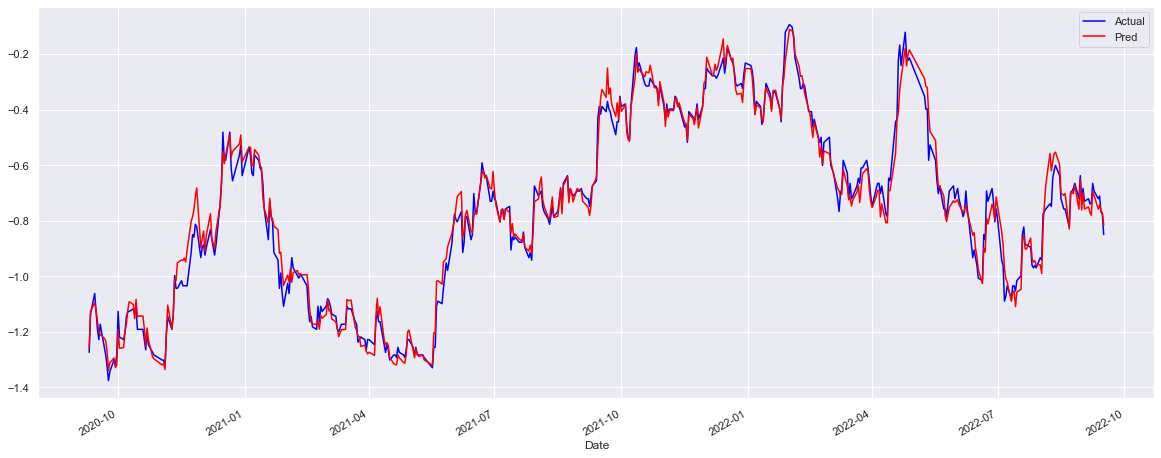

In [15]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [16]:
from joblib import load

In [17]:
close_scaler = load('../feature_engineering/excl_close_scaler.bin')

In [18]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [19]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2059.589355,2040.0
2020-09-11,2200.809570,2190.0


**Plot error distribution**

In [22]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

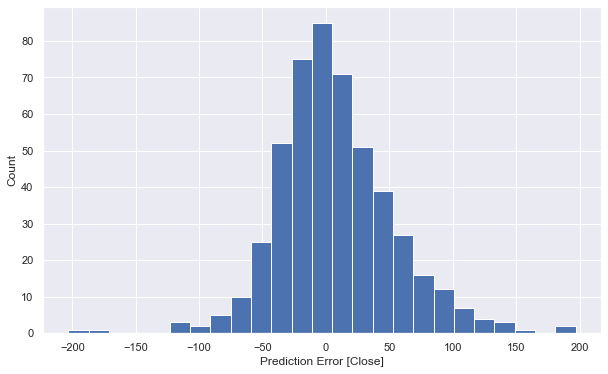

In [23]:
plotErrorHist(inversed)

**RMSE**

In [24]:
from statsmodels.tools.eval_measures import rmse

In [25]:
rmse(inversed['Pred'], inversed['Actual'])

47.31882625673735

**MAPE**

In [26]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [27]:
mape(inversed['Actual'], inversed['Pred'])

1.3686927816806396

**R-squared**

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9814286041688118

### Save Model

In [30]:
# Save model
model.save_model('./models/excl.json')